# Trying Actual Math Formulas

I need help with and am having issues reshaping the images or getting them into the form to where I can run them through my CNN.

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

import itertools

tf.random.set_seed(1)

In [4]:
# load all images in a directory
from os import listdir
from matplotlib import image
# load all images in a directory
loaded_images = list()
for filename in listdir('/Users/morganallen/research_projects/formula_images_processed'):
    # load image
    img_data = image.imread('/Users/morganallen/research_projects/formula_images_processed/' + filename)
    # store loaded image
    loaded_images.append(img_data)
    print('> loaded %s %s' % (filename, img_data.shape))

> loaded 3dcab41a2c.png (128, 512, 3)
> loaded 381ad029cc.png (64, 128, 3)
> loaded 3e9be39919.png (32, 160, 3)
> loaded 2172eef0d1.png (64, 128, 3)
> loaded 184113aa97.png (32, 160, 3)
> loaded 3b89ed3c64.png (64, 384, 3)
> loaded 1303edca2c.png (64, 320, 3)
> loaded 54aa11a844.png (32, 160, 3)
> loaded 689408d559.png (64, 320, 3)
> loaded 1445f85674.png (32, 320, 3)
> loaded 52aa23c020.png (64, 224, 3)
> loaded 23d66a77e6.png (64, 160, 3)
> loaded 67fc5fcd2e.png (32, 160, 3)
> loaded 616706dd5a.png (64, 480, 3)
> loaded 3968b25a06.png (128, 800, 3)
> loaded 5f211bee87.png (64, 192, 3)
> loaded 469fa0271d.png (128, 800, 3)
> loaded 24a8468016.png (32, 256, 3)
> loaded 7ebd18e15d.png (64, 160, 3)
> loaded 15e797e653.png (64, 320, 3)
> loaded 5f5d176d77.png (128, 480, 3)
> loaded 6bae1b66a5.png (64, 480, 3)
> loaded 9bd91fb885.png (64, 256, 3)
> loaded a48f78dccc.png (64, 320, 3)
> loaded 2773b67bd6.png (32, 320, 3)
> loaded 2f6d2d08ae.png (32, 384, 3)
> loaded 1d127f5022.png (32, 128, 

> loaded 1558bf80bf.png (32, 320, 3)
> loaded 1263153b20.png (32, 224, 3)
> loaded 25f72f123c.png (32, 320, 3)
> loaded 13efbb30bb.png (64, 224, 3)
> loaded 729c52f382.png (32, 128, 3)
> loaded 2a37fdbafd.png (96, 384, 3)
> loaded 2b95ef1599.png (64, 224, 3)
> loaded 4a16377aba.png (64, 256, 3)
> loaded 554205405c.png (64, 480, 3)
> loaded 567c58aa07.png (64, 128, 3)
> loaded f82aa584fb.png (32, 320, 3)
> loaded 2310e9de7d.png (32, 160, 3)
> loaded 43eee28203.png (64, 480, 3)
> loaded c93990c5ab.png (128, 800, 3)
> loaded 8cca86d342.png (64, 224, 3)
> loaded 444bf335eb.png (128, 800, 3)
> loaded 6e803fd57f.png (64, 224, 3)
> loaded 69baacbda1.png (64, 480, 3)
> loaded 55ab810955.png (64, 384, 3)
> loaded 783f3416f3.png (32, 128, 3)
> loaded 18d1b6926d.png (64, 480, 3)
> loaded 193357ee68.png (128, 800, 3)
> loaded 50640c8eb1.png (32, 480, 3)
> loaded 344f193618.png (32, 320, 3)
> loaded 19f6fbc64e.png (32, 160, 3)
> loaded 75f92d3f06.png (32, 160, 3)
> loaded 7129f913e7.png (32, 192, 3

> loaded 74005412d4.png (64, 160, 3)
> loaded 3468db8ac9.png (64, 128, 3)
> loaded 65be8e52a6.png (32, 320, 3)
> loaded 91ac7784c7.png (64, 320, 3)
> loaded 325b09129f.png (32, 192, 3)
> loaded 43982a07de.png (128, 480, 3)
> loaded 4daf0f7844.png (64, 192, 3)
> loaded 296897c910.png (64, 128, 3)
> loaded 795403bd80.png (64, 256, 3)
> loaded 11a4976828.png (128, 800, 3)
> loaded 717823a2c4.png (64, 480, 3)
> loaded 3c310eafbe.png (64, 480, 3)
> loaded 3ecb24831c.png (32, 320, 3)
> loaded 15c279f8a8.png (96, 384, 3)
> loaded 36439b8ea7.png (32, 128, 3)
> loaded 1efd2a563f.png (64, 192, 3)
> loaded 4bb1647bae.png (32, 192, 3)
> loaded 21c4de95c8.png (128, 800, 3)
> loaded 6b93316b8c.png (64, 320, 3)
> loaded 8eb480f955.png (128, 800, 3)
> loaded 5d22de08e6.png (64, 256, 3)
> loaded 767822befc.png (64, 384, 3)
> loaded 25a1004299.png (128, 480, 3)
> loaded a2dbadf2cd.png (64, 320, 3)
> loaded 6555665616.png (64, 256, 3)
> loaded 6fe95dcb76.png (64, 320, 3)
> loaded 644c16b6d2.png (64, 384,

> loaded 46a7ceb1b2.png (64, 480, 3)
> loaded 7500c99338.png (32, 320, 3)
> loaded 6ed90ceb95.png (64, 192, 3)
> loaded 5b01495ced.png (64, 192, 3)
> loaded 78bc901c42.png (64, 160, 3)
> loaded 2f601e9764.png (32, 160, 3)
> loaded 6c4fba64f9.png (64, 192, 3)
> loaded deeee1c2fe.png (64, 256, 3)
> loaded 51a281fbf6.png (32, 480, 3)
> loaded 141c5bf6b0.png (64, 192, 3)
> loaded 7f6a345070.png (64, 320, 3)
> loaded 21612b1e5c.png (64, 128, 3)
> loaded 41f187d0ca.png (64, 480, 3)
> loaded 594ecbcff7.png (64, 320, 3)
> loaded 1602c9ddc2.png (32, 224, 3)
> loaded 36b33f6c95.png (32, 320, 3)
> loaded e524371a37.png (32, 320, 3)
> loaded 3c6f3df890.png (32, 192, 3)
> loaded 16d1fd9d4d.png (64, 320, 3)
> loaded 27d8f5c283.png (96, 384, 3)
> loaded 3e1ca13755.png (64, 480, 3)
> loaded 7e1bde9947.png (64, 480, 3)
> loaded 5ca93f81f2.png (64, 128, 3)
> loaded 11e0156ce3.png (32, 160, 3)
> loaded 1abca61b54.png (32, 320, 3)
> loaded 774cf30fc8.png (64, 480, 3)
> loaded 4d8c445304.png (32, 160, 3)
>

> loaded 1ff9e359ca.png (64, 128, 3)
> loaded 656d9143c8.png (64, 384, 3)
> loaded 7fff1d767b.png (32, 160, 3)
> loaded 29c1845d6a.png (32, 192, 3)
> loaded 1b8e8110fb.png (64, 160, 3)
> loaded 1791a4dc7e.png (64, 192, 3)
> loaded 61242aa90d.png (128, 512, 3)
> loaded 5969f8af26.png (32, 320, 3)
> loaded 42fc96eaa0.png (64, 192, 3)
> loaded 33614e3104.png (64, 384, 3)
> loaded 113daffc91.png (32, 224, 3)
> loaded 184eec37f9.png (64, 128, 3)
> loaded 63a3fd882e.png (64, 160, 3)
> loaded 524f1a373d.png (64, 128, 3)
> loaded 66b486ea9b.png (32, 224, 3)
> loaded b8fd96aa73.png (64, 480, 3)
> loaded c106752ac7.png (64, 256, 3)
> loaded 40e7d75c38.png (64, 256, 3)
> loaded 5ea60ffa2c.png (32, 128, 3)
> loaded 6620950a7c.png (64, 192, 3)
> loaded 14acba90fa.png (64, 224, 3)
> loaded 4dc8894dce.png (64, 320, 3)
> loaded 15d3eb2a3c.png (64, 192, 3)
> loaded 2f839d68dc.png (32, 160, 3)
> loaded 37b75226a8.png (64, 480, 3)
> loaded 7f7c8c9784.png (32, 256, 3)
> loaded 630b409abb.png (64, 320, 3)


> loaded 3fbdd47f11.png (32, 160, 3)
> loaded 5ee7960215.png (32, 224, 3)
> loaded 52ba49bdfb.png (32, 256, 3)
> loaded 1efa12e6e1.png (64, 320, 3)
> loaded 6368738f7e.png (128, 800, 3)
> loaded 3c84a49ea6.png (96, 384, 3)
> loaded 65965b8521.png (64, 320, 3)
> loaded 59ac60c361.png (64, 192, 3)
> loaded 1575545cad.png (32, 384, 3)
> loaded 399b00f7af.png (64, 384, 3)
> loaded 377769fbc9.png (32, 256, 3)
> loaded 59109b37b4.png (64, 320, 3)
> loaded 6e3430c217.png (32, 160, 3)
> loaded 67a43e1944.png (64, 320, 3)
> loaded 209271c4d7.png (64, 384, 3)
> loaded 4bc188fcfe.png (32, 192, 3)
> loaded 67a5d5f0d8.png (32, 160, 3)
> loaded 6275f45e27.png (32, 480, 3)
> loaded 898d7b5fea.png (32, 224, 3)
> loaded 6f04858120.png (32, 480, 3)
> loaded 30b40eb192.png (64, 128, 3)
> loaded 8bc3fb5b59.png (64, 192, 3)
> loaded a89f0e7391.png (64, 160, 3)
> loaded 4ee7638058.png (64, 224, 3)
> loaded cf23bd5eb6.png (32, 160, 3)
> loaded 20a0137184.png (64, 160, 3)
> loaded 6182179134.png (64, 256, 3)


> loaded 2d922c5177.png (64, 384, 3)
> loaded 5f38a44dff.png (64, 320, 3)
> loaded 50a9778d23.png (128, 800, 3)
> loaded 3ea7d50b25.png (64, 160, 3)
> loaded 7dc0ae66b3.png (32, 256, 3)
> loaded 58e302185d.png (64, 384, 3)
> loaded 5d2f3aedeb.png (32, 384, 3)
> loaded 4f380cb906.png (64, 384, 3)
> loaded 72bec84b5a.png (64, 128, 3)
> loaded 784717f5e9.png (64, 320, 3)
> loaded 79b85f56fe.png (32, 192, 3)
> loaded 137b4e1ca5.png (64, 256, 3)
> loaded 63c6264b7e.png (64, 320, 3)
> loaded 393f4bc1f8.png (32, 320, 3)
> loaded 1259bcb72c.png (128, 512, 3)
> loaded 2080738ab0.png (64, 384, 3)
> loaded 53506cfb9c.png (64, 192, 3)
> loaded 4449c35ac1.png (64, 384, 3)
> loaded 63c99e1bad.png (64, 192, 3)
> loaded 39b924bab6.png (128, 512, 3)
> loaded 611641133e.png (64, 384, 3)
> loaded 2028e3ae87.png (32, 192, 3)
> loaded 2a48b41e5e.png (64, 480, 3)
> loaded 48f99fda5b.png (32, 320, 3)
> loaded 66c14aa08a.png (64, 224, 3)
> loaded 420d7e20b7.png (64, 320, 3)
> loaded 5383087263.png (64, 480, 3

> loaded 2af162e679.png (32, 256, 3)
> loaded 7d8d994966.png (32, 192, 3)
> loaded 5a52478b1b.png (128, 480, 3)
> loaded 4f75590ea7.png (64, 160, 3)
> loaded 2e6122dbfc.png (64, 224, 3)
> loaded 587a0a8be9.png (128, 800, 3)
> loaded 32bb708eb9.png (64, 384, 3)
> loaded 3d2423d84b.png (64, 224, 3)
> loaded 1b80fe4877.png (64, 384, 3)
> loaded 4566bf1096.png (64, 320, 3)
> loaded 62e5636abc.png (64, 384, 3)
> loaded 2afb6abff4.png (64, 128, 3)
> loaded 4232f87804.png (32, 224, 3)
> loaded 5215614aa5.png (32, 320, 3)
> loaded 765866662b.png (32, 256, 3)
> loaded 161483d5ac.png (32, 224, 3)
> loaded 103407fc85.png (32, 224, 3)
> loaded 77b38a4cc9.png (32, 256, 3)
> loaded 7d1e83cea3.png (32, 224, 3)
> loaded 2295064f23.png (128, 512, 3)
> loaded 4fb7466017.png (32, 128, 3)
> loaded 611acfee07.png (32, 480, 3)
> loaded 477d04dc1b.png (32, 192, 3)
> loaded 4482bef168.png (64, 224, 3)
> loaded 6ecf8c3473.png (32, 128, 3)
> loaded ba484a1934.png (32, 384, 3)
> loaded 62a6c7ce25.png (32, 160, 3

> loaded 619aacf429.png (128, 800, 3)
> loaded 6759f5d3e0.png (32, 160, 3)
> loaded 148fd13f0b.png (32, 384, 3)
> loaded 6e3b47e792.png (64, 480, 3)
> loaded eaf8550d04.png (64, 480, 3)
> loaded 281888e5df.png (64, 384, 3)
> loaded 5418a99034.png (32, 480, 3)
> loaded 4e110a709b.png (32, 480, 3)
> loaded 72a2616a0c.png (64, 192, 3)
> loaded 2bba76f8c3.png (32, 192, 3)
> loaded 2e57b44ede.png (32, 192, 3)
> loaded 32b6923b54.png (64, 256, 3)
> loaded b39313a917.png (64, 480, 3)
> loaded 34b8598fea.png (64, 384, 3)
> loaded 4cd38c19b4.png (32, 480, 3)
> loaded 310a7c01ee.png (64, 192, 3)
> loaded 6b690db978.png (32, 160, 3)
> loaded 5584cc4800.png (64, 256, 3)
> loaded 1c006585c7.png (32, 128, 3)
> loaded 2608ceb605.png (64, 320, 3)
> loaded 8546886772.png (64, 224, 3)
> loaded 21f494c96b.png (64, 256, 3)
> loaded 6cc4a603b0.png (32, 256, 3)
> loaded 72367ee8a0.png (64, 320, 3)
> loaded 51f5bafdd2.png (32, 320, 3)
> loaded 4875e2fe2b.png (32, 320, 3)
> loaded 3153bfaa3a.png (64, 384, 3)


> loaded 73df92dad7.png (128, 512, 3)
> loaded 532abcda96.png (32, 256, 3)
> loaded 6b4b7e7e62.png (128, 800, 3)
> loaded 41d6a33cd9.png (64, 384, 3)
> loaded 2983aa3322.png (64, 224, 3)
> loaded 782f49a8ec.png (64, 160, 3)
> loaded 10b4b03575.png (64, 320, 3)
> loaded 4a0954746d.png (64, 320, 3)
> loaded 39435554b2.png (32, 192, 3)
> loaded 968bdee2e6.png (64, 384, 3)
> loaded 303ba1aa42.png (32, 160, 3)
> loaded 17f54a2a32.png (64, 480, 3)
> loaded 5e9ec25c42.png (32, 160, 3)
> loaded 6d1be1cb4c.png (64, 384, 3)
> loaded 6d9b9b7aac.png (32, 160, 3)
> loaded 33e2048a7e.png (64, 160, 3)
> loaded 5e4a9f9021.png (32, 256, 3)
> loaded 268546e404.png (64, 160, 3)
> loaded 60098f96b5.png (32, 480, 3)
> loaded 5cbc95b65e.png (32, 256, 3)
> loaded 10ad20c27f.png (32, 320, 3)
> loaded 4c67e5b485.png (32, 320, 3)
> loaded 7a9443f4f3.png (64, 480, 3)
> loaded 114de45174.png (32, 192, 3)
> loaded 6cfdd72bd1.png (64, 480, 3)
> loaded 34616d5fe1.png (64, 480, 3)
> loaded 7375c77f43.png (32, 320, 3)

> loaded 450e3f92b9.png (128, 800, 3)
> loaded 5529d77325.png (32, 384, 3)
> loaded 6e93e9d065.png (32, 256, 3)
> loaded 4e4070c2d2.png (64, 160, 3)
> loaded 47f97b524d.png (64, 320, 3)
> loaded 24fd73ee76.png (32, 192, 3)
> loaded 19ceb0cc6d.png (64, 384, 3)
> loaded 23d7bf7673.png (64, 160, 3)
> loaded 793ec7aa13.png (128, 480, 3)
> loaded 6d9b6df843.png (32, 192, 3)
> loaded 2317b3ab52.png (32, 160, 3)
> loaded 1a2f034c0f.png (64, 384, 3)
> loaded 70a26b145e.png (32, 256, 3)
> loaded 74ed7034c1.png (64, 256, 3)
> loaded 4cca2a3ae8.png (128, 480, 3)
> loaded 6b496e6c41.png (32, 224, 3)
> loaded 17695f2e33.png (64, 256, 3)
> loaded 3176f49d3e.png (32, 224, 3)
> loaded 45631ee607.png (64, 224, 3)
> loaded 7f2f75cb51.png (32, 128, 3)
> loaded 1f59dcf64e.png (64, 320, 3)
> loaded 72d9aed2c7.png (64, 192, 3)
> loaded 4a2a773f43.png (64, 160, 3)
> loaded 47664342ea.png (64, 192, 3)
> loaded 221d1f871c.png (64, 224, 3)
> loaded 1c8e2d043d.png (32, 192, 3)
> loaded 167a1f7ca3.png (64, 320, 3

> loaded 2bea3ad9ed.png (64, 384, 3)
> loaded 1924ac766a.png (32, 224, 3)
> loaded 3cf0819493.png (32, 480, 3)
> loaded 1c05dc9ace.png (32, 320, 3)
> loaded 3ef63699eb.png (32, 256, 3)
> loaded 44122160a4.png (64, 320, 3)
> loaded 708aae60bc.png (96, 384, 3)
> loaded 5b28032323.png (64, 224, 3)
> loaded 3b23282881.png (160, 480, 3)
> loaded 1b2b800fd8.png (32, 224, 3)
> loaded 72ca1d4680.png (64, 320, 3)
> loaded 2e8d684466.png (128, 800, 3)
> loaded 6bddeb5334.png (32, 192, 3)
> loaded 1eae9dd0bf.png (64, 480, 3)
> loaded f89148312c.png (32, 160, 3)
> loaded 5337b42498.png (64, 128, 3)
> loaded 37d0ab7da6.png (32, 192, 3)
> loaded 74b8ebfe3b.png (64, 384, 3)
> loaded 645d375c42.png (32, 160, 3)
> loaded 5e953f7439.png (64, 384, 3)
> loaded 13f40ad6c8.png (32, 128, 3)
> loaded 21941fd712.png (64, 192, 3)
> loaded 1dbfbbbe08.png (32, 128, 3)
> loaded 2bfda08a35.png (64, 224, 3)
> loaded 2f41dee37e.png (128, 512, 3)
> loaded 398843270f.png (64, 320, 3)
> loaded 21f450fd10.png (32, 128, 3

> loaded de845d9269.png (128, 512, 3)
> loaded 6751c733ac.png (32, 320, 3)
> loaded 1c55165dfe.png (32, 256, 3)
> loaded 76d1e8252e.png (32, 256, 3)
> loaded 5f36e41f3b.png (64, 480, 3)
> loaded 244afb3e80.png (64, 128, 3)
> loaded 307e3e9ebd.png (64, 384, 3)
> loaded 6bdcb2587a.png (32, 192, 3)
> loaded 7da9cbbd5b.png (32, 256, 3)
> loaded 34040f5e4b.png (32, 224, 3)
> loaded 6df6db5464.png (64, 384, 3)
> loaded 4a8392bdbe.png (32, 160, 3)
> loaded 6d187d298e.png (64, 192, 3)
> loaded 68c520538b.png (64, 160, 3)
> loaded 539151548c.png (64, 192, 3)
> loaded 404451255a.png (64, 384, 3)
> loaded 56844f8970.png (32, 256, 3)
> loaded 534a1ef70a.png (128, 512, 3)
> loaded 2adb3731ad.png (64, 384, 3)
> loaded 7f86f0d9c8.png (128, 800, 3)
> loaded 5036ca0b17.png (64, 480, 3)
> loaded 7b25b7ae8e.png (64, 320, 3)
> loaded 33d9d49a99.png (64, 384, 3)
> loaded 4aaa151dbf.png (64, 320, 3)
> loaded 6de05fd401.png (64, 160, 3)
> loaded 1546fe217a.png (32, 224, 3)
> loaded 3aa9a2dfb7.png (128, 800, 

> loaded 4b4e06e8ea.png (32, 320, 3)
> loaded 7b0dbfd96e.png (32, 224, 3)
> loaded f016898ef5.png (64, 256, 3)
> loaded 719454ba52.png (32, 192, 3)
> loaded 41d1c208ae.png (64, 192, 3)
> loaded 6a255bdeb8.png (64, 480, 3)
> loaded 4027cf605d.png (128, 800, 3)
> loaded 2103dd9d33.png (64, 224, 3)
> loaded 2770007272.png (32, 128, 3)
> loaded 38f863657d.png (64, 160, 3)
> loaded 3a7ec0225c.png (32, 256, 3)
> loaded 4ae3790b20.png (32, 320, 3)
> loaded 443ad01c02.png (128, 512, 3)
> loaded 54d661b087.png (64, 320, 3)
> loaded 1a50fa207d.png (64, 224, 3)
> loaded 259afae79e.png (32, 192, 3)
> loaded 5c8ae6694c.png (160, 480, 3)
> loaded 6993c4f92b.png (128, 800, 3)
> loaded 35c4fae55d.png (128, 800, 3)
> loaded 20470c3d5f.png (64, 128, 3)
> loaded 3a3e071f2d.png (32, 320, 3)
> loaded 6cc6e5f52a.png (64, 192, 3)
> loaded 116a9787cb.png (64, 320, 3)
> loaded 28e10835d0.png (64, 256, 3)
> loaded 6761ff4afb.png (32, 320, 3)
> loaded 1e562120dc.png (32, 128, 3)
> loaded 56f53e6325.png (64, 128,

> loaded 27e40cfffa.png (64, 256, 3)
> loaded 5e56e5dc33.png (64, 320, 3)
> loaded d363eee9bd.png (64, 320, 3)
> loaded 88707c8989.png (64, 256, 3)
> loaded 5523df12c5.png (32, 320, 3)
> loaded 1cc6953da5.png (32, 384, 3)
> loaded 243574fa8e.png (32, 160, 3)
> loaded 7258bd1cf6.png (64, 128, 3)
> loaded 2fcb868a8f.png (64, 256, 3)
> loaded 356e0b3068.png (64, 384, 3)
> loaded 5016f074d1.png (64, 256, 3)
> loaded 3d66c8e2a2.png (128, 800, 3)
> loaded 4abaaf4e99.png (32, 128, 3)
> loaded 4b87e15740.png (64, 320, 3)
> loaded 7a8454c828.png (32, 224, 3)
> loaded 5dcb8b6a46.png (32, 320, 3)
> loaded 562f1fa8bc.png (128, 800, 3)
> loaded 30347a411d.png (32, 192, 3)
> loaded 4a456a7347.png (32, 192, 3)
> loaded 621248f87a.png (64, 320, 3)
> loaded 6ce2e7c475.png (64, 480, 3)
> loaded 5fb4f776fc.png (64, 160, 3)
> loaded 50ea944636.png (32, 128, 3)
> loaded 6301ba26c2.png (32, 128, 3)
> loaded 2cbcbb687a.png (64, 256, 3)
> loaded 73750a830b.png (128, 480, 3)
> loaded 4257d4cf88.png (32, 480, 3

> loaded 2792a1c1df.png (32, 160, 3)
> loaded 71de7d4a9c.png (64, 192, 3)
> loaded 505d6a907a.png (32, 480, 3)
> loaded 152f92a6b0.png (32, 192, 3)
> loaded 218413bf21.png (32, 224, 3)
> loaded 6844e039af.png (32, 320, 3)
> loaded 1e144cf04d.png (32, 128, 3)
> loaded 4dba7e1b0a.png (64, 224, 3)
> loaded 6d1fac22c5.png (32, 320, 3)
> loaded 5ca38f8da8.png (64, 384, 3)
> loaded 1bbeb26d7c.png (128, 800, 3)
> loaded 18d682a304.png (64, 224, 3)
> loaded d671e88c85.png (64, 192, 3)
> loaded 420ab0746e.png (64, 320, 3)
> loaded 2b3eaa35f2.png (32, 224, 3)
> loaded 7012ed7392.png (32, 192, 3)
> loaded 48c1fcdfe2.png (32, 160, 3)
> loaded 5553f2f84d.png (64, 320, 3)
> loaded 388891d2b1.png (32, 160, 3)
> loaded 4422ece791.png (64, 384, 3)
> loaded 44f7d0a26b.png (64, 192, 3)
> loaded 1520174273.png (64, 320, 3)
> loaded b7911b02fc.png (64, 224, 3)
> loaded 56a80d3b00.png (32, 384, 3)
> loaded 5eed95f910.png (128, 512, 3)
> loaded b96a42da9a.png (32, 160, 3)
> loaded 1a3e3b5d28.png (32, 480, 3)

> loaded 226a3a1a36.png (32, 320, 3)
> loaded 38a3a4e025.png (128, 800, 3)
> loaded 3345f8a167.png (32, 320, 3)
> loaded 72c51dfccc.png (32, 256, 3)
> loaded 1ab0763774.png (128, 512, 3)
> loaded 6a81af27bd.png (32, 224, 3)
> loaded 46128a311c.png (32, 320, 3)
> loaded 198c1f6709.png (128, 512, 3)
> loaded 12cf3ad485.png (64, 160, 3)
> loaded 2d29d36232.png (64, 224, 3)
> loaded 2cfe108b78.png (128, 512, 3)
> loaded 636c287df7.png (128, 480, 3)
> loaded 520cd85455.png (64, 320, 3)
> loaded 3e7b4de7bb.png (32, 384, 3)
> loaded 5251567ada.png (64, 256, 3)
> loaded 3eb3aaa1f8.png (32, 192, 3)
> loaded 1969d8dd66.png (32, 224, 3)
> loaded 7b937f0d9e.png (32, 480, 3)
> loaded 5ec98393ad.png (32, 128, 3)
> loaded 5e7b13cb59.png (64, 320, 3)
> loaded 321e031f4e.png (64, 320, 3)
> loaded 2cf930e2f5.png (64, 192, 3)
> loaded 282c8cda1c.png (64, 320, 3)
> loaded 429570e60c.png (128, 512, 3)
> loaded 7c4574ebbf.png (32, 384, 3)
> loaded 70f27f7886.png (128, 800, 3)
> loaded 5fbc1ebc2c.png (32, 12

> loaded 224fe8386e.png (64, 384, 3)
> loaded 298ea7ca8f.png (32, 192, 3)
> loaded 349d12b3ee.png (64, 256, 3)
> loaded db93bbdb4a.png (64, 320, 3)
> loaded 4b137eec8b.png (64, 320, 3)
> loaded 14b3c1354d.png (64, 128, 3)
> loaded 3da1a13926.png (64, 224, 3)
> loaded 37d7326acd.png (64, 320, 3)
> loaded 6746a257ce.png (32, 320, 3)
> loaded 1a1e30fce1.png (64, 224, 3)
> loaded 50e013e67a.png (128, 800, 3)
> loaded 42b28549a3.png (32, 160, 3)
> loaded 1b0cc892b1.png (32, 320, 3)
> loaded 745dc4a096.png (64, 320, 3)
> loaded 46d9de303b.png (64, 160, 3)
> loaded 352330d4a5.png (64, 160, 3)
> loaded 1d3dcefb8d.png (32, 192, 3)
> loaded 616d6010cf.png (64, 384, 3)
> loaded 40a96dae0a.png (32, 160, 3)
> loaded 7ccdc6871e.png (32, 384, 3)
> loaded 74f3fd7b4a.png (64, 320, 3)
> loaded 32762c8db6.png (64, 160, 3)
> loaded 2ae1005922.png (64, 128, 3)
> loaded 76b31741a3.png (32, 224, 3)
> loaded 33d99b3815.png (32, 128, 3)
> loaded 5675ce6824.png (96, 384, 3)
> loaded 6bd1636791.png (64, 320, 3)


> loaded 7474bfa6d7.png (128, 800, 3)
> loaded 62ed3a9df9.png (32, 160, 3)
> loaded 4309be8561.png (64, 320, 3)
> loaded 268e83cffb.png (32, 320, 3)
> loaded 12cea4eecd.png (64, 384, 3)
> loaded 7b1188bd48.png (64, 480, 3)
> loaded 76ded5f194.png (32, 384, 3)
> loaded 7b98824926.png (32, 160, 3)
> loaded 2508a295d6.png (64, 192, 3)
> loaded 456e05fa11.png (32, 192, 3)
> loaded 176d9f44aa.png (32, 384, 3)
> loaded 6805ecb152.png (64, 320, 3)
> loaded 2436b34831.png (64, 320, 3)
> loaded 21992427cd.png (32, 320, 3)
> loaded 323ca6faae.png (64, 480, 3)
> loaded 25793a2924.png (96, 384, 3)
> loaded 68c4f317d3.png (64, 320, 3)
> loaded 133cabf952.png (64, 192, 3)
> loaded 6eacb01fd5.png (64, 160, 3)
> loaded abf5abbf01.png (64, 192, 3)
> loaded 78228211ca.png (64, 384, 3)
> loaded 25ed9bab3f.png (64, 224, 3)
> loaded 5aa1f998cc.png (64, 160, 3)
> loaded 5cca21617e.png (64, 384, 3)
> loaded 46e89d9026.png (32, 480, 3)
> loaded 6d5b68f4f0.png (128, 800, 3)
> loaded 23de4241fa.png (64, 480, 3)

> loaded d05c4b318d.png (128, 800, 3)
> loaded 55c406082f.png (64, 480, 3)
> loaded a51b38f36a.png (64, 480, 3)
> loaded 4f27044924.png (64, 480, 3)
> loaded 27e423d200.png (32, 192, 3)
> loaded 88dbb29245.png (64, 320, 3)
> loaded 58cd43cac1.png (32, 384, 3)
> loaded 42f57520c7.png (64, 128, 3)
> loaded 31dbf5285d.png (128, 800, 3)
> loaded 766196cf29.png (64, 160, 3)
> loaded 67e6b29e2e.png (64, 256, 3)
> loaded 146afa3241.png (64, 160, 3)
> loaded 3003a47375.png (64, 192, 3)
> loaded 1b33063c6f.png (128, 800, 3)
> loaded 64c642b38c.png (64, 480, 3)
> loaded 1a891388ce.png (64, 224, 3)
> loaded 1f1a72e515.png (32, 224, 3)
> loaded d38aa7a79f.png (32, 224, 3)
> loaded 4caed2fdca.png (64, 160, 3)
> loaded 469e417c78.png (64, 192, 3)
> loaded 797cebb66c.png (64, 320, 3)
> loaded 224009bcc1.png (64, 160, 3)
> loaded 84de7b58fe.png (32, 384, 3)
> loaded fb47c8400a.png (64, 128, 3)
> loaded 1767c873aa.png (32, 128, 3)
> loaded 32d281e1fd.png (128, 800, 3)
> loaded 26946fff70.png (64, 192, 

> loaded 3f1480e901.png (64, 480, 3)
> loaded 1461b7ec13.png (64, 384, 3)
> loaded 4fa61dbf37.png (64, 128, 3)
> loaded 19d0b64edf.png (32, 192, 3)
> loaded 628b7b5b8f.png (64, 256, 3)
> loaded 728978fc61.png (32, 480, 3)
> loaded 66eb6a7f53.png (32, 320, 3)
> loaded 37c6a83f00.png (32, 384, 3)
> loaded 17641a6d5a.png (64, 256, 3)
> loaded 2a1e531f45.png (32, 320, 3)
> loaded 34888b6790.png (64, 480, 3)
> loaded 6821ff4414.png (64, 384, 3)
> loaded 5f6a5af28f.png (64, 320, 3)
> loaded 527b924966.png (128, 480, 3)
> loaded 76b4b6e718.png (32, 256, 3)
> loaded 6a273f0f7b.png (64, 224, 3)
> loaded 4847110a9b.png (64, 160, 3)
> loaded 20b99397ae.png (32, 256, 3)
> loaded 29cc9e5375.png (32, 128, 3)
> loaded 1e5b1cec33.png (64, 480, 3)
> loaded 5bbd6a3541.png (64, 256, 3)
> loaded 9c3c18cca8.png (32, 320, 3)
> loaded ee344313e1.png (64, 256, 3)
> loaded 233277bfc9.png (64, 384, 3)
> loaded 27c6fa764e.png (32, 192, 3)
> loaded 6fbe4d1ffb.png (64, 160, 3)
> loaded 1fe91a6200.png (32, 384, 3)


> loaded 282fa032db.png (64, 480, 3)
> loaded 58262d4c1c.png (32, 128, 3)
> loaded 14eb090f25.png (64, 384, 3)
> loaded 75f5d32049.png (32, 224, 3)
> loaded 4dcd434bc0.png (64, 320, 3)
> loaded 60a24361bf.png (32, 224, 3)
> loaded 25c9987ef0.png (64, 192, 3)
> loaded 42207e96d6.png (32, 192, 3)
> loaded 4e3d36d0d5.png (64, 480, 3)
> loaded 1f24bf2d5b.png (64, 192, 3)
> loaded 2983f1a42e.png (96, 384, 3)
> loaded 607c801b96.png (32, 256, 3)
> loaded 4f965e3b70.png (128, 800, 3)
> loaded 52b7114abc.png (64, 160, 3)
> loaded 53a256fb0a.png (64, 320, 3)
> loaded 47ac181bf1.png (64, 320, 3)
> loaded 64606d29cc.png (64, 160, 3)
> loaded 6ac88686ae.png (64, 320, 3)
> loaded 195484f11d.png (64, 320, 3)
> loaded 55f0446ccf.png (32, 256, 3)
> loaded 4f86ea6903.png (64, 256, 3)
> loaded 1dc6d907cd.png (32, 160, 3)
> loaded 10cdc45c92.png (64, 256, 3)
> loaded 4c5163cd8e.png (32, 192, 3)
> loaded 56b7c9b9a0.png (32, 224, 3)
> loaded 1d1602bd85.png (64, 160, 3)
> loaded 6a69338a18.png (64, 160, 3)


> loaded 4d0abd0069.png (32, 192, 3)
> loaded 32f278db20.png (32, 480, 3)
> loaded 265ff6ce6c.png (32, 192, 3)
> loaded 6a6b8920b8.png (64, 192, 3)
> loaded 5c2aa5c7b8.png (64, 480, 3)
> loaded 633bf76f88.png (32, 256, 3)
> loaded 6c70bc335b.png (64, 320, 3)
> loaded 7dbf318e0d.png (64, 224, 3)
> loaded 9c4b085366.png (128, 800, 3)
> loaded 1401380696.png (64, 128, 3)
> loaded 678fbdebc2.png (64, 480, 3)
> loaded 6d14082963.png (64, 320, 3)
> loaded 621f6e7247.png (32, 128, 3)
> loaded 101dde4fbf.png (32, 128, 3)
> loaded 706114985f.png (64, 320, 3)
> loaded 762c2458f5.png (64, 320, 3)
> loaded 35c949c037.png (32, 128, 3)
> loaded 461457c719.png (64, 384, 3)
> loaded 3dc9e6ab10.png (64, 384, 3)
> loaded 1833f9e8dc.png (64, 192, 3)
> loaded 3561f726b6.png (64, 256, 3)
> loaded 7eb7ad771d.png (32, 224, 3)
> loaded 7a4020b9ac.png (32, 160, 3)
> loaded bea8294e7d.png (32, 320, 3)
> loaded 763486ef42.png (32, 384, 3)
> loaded 72e8597206.png (64, 192, 3)
> loaded 2a466570ef.png (128, 800, 3)

> loaded 7433dcc913.png (128, 800, 3)
> loaded 6020305609.png (64, 480, 3)
> loaded 73843705a4.png (64, 192, 3)
> loaded 44099f50e2.png (64, 160, 3)
> loaded 11b1bef67f.png (32, 192, 3)
> loaded 617aab2fd9.png (64, 192, 3)
> loaded 620fcc0bed.png (64, 320, 3)
> loaded 5fbc6dc1b7.png (64, 480, 3)
> loaded 1de59a6d4b.png (64, 320, 3)
> loaded 59bbfaca90.png (64, 160, 3)
> loaded 6f3c03f89a.png (64, 128, 3)
> loaded 25ffda8fa8.png (64, 320, 3)
> loaded 6114f429b5.png (64, 320, 3)
> loaded 6f8ad0b563.png (64, 320, 3)
> loaded 3336eeebf3.png (64, 192, 3)
> loaded 53eeace8b0.png (64, 160, 3)
> loaded 9409ca42a7.png (64, 256, 3)
> loaded 4342dd27e4.png (128, 800, 3)
> loaded 6997b6cacb.png (64, 384, 3)
> loaded 3dec89aace.png (64, 320, 3)
> loaded 27ecf9eef1.png (32, 224, 3)
> loaded 6f771b55f8.png (64, 480, 3)
> loaded f4d6e41e2e.png (32, 192, 3)
> loaded 34ae3e3e74.png (64, 256, 3)
> loaded 1cabc52cd0.png (64, 224, 3)
> loaded f8e7f61b46.png (32, 128, 3)
> loaded 394bf5165f.png (32, 320, 3)

> loaded 251291d6e3.png (32, 224, 3)
> loaded 6511ca08b2.png (64, 256, 3)
> loaded 27bb7feca3.png (64, 480, 3)
> loaded 5acfbd2394.png (32, 320, 3)
> loaded 5e060bacc5.png (64, 128, 3)
> loaded 1db771c0d7.png (64, 480, 3)
> loaded 295c0f12b0.png (64, 224, 3)
> loaded 51d6ea00d1.png (32, 320, 3)
> loaded 2d7cb1d151.png (64, 320, 3)
> loaded 7e7cd3c7e8.png (32, 384, 3)
> loaded 4d9c597c20.png (64, 256, 3)
> loaded 7b59dbb4a6.png (64, 160, 3)
> loaded 3f13093f87.png (64, 480, 3)
> loaded 200215bb3e.png (128, 800, 3)
> loaded 5d07f58b33.png (64, 320, 3)
> loaded 44d7768358.png (128, 800, 3)
> loaded 988ec6fef0.png (64, 480, 3)
> loaded 55ecbf177f.png (64, 224, 3)
> loaded 438b12c6c8.png (128, 512, 3)
> loaded 2590f8a9d8.png (64, 256, 3)
> loaded 64aecceddf.png (128, 800, 3)
> loaded 68070014b4.png (64, 480, 3)
> loaded 19e6ea66a3.png (128, 800, 3)
> loaded 66163a5114.png (32, 192, 3)
> loaded 106f739877.png (32, 384, 3)
> loaded 44bd43a75a.png (32, 128, 3)
> loaded 388f5052e3.png (32, 192,

> loaded 4ef383bf1c.png (64, 320, 3)
> loaded 604b16e0ef.png (64, 256, 3)
> loaded 26e0e3df07.png (32, 192, 3)
> loaded 363b6db35a.png (64, 192, 3)
> loaded 1edcadd433.png (128, 800, 3)
> loaded 6aa275746e.png (64, 320, 3)
> loaded 4e66ea1d89.png (32, 384, 3)
> loaded 15844aba89.png (64, 256, 3)
> loaded 37e028e4c8.png (32, 224, 3)
> loaded 5db2515990.png (64, 160, 3)
> loaded 2e018ed34c.png (64, 160, 3)
> loaded 40135a85cf.png (64, 160, 3)
> loaded 58016958bb.png (64, 192, 3)
> loaded 38bb290c54.png (32, 384, 3)
> loaded 79ce9a5bcc.png (32, 160, 3)
> loaded 4537a149b2.png (64, 224, 3)
> loaded 53a82df187.png (64, 160, 3)
> loaded 2d402da897.png (32, 224, 3)
> loaded 348c142af0.png (64, 480, 3)
> loaded 3a276bd675.png (32, 320, 3)
> loaded 7d549c336c.png (32, 128, 3)
> loaded 8180cbd3e3.png (64, 160, 3)
> loaded 6acd422f29.png (32, 192, 3)
> loaded 3b225fe2e9.png (64, 128, 3)
> loaded 4b059feb31.png (32, 384, 3)
> loaded 1fdb3fd2e7.png (64, 320, 3)
> loaded f92c8d8a53.png (128, 800, 3)

> loaded 481534e498.png (64, 192, 3)
> loaded f5b40ccac0.png (64, 160, 3)
> loaded f1320b827b.png (32, 224, 3)
> loaded 3dc87c1cce.png (64, 320, 3)
> loaded 795b27411f.png (64, 224, 3)
> loaded 24eeeb5114.png (64, 160, 3)
> loaded 2121840580.png (32, 128, 3)
> loaded 7640c9c63a.png (64, 480, 3)
> loaded 2332744ce9.png (64, 480, 3)
> loaded 1fb9d20a8d.png (32, 256, 3)
> loaded 253ba92a1e.png (32, 192, 3)
> loaded 77d5eedce4.png (64, 384, 3)
> loaded 76ab64766f.png (64, 320, 3)
> loaded 39bf4ce65e.png (64, 320, 3)
> loaded 6b8fb81dce.png (32, 320, 3)
> loaded 72188d734b.png (64, 320, 3)
> loaded 7b151dfc4a.png (64, 384, 3)
> loaded 1c7f5a7d56.png (64, 320, 3)
> loaded 6d511e86fb.png (64, 320, 3)
> loaded 122d99d0a5.png (32, 480, 3)
> loaded 59baa5cb80.png (128, 800, 3)
> loaded 19a5248c5e.png (160, 480, 3)
> loaded d72dcd4146.png (64, 192, 3)
> loaded 430f8f73c2.png (64, 256, 3)
> loaded 2613ceebe7.png (64, 320, 3)
> loaded 75d6f19c07.png (64, 256, 3)
> loaded 2943c6b643.png (32, 192, 3)

> loaded 62c8be508c.png (160, 480, 3)
> loaded 7ff1f7904d.png (64, 320, 3)
> loaded 223d7e90cf.png (64, 320, 3)
> loaded 33096fa657.png (64, 384, 3)
> loaded 2d0cf60c64.png (64, 160, 3)
> loaded 1e5a5e0e90.png (64, 224, 3)
> loaded 38e22dbf14.png (128, 512, 3)
> loaded 302c1bd1cb.png (32, 384, 3)
> loaded 341cb3c76c.png (32, 320, 3)
> loaded 5f75bf4e0c.png (64, 192, 3)
> loaded 74990bbcec.png (128, 512, 3)
> loaded 6fd2e15fca.png (64, 320, 3)
> loaded 451557221b.png (64, 160, 3)
> loaded 4e460b9871.png (64, 480, 3)
> loaded f44102b455.png (64, 384, 3)
> loaded 7f67194af5.png (64, 320, 3)
> loaded 68a85dcc4f.png (64, 320, 3)
> loaded 2098bc733f.png (64, 480, 3)
> loaded 46ef170271.png (32, 320, 3)
> loaded 5011dd4305.png (64, 320, 3)
> loaded 76ce41d8a2.png (64, 480, 3)
> loaded 5bee51fea6.png (128, 800, 3)
> loaded 68cac0060d.png (32, 384, 3)
> loaded 7b0bd65158.png (32, 224, 3)
> loaded 3a61b6c74b.png (64, 320, 3)
> loaded 3a0bdedc68.png (128, 800, 3)
> loaded 46c64e76be.png (32, 224,

> loaded 6d084446ab.png (64, 224, 3)
> loaded 403fc509b4.png (64, 192, 3)
> loaded 36cd62ccee.png (64, 480, 3)
> loaded c8a5363008.png (64, 128, 3)
> loaded 22193835b1.png (128, 800, 3)
> loaded 21ffdbbeb9.png (64, 480, 3)
> loaded 700766ff83.png (64, 192, 3)
> loaded 5e240b113e.png (64, 224, 3)
> loaded 69be1f2aba.png (64, 256, 3)
> loaded 33b7b15a25.png (32, 160, 3)
> loaded 51c6bbbb1c.png (64, 384, 3)
> loaded 3337ee2cef.png (64, 480, 3)
> loaded 5287fb6ae0.png (64, 320, 3)
> loaded 2ffdcaae11.png (32, 192, 3)
> loaded 4f85f76922.png (64, 256, 3)
> loaded 63000b84bf.png (64, 384, 3)
> loaded 5e410bfcb7.png (64, 224, 3)
> loaded 6a53c59106.png (32, 192, 3)
> loaded 351e856f92.png (64, 320, 3)
> loaded 1ebe6b138b.png (128, 480, 3)
> loaded 7a9c861d3b.png (64, 128, 3)
> loaded 2aded26a06.png (128, 800, 3)
> loaded 635871a904.png (64, 224, 3)
> loaded 46800dc212.png (64, 128, 3)
> loaded 5840333ac6.png (64, 480, 3)
> loaded f83b0d977c.png (32, 480, 3)
> loaded 212c95c283.png (64, 384, 3

> loaded 42fa4c17cf.png (32, 224, 3)
> loaded 2a102ebcd9.png (64, 320, 3)
> loaded 43515203eb.png (32, 480, 3)
> loaded 3e88e104a3.png (32, 384, 3)
> loaded 39f7be46ba.png (64, 256, 3)
> loaded 361f4af3ad.png (64, 384, 3)
> loaded 645f841154.png (64, 320, 3)
> loaded 737c69ea0f.png (32, 160, 3)
> loaded 17091dc2ec.png (64, 320, 3)
> loaded 318ec9cfa2.png (64, 320, 3)
> loaded 20874ea18b.png (64, 224, 3)
> loaded 2192c10da2.png (32, 128, 3)
> loaded 61ed769eb7.png (128, 512, 3)
> loaded 7c2d817da7.png (32, 480, 3)
> loaded 77d8836994.png (64, 320, 3)
> loaded 5c9801317c.png (64, 384, 3)
> loaded 1967a03166.png (32, 256, 3)
> loaded 50a56c681d.png (32, 160, 3)
> loaded 6e63531d3e.png (64, 224, 3)
> loaded 79671b6a86.png (128, 512, 3)
> loaded 42dc41281f.png (32, 480, 3)
> loaded 942ac9b803.png (128, 800, 3)
> loaded d2882f7870.png (128, 800, 3)
> loaded 3917613818.png (32, 160, 3)
> loaded 4c72e31b74.png (64, 224, 3)
> loaded 645ae84567.png (64, 384, 3)
> loaded b3491880a3.png (32, 160, 

> loaded 387f256642.png (64, 320, 3)
> loaded 10c1fbde32.png (32, 128, 3)
> loaded 2e736d0324.png (32, 256, 3)
> loaded 31018a3af3.png (64, 320, 3)
> loaded 1a3338318a.png (64, 224, 3)
> loaded 6e39afbe4d.png (64, 224, 3)
> loaded 28fab534b2.png (64, 224, 3)
> loaded 1e87bd40e5.png (64, 224, 3)
> loaded 49ffebae75.png (32, 480, 3)
> loaded 3631bfbb43.png (32, 224, 3)
> loaded 4e81e29715.png (64, 224, 3)
> loaded 1c7504b7f4.png (64, 256, 3)
> loaded 6c18086821.png (64, 480, 3)
> loaded 6e37681038.png (64, 320, 3)
> loaded 733b0257a4.png (32, 128, 3)
> loaded 5aeecdb741.png (32, 480, 3)
> loaded 32bf7836db.png (32, 320, 3)
> loaded 56ee898b7d.png (32, 160, 3)
> loaded 385b8c4593.png (32, 224, 3)
> loaded 2c0f1a4f48.png (64, 480, 3)
> loaded 4f1ef82fdb.png (64, 256, 3)
> loaded 77fb3df157.png (64, 192, 3)
> loaded 6894c675fb.png (128, 800, 3)
> loaded d25907e058.png (32, 480, 3)
> loaded 6eb9a3abea.png (32, 320, 3)
> loaded 35645e0a9a.png (64, 480, 3)
> loaded 20e882dd1c.png (64, 480, 3)


> loaded 6efdaf433e.png (32, 128, 3)
> loaded 214e4231e4.png (64, 320, 3)
> loaded 7a2ccdf545.png (64, 320, 3)
> loaded 5605f1ed6d.png (32, 384, 3)
> loaded 717e59119d.png (64, 384, 3)
> loaded 69b970d97b.png (64, 384, 3)
> loaded 7be4acfc23.png (32, 384, 3)
> loaded 257f0a959e.png (64, 192, 3)
> loaded 40229a1591.png (32, 384, 3)
> loaded 7914f59c95.png (32, 192, 3)
> loaded 5943e834da.png (128, 800, 3)
> loaded 18b3ce3cec.png (32, 224, 3)
> loaded 611af220fc.png (64, 384, 3)
> loaded 6be0ff32d3.png (32, 160, 3)
> loaded 54a6554b0a.png (64, 320, 3)
> loaded 32b421d799.png (96, 384, 3)
> loaded 681333bf7c.png (64, 192, 3)
> loaded cae41e6c6d.png (64, 384, 3)
> loaded 508395d1ba.png (128, 512, 3)
> loaded 37a280697c.png (64, 224, 3)
> loaded 3deae75ca5.png (64, 320, 3)
> loaded c13cc91076.png (64, 480, 3)
> loaded 618b8a2bcc.png (64, 384, 3)
> loaded e68d622219.png (64, 192, 3)
> loaded 23379e9475.png (64, 480, 3)
> loaded 1abba2915c.png (64, 224, 3)
> loaded 16bb522673.png (64, 384, 3)

> loaded 68f47108a1.png (32, 192, 3)
> loaded 31f986a90e.png (64, 320, 3)
> loaded 4bf10efa72.png (32, 256, 3)
> loaded 629636c77d.png (64, 320, 3)
> loaded 648267391a.png (64, 480, 3)
> loaded 5aba276555.png (96, 384, 3)
> loaded 367c731764.png (64, 160, 3)
> loaded 7971db3d8b.png (32, 256, 3)
> loaded 752ac17628.png (64, 224, 3)
> loaded 35742ae910.png (64, 384, 3)
> loaded 7ee3d4f35e.png (64, 480, 3)
> loaded 365834b14c.png (64, 320, 3)
> loaded 6e675c1394.png (32, 160, 3)
> loaded 561e6a0cee.png (128, 512, 3)
> loaded 3b36eec9ad.png (64, 192, 3)
> loaded 47e944adc5.png (64, 224, 3)
> loaded 65fbe1020e.png (64, 320, 3)
> loaded 789f9563da.png (64, 320, 3)
> loaded 3ce9645ce8.png (64, 256, 3)
> loaded 75c7dbf90e.png (32, 160, 3)
> loaded 3bf8a4b535.png (32, 192, 3)
> loaded 4d603a4612.png (32, 192, 3)
> loaded 43a20c31f5.png (128, 480, 3)
> loaded 33494d270d.png (64, 384, 3)
> loaded 6ab4cba2a3.png (64, 384, 3)
> loaded 1202ceb01f.png (32, 224, 3)
> loaded 72169d7d91.png (64, 192, 3)

> loaded 7fae142826.png (32, 128, 3)
> loaded 2c627c947a.png (64, 160, 3)
> loaded 47ebe18b14.png (64, 320, 3)
> loaded 57c6486acc.png (64, 160, 3)
> loaded 3fc6170fd7.png (32, 480, 3)
> loaded 7db64bd7df.png (128, 512, 3)
> loaded 32395f9b93.png (32, 480, 3)
> loaded 12004bc997.png (64, 160, 3)
> loaded 7ce5248831.png (64, 480, 3)
> loaded 49be7ec162.png (64, 384, 3)
> loaded 7a4d0cb1cc.png (32, 224, 3)
> loaded bd603d3c55.png (32, 480, 3)
> loaded 40e340096f.png (64, 480, 3)
> loaded 33dabb807d.png (64, 224, 3)
> loaded 2743b1a9f9.png (64, 480, 3)
> loaded 57daab70da.png (64, 480, 3)
> loaded 54e564f0c8.png (64, 384, 3)
> loaded 1601d49efb.png (64, 384, 3)
> loaded 63338de8e1.png (64, 480, 3)
> loaded 69164dda37.png (64, 320, 3)
> loaded 63f131edf3.png (32, 160, 3)
> loaded 112f57236e.png (64, 192, 3)
> loaded 1d835e8e4b.png (32, 128, 3)
> loaded 53f3782d48.png (32, 160, 3)
> loaded 7637e9fdd3.png (64, 224, 3)
> loaded 369488081f.png (128, 800, 3)
> loaded 746df39c41.png (64, 224, 3)

> loaded 590bb95a82.png (32, 384, 3)
> loaded 2540b6d95a.png (64, 160, 3)
> loaded 6c2be616b2.png (32, 256, 3)
> loaded 3e36909981.png (32, 384, 3)
> loaded 50389b624c.png (64, 320, 3)
> loaded 1cc7ff0a4c.png (64, 224, 3)
> loaded 5ae2446d9d.png (64, 480, 3)
> loaded 3995439765.png (64, 128, 3)
> loaded 72fbba4988.png (64, 384, 3)
> loaded 53ec0d2bc8.png (64, 384, 3)
> loaded 3a3e630f25.png (32, 384, 3)
> loaded 87c13ea0e8.png (64, 256, 3)
> loaded 53d73de556.png (64, 160, 3)
> loaded 65da7b3017.png (32, 128, 3)
> loaded 6066f5bc44.png (32, 320, 3)
> loaded 53f8e715d3.png (128, 800, 3)
> loaded 6ff72f5655.png (64, 224, 3)
> loaded 606730804f.png (64, 320, 3)
> loaded 20e680f571.png (64, 320, 3)
> loaded 7019e13f34.png (64, 384, 3)
> loaded 488ab4a8a3.png (64, 320, 3)
> loaded 38d3f2a8bf.png (64, 256, 3)
> loaded 1a2308c829.png (32, 128, 3)
> loaded 1badf84f60.png (32, 384, 3)
> loaded 6edbf31b1b.png (64, 384, 3)
> loaded 628fe2893f.png (64, 224, 3)
> loaded 7b15754c30.png (32, 160, 3)


> loaded 798f1bb1c5.png (64, 320, 3)
> loaded 3761db9a15.png (64, 320, 3)
> loaded 4e64f23889.png (64, 160, 3)
> loaded 20ae00e7ac.png (32, 320, 3)
> loaded 3b82cc7aee.png (64, 256, 3)
> loaded 5653a314b3.png (64, 384, 3)
> loaded 63cb327d22.png (32, 480, 3)
> loaded 709b8886a0.png (64, 320, 3)
> loaded 160a9a1ca2.png (96, 384, 3)
> loaded 2cefd80c94.png (64, 384, 3)
> loaded 4a8ec4f8bc.png (64, 192, 3)
> loaded 360c8f9e33.png (64, 128, 3)
> loaded 5b6ed7c198.png (64, 224, 3)
> loaded 4510fc96c4.png (32, 192, 3)
> loaded 5fb131fe15.png (128, 800, 3)
> loaded 3055cff1d8.png (64, 480, 3)
> loaded 3e0b8db41a.png (32, 192, 3)
> loaded 6fde4a48b4.png (64, 224, 3)
> loaded 3c77ab1554.png (64, 480, 3)
> loaded 1c62325707.png (64, 384, 3)
> loaded 6f75da12f2.png (64, 320, 3)
> loaded c2c7c352f7.png (32, 320, 3)
> loaded 59f614741a.png (64, 384, 3)
> loaded 6e1ae13fef.png (128, 512, 3)
> loaded 515e8f41f2.png (32, 192, 3)
> loaded 25d9ded89d.png (32, 192, 3)
> loaded 454a06bfbb.png (128, 480, 3

> loaded 352ce91c95.png (64, 384, 3)
> loaded 42767e37ee.png (32, 160, 3)
> loaded 7ffdf9b840.png (64, 384, 3)
> loaded e271fed696.png (64, 192, 3)
> loaded 1732b2c8d8.png (32, 160, 3)
> loaded 587eb4a5ff.png (32, 384, 3)
> loaded e4352b607a.png (64, 320, 3)
> loaded 60fc8059c1.png (64, 480, 3)
> loaded 11a2aa6a3c.png (64, 160, 3)
> loaded 55da0484df.png (64, 160, 3)
> loaded 649b807076.png (32, 128, 3)
> loaded 28a43ff607.png (64, 320, 3)
> loaded b05016d054.png (64, 256, 3)
> loaded 102c96e7cf.png (64, 320, 3)
> loaded 3e26d8f13d.png (128, 800, 3)
> loaded 5dab21e753.png (64, 192, 3)
> loaded 1832ac9e69.png (32, 224, 3)
> loaded 7eb7b3784c.png (32, 224, 3)
> loaded fcf5d30a07.png (64, 384, 3)
> loaded 1899a17aca.png (32, 256, 3)
> loaded 20b53c7a87.png (128, 800, 3)
> loaded 12a46ae1e9.png (64, 256, 3)
> loaded 31759aff89.png (64, 320, 3)
> loaded 7aca18d3f8.png (96, 384, 3)
> loaded 496e50e11f.png (64, 480, 3)
> loaded 4ce999f1f1.png (128, 800, 3)
> loaded 3bfa74b6d4.png (64, 192, 3

> loaded 40b9f74c8a.png (800, 800, 3)
> loaded 7632dc7c40.png (32, 320, 3)
> loaded 7ee1eb51fa.png (32, 320, 3)
> loaded ce0f9ebefc.png (32, 384, 3)
> loaded 5f0f5687e2.png (64, 480, 3)
> loaded 22173ae4ad.png (64, 320, 3)
> loaded 1f32df9c3a.png (64, 160, 3)
> loaded 2e475d4239.png (128, 800, 3)
> loaded 158b221dd3.png (64, 320, 3)
> loaded 15bd521a77.png (32, 256, 3)
> loaded 267ae917d0.png (64, 320, 3)
> loaded 27b4b89105.png (64, 384, 3)
> loaded 5a519ba2f2.png (64, 480, 3)
> loaded 15f6464a1f.png (64, 480, 3)
> loaded 43f6374a09.png (64, 256, 3)
> loaded f499ed0019.png (32, 320, 3)
> loaded 64d8a8dab1.png (32, 192, 3)
> loaded 2fb8b57f48.png (64, 384, 3)
> loaded 2fc06d5ffa.png (32, 256, 3)
> loaded 45f6942a8d.png (32, 128, 3)
> loaded b350cd5c92.png (64, 224, 3)
> loaded 243d7ff598.png (64, 192, 3)
> loaded 4b2e242aff.png (64, 160, 3)
> loaded fe16f5b6e5.png (64, 192, 3)
> loaded 69e4edc15c.png (32, 128, 3)
> loaded 176ef58ecd.png (64, 320, 3)
> loaded 4fa9fed4f1.png (64, 320, 3)

> loaded 18ac32db4c.png (64, 480, 3)
> loaded 6c255f4e63.png (64, 256, 3)
> loaded 4b1226acf6.png (64, 192, 3)
> loaded 206af1f41f.png (96, 384, 3)
> loaded 37a45058e6.png (64, 320, 3)
> loaded 179412a420.png (64, 480, 3)
> loaded 3e869e3f2a.png (32, 384, 3)
> loaded 4fdc25c236.png (64, 320, 3)
> loaded 4c82b04fea.png (64, 384, 3)
> loaded 5a62a47f0c.png (32, 192, 3)
> loaded 6c1b738404.png (32, 320, 3)
> loaded 757640da34.png (64, 384, 3)
> loaded 41850b68b7.png (64, 224, 3)
> loaded 4b47beb83b.png (64, 128, 3)
> loaded 5387d77a5d.png (64, 256, 3)
> loaded 7915ae8e17.png (64, 192, 3)
> loaded 367fda4d81.png (32, 160, 3)
> loaded 2383abe141.png (128, 800, 3)
> loaded 566da9623a.png (64, 160, 3)
> loaded 4cfa6267e0.png (64, 384, 3)
> loaded 239fde1750.png (64, 160, 3)
> loaded 7421df6858.png (32, 192, 3)
> loaded 50cbb685f3.png (64, 224, 3)
> loaded 21a07ff306.png (128, 512, 3)
> loaded 33e44b7aba.png (64, 480, 3)
> loaded a59e287bb8.png (64, 224, 3)
> loaded 206e9a56e8.png (96, 384, 3)

> loaded e69e570acd.png (64, 160, 3)
> loaded 5f4a6bc745.png (32, 160, 3)
> loaded 2301569df6.png (64, 320, 3)
> loaded aa5a838e18.png (64, 192, 3)
> loaded 1637550002.png (64, 384, 3)
> loaded 739ddcd6e4.png (64, 160, 3)
> loaded 71860174bd.png (32, 256, 3)
> loaded 1044acba8b.png (64, 384, 3)
> loaded 7533d256b8.png (64, 128, 3)
> loaded 5c54bd98e4.png (64, 224, 3)
> loaded 52c8389884.png (64, 192, 3)
> loaded 2e4aadca7b.png (32, 160, 3)
> loaded 24feea1ff5.png (32, 128, 3)
> loaded 6a0cf03a4d.png (32, 160, 3)
> loaded 4e32713ade.png (128, 800, 3)
> loaded 5e3d154ce0.png (32, 320, 3)
> loaded 7910e30edf.png (32, 256, 3)
> loaded 22c459bc59.png (64, 192, 3)
> loaded 3941d04668.png (64, 480, 3)
> loaded 572b094012.png (32, 192, 3)
> loaded 57b3382a25.png (32, 256, 3)
> loaded 43f3ee5650.png (64, 384, 3)
> loaded 4d1a01b681.png (64, 480, 3)
> loaded 2110a9bc28.png (32, 128, 3)
> loaded 286b161118.png (32, 224, 3)
> loaded 2bc36dfa91.png (64, 480, 3)
> loaded 4a48e47fde.png (64, 192, 3)


> loaded 36db4931d5.png (64, 320, 3)
> loaded 484690531a.png (32, 480, 3)
> loaded 3de87c8c8a.png (128, 800, 3)
> loaded 742760186e.png (64, 320, 3)
> loaded 20cd3e9eb0.png (64, 256, 3)
> loaded 1ceb55bf97.png (64, 224, 3)
> loaded 1806598b6a.png (32, 320, 3)
> loaded 66178cb3dc.png (64, 224, 3)
> loaded 21e51ebc5e.png (64, 480, 3)
> loaded 18e5895ef8.png (128, 800, 3)
> loaded 71c0530a0d.png (32, 256, 3)
> loaded 3b0c2ba136.png (32, 320, 3)
> loaded 40a2560a74.png (64, 320, 3)
> loaded 6ff6f70e27.png (64, 384, 3)
> loaded 3da7950ea9.png (128, 800, 3)
> loaded 4d01bfc37d.png (64, 224, 3)
> loaded 2494b555c2.png (128, 800, 3)
> loaded 1834de93ad.png (32, 192, 3)
> loaded 3684721506.png (128, 800, 3)
> loaded 7eb6cdbddf.png (64, 384, 3)
> loaded 5f82c86d3d.png (64, 320, 3)
> loaded 63c349e7f2.png (128, 480, 3)
> loaded cc58c847f0.png (32, 320, 3)
> loaded 56cff0c589.png (64, 480, 3)
> loaded 3ee9204601.png (128, 800, 3)
> loaded 541e6dfa96.png (64, 320, 3)
> loaded d0d7a633ea.png (32, 48

> loaded 8a31fd7c85.png (64, 192, 3)
> loaded 1471be0426.png (128, 800, 3)
> loaded ae7ac28fbc.png (128, 800, 3)
> loaded 2ef934e28f.png (64, 128, 3)
> loaded 59ff5cce5f.png (32, 224, 3)
> loaded 30a0337688.png (32, 224, 3)
> loaded 55aae3aa6d.png (32, 384, 3)
> loaded 50a00bfcbb.png (32, 224, 3)
> loaded 498ab7a853.png (64, 480, 3)
> loaded 1a26141dad.png (64, 320, 3)
> loaded 7da30be79d.png (64, 224, 3)
> loaded a7c19a4a0c.png (64, 160, 3)
> loaded 4f95740d4a.png (64, 480, 3)
> loaded 665827e095.png (32, 224, 3)
> loaded 4d82d1878c.png (32, 128, 3)
> loaded 4ac1045a8f.png (64, 320, 3)
> loaded 4b459960f8.png (64, 224, 3)
> loaded 24366a5208.png (32, 128, 3)
> loaded 4eafbb0d1e.png (64, 320, 3)
> loaded 1bd0843cd7.png (64, 384, 3)
> loaded 19147f5ba5.png (64, 192, 3)
> loaded 634b690a48.png (64, 320, 3)
> loaded 61992fecc8.png (96, 384, 3)
> loaded 6a5223072f.png (64, 192, 3)
> loaded 604bde9e6b.png (32, 128, 3)
> loaded f1558ac1b3.png (128, 512, 3)
> loaded 33c1ea94e3.png (64, 480, 3

> loaded 620f246ccd.png (64, 480, 3)
> loaded 7356a3b589.png (64, 480, 3)
> loaded 2d276c8a8f.png (32, 320, 3)
> loaded 496bc0c1c5.png (64, 320, 3)
> loaded 40bfce58a5.png (32, 384, 3)
> loaded 3b4faefda1.png (64, 256, 3)
> loaded 381ca488f3.png (32, 128, 3)
> loaded 2fc9303c54.png (32, 192, 3)
> loaded 2ad4d5fecc.png (96, 384, 3)
> loaded 718085a859.png (32, 192, 3)
> loaded 2e59f2d73b.png (32, 160, 3)
> loaded 1ea513b1d7.png (64, 224, 3)
> loaded a17cfffc7a.png (64, 384, 3)
> loaded 4261466878.png (64, 192, 3)
> loaded 11ebc35690.png (64, 256, 3)
> loaded 7054048033.png (32, 256, 3)
> loaded 190b57d7a0.png (64, 320, 3)
> loaded 328d498864.png (32, 160, 3)
> loaded 4a918524cd.png (32, 192, 3)
> loaded 60c05dc113.png (64, 224, 3)
> loaded 87efc85a7c.png (64, 320, 3)
> loaded 5cb1c9288d.png (32, 256, 3)
> loaded 3486b275f3.png (128, 800, 3)
> loaded 4a1035b1c7.png (64, 480, 3)
> loaded 7bf0c22086.png (64, 480, 3)
> loaded 5d638b80c6.png (64, 256, 3)
> loaded 72561cb512.png (64, 480, 3)


> loaded 685533ec63.png (64, 480, 3)
> loaded 6dc3a87bba.png (64, 224, 3)
> loaded 53f65b961e.png (64, 192, 3)
> loaded 7149ecb438.png (64, 160, 3)
> loaded 28216572e1.png (32, 480, 3)
> loaded 485f395dd8.png (32, 256, 3)
> loaded 153b060f08.png (32, 256, 3)
> loaded 5fb9fd3767.png (32, 256, 3)
> loaded 45ad6eab00.png (32, 384, 3)
> loaded 5171133fdb.png (64, 480, 3)
> loaded 78bbf2d6be.png (32, 128, 3)
> loaded 4389b5933a.png (32, 224, 3)
> loaded 7e581538e8.png (64, 480, 3)
> loaded 59e9816df5.png (64, 256, 3)
> loaded 6dec7d94e4.png (64, 224, 3)
> loaded 1678b4ec46.png (64, 320, 3)
> loaded 106e6ea6c3.png (64, 160, 3)
> loaded 508ccdc441.png (64, 384, 3)
> loaded 54f64d8593.png (64, 256, 3)
> loaded 736a64034e.png (64, 192, 3)
> loaded 439a075c7f.png (32, 224, 3)
> loaded 24f899c511.png (32, 384, 3)
> loaded 98db24adf2.png (32, 320, 3)
> loaded 2dee6df6c3.png (32, 128, 3)
> loaded 204fc5457a.png (64, 480, 3)
> loaded 5a7b79668f.png (32, 160, 3)
> loaded 6417328cd2.png (32, 128, 3)
>

> loaded 22699466cf.png (64, 192, 3)
> loaded 238bace1bf.png (64, 256, 3)
> loaded 25e2cecc5f.png (32, 192, 3)
> loaded 360fd6e934.png (128, 800, 3)
> loaded 6c02c7c786.png (32, 320, 3)
> loaded 43833ce330.png (64, 320, 3)
> loaded 645a3c9eb7.png (32, 320, 3)
> loaded 10a2d8959a.png (64, 224, 3)
> loaded 452f0ded4d.png (64, 256, 3)
> loaded 4d601e575b.png (32, 320, 3)
> loaded 5f3ee2e206.png (32, 128, 3)
> loaded 3a3b554c4d.png (64, 320, 3)
> loaded 44e8eba0a4.png (64, 384, 3)
> loaded e41d30a2c1.png (64, 480, 3)
> loaded 1311d8ba84.png (32, 224, 3)
> loaded 71f1f577dd.png (32, 320, 3)
> loaded cd7f1721b1.png (128, 800, 3)
> loaded 4de0439f0d.png (64, 160, 3)
> loaded aaffa4f72e.png (64, 256, 3)
> loaded 50bad7ce7b.png (32, 160, 3)
> loaded 40fcda77d8.png (64, 320, 3)
> loaded 2277a54f10.png (32, 224, 3)
> loaded 4a94f023eb.png (128, 512, 3)
> loaded 195b8fc5df.png (64, 384, 3)
> loaded 2f03e61fb1.png (64, 160, 3)
> loaded 3c7751f0c8.png (64, 224, 3)
> loaded 156b7ec1c1.png (64, 384, 3

> loaded 7e0f4ce111.png (32, 256, 3)
> loaded 581ae21bb8.png (64, 192, 3)
> loaded 393eda8bb2.png (64, 224, 3)
> loaded 24a5c74040.png (32, 128, 3)
> loaded 38483fa66f.png (32, 480, 3)
> loaded 3f57cbd9ab.png (32, 320, 3)
> loaded 4c10e00514.png (64, 480, 3)
> loaded 69c518221a.png (64, 128, 3)
> loaded 319fb314d7.png (32, 160, 3)
> loaded 4746405b3a.png (128, 512, 3)
> loaded 7abf016461.png (128, 800, 3)
> loaded 14663b5d06.png (64, 480, 3)
> loaded 751b9d18b2.png (128, 800, 3)
> loaded 38fb749374.png (64, 320, 3)
> loaded 6602b944f4.png (64, 320, 3)
> loaded 66979e43f0.png (128, 800, 3)
> loaded 6bfdae8362.png (128, 800, 3)
> loaded 7c1481faf6.png (64, 320, 3)
> loaded 6bc1df39ad.png (64, 160, 3)
> loaded 75e97d76ef.png (64, 384, 3)
> loaded 70ac75f024.png (32, 256, 3)
> loaded 50da4d97e1.png (128, 800, 3)
> loaded 69a6b78cdd.png (64, 320, 3)
> loaded 3906ebb075.png (32, 128, 3)
> loaded 2bc54dd03f.png (64, 256, 3)
> loaded 5d0fa39822.png (64, 320, 3)
> loaded 468d2c899a.png (32, 160

> loaded 35765c035d.png (64, 192, 3)
> loaded 218879406e.png (64, 224, 3)
> loaded 4e1e2cfe22.png (64, 224, 3)
> loaded 88517a01ce.png (64, 160, 3)
> loaded 450c560784.png (128, 512, 3)
> loaded 347c870e9a.png (128, 800, 3)
> loaded 5087e0c232.png (32, 384, 3)
> loaded a9eca800f2.png (64, 384, 3)
> loaded 135d23839b.png (64, 160, 3)
> loaded 438622cbcd.png (128, 800, 3)
> loaded 3a2bb1717b.png (64, 128, 3)
> loaded 88fd19fd2d.png (32, 160, 3)
> loaded 66cf39335c.png (64, 128, 3)
> loaded 7a47ff954a.png (64, 384, 3)
> loaded 5557180271.png (64, 320, 3)
> loaded 49e4c1d073.png (64, 480, 3)
> loaded b6f1b873b3.png (64, 320, 3)
> loaded 1b1a242886.png (32, 384, 3)
> loaded 391c33a9dd.png (64, 480, 3)
> loaded fcddf3e794.png (32, 224, 3)
> loaded 847819533e.png (64, 160, 3)
> loaded 5cb016e1b8.png (32, 224, 3)
> loaded 60c2faf294.png (64, 160, 3)
> loaded 6975d94b4c.png (64, 160, 3)
> loaded 4b439ecf59.png (64, 224, 3)
> loaded 57afab2ccd.png (64, 224, 3)
> loaded 3fbea97030.png (128, 800, 

> loaded 29ec85c3e5.png (32, 160, 3)
> loaded 37c5cd361f.png (32, 224, 3)
> loaded 677dc4a8ad.png (32, 384, 3)
> loaded 6cff5b9a3a.png (64, 224, 3)
> loaded 2b516e62e7.png (32, 320, 3)
> loaded 43c27bc26b.png (64, 224, 3)
> loaded 53b2a8cf97.png (64, 480, 3)
> loaded 3abec51ae4.png (128, 800, 3)
> loaded 1a24099b63.png (64, 224, 3)
> loaded 430808c76e.png (64, 224, 3)
> loaded 92e21f00af.png (32, 384, 3)
> loaded 73a8df3d4e.png (64, 256, 3)
> loaded 5e299a995f.png (32, 384, 3)
> loaded 54436bc702.png (32, 256, 3)
> loaded 4dafbe8b88.png (64, 480, 3)
> loaded 22f5e64623.png (64, 384, 3)
> loaded 47c7e46fb7.png (32, 384, 3)
> loaded 7f50e77c44.png (64, 192, 3)
> loaded 7621598366.png (64, 224, 3)
> loaded 57929026a4.png (32, 160, 3)
> loaded 28308ba405.png (64, 320, 3)
> loaded 441045703a.png (32, 384, 3)
> loaded 4578c9e362.png (64, 384, 3)
> loaded 52b067df64.png (32, 128, 3)
> loaded 4b5ca13242.png (64, 384, 3)
> loaded 1a8c81de49.png (64, 384, 3)
> loaded 32ec84783d.png (32, 192, 3)


> loaded 69a0fbb6a2.png (128, 512, 3)
> loaded 3b06525003.png (64, 224, 3)
> loaded 35427a6603.png (32, 480, 3)
> loaded 6b2783cf61.png (64, 224, 3)
> loaded 11a339f36d.png (32, 128, 3)
> loaded 3b3b1f4ff5.png (128, 800, 3)
> loaded 21268c5184.png (32, 192, 3)
> loaded 656fed7c55.png (32, 160, 3)
> loaded 3757eb2b62.png (32, 224, 3)
> loaded 6bb5fae0c2.png (64, 384, 3)
> loaded 97451d3862.png (32, 128, 3)
> loaded 3ba3b3f118.png (32, 128, 3)
> loaded f8772f29cf.png (64, 320, 3)
> loaded 6d4fe2e240.png (32, 224, 3)
> loaded 2dceccc835.png (64, 128, 3)
> loaded 51fb054783.png (64, 480, 3)
> loaded 784da34b7c.png (32, 160, 3)
> loaded 36d664dcf7.png (64, 320, 3)
> loaded f9c2ae826f.png (64, 384, 3)
> loaded 788981ff83.png (32, 320, 3)
> loaded 20ec5b6ffc.png (64, 480, 3)
> loaded 2a162ad070.png (64, 480, 3)
> loaded 42ea37b41b.png (64, 320, 3)
> loaded 59f8694ef2.png (64, 192, 3)
> loaded 19a0bfcf6b.png (64, 256, 3)
> loaded 2975509e88.png (128, 800, 3)
> loaded 1b5dde6c15.png (64, 192, 3

> loaded 76a40ae65f.png (64, 320, 3)
> loaded 71b06f7553.png (64, 480, 3)
> loaded 5330118541.png (64, 480, 3)
> loaded 23f8e97abe.png (64, 256, 3)
> loaded 4a015f16bb.png (64, 224, 3)
> loaded 61db3f83da.png (32, 160, 3)
> loaded 2d16c97d87.png (32, 224, 3)
> loaded 661b065b05.png (64, 160, 3)
> loaded 4e40edabe3.png (32, 320, 3)
> loaded 2137b8b89a.png (64, 192, 3)
> loaded 2a629330d9.png (64, 224, 3)
> loaded 1b80f5d913.png (32, 480, 3)
> loaded 6d63d454ee.png (64, 160, 3)
> loaded 5d2892e7e3.png (32, 192, 3)
> loaded 1eb8340a90.png (64, 320, 3)
> loaded 71d4e1c016.png (64, 256, 3)
> loaded c32445465c.png (32, 192, 3)
> loaded 2ca35b691c.png (32, 192, 3)
> loaded b7ff7e637f.png (64, 480, 3)
> loaded cbb2257899.png (32, 224, 3)
> loaded 3b5773e03b.png (32, 128, 3)
> loaded 3fa7922ad5.png (32, 224, 3)
> loaded 20784cb57a.png (64, 480, 3)
> loaded 3f3bb6b1af.png (64, 320, 3)
> loaded 5db80f6252.png (64, 480, 3)
> loaded 5bf3871fbb.png (64, 256, 3)
> loaded 3de227a6d7.png (32, 128, 3)
>

> loaded 3cdc9f09c6.png (64, 256, 3)
> loaded 5c2c66dc7a.png (64, 224, 3)
> loaded 42fe1a63a7.png (64, 224, 3)
> loaded 4dea834dde.png (64, 192, 3)
> loaded 3134b12a71.png (64, 224, 3)
> loaded 2e2bff6ff9.png (128, 800, 3)
> loaded 6a8384c0eb.png (32, 320, 3)
> loaded 4530de522d.png (128, 800, 3)
> loaded 3855f89f4f.png (64, 128, 3)
> loaded 76c36f80d1.png (128, 480, 3)
> loaded 1d14d8351f.png (800, 800, 3)
> loaded 62a507f6c9.png (32, 320, 3)
> loaded 28d58ae841.png (32, 192, 3)
> loaded 5aa9fc4d21.png (128, 800, 3)
> loaded 4a013260e3.png (32, 128, 3)
> loaded 70a8359f48.png (128, 800, 3)
> loaded 34eb58adc8.png (64, 192, 3)
> loaded 4b4da1cfe5.png (64, 224, 3)
> loaded 5217b4341c.png (64, 192, 3)
> loaded 56b7a2eba7.png (64, 320, 3)
> loaded 42aa5b48a8.png (32, 256, 3)
> loaded 29b599c895.png (64, 256, 3)
> loaded 4a24db8a1b.png (64, 224, 3)
> loaded 1987c737a8.png (64, 320, 3)
> loaded 790df57898.png (32, 128, 3)
> loaded 2c7f3dc5ab.png (64, 160, 3)
> loaded 8d3773b55f.png (32, 192

> loaded 549ac90713.png (64, 480, 3)
> loaded 1f360d8fec.png (128, 512, 3)
> loaded 2ff65874e0.png (64, 384, 3)
> loaded 4ec9e33da3.png (64, 384, 3)
> loaded 7f3ff02d44.png (32, 256, 3)
> loaded 31406f69f3.png (64, 192, 3)
> loaded 48e6473443.png (32, 224, 3)
> loaded 2598319e2e.png (32, 192, 3)
> loaded 1d5ecd7788.png (32, 192, 3)
> loaded 539f5ca2c3.png (64, 384, 3)
> loaded 2207103ed1.png (64, 256, 3)
> loaded 5f6fa4f956.png (32, 128, 3)
> loaded ecf883f343.png (64, 320, 3)
> loaded 172a440d3b.png (64, 160, 3)
> loaded 3687f84a1c.png (64, 320, 3)
> loaded 4c4ea0484f.png (32, 192, 3)
> loaded 7ef6fb5514.png (64, 128, 3)
> loaded 265291d3a2.png (64, 384, 3)
> loaded 73dea99ec3.png (64, 320, 3)
> loaded 70e445afb0.png (32, 320, 3)
> loaded 567488a1e2.png (32, 160, 3)
> loaded 5dd751ee19.png (32, 256, 3)
> loaded 5cfbf84032.png (32, 384, 3)
> loaded 47528ecbd8.png (32, 256, 3)
> loaded 34b3e5c3d5.png (64, 192, 3)
> loaded 42b49c6a57.png (32, 192, 3)
> loaded 258d164fb4.png (64, 320, 3)


> loaded 3bbef13676.png (32, 160, 3)
> loaded ccb5332dcf.png (64, 160, 3)
> loaded 1b4d9030ed.png (32, 128, 3)
> loaded 6439fbd8a0.png (128, 512, 3)
> loaded 2403166536.png (128, 800, 3)
> loaded 3a28ab8ec1.png (32, 320, 3)
> loaded 1b53de9c92.png (32, 224, 3)
> loaded 5001e16946.png (64, 320, 3)
> loaded 270eea9095.png (32, 320, 3)
> loaded 38d7d713ee.png (64, 192, 3)
> loaded 71dff88bf4.png (64, 224, 3)
> loaded 2c56dc4f65.png (32, 224, 3)
> loaded 6bcd1df6db.png (64, 128, 3)
> loaded 14477dd909.png (64, 256, 3)
> loaded 1b466b5184.png (64, 320, 3)
> loaded 2d96245d94.png (64, 480, 3)
> loaded 6451520e74.png (128, 800, 3)
> loaded 3d5070e24f.png (160, 480, 3)
> loaded 62ba7ff21b.png (32, 192, 3)
> loaded 4a876067f3.png (64, 480, 3)
> loaded 43efd16f0e.png (64, 480, 3)
> loaded 42394ca320.png (64, 480, 3)
> loaded 1213b8125f.png (64, 256, 3)
> loaded 71879d65c9.png (64, 128, 3)
> loaded 206f4ad01c.png (32, 320, 3)
> loaded 1d79d80834.png (64, 320, 3)
> loaded f4e34fb908.png (64, 224, 

> loaded 62952ff83c.png (64, 320, 3)
> loaded 36c6640f58.png (128, 800, 3)
> loaded 53c8679524.png (64, 224, 3)
> loaded 66b9ea9ecd.png (64, 128, 3)
> loaded 62f1680833.png (64, 160, 3)
> loaded 6a7d0a9df5.png (64, 160, 3)
> loaded a683d8b9b1.png (64, 320, 3)
> loaded 6ba30615aa.png (32, 320, 3)
> loaded 6267c758a5.png (64, 320, 3)
> loaded 3c6d91e928.png (32, 160, 3)
> loaded 3ac47b1d96.png (32, 256, 3)
> loaded 3f89154e17.png (32, 320, 3)
> loaded 5ce2d30d77.png (32, 384, 3)
> loaded 1c4a9b2e90.png (32, 256, 3)
> loaded 5b7dc20806.png (64, 320, 3)
> loaded 5e993b2301.png (64, 224, 3)
> loaded 7088c0374e.png (64, 192, 3)
> loaded 78196e853c.png (64, 480, 3)
> loaded 7df470df18.png (64, 320, 3)
> loaded 21210b74f0.png (64, 384, 3)
> loaded 2b3c4d0e37.png (64, 160, 3)
> loaded 3b1e38b0e1.png (64, 224, 3)
> loaded 3cf952166c.png (128, 480, 3)
> loaded 55c8796434.png (64, 384, 3)
> loaded 62bbd37d7d.png (64, 320, 3)
> loaded 496144ebd6.png (64, 320, 3)
> loaded 5ccaa891bc.png (32, 192, 3)

> loaded 4f62dae304.png (64, 384, 3)
> loaded 683417025f.png (64, 256, 3)
> loaded 711adb971c.png (64, 224, 3)
> loaded 21465e309c.png (64, 320, 3)
> loaded 64d580102c.png (32, 128, 3)
> loaded 2965e72a59.png (128, 800, 3)
> loaded 6b61b03d7d.png (32, 224, 3)
> loaded a694826894.png (64, 320, 3)
> loaded 2e5926ee14.png (64, 480, 3)
> loaded 26ab64cb89.png (64, 384, 3)
> loaded 169d5a00f5.png (64, 192, 3)
> loaded 2e3f744814.png (64, 320, 3)
> loaded 5616caee54.png (32, 224, 3)
> loaded 5bd97c9c56.png (64, 480, 3)
> loaded 34a695b478.png (64, 224, 3)
> loaded 2003d37cc7.png (32, 480, 3)
> loaded 2d7e336897.png (64, 320, 3)
> loaded 5c9fb479d5.png (32, 384, 3)
> loaded 2c7ea7cb98.png (32, 320, 3)
> loaded 14551bbd65.png (64, 224, 3)
> loaded 5fa79ba0b2.png (64, 320, 3)
> loaded 7632e0b787.png (32, 320, 3)
> loaded 87e1bd40ee.png (64, 160, 3)
> loaded 7d6e3c952d.png (32, 320, 3)
> loaded ee0e0e7e47.png (64, 160, 3)
> loaded 7abcde3cb8.png (128, 800, 3)
> loaded df643bf677.png (32, 192, 3)

> loaded 29c85c0648.png (32, 384, 3)
> loaded 4924521187.png (64, 256, 3)
> loaded 37d4c1fee5.png (32, 256, 3)
> loaded 1b7ef06e61.png (64, 224, 3)
> loaded 3098640fa7.png (32, 128, 3)
> loaded b649ae7c29.png (64, 160, 3)
> loaded 1ad45797ef.png (64, 192, 3)
> loaded 7a047fa562.png (64, 320, 3)
> loaded 3ac75dfa35.png (32, 160, 3)
> loaded 62e321e2af.png (64, 224, 3)
> loaded d16dee11de.png (64, 384, 3)
> loaded 3c0620206f.png (64, 320, 3)
> loaded 1b708de47c.png (64, 128, 3)
> loaded 2952931785.png (64, 160, 3)
> loaded 5330c87375.png (128, 800, 3)
> loaded 4815736f11.png (32, 256, 3)
> loaded 1cb5e7147e.png (64, 128, 3)
> loaded 1c1b312f76.png (64, 192, 3)
> loaded 237b303425.png (64, 320, 3)
> loaded 362620711e.png (160, 480, 3)
> loaded 4b8a6e1acd.png (64, 480, 3)
> loaded 714a1a5995.png (64, 128, 3)
> loaded 6cb547a709.png (64, 256, 3)
> loaded 4d4f77f688.png (64, 256, 3)
> loaded 41dc74d692.png (64, 224, 3)
> loaded 3c0f066f3d.png (32, 320, 3)
> loaded 7e860172ce.png (32, 320, 3)

> loaded 15c2f0d2b4.png (64, 192, 3)
> loaded 34143b587a.png (64, 480, 3)
> loaded 30cdb36eac.png (64, 224, 3)
> loaded 545fd6ca1b.png (64, 192, 3)
> loaded 5be683a8f6.png (64, 128, 3)
> loaded 349ef89faa.png (64, 480, 3)
> loaded 7415a5f4a1.png (64, 224, 3)
> loaded 84b163693f.png (32, 384, 3)
> loaded 3730d61955.png (32, 480, 3)
> loaded 181d427ccc.png (128, 512, 3)
> loaded 53c92ee8c0.png (64, 320, 3)
> loaded 504af2e724.png (32, 256, 3)
> loaded 42a6a3a737.png (64, 320, 3)
> loaded 5460b2e64c.png (64, 256, 3)
> loaded 4a12decdd0.png (64, 192, 3)
> loaded 3a122a2b28.png (64, 192, 3)
> loaded 2f890371bf.png (64, 384, 3)
> loaded 6b6487e170.png (64, 160, 3)
> loaded 6d71116f1e.png (32, 128, 3)
> loaded 97e40a42c0.png (64, 480, 3)
> loaded 4abff80918.png (32, 128, 3)
> loaded 6a58d5ac87.png (32, 192, 3)
> loaded 7d438f27d4.png (32, 320, 3)
> loaded d733ffd96e.png (32, 128, 3)
> loaded 3e1e0cc1d9.png (32, 320, 3)
> loaded 1df286e684.png (64, 160, 3)
> loaded 1d2649e479.png (32, 320, 3)


> loaded 7fd83a09a9.png (64, 384, 3)
> loaded 2bd36e94cd.png (64, 384, 3)
> loaded 272ab1fb0a.png (32, 224, 3)
> loaded 23461c69a2.png (64, 192, 3)
> loaded 6398990ca9.png (32, 384, 3)
> loaded 1dacc60e04.png (64, 320, 3)
> loaded 7edee920bc.png (128, 800, 3)
> loaded 113fdfb5f3.png (64, 256, 3)
> loaded 166feda934.png (32, 256, 3)
> loaded 5253ea8104.png (64, 224, 3)
> loaded 7bff47b48b.png (64, 256, 3)
> loaded 3ba37e8952.png (64, 320, 3)
> loaded 283bc17cdd.png (64, 480, 3)
> loaded ac96227631.png (64, 320, 3)
> loaded 52eea336cc.png (32, 320, 3)
> loaded 781ab71055.png (128, 480, 3)
> loaded 1b72d89c66.png (64, 384, 3)
> loaded 58fa2e6308.png (32, 128, 3)
> loaded 55c2d08f7b.png (32, 320, 3)
> loaded 4b83d322e0.png (32, 384, 3)
> loaded 78ede8a2de.png (32, 128, 3)
> loaded 45d92f7837.png (32, 224, 3)
> loaded 30d2d2dc0e.png (32, 128, 3)
> loaded 3db46235db.png (64, 320, 3)
> loaded 5cf4041955.png (64, 160, 3)
> loaded 2ec80ce3c4.png (64, 128, 3)
> loaded 59424d0d4f.png (64, 320, 3)

> loaded 784242bd67.png (32, 320, 3)
> loaded 7408521720.png (128, 512, 3)
> loaded 49bf6a21da.png (32, 160, 3)
> loaded 7d8091ce07.png (64, 128, 3)
> loaded 68bf44228e.png (64, 224, 3)
> loaded 53ef6456b0.png (64, 384, 3)
> loaded 7081284ddd.png (32, 192, 3)
> loaded 6d4877c150.png (64, 384, 3)
> loaded 6abd9f1da9.png (64, 224, 3)
> loaded 3f910891a8.png (64, 160, 3)
> loaded 411df9007f.png (32, 128, 3)
> loaded 4fc4af870d.png (64, 320, 3)
> loaded 8349db9442.png (64, 160, 3)
> loaded 19421af056.png (64, 256, 3)
> loaded 67f9ed7c6f.png (128, 800, 3)
> loaded 3affb74971.png (64, 192, 3)
> loaded 1b29052257.png (64, 256, 3)
> loaded 5a744a9c07.png (64, 128, 3)
> loaded b247913112.png (64, 224, 3)
> loaded 97f37ece4e.png (64, 480, 3)
> loaded 89336328c1.png (32, 224, 3)
> loaded 40c7e04212.png (32, 224, 3)
> loaded 308e3ebcf5.png (64, 320, 3)
> loaded 4ae4bdbe10.png (64, 256, 3)
> loaded 34621c4791.png (64, 384, 3)
> loaded 74539a2011.png (32, 224, 3)
> loaded 2a717d29ff.png (64, 192, 3)

> loaded 4a3a44fb1c.png (800, 800, 3)
> loaded 1a90f171c8.png (128, 480, 3)
> loaded 4900fe71f9.png (64, 192, 3)
> loaded 699a81757d.png (64, 224, 3)
> loaded 7d1c74569b.png (32, 160, 3)
> loaded 4be7902fdf.png (64, 480, 3)
> loaded 5169497afe.png (64, 160, 3)
> loaded 3b1a8d62ef.png (128, 800, 3)
> loaded 119cb6c9c5.png (32, 160, 3)
> loaded 8e06b0fa11.png (32, 160, 3)
> loaded 565a2a6f13.png (64, 320, 3)
> loaded 4b93999c53.png (64, 224, 3)
> loaded 27f488ca5b.png (64, 192, 3)
> loaded 1f3bfe2e53.png (64, 160, 3)
> loaded 5edd0da51a.png (32, 384, 3)
> loaded 18b4cff7bf.png (64, 160, 3)
> loaded 7e3f365c30.png (32, 224, 3)
> loaded 24f6979895.png (32, 160, 3)
> loaded 66d022f329.png (64, 480, 3)
> loaded 15f09c8498.png (64, 320, 3)
> loaded 56b734279e.png (64, 192, 3)
> loaded 5c02ed3366.png (64, 224, 3)
> loaded 35838486db.png (64, 480, 3)
> loaded 79afc21d08.png (128, 800, 3)
> loaded 515c6a08bb.png (64, 256, 3)
> loaded 2ce02a0135.png (128, 800, 3)
> loaded 246b94c887.png (64, 128,

> loaded 22108d92eb.png (64, 480, 3)
> loaded 56e09678bc.png (32, 384, 3)
> loaded 1182342e88.png (32, 320, 3)
> loaded 1f4516664e.png (32, 192, 3)
> loaded 27bc8cde46.png (64, 320, 3)
> loaded 70c0bc3c40.png (32, 224, 3)
> loaded 13b58af00f.png (64, 320, 3)
> loaded 161d3f8253.png (64, 128, 3)
> loaded 573b5745b4.png (64, 384, 3)
> loaded 7d2d6c3231.png (32, 224, 3)
> loaded 6dd012c449.png (32, 128, 3)
> loaded 2613f0cf9c.png (64, 192, 3)
> loaded 73af914856.png (128, 800, 3)
> loaded 55f9dd1da5.png (64, 128, 3)
> loaded be5bcba91d.png (64, 480, 3)
> loaded 717589aba6.png (64, 192, 3)
> loaded cffa589cb9.png (64, 384, 3)
> loaded 30c96fdcdd.png (32, 128, 3)
> loaded 4933c66a58.png (64, 128, 3)
> loaded 1b49b7baa8.png (32, 384, 3)
> loaded 3546c9e9c3.png (32, 320, 3)
> loaded 4c1e00849f.png (64, 192, 3)
> loaded 768835ed6b.png (32, 480, 3)
> loaded 78d3e8f3de.png (64, 320, 3)
> loaded 554baf4500.png (64, 320, 3)
> loaded 5ea16db414.png (32, 224, 3)
> loaded 719d091e73.png (32, 320, 3)


> loaded 10aa7db3a5.png (64, 224, 3)
> loaded 73b613683c.png (64, 192, 3)
> loaded 2d229bc73a.png (64, 160, 3)
> loaded 71da9af593.png (64, 384, 3)
> loaded 43f72e698e.png (64, 384, 3)
> loaded 6ea74eb505.png (32, 128, 3)
> loaded 67e39815a0.png (64, 128, 3)
> loaded 744f183bc7.png (64, 320, 3)
> loaded 5da5f687c2.png (64, 320, 3)
> loaded c0dcea6a07.png (64, 256, 3)
> loaded 257cfacf63.png (64, 320, 3)
> loaded 1151e294c6.png (64, 320, 3)
> loaded 2d90ccd181.png (64, 480, 3)
> loaded 5b8a2f08b5.png (64, 128, 3)
> loaded 353e121b1a.png (64, 256, 3)
> loaded 7dc2483389.png (32, 384, 3)
> loaded 4429079ef8.png (32, 224, 3)
> loaded 6a59670ea4.png (32, 320, 3)
> loaded 3db78b4714.png (64, 320, 3)
> loaded 782546b453.png (64, 480, 3)
> loaded 503fc03a8b.png (64, 224, 3)
> loaded 1f25ad2086.png (64, 384, 3)
> loaded 5760f6f3f6.png (64, 480, 3)
> loaded 48432db536.png (32, 320, 3)
> loaded 1b3c52ca15.png (64, 256, 3)
> loaded 26f5c417e3.png (32, 256, 3)
> loaded 169b4f5fe3.png (64, 256, 3)
>

> loaded 562e4d4154.png (32, 192, 3)
> loaded 4ba0ca3972.png (32, 320, 3)
> loaded 25d6ff8983.png (32, 160, 3)
> loaded 1837f5c17e.png (64, 320, 3)
> loaded 7a87cb862b.png (32, 256, 3)
> loaded 7f928cd9d9.png (64, 192, 3)
> loaded 768b4f68cc.png (64, 224, 3)
> loaded 3be5aac175.png (128, 800, 3)
> loaded 15d72eeacf.png (64, 384, 3)
> loaded 3a4eb9a4eb.png (32, 384, 3)
> loaded 7a4211a266.png (128, 800, 3)
> loaded 7bb0bb555f.png (64, 192, 3)
> loaded 767d6ba4be.png (64, 320, 3)
> loaded 6c3da69e48.png (32, 224, 3)
> loaded 3b21ca5783.png (32, 224, 3)
> loaded 5b7368d0db.png (64, 384, 3)
> loaded b4b9ef2e8c.png (128, 800, 3)
> loaded 6dbb086d6a.png (64, 480, 3)
> loaded 478ff95779.png (64, 128, 3)
> loaded 6f9531c8c0.png (64, 256, 3)
> loaded 2e4623f29d.png (64, 160, 3)
> loaded 59394cd490.png (64, 192, 3)
> loaded 4632c6ef95.png (32, 128, 3)
> loaded 74093cdb2d.png (64, 480, 3)
> loaded 5bef5e17e9.png (32, 224, 3)
> loaded 660b6a763e.png (32, 320, 3)
> loaded 4c2559e84e.png (64, 480, 3

> loaded 69a2d69a84.png (64, 128, 3)
> loaded 18c9a5bb49.png (32, 224, 3)
> loaded 6b00ddb728.png (64, 384, 3)
> loaded 5a47198860.png (64, 128, 3)
> loaded 3856d72993.png (64, 160, 3)
> loaded 563d2a79bb.png (32, 384, 3)
> loaded 6274ac3839.png (64, 256, 3)
> loaded 34d5a57b6b.png (32, 160, 3)
> loaded 3776012a6c.png (160, 480, 3)
> loaded 678b725993.png (64, 256, 3)
> loaded 33c3709d4f.png (64, 384, 3)
> loaded 75fb5fa556.png (128, 800, 3)
> loaded 70f86f9ad1.png (64, 384, 3)
> loaded 7f04e3f3d6.png (64, 160, 3)
> loaded 366d58ab78.png (32, 256, 3)
> loaded 7015d70e27.png (64, 480, 3)
> loaded 576f3bc9ba.png (32, 320, 3)
> loaded dc18724640.png (32, 192, 3)
> loaded 5bdb55fdfa.png (32, 480, 3)
> loaded 45b48d3430.png (64, 192, 3)
> loaded 1f7b8a8a69.png (64, 224, 3)
> loaded 19eb7c8134.png (32, 192, 3)
> loaded 4d9effd851.png (32, 160, 3)
> loaded 56ea1751c6.png (64, 192, 3)
> loaded 7107471d65.png (64, 480, 3)
> loaded 135e9d363a.png (32, 224, 3)
> loaded 4591b495f9.png (32, 384, 3)

> loaded 5976c229e5.png (32, 224, 3)
> loaded 330d338ee6.png (64, 384, 3)
> loaded 1cc088862f.png (32, 128, 3)
> loaded b24ecbaf5e.png (64, 192, 3)
> loaded 1d20bd5024.png (32, 256, 3)
> loaded 507a5478b8.png (128, 800, 3)
> loaded 6e081b3ab4.png (32, 224, 3)
> loaded 27337e17c6.png (64, 192, 3)
> loaded 4f68393386.png (64, 320, 3)
> loaded 3fafc4fb96.png (32, 128, 3)
> loaded 67a9929d70.png (128, 800, 3)
> loaded 65e61769c9.png (64, 160, 3)
> loaded 94de66e8ef.png (64, 320, 3)
> loaded dda5467715.png (64, 480, 3)
> loaded 1fdeb26939.png (32, 320, 3)
> loaded 7b165843ef.png (64, 256, 3)
> loaded 774b45c2df.png (64, 192, 3)
> loaded 518979704f.png (64, 160, 3)
> loaded 44c9d6f340.png (32, 128, 3)
> loaded 2a72bf6067.png (64, 320, 3)
> loaded 641ec955cc.png (64, 128, 3)
> loaded 6c00855318.png (64, 320, 3)
> loaded 1a81554150.png (64, 256, 3)
> loaded 782340b9b6.png (64, 320, 3)
> loaded 2076cf4971.png (64, 192, 3)
> loaded 2a1ee191ce.png (128, 800, 3)
> loaded 27142ac38b.png (32, 128, 3

> loaded 3296c7f974.png (64, 256, 3)
> loaded 43c46a38dc.png (32, 320, 3)
> loaded 3ad672180a.png (128, 800, 3)
> loaded 49dec695c4.png (32, 384, 3)
> loaded 79a47282b8.png (64, 320, 3)
> loaded 23377b1bd6.png (64, 256, 3)
> loaded 1d0983d54e.png (32, 480, 3)
> loaded 4a1205a93c.png (64, 128, 3)
> loaded 1b49906cc0.png (64, 128, 3)
> loaded 1fa0cbcb74.png (64, 480, 3)
> loaded 502b87f354.png (64, 384, 3)
> loaded fe38830801.png (64, 224, 3)
> loaded 709a1b7156.png (128, 512, 3)
> loaded 6be87821b0.png (64, 320, 3)
> loaded 1fb281fcf7.png (64, 192, 3)
> loaded 6176b9a378.png (64, 128, 3)
> loaded 150fea5fd4.png (64, 320, 3)
> loaded 1ac7f7f179.png (32, 224, 3)
> loaded 125d0dde83.png (64, 384, 3)
> loaded 46a61957a9.png (32, 224, 3)
> loaded 36e1ae7e23.png (32, 160, 3)
> loaded 4f1927a704.png (64, 384, 3)
> loaded 7358f68f8b.png (32, 480, 3)
> loaded 729c270758.png (64, 480, 3)
> loaded 1d58350cb6.png (32, 224, 3)
> loaded 7f8f9426f1.png (128, 512, 3)
> loaded 7536d1c0c6.png (32, 256, 3

> loaded 5e1a7e3a2b.png (128, 512, 3)
> loaded 55f5044ea8.png (128, 800, 3)
> loaded 5b920cfd34.png (32, 160, 3)
> loaded 7802339220.png (32, 160, 3)
> loaded 7f8dbb94f5.png (128, 512, 3)
> loaded 32060e07c8.png (32, 160, 3)
> loaded 43ab7f6315.png (32, 480, 3)
> loaded 459bb4412d.png (64, 160, 3)
> loaded 23d70751a0.png (128, 800, 3)
> loaded 36324acc8d.png (64, 192, 3)
> loaded 47d3b9f50d.png (128, 800, 3)
> loaded 39afe9a87e.png (32, 192, 3)
> loaded 2c35ccaec0.png (64, 320, 3)
> loaded 49f9168dd0.png (32, 256, 3)
> loaded 4bca8283ca.png (64, 480, 3)
> loaded 4a4d202235.png (32, 384, 3)
> loaded 10ae158126.png (32, 128, 3)
> loaded 6d3187d993.png (128, 512, 3)
> loaded 4335f0f0b6.png (64, 256, 3)
> loaded a1670aa9c7.png (64, 192, 3)
> loaded 389b831278.png (64, 320, 3)
> loaded e7a8ddd6b4.png (32, 224, 3)
> loaded a0fbc3ed0a.png (64, 480, 3)
> loaded 13938594a7.png (64, 480, 3)
> loaded 37a45e4de4.png (64, 224, 3)
> loaded 1f55d0ef5e.png (32, 480, 3)
> loaded 3b9b636fd0.png (32, 320

> loaded 3948ebbf5e.png (32, 224, 3)
> loaded 2f9f58d8a7.png (96, 384, 3)
> loaded 5345ed52d8.png (32, 320, 3)
> loaded 739cc93459.png (32, 160, 3)
> loaded 54b0ec5726.png (64, 224, 3)
> loaded 7c75db795c.png (128, 512, 3)
> loaded 780f348b4d.png (64, 384, 3)
> loaded 1baa2f3504.png (64, 224, 3)
> loaded 752b281dee.png (32, 480, 3)
> loaded 4bbcdb021a.png (64, 384, 3)
> loaded 60fef47635.png (32, 480, 3)
> loaded 524d230c4a.png (64, 192, 3)
> loaded 33118014c4.png (64, 160, 3)
> loaded 3a58b11039.png (32, 480, 3)
> loaded 2e0c1d2eff.png (64, 160, 3)
> loaded f46024b90e.png (64, 320, 3)
> loaded e226de72d2.png (64, 480, 3)
> loaded 57e453fa9b.png (64, 384, 3)
> loaded 323f88f68a.png (64, 160, 3)
> loaded 1da4d03ea6.png (64, 224, 3)
> loaded 38b2ecc51b.png (64, 256, 3)
> loaded 7cdb6d0e2c.png (32, 320, 3)
> loaded 211432b700.png (64, 480, 3)
> loaded 67b387c233.png (64, 192, 3)
> loaded 25187fb7ee.png (64, 160, 3)
> loaded 59e958bc7e.png (32, 384, 3)
> loaded 7a41a9d865.png (128, 800, 3)

> loaded 2f8d8232af.png (64, 256, 3)
> loaded 567ea181ad.png (32, 320, 3)
> loaded 1419553546.png (64, 320, 3)
> loaded 78e6b18ec8.png (64, 384, 3)
> loaded 1b68e10293.png (32, 192, 3)
> loaded 3454384801.png (64, 256, 3)
> loaded 2da69e1de9.png (32, 320, 3)
> loaded 6a62b57cf0.png (32, 384, 3)
> loaded 68fa88de77.png (64, 320, 3)
> loaded d7015148bd.png (64, 384, 3)
> loaded 60835aefc1.png (32, 480, 3)
> loaded 1d78055f2b.png (64, 384, 3)
> loaded 2e3ebd2bd3.png (64, 480, 3)
> loaded 50820fc335.png (64, 192, 3)
> loaded 16593fd289.png (64, 384, 3)
> loaded b773bf6870.png (64, 384, 3)
> loaded 2341b350a6.png (32, 160, 3)
> loaded 622dc71a11.png (64, 224, 3)
> loaded 19018287a0.png (128, 800, 3)
> loaded 5d6857b10f.png (64, 320, 3)
> loaded 7065a848a8.png (32, 320, 3)
> loaded 5ff6f9801d.png (64, 384, 3)
> loaded 6b445baa72.png (64, 256, 3)
> loaded 19b4aac9f3.png (64, 320, 3)
> loaded 28daa64579.png (32, 256, 3)
> loaded 7c2745cf12.png (64, 128, 3)
> loaded 5252bb2e5c.png (64, 320, 3)


> loaded 93235ce4ed.png (64, 384, 3)
> loaded 6e7800b43f.png (64, 224, 3)
> loaded 55df858bcb.png (64, 480, 3)
> loaded 22324f3073.png (64, 384, 3)
> loaded 10fdda6715.png (32, 160, 3)
> loaded 9b526b6d7b.png (32, 384, 3)
> loaded 74f9d1673d.png (32, 192, 3)
> loaded 4e91d85a77.png (128, 480, 3)
> loaded 63be5eecb1.png (64, 320, 3)
> loaded 36b508670b.png (64, 224, 3)
> loaded 4265ab8fc3.png (96, 384, 3)
> loaded 3aba1da62f.png (32, 192, 3)
> loaded 4fa0dea546.png (64, 320, 3)
> loaded 7361274a5f.png (64, 192, 3)
> loaded 1a79f53af4.png (64, 192, 3)
> loaded 1a6a8e3967.png (32, 192, 3)
> loaded 695358f45b.png (64, 128, 3)
> loaded 7051dbe9c5.png (64, 160, 3)
> loaded 3619d962f0.png (64, 192, 3)
> loaded 6ae56ddee2.png (32, 160, 3)
> loaded 24b8cdbd24.png (64, 480, 3)
> loaded 18dd5bebfe.png (64, 480, 3)
> loaded 4eff6ebcc3.png (64, 224, 3)
> loaded 15eb907ffb.png (64, 384, 3)
> loaded 79240acb29.png (64, 224, 3)
> loaded 3557b9943f.png (64, 320, 3)
> loaded 7b7bd5429d.png (32, 128, 3)


> loaded 68487cc683.png (64, 224, 3)
> loaded 58c45bed30.png (32, 128, 3)
> loaded 624c742e76.png (32, 224, 3)
> loaded aae7eb6b5b.png (64, 384, 3)
> loaded 42e250fc3f.png (64, 256, 3)
> loaded 10f4d49649.png (32, 128, 3)
> loaded 41390f7938.png (32, 128, 3)
> loaded 6ed44d3b42.png (64, 320, 3)
> loaded 5522116861.png (32, 320, 3)
> loaded 7f0e470afc.png (32, 480, 3)
> loaded 1ed4c4fd3b.png (32, 128, 3)
> loaded 449ed517a9.png (32, 128, 3)
> loaded edf1fed5ae.png (128, 800, 3)
> loaded 69f0b51f71.png (64, 192, 3)
> loaded 567b5f566e.png (64, 384, 3)
> loaded 53096667d8.png (128, 800, 3)
> loaded 56269c26e2.png (32, 320, 3)
> loaded 6e02894cea.png (64, 320, 3)
> loaded 64601bdd04.png (32, 192, 3)
> loaded 720ccdaf1f.png (32, 480, 3)
> loaded 2a7d3d5a2c.png (32, 224, 3)
> loaded 7191856b0c.png (64, 256, 3)
> loaded 6ed6404681.png (32, 192, 3)
> loaded 69e2b75d03.png (64, 480, 3)
> loaded 5cec3cfa2c.png (64, 384, 3)
> loaded 62600a59b4.png (128, 512, 3)
> loaded 5642377a61.png (64, 192, 3

> loaded 3e3cc3d0b1.png (64, 160, 3)
> loaded 28836ec100.png (128, 800, 3)
> loaded e693735046.png (64, 320, 3)
> loaded 7e9674ea6d.png (64, 160, 3)
> loaded be88c72b60.png (32, 384, 3)
> loaded 293753774b.png (32, 256, 3)
> loaded 5cb1e39fe8.png (32, 192, 3)
> loaded 256e6d99c2.png (32, 256, 3)
> loaded 8ea37df0c6.png (64, 160, 3)
> loaded 2b252c74d4.png (64, 160, 3)
> loaded 782910c21e.png (32, 128, 3)
> loaded 4ea243cebf.png (128, 512, 3)
> loaded 425af9fd69.png (32, 480, 3)
> loaded 73fda42cb7.png (64, 384, 3)
> loaded 3df2d041c3.png (64, 128, 3)
> loaded 177c430a9f.png (64, 480, 3)
> loaded 71b6b177ff.png (32, 384, 3)
> loaded 331fda4962.png (32, 256, 3)
> loaded 75b8d0ec8c.png (64, 192, 3)
> loaded 6a80285257.png (64, 256, 3)
> loaded 45cfece59a.png (64, 384, 3)
> loaded 1feb49d28a.png (64, 384, 3)
> loaded 34f76b72fe.png (128, 800, 3)
> loaded 777f983788.png (64, 192, 3)
> loaded 5f7c75b8c8.png (64, 320, 3)
> loaded 573822dff9.png (128, 512, 3)
> loaded 71b74a929c.png (64, 480, 

> loaded 7f6c3f733a.png (32, 480, 3)
> loaded 3612d7239e.png (64, 384, 3)
> loaded 7c6fc7de19.png (32, 224, 3)
> loaded 40d07b31c4.png (64, 480, 3)
> loaded 2085169097.png (64, 480, 3)
> loaded d7df54320e.png (64, 320, 3)
> loaded 1daa5f8a7c.png (128, 480, 3)
> loaded 54c3efd5e1.png (64, 384, 3)
> loaded 740bd399bc.png (64, 384, 3)
> loaded 3068d10d5e.png (64, 160, 3)
> loaded 1a54192850.png (32, 192, 3)
> loaded 364e14a3ab.png (32, 320, 3)
> loaded 6577e75e48.png (64, 384, 3)
> loaded cb6ad5312c.png (64, 480, 3)
> loaded 1ed99595a0.png (32, 320, 3)
> loaded 110318bbd8.png (64, 320, 3)
> loaded 4f25e84d8a.png (64, 320, 3)
> loaded 2301ce3b93.png (64, 256, 3)
> loaded 4162444ea7.png (64, 224, 3)
> loaded 159f4e1ff1.png (32, 192, 3)
> loaded 1a77e7c340.png (32, 256, 3)
> loaded 102978123f.png (64, 128, 3)
> loaded 37b4adaec5.png (64, 480, 3)
> loaded 567ce9228d.png (32, 256, 3)
> loaded 32420a92f1.png (64, 128, 3)
> loaded 53a255950d.png (32, 160, 3)
> loaded 3e266badf9.png (32, 224, 3)


> loaded a71466013a.png (32, 320, 3)
> loaded 4ad8544c12.png (64, 160, 3)
> loaded 5608915fa1.png (32, 320, 3)
> loaded 4f91e848b5.png (32, 192, 3)
> loaded 2d6e986a66.png (64, 224, 3)
> loaded 301f737968.png (32, 320, 3)
> loaded 26839acd0c.png (32, 224, 3)
> loaded 59a7c84000.png (64, 320, 3)
> loaded 5e73e033da.png (64, 224, 3)
> loaded 1ef587cd51.png (32, 320, 3)
> loaded 62fe60d3d2.png (64, 384, 3)
> loaded 7beebf0d9f.png (64, 160, 3)
> loaded 2379b653da.png (64, 320, 3)
> loaded 3b2af5f1ab.png (64, 384, 3)
> loaded 1540c2bcb5.png (64, 224, 3)
> loaded 71687a22fa.png (32, 320, 3)
> loaded 1962d695cb.png (64, 192, 3)
> loaded 7656b06d01.png (128, 480, 3)
> loaded 28c286830d.png (64, 224, 3)
> loaded 4bd9740004.png (64, 320, 3)
> loaded 616d6c69b3.png (32, 192, 3)
> loaded 5cc2c242f3.png (64, 192, 3)
> loaded 5da49a3351.png (128, 800, 3)
> loaded 6b441d0465.png (64, 224, 3)
> loaded 664d887858.png (96, 384, 3)
> loaded 44ab899cc2.png (32, 256, 3)
> loaded 76a869d94b.png (64, 480, 3)

> loaded 35d634ae89.png (64, 320, 3)
> loaded 6caf9df403.png (32, 128, 3)
> loaded 3dbe314ce9.png (64, 384, 3)
> loaded 1a8b10d0a6.png (32, 128, 3)
> loaded 5cbb7a0e1f.png (32, 192, 3)
> loaded 52a3341480.png (64, 160, 3)
> loaded 6c7b97c0f7.png (64, 256, 3)
> loaded 3e9223ce01.png (32, 384, 3)
> loaded 628fb78790.png (128, 800, 3)
> loaded 13bb95ea5e.png (64, 160, 3)
> loaded 15ebc7a4ba.png (64, 224, 3)
> loaded 1a49cd883f.png (128, 512, 3)
> loaded fa4ccc0e77.png (32, 128, 3)
> loaded 3a9cea539d.png (32, 128, 3)
> loaded 2fde1f589d.png (64, 320, 3)
> loaded 6d1b0bb219.png (32, 128, 3)
> loaded 183b30e6f4.png (32, 128, 3)
> loaded 7b331e72c0.png (64, 256, 3)
> loaded 6995122f98.png (32, 320, 3)
> loaded 4aad475761.png (128, 800, 3)
> loaded 524c11ebb5.png (32, 192, 3)
> loaded 588f41a1dd.png (64, 320, 3)
> loaded 5debc72965.png (64, 480, 3)
> loaded 2abf880c78.png (64, 160, 3)
> loaded 722e4b9a98.png (64, 480, 3)
> loaded 7491b52ae5.png (64, 384, 3)
> loaded 7b7f36f769.png (64, 128, 3

> loaded 47652fd9d9.png (64, 384, 3)
> loaded 394a7a074f.png (64, 256, 3)
> loaded 40661ce92f.png (64, 320, 3)
> loaded 3ff10540fd.png (64, 320, 3)
> loaded 60bd008ba0.png (64, 384, 3)
> loaded 59df37c48e.png (64, 320, 3)
> loaded 7de765edbe.png (64, 320, 3)
> loaded 32ddc74f99.png (128, 512, 3)
> loaded 3ec43c68b8.png (128, 800, 3)
> loaded 7d9b2fb08d.png (64, 320, 3)
> loaded 299989402c.png (32, 224, 3)
> loaded 58975dbf3a.png (32, 224, 3)
> loaded 6d6e4f3920.png (32, 128, 3)
> loaded 4968a60139.png (32, 256, 3)
> loaded 1a806be01d.png (64, 160, 3)
> loaded 73188c49ee.png (64, 480, 3)
> loaded 1255d2395a.png (64, 192, 3)
> loaded 2fbf407602.png (64, 224, 3)
> loaded 62d7a94521.png (64, 224, 3)
> loaded 4669eec9e4.png (64, 160, 3)
> loaded 2b06eafae5.png (64, 320, 3)
> loaded 5009529756.png (32, 128, 3)
> loaded 234a8dca18.png (128, 800, 3)
> loaded 2d02929069.png (64, 320, 3)
> loaded 2930165093.png (32, 224, 3)
> loaded 5c532ae8c4.png (64, 320, 3)
> loaded 792d511d9f.png (64, 224, 3

> loaded 4082d259b4.png (64, 320, 3)
> loaded 2a6734074b.png (64, 128, 3)
> loaded 268e4eca8d.png (64, 320, 3)
> loaded 41f56ac484.png (32, 192, 3)
> loaded 24f0dec2d7.png (64, 320, 3)
> loaded 44446d332d.png (32, 160, 3)
> loaded 69dd836a00.png (64, 256, 3)
> loaded 5aa625be27.png (64, 256, 3)
> loaded 6cd4b9ca3c.png (64, 256, 3)
> loaded 6a9e628491.png (128, 800, 3)
> loaded 59e030230e.png (64, 192, 3)
> loaded e2d6fdc000.png (64, 224, 3)
> loaded 68bce3f8c6.png (64, 384, 3)
> loaded 3eaf444392.png (64, 160, 3)
> loaded 52fd2880f8.png (64, 384, 3)
> loaded 6710205d74.png (32, 480, 3)
> loaded 58266f539f.png (32, 480, 3)
> loaded 55113047ab.png (32, 160, 3)
> loaded 4dd32f35b9.png (64, 224, 3)
> loaded 76bbbbd2cd.png (32, 320, 3)
> loaded 11460c6183.png (128, 512, 3)
> loaded 599e9945ba.png (64, 480, 3)
> loaded 76ca2f225b.png (64, 384, 3)
> loaded 7d406bebf1.png (32, 384, 3)
> loaded 4af890ef15.png (32, 224, 3)
> loaded bf764d6527.png (32, 256, 3)
> loaded 6babcd0aaa.png (64, 384, 3)

> loaded 2cffd112f0.png (64, 224, 3)
> loaded 7af4a27b84.png (64, 256, 3)
> loaded 44ea608703.png (64, 256, 3)
> loaded 23701f50c9.png (32, 320, 3)
> loaded 4076dd2e63.png (64, 128, 3)
> loaded 24bae9f85c.png (32, 384, 3)
> loaded 414a97c9d8.png (32, 192, 3)
> loaded 28eaca610b.png (64, 192, 3)
> loaded 7ce62a95d5.png (64, 192, 3)
> loaded 54c7eb3d45.png (64, 384, 3)
> loaded 60d81a05f5.png (64, 192, 3)
> loaded 6a10adbe90.png (64, 480, 3)
> loaded 1d3923a8fd.png (128, 480, 3)
> loaded 3c04ac1cc6.png (128, 800, 3)
> loaded 489b3edd77.png (128, 800, 3)
> loaded 7485d93dbb.png (128, 800, 3)
> loaded 3915393ccd.png (64, 384, 3)
> loaded a83a3a621f.png (32, 224, 3)
> loaded 35edf56588.png (64, 256, 3)
> loaded 321537b09c.png (64, 384, 3)
> loaded 252b8ae434.png (128, 800, 3)
> loaded 529ae7e37a.png (64, 480, 3)
> loaded 70592e6887.png (128, 800, 3)
> loaded 386ec3fd10.png (32, 480, 3)
> loaded 4af7f94534.png (64, 160, 3)
> loaded 6072e06072.png (64, 256, 3)
> loaded 6bb9093ed5.png (32, 480

> loaded 5b3da9623e.png (64, 320, 3)
> loaded 5ddd18f0de.png (800, 800, 3)
> loaded 73e9510f4e.png (64, 256, 3)
> loaded 256eea35cc.png (32, 160, 3)
> loaded 1a04046596.png (64, 320, 3)
> loaded e3925d03c9.png (32, 160, 3)
> loaded 7a45301c7a.png (64, 320, 3)
> loaded 479a34acaa.png (64, 192, 3)
> loaded 54ed203a75.png (64, 224, 3)
> loaded 135dd121fe.png (128, 512, 3)
> loaded 7c082a52bf.png (64, 224, 3)
> loaded 28c78db4c0.png (64, 384, 3)
> loaded 189dc71064.png (32, 256, 3)
> loaded ac6044adcf.png (64, 192, 3)
> loaded 69bca248ea.png (64, 320, 3)
> loaded bcd1b68d47.png (64, 160, 3)
> loaded 34be210f44.png (64, 320, 3)
> loaded 26055c000b.png (64, 480, 3)
> loaded 2d7b329085.png (64, 384, 3)
> loaded 1f72e6bac2.png (64, 192, 3)
> loaded 733e5f66db.png (32, 384, 3)
> loaded 2b1272c354.png (64, 224, 3)
> loaded 36bdd236dc.png (64, 224, 3)
> loaded 9297c4ca8a.png (64, 384, 3)
> loaded 4332c0eaab.png (64, 320, 3)
> loaded 6922a6c959.png (64, 480, 3)
> loaded 5cbd3091c3.png (32, 320, 3)

> loaded 43c705d137.png (32, 224, 3)
> loaded 7ebe157a5d.png (64, 480, 3)
> loaded b0ba393b58.png (64, 256, 3)
> loaded 6c25c7f40d.png (64, 256, 3)
> loaded 2bbcda22c8.png (64, 192, 3)
> loaded 42c22b7a8d.png (64, 384, 3)
> loaded 56f30cac79.png (32, 192, 3)
> loaded 24742490ed.png (64, 384, 3)
> loaded 62fde141da.png (64, 320, 3)
> loaded 16a5c870b2.png (32, 480, 3)
> loaded 3c649c2277.png (32, 224, 3)
> loaded 655b2b37fa.png (128, 512, 3)
> loaded 53ace3abf9.png (32, 320, 3)
> loaded 437aa2af5e.png (32, 160, 3)
> loaded 1de88e2520.png (32, 160, 3)
> loaded 26ac170e23.png (128, 480, 3)
> loaded 119e1dd74b.png (32, 128, 3)
> loaded 7653a5374a.png (64, 320, 3)
> loaded 16492a77a9.png (64, 320, 3)
> loaded 61e5de8c1e.png (64, 320, 3)
> loaded 20381915e4.png (64, 256, 3)
> loaded 518b5728ec.png (64, 192, 3)
> loaded 5e51935409.png (32, 128, 3)
> loaded 761553564b.png (64, 256, 3)
> loaded a99d8bc0c0.png (32, 192, 3)
> loaded 72ff5d3195.png (64, 320, 3)
> loaded 25b92c1fe3.png (128, 512, 3

> loaded 4e2af04a21.png (64, 480, 3)
> loaded 5b7b2111c3.png (64, 480, 3)
> loaded 72da4999d1.png (64, 224, 3)
> loaded 1b3eb6b776.png (64, 320, 3)
> loaded 191615ce32.png (64, 480, 3)
> loaded 2d09854696.png (32, 480, 3)
> loaded 6ae19e45f4.png (64, 224, 3)
> loaded f06017605e.png (32, 256, 3)
> loaded 7c64e8df44.png (32, 256, 3)
> loaded b947fd45ea.png (32, 480, 3)
> loaded 1f4a600744.png (32, 224, 3)
> loaded 4d6f811697.png (32, 192, 3)
> loaded 1c17c2b354.png (32, 480, 3)
> loaded 7147fec3f3.png (128, 512, 3)
> loaded 4356b6cd8e.png (64, 480, 3)
> loaded 5da873ba74.png (64, 480, 3)
> loaded 1220307a34.png (64, 480, 3)
> loaded 7a5ab1a7a3.png (64, 384, 3)
> loaded 246db5555d.png (32, 480, 3)
> loaded 34b22d7ae1.png (32, 480, 3)
> loaded 3327ed57d9.png (64, 384, 3)
> loaded 278d2c7fcf.png (128, 800, 3)
> loaded 27aeac0043.png (32, 192, 3)
> loaded 6afbc844d9.png (64, 224, 3)
> loaded 2050ce9e54.png (64, 480, 3)
> loaded 29f54932c5.png (64, 160, 3)
> loaded 6e12d3d072.png (32, 256, 3)

> loaded 798093a64c.png (128, 480, 3)
> loaded 55beb0b4a7.png (32, 224, 3)
> loaded 32d0cfefe9.png (64, 192, 3)
> loaded 26354add67.png (64, 160, 3)
> loaded 7eb2d1ba41.png (32, 192, 3)
> loaded 213c486c57.png (32, 128, 3)
> loaded 216e53e32d.png (64, 384, 3)
> loaded 68d6f57f13.png (32, 320, 3)
> loaded 43afba1ac9.png (64, 160, 3)
> loaded 6c1c7d5d3e.png (64, 320, 3)
> loaded 5997bc2153.png (64, 128, 3)
> loaded 357bf1304e.png (128, 800, 3)
> loaded 2d820cb751.png (64, 384, 3)
> loaded 7653afc8b9.png (64, 480, 3)
> loaded 7b2be74c14.png (64, 256, 3)
> loaded 6ac6169f38.png (32, 384, 3)
> loaded 34749cad93.png (32, 192, 3)
> loaded 4de2fbffa7.png (64, 320, 3)
> loaded 78563acc91.png (64, 256, 3)
> loaded 435202e506.png (64, 224, 3)
> loaded 7ac48f16e5.png (64, 128, 3)
> loaded 5dbc3bbdad.png (32, 480, 3)
> loaded 7c68eaa9e9.png (96, 384, 3)
> loaded cd896f87f0.png (64, 320, 3)
> loaded 7a5a44a71a.png (64, 192, 3)
> loaded 2641810017.png (32, 192, 3)
> loaded 296e0d7886.png (32, 128, 3)

> loaded 47285917ae.png (128, 800, 3)
> loaded 1be6ed1a3e.png (64, 192, 3)
> loaded 200c4690fa.png (64, 224, 3)
> loaded 5abd6f008f.png (32, 320, 3)
> loaded 7c7635c24b.png (64, 480, 3)
> loaded 5c604105cd.png (96, 384, 3)
> loaded 1d33c2c4aa.png (64, 192, 3)
> loaded 3615576e2b.png (32, 320, 3)
> loaded 5bb3f23338.png (64, 320, 3)
> loaded de6fb50c02.png (64, 128, 3)
> loaded 13340be4aa.png (64, 256, 3)
> loaded 15bfba0927.png (64, 160, 3)
> loaded 13470a7ff3.png (64, 192, 3)
> loaded 3b354c577b.png (64, 320, 3)
> loaded 63da9d7339.png (64, 224, 3)
> loaded 6775dda425.png (64, 320, 3)
> loaded 78296f3545.png (64, 128, 3)
> loaded ad4ff583f7.png (64, 224, 3)
> loaded c85aac5522.png (64, 384, 3)
> loaded 2cdca983d5.png (64, 128, 3)
> loaded 590113e586.png (64, 480, 3)
> loaded 74bd28c40e.png (32, 128, 3)
> loaded 38ba39e7f3.png (64, 320, 3)
> loaded 1f5439f649.png (32, 128, 3)
> loaded 507ec072aa.png (64, 480, 3)
> loaded 84f8138996.png (128, 800, 3)
> loaded 3d261a7bff.png (64, 480, 3)

> loaded 431572d5d9.png (64, 384, 3)
> loaded 270b89d2e1.png (64, 224, 3)
> loaded 2d27edae47.png (32, 320, 3)
> loaded 47ed6cb803.png (128, 512, 3)
> loaded 3620763d2e.png (64, 160, 3)
> loaded 4510fdf2c4.png (64, 128, 3)
> loaded 1a4c3aff78.png (32, 192, 3)
> loaded 7bc2e49603.png (128, 480, 3)
> loaded 6aedd6e8a0.png (32, 320, 3)
> loaded 1cc009a29e.png (64, 480, 3)
> loaded 4c0801e144.png (64, 480, 3)
> loaded 7770e686b7.png (32, 256, 3)
> loaded 2b18b2345e.png (64, 480, 3)
> loaded 4239013eec.png (32, 160, 3)
> loaded 14081445a6.png (64, 320, 3)
> loaded 4f14e3d1b6.png (64, 160, 3)
> loaded 57419b7f93.png (32, 224, 3)
> loaded 559cbfa315.png (96, 384, 3)
> loaded 141f3f1e37.png (96, 384, 3)
> loaded 42347f5679.png (128, 800, 3)
> loaded 4181b177fa.png (64, 192, 3)
> loaded 315902c7b7.png (32, 256, 3)
> loaded bb22a43e50.png (64, 384, 3)
> loaded 7766acdf4c.png (32, 128, 3)
> loaded 737a5cad7b.png (64, 384, 3)
> loaded 3bac4a72c6.png (32, 320, 3)
> loaded 1f7b29b40e.png (128, 512, 

> loaded 3b3480c6fc.png (32, 128, 3)
> loaded 4ff4193ef3.png (32, 384, 3)
> loaded 6fd83c9f07.png (64, 320, 3)
> loaded 789c301c41.png (64, 320, 3)
> loaded 14b47354c4.png (32, 256, 3)
> loaded 65aadacd97.png (64, 480, 3)
> loaded 482aa20310.png (64, 480, 3)
> loaded ddf56989ff.png (64, 480, 3)
> loaded 7273d0157d.png (128, 800, 3)
> loaded 579d92b8c0.png (64, 224, 3)
> loaded 183019d974.png (96, 384, 3)
> loaded 1e4b78d000.png (32, 480, 3)
> loaded 1876a07c08.png (32, 128, 3)
> loaded 4487e0c265.png (32, 128, 3)
> loaded 40ff44b065.png (64, 192, 3)
> loaded 1d95d03a23.png (128, 512, 3)
> loaded 51d86ce553.png (32, 128, 3)
> loaded 5f8ef0e613.png (32, 128, 3)
> loaded 75dd80998e.png (32, 480, 3)
> loaded 112c1b58d1.png (32, 256, 3)
> loaded 7f44513e5e.png (32, 320, 3)
> loaded 6d04154829.png (64, 320, 3)
> loaded 3bc0067e3f.png (32, 192, 3)
> loaded 4954bba6d9.png (64, 160, 3)
> loaded 6f0ddf1b75.png (64, 320, 3)
> loaded 27a847099a.png (64, 384, 3)
> loaded 7319aae7db.png (32, 480, 3)

> loaded 10de51bf58.png (64, 256, 3)
> loaded 5fb78cdea1.png (32, 128, 3)
> loaded 20a0770f07.png (64, 224, 3)
> loaded 76f591ca4d.png (128, 800, 3)
> loaded 60097d9fbe.png (64, 320, 3)
> loaded 2c4cfc08df.png (64, 320, 3)
> loaded 4858a2d7dc.png (32, 384, 3)
> loaded 4ff6a74f64.png (64, 256, 3)
> loaded 4ebb99e904.png (64, 480, 3)
> loaded 2a1042739a.png (64, 256, 3)
> loaded 3967471f36.png (64, 192, 3)
> loaded 58f9aa87db.png (64, 480, 3)
> loaded 49721f860b.png (64, 320, 3)
> loaded 3ac25a4c2f.png (64, 160, 3)
> loaded 7660eaf8d1.png (32, 256, 3)
> loaded 5b436f9611.png (64, 192, 3)
> loaded 3f53d69e4c.png (64, 128, 3)
> loaded 6c18481b5b.png (64, 320, 3)
> loaded 4b76d498de.png (64, 384, 3)
> loaded 3a4eee84bd.png (32, 160, 3)
> loaded 383fb1227d.png (64, 480, 3)
> loaded 5a1d59511f.png (32, 480, 3)
> loaded 749dbbb942.png (64, 192, 3)
> loaded 71712cacdb.png (64, 480, 3)
> loaded 5dce3478f8.png (64, 192, 3)
> loaded 66870019d4.png (96, 384, 3)
> loaded 63f6ad9e55.png (32, 320, 3)


> loaded 6d11ed5166.png (64, 384, 3)
> loaded feb3410681.png (64, 224, 3)
> loaded 29277d5c95.png (32, 192, 3)
> loaded 77b937020b.png (32, 384, 3)
> loaded 6f04974020.png (32, 160, 3)
> loaded 3da7f5a396.png (32, 192, 3)
> loaded 70adb81916.png (64, 192, 3)
> loaded 2c57cbcfcf.png (64, 256, 3)
> loaded 752e1d16af.png (32, 128, 3)
> loaded 129b5573f8.png (32, 192, 3)
> loaded 6550e04899.png (32, 384, 3)
> loaded 5191a5caf1.png (32, 256, 3)
> loaded 1b9b2fc728.png (64, 384, 3)
> loaded c2b532cb06.png (32, 224, 3)
> loaded e4064e3658.png (64, 320, 3)
> loaded 713e19104f.png (64, 256, 3)
> loaded 29655c1b4e.png (64, 384, 3)
> loaded 5c500706a1.png (64, 192, 3)
> loaded 98a8496faf.png (128, 800, 3)
> loaded 74fc197215.png (64, 256, 3)
> loaded 7ebac72d57.png (32, 480, 3)
> loaded 6df3e3968e.png (64, 320, 3)
> loaded 1daaa35960.png (32, 384, 3)
> loaded 19305ca003.png (32, 128, 3)
> loaded 242c196e2e.png (32, 160, 3)
> loaded b23b30db09.png (64, 384, 3)
> loaded 6a1c09a317.png (64, 160, 3)


> loaded 3ef753d95d.png (128, 512, 3)
> loaded 674d0d2c88.png (128, 480, 3)
> loaded 31722a6535.png (64, 160, 3)
> loaded 12df5ae94c.png (32, 192, 3)
> loaded 487238e600.png (64, 192, 3)
> loaded 387539db76.png (64, 256, 3)
> loaded 68d69adf99.png (32, 160, 3)
> loaded 7fdc2a0dec.png (64, 256, 3)
> loaded 7b67769ad3.png (64, 224, 3)
> loaded 5efabf334f.png (64, 320, 3)
> loaded 26ad92abd8.png (32, 192, 3)
> loaded 1045f6615d.png (32, 192, 3)
> loaded 3a71d51e78.png (64, 320, 3)
> loaded 71ad371c86.png (32, 192, 3)
> loaded 7b971a206a.png (64, 160, 3)
> loaded 4a85fc8e91.png (32, 480, 3)
> loaded 54e968bff1.png (64, 192, 3)
> loaded af1818c1e4.png (64, 224, 3)
> loaded 3b6187cd31.png (32, 160, 3)
> loaded 3dd29d8144.png (32, 256, 3)
> loaded 765f1ab2e3.png (64, 320, 3)
> loaded 191365de92.png (64, 480, 3)
> loaded 12d71c0e8d.png (32, 224, 3)
> loaded 2edb50782a.png (64, 192, 3)
> loaded 1e89616976.png (32, 480, 3)
> loaded 6e521226cf.png (32, 192, 3)
> loaded 6a38988414.png (64, 480, 3)

> loaded 5d368c0f97.png (64, 320, 3)
> loaded 4f24c4068b.png (64, 256, 3)
> loaded 2683f1d933.png (64, 384, 3)
> loaded 17c3040a2d.png (64, 224, 3)
> loaded 544e9bc781.png (128, 512, 3)
> loaded 3f7bd31c6d.png (32, 224, 3)
> loaded 2009a15bf5.png (64, 320, 3)
> loaded 44338a8c96.png (128, 800, 3)
> loaded 26257f0170.png (64, 384, 3)
> loaded 6f05a9a4c3.png (32, 224, 3)
> loaded 4b4f4a2662.png (64, 256, 3)
> loaded 1048b64eed.png (64, 224, 3)
> loaded 796c5a7889.png (64, 320, 3)
> loaded cc064715fa.png (64, 160, 3)
> loaded 7fa319614f.png (64, 320, 3)
> loaded 5df19caceb.png (128, 800, 3)
> loaded 4b4ee3535b.png (128, 800, 3)
> loaded 406043380f.png (64, 224, 3)
> loaded 2c2ca4e80e.png (64, 320, 3)
> loaded 6d16eb8d2b.png (64, 480, 3)
> loaded 1d74bea37a.png (64, 480, 3)
> loaded 2bf8931b58.png (32, 480, 3)
> loaded f9138ad36e.png (64, 480, 3)
> loaded 7c1a25d3e0.png (64, 224, 3)
> loaded 77498a8af3.png (64, 320, 3)
> loaded 2d01baf1fa.png (64, 320, 3)
> loaded 4fa8623341.png (64, 128, 

> loaded 21378a54a4.png (32, 192, 3)
> loaded 66143c5b06.png (96, 384, 3)
> loaded 7d3999f5f0.png (64, 320, 3)
> loaded 572a73838a.png (32, 128, 3)
> loaded 724acf2922.png (64, 384, 3)
> loaded 2e22dd4a00.png (96, 384, 3)
> loaded 64390c93f9.png (64, 160, 3)
> loaded 77abf09d76.png (64, 256, 3)
> loaded 2d4e0e1e9e.png (64, 480, 3)
> loaded 739b668d24.png (96, 384, 3)
> loaded 46bf3e0554.png (64, 320, 3)
> loaded ef533e6aa9.png (64, 160, 3)
> loaded 31bc89a45b.png (128, 512, 3)
> loaded 2aefe04354.png (128, 800, 3)
> loaded a9b47d9193.png (64, 320, 3)
> loaded 7c2a43f255.png (32, 128, 3)
> loaded 3dcd8b51b6.png (128, 480, 3)
> loaded 5d4e407772.png (32, 320, 3)
> loaded 15d463ac75.png (64, 256, 3)
> loaded 5ad18e2473.png (32, 480, 3)
> loaded 2503cf6c42.png (64, 224, 3)
> loaded 25c68685f4.png (64, 320, 3)
> loaded 8268585730.png (32, 160, 3)
> loaded 2755649474.png (128, 800, 3)
> loaded 2cd6c03923.png (64, 160, 3)
> loaded 202ce4b639.png (64, 256, 3)
> loaded 786873820c.png (32, 224, 

> loaded 5dc7cb0249.png (64, 480, 3)
> loaded 7ec2bbd898.png (64, 480, 3)
> loaded 2138e6e578.png (64, 384, 3)
> loaded a65b420e65.png (64, 320, 3)
> loaded 4ab3c0d2a7.png (64, 480, 3)
> loaded 6aa16e2113.png (32, 320, 3)
> loaded 4a8a17a36a.png (64, 160, 3)
> loaded 411d4ad9e4.png (32, 192, 3)
> loaded 64446df05e.png (128, 800, 3)
> loaded 9d9b1be6bd.png (32, 128, 3)
> loaded 7762223bb5.png (32, 224, 3)
> loaded 232871b134.png (32, 224, 3)
> loaded 7ec3384a93.png (64, 480, 3)
> loaded 1c633df1c8.png (64, 192, 3)
> loaded 26440c13f8.png (64, 320, 3)
> loaded 76919157a7.png (64, 256, 3)
> loaded 52b397d432.png (64, 320, 3)
> loaded 458fd09440.png (32, 224, 3)
> loaded 6dc6808174.png (32, 128, 3)
> loaded 6499f993ac.png (64, 192, 3)
> loaded 3e0e023f62.png (64, 160, 3)
> loaded 1a8fc739ad.png (64, 192, 3)
> loaded 5f74893f79.png (64, 480, 3)
> loaded 50388a496b.png (64, 192, 3)
> loaded 38a8d2cb67.png (32, 224, 3)
> loaded 30789f59e1.png (32, 160, 3)
> loaded 40503c039d.png (64, 320, 3)


> loaded 59513301ed.png (128, 480, 3)
> loaded 2c19062ec3.png (32, 160, 3)
> loaded 76fcb15093.png (32, 384, 3)
> loaded 3470754b5c.png (32, 192, 3)
> loaded 30aae6852e.png (64, 384, 3)
> loaded 47e0e36fcd.png (64, 160, 3)
> loaded 6fa5ecda67.png (32, 224, 3)
> loaded 52a0044f52.png (64, 320, 3)
> loaded 23bc483d8e.png (64, 160, 3)
> loaded 14dcac7d71.png (64, 384, 3)
> loaded 441ca4f0eb.png (64, 320, 3)
> loaded 56be61b8e0.png (64, 320, 3)
> loaded 4cfad41485.png (64, 192, 3)
> loaded 6414d00539.png (64, 224, 3)
> loaded 1d1c0c418a.png (64, 256, 3)
> loaded 376df14bb3.png (64, 128, 3)
> loaded 4da4bb05bc.png (64, 192, 3)
> loaded 690f2f478b.png (64, 224, 3)
> loaded 7ed3ce9253.png (64, 480, 3)
> loaded 1f61ad5e40.png (32, 320, 3)
> loaded 228b1f7659.png (32, 320, 3)
> loaded 4155312386.png (32, 256, 3)
> loaded 5de80df047.png (96, 384, 3)
> loaded e82f59fa45.png (64, 224, 3)
> loaded 29ce20a4b6.png (64, 480, 3)
> loaded 5472a3f7eb.png (64, 320, 3)
> loaded 65bc22ce7a.png (64, 480, 3)


> loaded 793d237c07.png (64, 320, 3)
> loaded 55e4a863be.png (32, 224, 3)
> loaded 66e8f75cb5.png (32, 128, 3)
> loaded 70a4788e25.png (64, 128, 3)
> loaded 4237a4a427.png (64, 320, 3)
> loaded 227950193c.png (64, 192, 3)
> loaded 59ced430d6.png (32, 224, 3)
> loaded 5722c98f5f.png (64, 480, 3)
> loaded 50b353ef8a.png (32, 384, 3)
> loaded 5e14154163.png (96, 384, 3)
> loaded 4648441f1b.png (64, 160, 3)
> loaded 821352e1e6.png (32, 224, 3)
> loaded 4fb8d258e3.png (64, 480, 3)
> loaded 7764f45c14.png (64, 256, 3)
> loaded 211b4b601f.png (32, 256, 3)
> loaded 51d745b1d7.png (32, 480, 3)
> loaded 5e738a84d2.png (32, 224, 3)
> loaded 14fa222309.png (64, 256, 3)
> loaded 140b703e5c.png (64, 160, 3)
> loaded 4e0236b589.png (32, 192, 3)
> loaded 4c969daeaf.png (64, 160, 3)
> loaded 4a19c919af.png (64, 320, 3)
> loaded 4270422570.png (64, 224, 3)
> loaded 4f928f52fd.png (96, 384, 3)
> loaded 8f13b5046e.png (64, 224, 3)
> loaded 5a19d6c6fc.png (96, 384, 3)
> loaded 526baf696b.png (32, 128, 3)
>

> loaded 6629de47c0.png (128, 800, 3)
> loaded 80796ad1f9.png (64, 192, 3)
> loaded 66e7eeb14d.png (64, 160, 3)
> loaded 21f4000e2b.png (64, 480, 3)
> loaded 7bd318c3d4.png (64, 192, 3)
> loaded 42e912b3c4.png (32, 192, 3)
> loaded 515968be9d.png (32, 192, 3)
> loaded 71b7647b6f.png (32, 128, 3)
> loaded 43ee7f2dc9.png (64, 480, 3)
> loaded 3a68a86d12.png (128, 512, 3)
> loaded 27d1622fa7.png (32, 128, 3)
> loaded 194810b735.png (64, 480, 3)
> loaded 9af0508f7b.png (64, 224, 3)
> loaded 54a85b3d9d.png (64, 160, 3)
> loaded 7e348a67c3.png (128, 512, 3)
> loaded 5f8e504433.png (64, 480, 3)
> loaded 491982e8e4.png (64, 384, 3)
> loaded 53a9fbb260.png (32, 224, 3)
> loaded 91641a8cd8.png (64, 256, 3)
> loaded 2b76556bd2.png (64, 256, 3)
> loaded 7903254b9e.png (64, 128, 3)
> loaded 35d9e019e1.png (32, 160, 3)
> loaded 3a6077870d.png (64, 384, 3)
> loaded 3ad14a0fb9.png (64, 480, 3)
> loaded 4756ed2761.png (64, 128, 3)
> loaded 4594352fed.png (64, 224, 3)
> loaded 7e22975ebf.png (64, 384, 3

> loaded 732db724ed.png (32, 320, 3)
> loaded 7e68aeb8c5.png (64, 384, 3)
> loaded 70a329dcab.png (32, 192, 3)
> loaded 4efc5e9a1e.png (64, 160, 3)
> loaded 26f7530d16.png (64, 480, 3)
> loaded 3808983ccb.png (64, 160, 3)
> loaded 226c63c761.png (32, 320, 3)
> loaded 40602a5134.png (64, 128, 3)
> loaded 2ece91aaf9.png (64, 320, 3)
> loaded 5a8d0fffb6.png (64, 320, 3)
> loaded 1a214fb90c.png (64, 320, 3)
> loaded 53d55dea3b.png (128, 480, 3)
> loaded 6f2d6fe9f6.png (32, 224, 3)
> loaded 1b82f2aace.png (64, 192, 3)
> loaded 53a20632be.png (64, 160, 3)
> loaded a6ac2e9337.png (32, 192, 3)
> loaded 3c3753405a.png (64, 480, 3)
> loaded 24960929a9.png (64, 320, 3)
> loaded 4e45c2dd16.png (32, 128, 3)
> loaded 66c18eeded.png (64, 160, 3)
> loaded 6f2eb97e93.png (64, 480, 3)
> loaded 12d7f8b518.png (64, 384, 3)
> loaded 3526e5b65f.png (128, 800, 3)
> loaded 45196d927b.png (64, 480, 3)
> loaded 6642bd4beb.png (32, 384, 3)
> loaded 5757548168.png (32, 384, 3)
> loaded 413786fb2d.png (64, 320, 3)

> loaded 41bea8964b.png (64, 256, 3)
> loaded 3b0988375e.png (64, 320, 3)
> loaded 71f36d2a36.png (32, 224, 3)
> loaded 71d80fcdab.png (64, 128, 3)
> loaded 62783c343d.png (32, 224, 3)
> loaded 402255c7d9.png (32, 128, 3)
> loaded 210b8244e5.png (64, 160, 3)
> loaded 2ff99f55e7.png (32, 320, 3)
> loaded 13b95c2412.png (64, 256, 3)
> loaded 75b81cca8c.png (64, 256, 3)
> loaded 5f03c40109.png (64, 320, 3)
> loaded 35c21c6ff7.png (32, 320, 3)
> loaded 4e5c9b6aa4.png (64, 320, 3)
> loaded 162261386b.png (32, 128, 3)
> loaded 498189a300.png (32, 256, 3)
> loaded 4b4ec872df.png (64, 384, 3)
> loaded 20ecceacba.png (64, 320, 3)
> loaded 3597628453.png (64, 320, 3)
> loaded 4b4292654a.png (32, 224, 3)
> loaded 2f7b5acf9d.png (32, 480, 3)
> loaded 79b50a7658.png (64, 480, 3)
> loaded 1fd1751764.png (64, 320, 3)
> loaded 611b7b15f9.png (32, 256, 3)
> loaded 2dd8cf051b.png (32, 384, 3)
> loaded 3b41398301.png (64, 320, 3)
> loaded 235ebfa322.png (64, 384, 3)
> loaded 51e385d52e.png (64, 384, 3)
>

> loaded 567f1974c5.png (64, 192, 3)
> loaded 4389b1a9bd.png (32, 192, 3)
> loaded 66b9f4019f.png (64, 480, 3)
> loaded 7b2483ef3c.png (128, 480, 3)
> loaded 41555f0f84.png (32, 192, 3)
> loaded b7475f0e2f.png (32, 256, 3)
> loaded 12b95e4276.png (64, 192, 3)
> loaded 54a01e2982.png (64, 224, 3)
> loaded 4dca6ab66a.png (64, 160, 3)
> loaded 2cc950b04b.png (64, 384, 3)
> loaded 3f70d45281.png (32, 320, 3)
> loaded 63c4369186.png (64, 160, 3)
> loaded 404f11b42f.png (64, 192, 3)
> loaded 7a43ed482d.png (64, 384, 3)
> loaded 30a41c4e13.png (64, 224, 3)
> loaded 7cdea0a24e.png (128, 512, 3)
> loaded 5717f646b9.png (32, 192, 3)
> loaded 5c54eaeb16.png (64, 384, 3)
> loaded 50281bb1b4.png (32, 160, 3)
> loaded eb9c69b8c4.png (32, 192, 3)
> loaded 3e5c971c7b.png (64, 480, 3)
> loaded 618202b331.png (64, 160, 3)
> loaded 44272f4c0e.png (128, 800, 3)
> loaded c196e866f7.png (64, 160, 3)
> loaded 353990edc7.png (64, 320, 3)
> loaded 5de7dd1ad8.png (64, 224, 3)
> loaded 38008980a1.png (64, 128, 3

> loaded 5f3c72c799.png (64, 384, 3)
> loaded 739fb31e1b.png (64, 256, 3)
> loaded 9d8749ba02.png (32, 384, 3)
> loaded 6d73310343.png (64, 320, 3)
> loaded 5da0a4358b.png (64, 320, 3)
> loaded 11b8935dbd.png (32, 320, 3)
> loaded 165f6b3516.png (32, 224, 3)
> loaded 6acab19c8e.png (32, 160, 3)
> loaded 7820794d9c.png (64, 384, 3)
> loaded 28439e2122.png (64, 480, 3)
> loaded 3d7ddb5e37.png (64, 224, 3)
> loaded 697ca6cf77.png (32, 224, 3)
> loaded 50e271a286.png (64, 128, 3)
> loaded 55b340c820.png (32, 256, 3)
> loaded 228b7b108b.png (32, 480, 3)
> loaded 554e9ea4d5.png (32, 320, 3)
> loaded 19e91380c0.png (64, 384, 3)
> loaded 6e048b889b.png (32, 480, 3)
> loaded 762a084a6e.png (64, 480, 3)
> loaded 323a389e90.png (32, 128, 3)
> loaded 6d77eed4a6.png (64, 320, 3)
> loaded 3c0d88b9f4.png (32, 192, 3)
> loaded 44b48158fa.png (32, 160, 3)
> loaded 353e691dfe.png (64, 128, 3)
> loaded 68a821cb66.png (32, 320, 3)
> loaded 2e62d85dc1.png (32, 192, 3)
> loaded 372baaefdd.png (64, 480, 3)
>

> loaded 4496ac6380.png (32, 320, 3)
> loaded 1d13a3518b.png (128, 512, 3)
> loaded 14327abc9b.png (64, 192, 3)
> loaded 2c43918d2a.png (32, 480, 3)
> loaded 450b14e1b7.png (64, 224, 3)
> loaded 50586c99a8.png (64, 256, 3)
> loaded 7a88dae0e1.png (32, 128, 3)
> loaded 2d145b9acd.png (32, 128, 3)
> loaded 3308aade34.png (64, 256, 3)
> loaded 1f649766f6.png (32, 384, 3)
> loaded 44d8538a12.png (64, 320, 3)
> loaded 6bd8e85227.png (64, 192, 3)
> loaded 155d49c3f0.png (64, 384, 3)
> loaded 73ff146c90.png (64, 256, 3)
> loaded 4d9a4b846c.png (64, 480, 3)
> loaded 14bd9bc1fa.png (64, 160, 3)
> loaded 668c31df7d.png (64, 384, 3)
> loaded 7673393eef.png (64, 128, 3)
> loaded 7438ac0d58.png (32, 256, 3)
> loaded 5a798cc2ca.png (64, 224, 3)
> loaded 5860e63bd6.png (64, 224, 3)
> loaded 591d562b5d.png (128, 480, 3)
> loaded 58ef47ddc1.png (64, 320, 3)
> loaded 55318c343e.png (128, 800, 3)
> loaded 4a6553ad4b.png (64, 320, 3)
> loaded 7618d18fd8.png (128, 800, 3)
> loaded 5edc9124eb.png (128, 800,

> loaded 996e2489bf.png (64, 384, 3)
> loaded 5e80106da5.png (64, 480, 3)
> loaded 50a499092f.png (32, 320, 3)
> loaded 3d6ff46055.png (64, 384, 3)
> loaded 6c45a043c0.png (128, 512, 3)
> loaded 4a21b0fd5d.png (96, 384, 3)
> loaded 3eedfd809b.png (64, 384, 3)
> loaded 5fec554345.png (64, 192, 3)
> loaded 36562558f4.png (32, 192, 3)
> loaded 47bef3c482.png (32, 224, 3)
> loaded 324786020e.png (32, 320, 3)
> loaded 1d3abf77ab.png (32, 192, 3)
> loaded 7743e8bcb6.png (128, 800, 3)
> loaded 452209887d.png (128, 512, 3)
> loaded 767cddff98.png (32, 160, 3)
> loaded 584d8e032f.png (128, 800, 3)
> loaded 294abc9fdb.png (64, 384, 3)
> loaded 100bac2b03.png (64, 384, 3)
> loaded 4026701d1e.png (32, 224, 3)
> loaded 6f78858e48.png (64, 320, 3)
> loaded 612cdc8ff4.png (64, 192, 3)
> loaded 597a309416.png (32, 224, 3)
> loaded 210a810166.png (32, 160, 3)
> loaded 481955aed6.png (64, 320, 3)
> loaded 609e6b038a.png (64, 480, 3)
> loaded 216f467f07.png (64, 320, 3)
> loaded 21a2efc8b6.png (64, 224, 

> loaded 25aea14b3d.png (64, 224, 3)
> loaded 2d4ce05586.png (64, 320, 3)
> loaded 372629938b.png (128, 512, 3)
> loaded 9e69eec42c.png (64, 384, 3)
> loaded 3eb311c26a.png (128, 800, 3)
> loaded 99901b6efe.png (32, 320, 3)
> loaded 71f50f33ee.png (32, 224, 3)
> loaded 3ee0b69c92.png (32, 320, 3)
> loaded 387e7e99b3.png (64, 160, 3)
> loaded 564be04fd1.png (64, 224, 3)
> loaded 30d52ded96.png (64, 256, 3)
> loaded 321967f47c.png (32, 256, 3)
> loaded 7ca09201d0.png (64, 192, 3)
> loaded 5c154b959d.png (64, 320, 3)
> loaded 1bf59fb7f4.png (32, 384, 3)
> loaded 355c953c93.png (32, 384, 3)
> loaded 7d486872d9.png (32, 224, 3)
> loaded a68bdaaa6a.png (64, 256, 3)
> loaded 4991687c55.png (64, 480, 3)
> loaded 5eaff08d3f.png (64, 192, 3)
> loaded 788cd2029a.png (32, 224, 3)
> loaded 260244bafd.png (64, 480, 3)
> loaded ced96f844f.png (64, 256, 3)
> loaded 611a945be5.png (64, 128, 3)
> loaded b37b1edfba.png (64, 384, 3)
> loaded 412a55d654.png (32, 128, 3)
> loaded d788189a48.png (64, 160, 3)

> loaded f969c6e3a8.png (64, 160, 3)
> loaded d8a64dfe06.png (64, 224, 3)
> loaded 63e20202c3.png (64, 320, 3)
> loaded 28516fd248.png (64, 128, 3)
> loaded 641b40844b.png (32, 224, 3)
> loaded 11f52501b1.png (32, 256, 3)
> loaded 2376650f39.png (32, 224, 3)
> loaded 1f8c629b23.png (64, 384, 3)
> loaded 56bb1c026a.png (64, 128, 3)
> loaded 6319c0b5bd.png (64, 160, 3)
> loaded 76b9549cb2.png (64, 384, 3)
> loaded 160c9948fc.png (128, 800, 3)
> loaded 32d16e7c6a.png (32, 224, 3)
> loaded 4c28f56842.png (64, 320, 3)
> loaded 263e6a1aff.png (64, 384, 3)
> loaded 42df3f2974.png (64, 384, 3)
> loaded 2c40ff549b.png (64, 160, 3)
> loaded 17c342a352.png (64, 384, 3)
> loaded ff666c0081.png (64, 384, 3)
> loaded 47ccba922b.png (32, 320, 3)
> loaded 633712725b.png (64, 192, 3)
> loaded 23e83a4127.png (64, 384, 3)
> loaded 1cd5737cb5.png (64, 256, 3)
> loaded 1b47581563.png (32, 128, 3)
> loaded 7e091acc55.png (32, 384, 3)
> loaded 552614228a.png (32, 320, 3)
> loaded 43f62d9d88.png (32, 224, 3)


> loaded 8382274c1b.png (64, 320, 3)
> loaded 63341d4e97.png (32, 256, 3)
> loaded 16932c37f9.png (32, 320, 3)
> loaded 556348d240.png (32, 128, 3)
> loaded 3dab550279.png (64, 480, 3)
> loaded 56db7417b3.png (32, 224, 3)
> loaded 3a4ca648e6.png (64, 256, 3)
> loaded 75ff461c4e.png (128, 800, 3)
> loaded 643b659014.png (64, 384, 3)
> loaded 237511fd0b.png (64, 320, 3)
> loaded 6a269e83e1.png (64, 192, 3)
> loaded 7944e2212e.png (64, 224, 3)
> loaded 4b7b32de5d.png (32, 224, 3)
> loaded 4959375714.png (64, 384, 3)
> loaded 5e4a2a8ce8.png (64, 192, 3)
> loaded 34f0f7f39b.png (32, 480, 3)
> loaded 9915268515.png (32, 320, 3)
> loaded 20e1dc9819.png (32, 256, 3)
> loaded 367e53e81e.png (32, 224, 3)
> loaded 5a709318ef.png (64, 480, 3)
> loaded de138eb0ea.png (32, 320, 3)
> loaded 6ce33b65f9.png (128, 512, 3)
> loaded 3e98976d05.png (64, 128, 3)
> loaded 2103f7dc19.png (32, 128, 3)
> loaded 3414d0c94c.png (64, 480, 3)
> loaded 707c584917.png (128, 512, 3)
> loaded 8164da3ce3.png (64, 480, 3

> loaded 2b7a5ce5a3.png (32, 160, 3)
> loaded 149a5666bf.png (64, 480, 3)
> loaded 2cc135879f.png (64, 128, 3)
> loaded 2a926118a5.png (64, 480, 3)
> loaded 72f11851bd.png (32, 128, 3)
> loaded 16672890fe.png (64, 320, 3)
> loaded 15048e4217.png (64, 192, 3)
> loaded 3e20fe7ed7.png (128, 800, 3)
> loaded 5e4b170204.png (64, 192, 3)
> loaded 1f9e67c4fd.png (64, 128, 3)
> loaded 25fc31231a.png (64, 256, 3)
> loaded 2439e43c0a.png (64, 384, 3)
> loaded 5d88c0da49.png (128, 480, 3)
> loaded 13b084dece.png (64, 128, 3)
> loaded 7740f129ed.png (32, 160, 3)
> loaded 64b3b8ba2a.png (32, 320, 3)
> loaded 54cf44f422.png (64, 224, 3)
> loaded 6f23d44663.png (128, 800, 3)
> loaded 7c82b17b2f.png (64, 192, 3)
> loaded 706dd25fc7.png (64, 128, 3)
> loaded 6c962fa07d.png (64, 192, 3)
> loaded 4a7c12e7a4.png (64, 480, 3)
> loaded 58c773dcf2.png (64, 320, 3)
> loaded 354ba2d1ce.png (32, 128, 3)
> loaded 615371b051.png (128, 800, 3)
> loaded 287de0e647.png (32, 192, 3)
> loaded 4392fe5335.png (64, 320, 

> loaded 374d957d20.png (128, 800, 3)
> loaded 30a4103fb5.png (32, 128, 3)
> loaded 5ff5ff9119.png (64, 256, 3)
> loaded 5467bc95d2.png (32, 320, 3)
> loaded 590afb5e54.png (64, 480, 3)
> loaded 68f16bf573.png (64, 320, 3)
> loaded 3905f7726d.png (32, 224, 3)
> loaded 45d5b3e837.png (64, 160, 3)
> loaded 19e5362537.png (64, 160, 3)
> loaded 57c0d118f9.png (32, 128, 3)
> loaded 73d8c99a0f.png (64, 160, 3)
> loaded 1d041017d6.png (64, 192, 3)
> loaded 4a5b0de2cc.png (64, 224, 3)
> loaded 40b3dcd371.png (32, 224, 3)
> loaded b00f0783db.png (32, 128, 3)
> loaded 14a7b9a340.png (64, 480, 3)
> loaded 2ba283959f.png (64, 480, 3)
> loaded 201f916bd4.png (32, 384, 3)
> loaded 2aefcb44c3.png (32, 320, 3)
> loaded 539aef763c.png (64, 384, 3)
> loaded 69b8659901.png (64, 480, 3)
> loaded 566e5a87cb.png (64, 224, 3)
> loaded 7144f9205b.png (128, 480, 3)
> loaded 33be10cd04.png (64, 160, 3)
> loaded 75d2a56d4c.png (128, 800, 3)
> loaded 47fa6935f3.png (32, 384, 3)
> loaded 67e4960f44.png (64, 320, 3

> loaded 3e21a4e598.png (64, 160, 3)
> loaded 90f56f4a53.png (64, 192, 3)
> loaded 24d85808a1.png (64, 128, 3)
> loaded 4390558d66.png (64, 384, 3)
> loaded 47a902b1b9.png (128, 480, 3)
> loaded 67a8e2c639.png (32, 128, 3)
> loaded 698a949d68.png (32, 224, 3)
> loaded 44a4ac71f1.png (64, 256, 3)
> loaded 2835974eaf.png (32, 320, 3)
> loaded 710243934d.png (32, 160, 3)
> loaded 5ad0becedb.png (32, 480, 3)
> loaded 4a7ee76c4c.png (64, 224, 3)
> loaded 525f5baaf7.png (32, 128, 3)
> loaded 65a6083de4.png (64, 320, 3)
> loaded 5e644e4791.png (128, 800, 3)
> loaded 5d976f75d6.png (32, 128, 3)
> loaded 7ec2d1463f.png (64, 320, 3)
> loaded 3a257cce5c.png (32, 320, 3)
> loaded 47917a40af.png (64, 320, 3)
> loaded 19e743e506.png (128, 800, 3)
> loaded 6c6a3a5a1d.png (64, 224, 3)
> loaded 25f8215409.png (32, 384, 3)
> loaded 1ec5b05cbe.png (32, 480, 3)
> loaded b51a04e902.png (32, 480, 3)
> loaded 266b48541a.png (64, 224, 3)
> loaded 3d071188ce.png (64, 320, 3)
> loaded 4c689b6cdb.png (64, 480, 3

> loaded c9eb7b298e.png (64, 128, 3)
> loaded e2ac4d2602.png (64, 384, 3)
> loaded 6e6b3ba4a7.png (64, 192, 3)
> loaded 7dcd3d407b.png (96, 384, 3)
> loaded 595adb7554.png (64, 160, 3)
> loaded 719cc21084.png (32, 480, 3)
> loaded ca94d47a27.png (128, 800, 3)
> loaded 2a9559a9de.png (32, 160, 3)
> loaded 2efbc126af.png (32, 160, 3)
> loaded 4295a0903b.png (32, 224, 3)
> loaded 4dc10ac33b.png (32, 192, 3)
> loaded 44a4c19040.png (64, 160, 3)
> loaded 446cde90bb.png (64, 256, 3)
> loaded 48db210cd8.png (32, 256, 3)
> loaded 166927224d.png (64, 256, 3)
> loaded 276f5e4c4d.png (64, 480, 3)
> loaded 3abd1f80ef.png (64, 320, 3)
> loaded 344b16f128.png (64, 320, 3)
> loaded 36f2fb5042.png (128, 800, 3)
> loaded 9ba0735d89.png (32, 128, 3)
> loaded 24a10379dd.png (64, 320, 3)
> loaded 2dc1fcaa5f.png (64, 480, 3)
> loaded 5fe72377b9.png (32, 128, 3)
> loaded 2a07c1270f.png (64, 192, 3)
> loaded 4c1f9a1c5e.png (64, 224, 3)
> loaded 3fad375208.png (64, 320, 3)
> loaded 6e87f97b91.png (64, 128, 3)

> loaded de77007259.png (32, 320, 3)
> loaded 673e53f80c.png (64, 480, 3)
> loaded 7ca73acd2a.png (64, 192, 3)
> loaded 616f53168f.png (64, 160, 3)
> loaded 799235043e.png (64, 480, 3)
> loaded 5c01966b15.png (128, 480, 3)
> loaded 29af37c743.png (64, 384, 3)
> loaded 2656c6b796.png (64, 224, 3)
> loaded 1c1021115c.png (32, 128, 3)
> loaded 451da5693c.png (128, 800, 3)
> loaded 6eb39b316a.png (64, 128, 3)
> loaded 6b0074b0a5.png (32, 224, 3)
> loaded 226a9b44de.png (64, 480, 3)
> loaded f8f3cfc8e8.png (64, 128, 3)
> loaded 1c78676c4c.png (64, 320, 3)
> loaded 473a2af33f.png (64, 384, 3)
> loaded 5b641ac815.png (64, 320, 3)
> loaded 12cfef5bd3.png (64, 128, 3)
> loaded 1b7e19f529.png (32, 160, 3)
> loaded 1e75553eea.png (32, 384, 3)
> loaded 2a9bb6f68b.png (32, 384, 3)
> loaded 403f36e348.png (32, 480, 3)
> loaded 61a2af8bb9.png (32, 192, 3)
> loaded 3c25300526.png (64, 192, 3)
> loaded 2371269948.png (32, 480, 3)
> loaded 49d79c79d2.png (64, 192, 3)
> loaded 4a44ea99fe.png (64, 320, 3)

> loaded 471dd6e519.png (64, 192, 3)
> loaded 31ba7a2db0.png (64, 128, 3)
> loaded 65895c59e5.png (64, 384, 3)
> loaded 648c9ca38e.png (64, 480, 3)
> loaded 3db7899f6c.png (32, 192, 3)
> loaded 32a4d3c09e.png (64, 128, 3)
> loaded c490c8a430.png (128, 800, 3)
> loaded 711a4bc6b6.png (32, 480, 3)
> loaded 49434a7e25.png (64, 320, 3)
> loaded 5f37ec5aa0.png (64, 224, 3)
> loaded 67ffae28db.png (64, 160, 3)
> loaded 46d565ddd5.png (64, 320, 3)
> loaded 23c837a8bd.png (64, 384, 3)
> loaded 74999534d2.png (32, 192, 3)
> loaded b172632505.png (32, 128, 3)
> loaded 551f5b2d43.png (64, 320, 3)
> loaded 110983990b.png (64, 192, 3)
> loaded 4a30e6a468.png (64, 384, 3)
> loaded 1a90da3291.png (32, 160, 3)
> loaded 26c98be1e2.png (32, 480, 3)
> loaded 4d755ebdc8.png (32, 256, 3)
> loaded 3bd1c9752e.png (64, 224, 3)
> loaded 40ffd59cf9.png (64, 480, 3)
> loaded e9bc3084d6.png (128, 800, 3)
> loaded 13240e7fcd.png (64, 480, 3)
> loaded 62f910eba9.png (32, 224, 3)
> loaded 3406e195a0.png (64, 160, 3)

> loaded 173cd99fa3.png (64, 192, 3)
> loaded 44ba83af47.png (64, 320, 3)
> loaded 1f047aa000.png (64, 192, 3)
> loaded 74950bb407.png (96, 384, 3)
> loaded 36a8c94ea7.png (64, 256, 3)
> loaded 799e609b5b.png (64, 256, 3)
> loaded 5d427b544f.png (64, 384, 3)
> loaded 18021917ab.png (64, 320, 3)
> loaded 178c0ece6d.png (32, 320, 3)
> loaded 1a087e62ba.png (64, 256, 3)
> loaded 6bc5e029ce.png (64, 384, 3)
> loaded 43b3bfd8f6.png (64, 320, 3)
> loaded 232d6fea7c.png (64, 224, 3)
> loaded 37bccb0f1b.png (64, 128, 3)
> loaded 2d254d7831.png (32, 128, 3)
> loaded 321fe5f58c.png (64, 224, 3)
> loaded 2c97678ee8.png (64, 160, 3)
> loaded 699a222d88.png (32, 320, 3)
> loaded 6e4b1c077c.png (64, 384, 3)
> loaded 13da7a6ac9.png (32, 160, 3)
> loaded 41f02a2e52.png (64, 192, 3)
> loaded 13cb9d5f0d.png (64, 320, 3)
> loaded 2cad06726c.png (32, 160, 3)
> loaded 54d5546fb1.png (32, 224, 3)
> loaded 140600d8bc.png (64, 384, 3)
> loaded 5bf709c3ba.png (64, 256, 3)
> loaded 5dd69e3c0f.png (64, 480, 3)
>

> loaded 92fe9e8c8a.png (64, 256, 3)
> loaded 6d848d682b.png (64, 256, 3)
> loaded 1127c9401e.png (32, 256, 3)
> loaded 499123e6c0.png (32, 480, 3)
> loaded 3a47879acf.png (32, 192, 3)
> loaded 3b0c722678.png (64, 384, 3)
> loaded 5f2174bd8b.png (32, 384, 3)
> loaded 2e185e5dea.png (64, 320, 3)
> loaded 6e4858c166.png (32, 224, 3)
> loaded 516e35a937.png (32, 128, 3)
> loaded 625227a5d8.png (32, 320, 3)
> loaded 451eb5f0cf.png (32, 224, 3)
> loaded 5820105891.png (64, 480, 3)
> loaded 50963e4608.png (128, 800, 3)
> loaded 59ea623e23.png (32, 384, 3)
> loaded d5df64ff7c.png (64, 384, 3)
> loaded 24b5b7d16f.png (128, 512, 3)
> loaded 8950f0d1c3.png (64, 224, 3)
> loaded 116e1e8219.png (32, 128, 3)
> loaded 67b363dbe7.png (32, 224, 3)
> loaded 5d08cb25d1.png (64, 192, 3)
> loaded 3929d3131d.png (32, 320, 3)
> loaded 2b690ade09.png (32, 192, 3)
> loaded 4517c53aa6.png (64, 320, 3)
> loaded 45d8d51056.png (64, 192, 3)
> loaded 5b735395ca.png (96, 384, 3)
> loaded 72d8459b87.png (32, 320, 3)

> loaded 7a98562aa1.png (128, 800, 3)
> loaded 217c6d1969.png (64, 256, 3)
> loaded 7b7b22f594.png (32, 160, 3)
> loaded 2b32928814.png (64, 320, 3)
> loaded 34e65c32e8.png (32, 320, 3)
> loaded 36b13f6494.png (64, 384, 3)
> loaded 635eb61f4f.png (64, 160, 3)
> loaded 5287ce7fd8.png (32, 480, 3)
> loaded 4d2b5ae63e.png (64, 480, 3)
> loaded 53ce09d807.png (32, 384, 3)
> loaded 6303b5a8de.png (64, 320, 3)
> loaded 7bc4b96c95.png (64, 256, 3)
> loaded 3cad98065b.png (64, 320, 3)
> loaded 2ba838af17.png (32, 256, 3)
> loaded 31cd64fad8.png (32, 160, 3)
> loaded 2f54da2b85.png (64, 256, 3)
> loaded 37650b9b5d.png (64, 320, 3)
> loaded 473c6d5915.png (64, 480, 3)
> loaded 34f589f0e3.png (32, 160, 3)
> loaded 70c183bdb1.png (64, 480, 3)
> loaded 208df65acb.png (64, 320, 3)
> loaded b2eb8ff1d1.png (32, 320, 3)
> loaded 68d1ebe1ee.png (96, 384, 3)
> loaded 4a304dc3aa.png (64, 224, 3)
> loaded 6620223f89.png (64, 480, 3)
> loaded 474312e100.png (32, 256, 3)
> loaded 25421da77a.png (64, 192, 3)


> loaded 13edc1d3c5.png (128, 512, 3)
> loaded 48e27ac258.png (64, 320, 3)
> loaded 19c575c908.png (64, 384, 3)
> loaded 5a42d2b8d4.png (32, 384, 3)
> loaded 91400d1328.png (32, 160, 3)
> loaded 5cf14d5ee5.png (128, 800, 3)
> loaded 277555f698.png (64, 384, 3)
> loaded 6fa9ba0391.png (32, 128, 3)
> loaded 656a6ee7a7.png (64, 384, 3)
> loaded 24bdc03312.png (64, 256, 3)
> loaded 1d5dde5ccb.png (64, 224, 3)
> loaded 14ae3466da.png (128, 512, 3)
> loaded 60b221020f.png (64, 320, 3)
> loaded 54c357aa1d.png (64, 480, 3)
> loaded 4a6ba47f03.png (128, 512, 3)
> loaded 877d9a737d.png (32, 320, 3)
> loaded 18cb35ad91.png (64, 480, 3)
> loaded 4994acb813.png (32, 160, 3)
> loaded 568624c4f9.png (32, 224, 3)
> loaded 78dceca56f.png (32, 224, 3)
> loaded 18194ab620.png (64, 224, 3)
> loaded 5ee9b8aa9a.png (64, 128, 3)
> loaded 2e2ceaadff.png (32, 320, 3)
> loaded 44120b5de7.png (32, 192, 3)
> loaded 26f1bd2779.png (32, 160, 3)
> loaded 2c0398075a.png (64, 384, 3)
> loaded 3868ad81d0.png (64, 192, 

> loaded 667ef05c9a.png (32, 320, 3)
> loaded 2a789cf1d9.png (64, 320, 3)
> loaded 55e2adb5a5.png (64, 384, 3)
> loaded 38ca1b9c95.png (64, 128, 3)
> loaded 678a43c676.png (64, 480, 3)
> loaded 65d664e905.png (32, 480, 3)
> loaded 7c77b578e1.png (64, 384, 3)
> loaded 45e16b08f2.png (64, 128, 3)
> loaded 3f847611d8.png (64, 480, 3)
> loaded 1ea0c9451a.png (128, 512, 3)
> loaded f6d7954b15.png (32, 384, 3)
> loaded 78c719196e.png (32, 192, 3)
> loaded 611dc60b1e.png (64, 256, 3)
> loaded 8a4c5c395d.png (64, 480, 3)
> loaded 76520e5e93.png (32, 192, 3)
> loaded 60e479634c.png (64, 192, 3)
> loaded 107ce396d6.png (64, 480, 3)
> loaded 280af137c0.png (128, 512, 3)
> loaded ac124b07e4.png (32, 160, 3)
> loaded 65f5e8da37.png (32, 256, 3)
> loaded 448c76b64e.png (64, 224, 3)
> loaded 498ee5cd05.png (64, 128, 3)
> loaded 15142f54a1.png (64, 480, 3)
> loaded 7327d4c52c.png (32, 320, 3)
> loaded 34788baae0.png (64, 320, 3)
> loaded 3fd0d495ba.png (64, 192, 3)
> loaded 338785734b.png (64, 320, 3)

> loaded 3ae7c02a6e.png (64, 480, 3)
> loaded 27b5ee2a3e.png (64, 192, 3)
> loaded 7aaf652aea.png (64, 192, 3)
> loaded 1c544782dc.png (64, 128, 3)
> loaded 50ef382660.png (64, 224, 3)
> loaded 152fa1732f.png (64, 384, 3)
> loaded 8a585099ab.png (64, 192, 3)
> loaded 224058bfa0.png (32, 320, 3)
> loaded 238f1ce223.png (32, 160, 3)
> loaded 77f4eb02c1.png (128, 512, 3)
> loaded 792779a9f9.png (128, 800, 3)
> loaded 911cbb3cd0.png (32, 480, 3)
> loaded 7c78c7e018.png (64, 320, 3)
> loaded 5b41fb72d5.png (64, 192, 3)
> loaded 1e642cb29e.png (64, 320, 3)
> loaded 6523d2ff83.png (64, 160, 3)
> loaded 462193f6c7.png (32, 128, 3)
> loaded 3d1a54672a.png (32, 192, 3)
> loaded 64a9861699.png (64, 320, 3)
> loaded 1ef1e76652.png (32, 192, 3)
> loaded a321c24d6e.png (64, 480, 3)
> loaded 86bcef7f9c.png (32, 480, 3)
> loaded cde9422436.png (64, 256, 3)
> loaded ab1a2f94ef.png (32, 480, 3)
> loaded 5c1cfcf3ad.png (64, 256, 3)
> loaded 39cc1f1f73.png (64, 160, 3)
> loaded 45c5431c6c.png (64, 128, 3)

> loaded 2e181a1e36.png (128, 512, 3)
> loaded 714e4c7a84.png (64, 480, 3)
> loaded 5810dee315.png (64, 256, 3)
> loaded 27d847a031.png (32, 128, 3)
> loaded c35a64bcf1.png (64, 480, 3)
> loaded 82776f66ab.png (32, 128, 3)
> loaded 3f5660f326.png (64, 256, 3)
> loaded 293053559b.png (32, 320, 3)
> loaded 46e57d5714.png (64, 384, 3)
> loaded 30e9a82af4.png (32, 384, 3)
> loaded 6928e57b41.png (32, 192, 3)
> loaded 732f691bbb.png (64, 192, 3)
> loaded 15ca512937.png (32, 384, 3)
> loaded 4f2abe82f4.png (64, 384, 3)
> loaded 10a18d21c5.png (64, 192, 3)
> loaded 2354a7a4c9.png (64, 384, 3)
> loaded 42345510b8.png (64, 384, 3)
> loaded 56524defe2.png (32, 320, 3)
> loaded 60eea541d7.png (32, 160, 3)
> loaded 3bdfdadf37.png (32, 224, 3)
> loaded 458084a69d.png (64, 160, 3)
> loaded 6ea6ee1e19.png (64, 224, 3)
> loaded 9adec0b1dc.png (32, 480, 3)
> loaded 2d2129b024.png (64, 384, 3)
> loaded 34121165f8.png (64, 320, 3)
> loaded 50fc97c677.png (64, 384, 3)
> loaded 575fdfc018.png (64, 320, 3)


> loaded 2515f9a9c3.png (32, 256, 3)
> loaded 3431c4701c.png (64, 384, 3)
> loaded 11e0ec7bdf.png (128, 512, 3)
> loaded 7a43651ba7.png (32, 128, 3)
> loaded 4d44008548.png (64, 128, 3)
> loaded 2b5be64dc7.png (64, 320, 3)
> loaded 7fc558ec6d.png (128, 800, 3)
> loaded 5f328ba860.png (64, 128, 3)
> loaded 309d9126c4.png (32, 320, 3)
> loaded 25584d6af3.png (32, 320, 3)
> loaded 109ecc224e.png (64, 160, 3)
> loaded 10feb50326.png (128, 480, 3)
> loaded 7a96ca3168.png (64, 256, 3)
> loaded 733b3bbae4.png (64, 160, 3)
> loaded 1d16439477.png (64, 384, 3)
> loaded 3e3edc40bf.png (64, 192, 3)
> loaded 2a56cde956.png (32, 192, 3)
> loaded 7ce76bae4f.png (64, 256, 3)
> loaded 62a3c6939c.png (64, 384, 3)
> loaded 642093e9e1.png (32, 384, 3)
> loaded 707ef95994.png (32, 384, 3)
> loaded 7a9ccb1dc3.png (64, 384, 3)
> loaded 2ce45b7ea5.png (64, 384, 3)
> loaded 3de4634a90.png (32, 320, 3)
> loaded 20b6cc849a.png (64, 224, 3)
> loaded 72de3faadc.png (32, 320, 3)
> loaded 67c6fb044e.png (64, 256, 3

> loaded 25101a3e91.png (32, 160, 3)
> loaded 775eb72bb6.png (32, 320, 3)
> loaded 5cce0fc993.png (64, 192, 3)
> loaded 6166752c90.png (32, 384, 3)
> loaded 2a111cc513.png (32, 192, 3)
> loaded 5578d7e082.png (32, 320, 3)
> loaded 1355c49e9b.png (64, 192, 3)
> loaded 523c5a903c.png (64, 128, 3)
> loaded a5dfa9353f.png (64, 192, 3)
> loaded 3085ce810a.png (64, 480, 3)
> loaded 4f89cc4b09.png (32, 320, 3)
> loaded 5d15d5fca5.png (32, 224, 3)
> loaded 3d945ca0b8.png (64, 320, 3)
> loaded 4616bd6a83.png (64, 480, 3)
> loaded 21de718561.png (32, 160, 3)
> loaded 5063dd55d9.png (64, 256, 3)
> loaded 27bff5dfd6.png (64, 320, 3)
> loaded 54f033e4da.png (64, 480, 3)
> loaded 572ed312c5.png (64, 224, 3)
> loaded 1df7022c65.png (64, 384, 3)
> loaded 279d84e88e.png (32, 192, 3)
> loaded 1292e0a382.png (64, 320, 3)
> loaded 5de04effaf.png (64, 480, 3)
> loaded 644c70a756.png (32, 160, 3)
> loaded 6e3580044c.png (64, 128, 3)
> loaded 4643226036.png (32, 192, 3)
> loaded bf2d330124.png (64, 480, 3)
>

> loaded 668e9f8a24.png (64, 320, 3)
> loaded 492676a249.png (64, 320, 3)
> loaded a92774c430.png (64, 480, 3)
> loaded 1398c979c0.png (128, 800, 3)
> loaded 2bc26a2d73.png (64, 384, 3)
> loaded 32a008a8c1.png (32, 256, 3)
> loaded 1974229de3.png (64, 480, 3)
> loaded 53848d88a3.png (64, 320, 3)
> loaded 4330a869ec.png (32, 192, 3)
> loaded 57c420eac6.png (64, 480, 3)
> loaded 51150c9b5b.png (64, 224, 3)
> loaded 9ceb809e7e.png (64, 384, 3)
> loaded 383fab3515.png (64, 320, 3)
> loaded 4232d9ca8d.png (32, 320, 3)
> loaded 51c2c0cac9.png (32, 480, 3)
> loaded 48816823b1.png (64, 256, 3)
> loaded 690fb1b902.png (64, 384, 3)
> loaded 1a89eec1f6.png (64, 224, 3)
> loaded 53515aaf4b.png (64, 192, 3)
> loaded 2c7f9e7953.png (32, 384, 3)
> loaded 33fb350d28.png (32, 128, 3)
> loaded 2117535eb1.png (32, 320, 3)
> loaded 2b424be271.png (96, 384, 3)
> loaded d3f38ed457.png (64, 224, 3)
> loaded 52ef9c21a9.png (32, 320, 3)
> loaded 3e48b53c73.png (32, 128, 3)
> loaded 95c8f7825e.png (64, 480, 3)


> loaded 678e8cfc9f.png (64, 224, 3)
> loaded 15b5db38ed.png (32, 320, 3)
> loaded 2dbd4dc1ed.png (64, 384, 3)
> loaded 334292ec34.png (128, 512, 3)
> loaded 47ce881767.png (32, 256, 3)
> loaded 131f3281ec.png (32, 384, 3)
> loaded 33c505b210.png (64, 480, 3)
> loaded 5a2d1133e9.png (32, 192, 3)
> loaded 3b76840413.png (64, 480, 3)
> loaded 4bcfb7cf51.png (64, 320, 3)
> loaded 419de13a31.png (64, 224, 3)
> loaded 2a10db90c9.png (64, 256, 3)
> loaded 769df02548.png (32, 256, 3)
> loaded 308e9b31e4.png (32, 224, 3)
> loaded 2231638be6.png (32, 192, 3)
> loaded 2277f34398.png (32, 224, 3)
> loaded 3db903578b.png (32, 320, 3)
> loaded 30fdaa6db3.png (32, 160, 3)
> loaded 5a9fe108b9.png (64, 480, 3)
> loaded 536a9f7228.png (64, 480, 3)
> loaded 1ae3309e1e.png (64, 384, 3)
> loaded 209d0a3e7b.png (128, 480, 3)
> loaded 5e1b4f86cc.png (160, 480, 3)
> loaded 268169a9e9.png (64, 320, 3)
> loaded 664d57e37b.png (32, 128, 3)
> loaded 440f4ec5b8.png (64, 384, 3)
> loaded 602ca5af99.png (64, 320, 3

> loaded db1998bc06.png (64, 320, 3)
> loaded 5f2d2f4a9e.png (64, 384, 3)
> loaded 20cdd0d009.png (64, 192, 3)
> loaded 55768caf37.png (64, 256, 3)
> loaded 4a4031bac5.png (64, 224, 3)
> loaded 7670f449fe.png (64, 192, 3)
> loaded 40cce4187b.png (32, 192, 3)
> loaded 4e99baa8e3.png (64, 128, 3)
> loaded 646331d144.png (64, 192, 3)
> loaded 77db1f36e4.png (32, 128, 3)
> loaded 7a4e684849.png (32, 320, 3)
> loaded 27b4dd0d21.png (32, 192, 3)
> loaded 494c6afab6.png (64, 480, 3)
> loaded 4404da5ff2.png (32, 320, 3)
> loaded 175f5a311c.png (32, 224, 3)
> loaded aca1d4c4aa.png (32, 128, 3)
> loaded 78f22139fe.png (64, 320, 3)
> loaded 19d6c3d4c5.png (64, 320, 3)
> loaded 70f7b04815.png (64, 480, 3)
> loaded 10d28b0446.png (32, 224, 3)
> loaded 2296789e6c.png (64, 128, 3)
> loaded 7d182a3a04.png (64, 320, 3)
> loaded 566b1161e9.png (128, 512, 3)
> loaded 7d505f37fd.png (64, 224, 3)
> loaded 224c0f6883.png (64, 480, 3)
> loaded 4620cc9cac.png (64, 480, 3)
> loaded 73f625843d.png (64, 224, 3)


> loaded 604434d4ce.png (32, 192, 3)
> loaded 6134df832d.png (64, 320, 3)
> loaded 374e31cff7.png (64, 384, 3)
> loaded 1e89c1aa9e.png (64, 320, 3)
> loaded 91a23ca376.png (32, 480, 3)
> loaded 5aa0d2ded5.png (64, 224, 3)
> loaded 5f045b1ce7.png (64, 128, 3)
> loaded 143e1e527f.png (64, 320, 3)
> loaded 50c579bafc.png (64, 320, 3)
> loaded 10550e930c.png (64, 480, 3)
> loaded 7f73b9b873.png (64, 256, 3)
> loaded 6889bd48b6.png (64, 224, 3)
> loaded 537620cc81.png (64, 192, 3)
> loaded 41e0c099f2.png (64, 224, 3)
> loaded 4d9ca34135.png (64, 160, 3)
> loaded 1adaacb2c8.png (64, 224, 3)
> loaded 410289a51a.png (32, 320, 3)
> loaded 6e0defaef7.png (64, 224, 3)
> loaded 163ebc3371.png (64, 384, 3)
> loaded 3b6fb2be89.png (32, 256, 3)
> loaded 1f88af9db6.png (64, 160, 3)
> loaded 1dcd3612de.png (32, 224, 3)
> loaded 1699d4c25a.png (64, 192, 3)
> loaded 4a5ad26e96.png (64, 224, 3)
> loaded 3d74c20325.png (32, 128, 3)
> loaded 7a2d0f40d0.png (64, 224, 3)
> loaded 4d380ecc24.png (64, 384, 3)
>

> loaded 3d21080fef.png (64, 224, 3)
> loaded 61345282ce.png (32, 320, 3)
> loaded 684c70a97a.png (64, 480, 3)
> loaded 74575e2498.png (64, 320, 3)
> loaded 5f1ccf0c8f.png (64, 192, 3)
> loaded 7de022db61.png (64, 224, 3)
> loaded 489a7e3dd7.png (64, 384, 3)
> loaded 653b4c762f.png (64, 160, 3)
> loaded 699ed11bbb.png (32, 480, 3)
> loaded 3c87996f78.png (32, 192, 3)
> loaded 1f698c4c6e.png (96, 384, 3)
> loaded dea26c0fe0.png (32, 128, 3)
> loaded 16bc1c2e99.png (128, 800, 3)
> loaded 36173ea789.png (64, 192, 3)
> loaded 42422f7e5b.png (128, 800, 3)
> loaded 36b37b857d.png (32, 224, 3)
> loaded 7bb30510d2.png (32, 320, 3)
> loaded 59d16846a3.png (64, 384, 3)
> loaded 5eb144a284.png (32, 224, 3)
> loaded 46470ddeca.png (128, 800, 3)
> loaded 492355d05e.png (64, 224, 3)
> loaded 68fde70a86.png (64, 320, 3)
> loaded 82d95dfd3d.png (64, 384, 3)
> loaded 628e1653e4.png (64, 384, 3)
> loaded 293a438c8d.png (32, 480, 3)
> loaded 63788d6d32.png (32, 192, 3)
> loaded 474d102e0b.png (32, 160, 3

> loaded 580990a266.png (64, 480, 3)
> loaded 23e7af1e9c.png (32, 224, 3)
> loaded 7ba72199fd.png (64, 480, 3)
> loaded 3f23a61020.png (32, 320, 3)
> loaded 586e6be891.png (32, 192, 3)
> loaded 3936314ccf.png (64, 480, 3)
> loaded 7d57272baf.png (32, 480, 3)
> loaded 6ee254c6ed.png (64, 192, 3)
> loaded 47c937bd8a.png (64, 384, 3)
> loaded 4d248b33b3.png (32, 480, 3)
> loaded 2640b40980.png (128, 800, 3)
> loaded 356447ac0f.png (32, 224, 3)
> loaded 66c5449e12.png (64, 128, 3)
> loaded 41451bdc6f.png (128, 800, 3)
> loaded 1164fe1244.png (64, 384, 3)
> loaded 504bc4f5ba.png (64, 480, 3)
> loaded 22d55cff7a.png (32, 128, 3)
> loaded 23f133f3ca.png (64, 320, 3)
> loaded 3c6b414d5b.png (128, 512, 3)
> loaded 760890ab4d.png (32, 128, 3)
> loaded 4d74d63df3.png (128, 800, 3)
> loaded 189c29550a.png (128, 800, 3)
> loaded dcfe39609b.png (128, 800, 3)
> loaded 6dd6e92a01.png (32, 128, 3)
> loaded 164da4c360.png (32, 192, 3)
> loaded 239afe633a.png (64, 224, 3)
> loaded 6662d2687a.png (32, 224

> loaded 4d5cb905dc.png (64, 320, 3)
> loaded 7419e2d603.png (64, 192, 3)
> loaded d80807f240.png (64, 480, 3)
> loaded 7f1aa16be3.png (64, 480, 3)
> loaded 41decd4147.png (32, 160, 3)
> loaded 44685b50c7.png (32, 160, 3)
> loaded fd84d5ad5e.png (64, 224, 3)
> loaded 5df665ad2a.png (128, 512, 3)
> loaded 25599f1a92.png (32, 192, 3)
> loaded 49632942ba.png (64, 320, 3)
> loaded 10c8ce5a09.png (64, 480, 3)
> loaded 740144a190.png (32, 128, 3)
> loaded 39b6b0cd78.png (64, 128, 3)
> loaded 73cb1fd553.png (64, 320, 3)
> loaded 26df3a479e.png (64, 224, 3)
> loaded 6b3fa1ee85.png (32, 192, 3)
> loaded 6f5d3d78d2.png (64, 224, 3)
> loaded 68b501092b.png (32, 384, 3)
> loaded 2ede1a4728.png (64, 320, 3)
> loaded 1e092ac0bc.png (64, 256, 3)
> loaded 326bf07d72.png (64, 224, 3)
> loaded 5958dfa69b.png (64, 320, 3)
> loaded 15d22f8e3a.png (64, 224, 3)
> loaded 6ccb61433c.png (32, 224, 3)
> loaded 66eed53dc8.png (32, 256, 3)
> loaded 12e193d06f.png (64, 224, 3)
> loaded 354ed43dbf.png (64, 384, 3)


> loaded 46badebfe0.png (32, 384, 3)
> loaded 4097a6243a.png (64, 320, 3)
> loaded 6973e8105d.png (64, 192, 3)
> loaded 7a83b17754.png (32, 320, 3)
> loaded 339719cbf8.png (64, 192, 3)
> loaded 39d557da38.png (64, 192, 3)
> loaded 517fffb79e.png (32, 256, 3)
> loaded 6779890c2e.png (64, 480, 3)
> loaded 1928aaaacb.png (64, 256, 3)
> loaded 1a70e782f0.png (64, 320, 3)
> loaded 3d12d1d83f.png (64, 320, 3)
> loaded 48eb8b68bd.png (64, 384, 3)
> loaded 2003b1242c.png (64, 320, 3)
> loaded 28975b58c6.png (128, 512, 3)
> loaded 3d77393477.png (32, 192, 3)
> loaded 9b53982770.png (64, 128, 3)
> loaded 4dd0fd8d69.png (32, 192, 3)
> loaded 4518a431d6.png (64, 320, 3)
> loaded 7102183d9f.png (128, 800, 3)
> loaded 252a6913be.png (32, 384, 3)
> loaded 2e57f6e844.png (32, 192, 3)
> loaded 6c4e269f06.png (32, 224, 3)
> loaded 36f6a61c0d.png (64, 192, 3)
> loaded c63d628d9b.png (32, 192, 3)
> loaded 6818570b5e.png (32, 128, 3)
> loaded 5f599c1ecb.png (64, 320, 3)
> loaded 471928aa64.png (32, 224, 3)

> loaded 5621456504.png (64, 192, 3)
> loaded 2491396624.png (64, 320, 3)
> loaded 5ec6a92bba.png (64, 256, 3)
> loaded 5ceec63f0c.png (64, 192, 3)
> loaded 26d2388ad5.png (64, 224, 3)
> loaded 5607bfc40c.png (64, 192, 3)
> loaded 5120c41e7d.png (32, 192, 3)
> loaded 3e4c4df25f.png (64, 320, 3)
> loaded 5ccaadccd5.png (64, 128, 3)
> loaded 788dc4a8f1.png (32, 128, 3)
> loaded 34f112eb90.png (32, 160, 3)
> loaded 3b14b54b67.png (64, 192, 3)
> loaded 35a4b20269.png (64, 224, 3)
> loaded 2f18f832de.png (64, 320, 3)
> loaded 6d41a7719c.png (64, 320, 3)
> loaded 7d54afbac5.png (64, 320, 3)
> loaded 24ebcd7ec8.png (64, 480, 3)
> loaded f7c4530177.png (64, 320, 3)
> loaded 597a00dddb.png (32, 384, 3)
> loaded a8bb12a9a2.png (32, 192, 3)
> loaded 26adeb24d0.png (32, 192, 3)
> loaded 6d2c6321f6.png (32, 160, 3)
> loaded 5432969304.png (64, 256, 3)
> loaded 424d584f3d.png (64, 384, 3)
> loaded 124c38acbf.png (64, 384, 3)
> loaded 3eafb9a6f5.png (32, 256, 3)
> loaded 75ac460cdd.png (64, 480, 3)
>

> loaded 3b1e8f0429.png (32, 160, 3)
> loaded 3bd9a79936.png (32, 320, 3)
> loaded 129479a8a1.png (64, 224, 3)
> loaded 7c3a9ba181.png (32, 384, 3)
> loaded 52bb84dce8.png (64, 256, 3)
> loaded 5749ec3cc4.png (64, 384, 3)
> loaded 1c322cfb12.png (32, 128, 3)
> loaded 45359e4704.png (32, 320, 3)
> loaded 689a9130b3.png (96, 384, 3)
> loaded 6c9aa47bcd.png (32, 128, 3)
> loaded 44bde0ab8e.png (64, 320, 3)
> loaded 2796eba026.png (32, 384, 3)
> loaded 3edf4aabfd.png (64, 256, 3)
> loaded 7bd176e631.png (32, 224, 3)
> loaded 47d5d80ad2.png (64, 192, 3)
> loaded 54f915930b.png (64, 256, 3)
> loaded 4726714966.png (32, 480, 3)
> loaded 7b59b82a25.png (64, 160, 3)
> loaded d46cddb99f.png (64, 480, 3)
> loaded 142b0ccc83.png (32, 480, 3)
> loaded aee39fbe95.png (64, 160, 3)
> loaded 87ecafb0d5.png (32, 128, 3)
> loaded 67282eafc1.png (64, 384, 3)
> loaded 35580cc7e8.png (32, 224, 3)
> loaded 7ccf37ffd3.png (32, 160, 3)
> loaded 16a2ab5d25.png (64, 320, 3)
> loaded 709d087d82.png (64, 480, 3)
>

> loaded 4845278817.png (32, 320, 3)
> loaded 2d777f1028.png (64, 320, 3)
> loaded 7ce14dda71.png (64, 224, 3)
> loaded 1e5620cbb1.png (64, 256, 3)
> loaded 52133c2c24.png (64, 192, 3)
> loaded b5d60f32a6.png (32, 384, 3)
> loaded 161383ebfb.png (128, 480, 3)
> loaded 7dd63eb694.png (128, 800, 3)
> loaded 4a50dcc7e0.png (64, 256, 3)
> loaded 29b9683a59.png (64, 224, 3)
> loaded 3aa9edba41.png (32, 320, 3)
> loaded 31025b9f52.png (128, 800, 3)
> loaded 9ce378f03c.png (64, 384, 3)
> loaded 2ee6fd1f6a.png (64, 192, 3)
> loaded 5975f35d65.png (64, 384, 3)
> loaded 2b519e56ec.png (128, 512, 3)
> loaded 1e65ebb31e.png (32, 192, 3)
> loaded 4bbf8cb4d8.png (128, 800, 3)
> loaded 45a96bb2bc.png (32, 128, 3)
> loaded 27a51e24e3.png (32, 160, 3)
> loaded 245905f2f8.png (64, 128, 3)
> loaded 2670b0a52c.png (32, 192, 3)
> loaded 4dad4a6448.png (32, 320, 3)
> loaded cfdbd19cc9.png (32, 160, 3)
> loaded 70708cd9ee.png (64, 320, 3)
> loaded 2628634d7c.png (64, 384, 3)
> loaded 3f23323c91.png (32, 192,

> loaded 1ad6a30688.png (32, 192, 3)
> loaded 4d0e98138d.png (64, 320, 3)
> loaded 6dab6b466f.png (32, 192, 3)
> loaded 664317c2b3.png (64, 224, 3)
> loaded 17855e5504.png (32, 192, 3)
> loaded 25d4bbe8ce.png (128, 800, 3)
> loaded 4e6d90d799.png (128, 800, 3)
> loaded 47d954d402.png (32, 160, 3)
> loaded 1733791a64.png (64, 160, 3)
> loaded 58d4305a5d.png (32, 192, 3)
> loaded 4c827d3563.png (64, 480, 3)
> loaded 579edcaa5e.png (64, 320, 3)
> loaded 375fdf1c13.png (96, 384, 3)
> loaded 5a2dd826e5.png (64, 480, 3)
> loaded 6a73ce585e.png (32, 384, 3)
> loaded 298a6b8ce3.png (64, 320, 3)
> loaded 6e424b770c.png (64, 320, 3)
> loaded 20dfd3b20b.png (32, 480, 3)
> loaded 1bda3e3670.png (64, 384, 3)
> loaded 6b7a747433.png (128, 512, 3)
> loaded 263c128665.png (64, 320, 3)
> loaded 5caf8bc9a3.png (64, 128, 3)
> loaded 1f6736f09c.png (32, 480, 3)
> loaded 3918c66b12.png (128, 800, 3)
> loaded 7210c7eb6a.png (64, 256, 3)
> loaded 76b322e2cc.png (32, 160, 3)
> loaded 70226436ab.png (64, 128, 

> loaded 520949b546.png (64, 160, 3)
> loaded d1dc0b241c.png (96, 384, 3)
> loaded 2fe74aee23.png (32, 320, 3)
> loaded 733238e63d.png (64, 224, 3)
> loaded 35d136bc9f.png (32, 160, 3)
> loaded 7f6a8ddec9.png (128, 512, 3)
> loaded 37c925ccfd.png (64, 320, 3)
> loaded 74c7ba87d9.png (64, 320, 3)
> loaded 47fbdac0df.png (64, 384, 3)
> loaded 701b2a3395.png (64, 192, 3)
> loaded 31487c60f9.png (32, 128, 3)
> loaded 43d0233f68.png (64, 480, 3)
> loaded 49f3825242.png (64, 320, 3)
> loaded 238946062f.png (128, 800, 3)
> loaded 611ea3ebd1.png (64, 256, 3)
> loaded 48fd769406.png (64, 192, 3)
> loaded 183cfb0480.png (128, 800, 3)
> loaded 3926a3bd04.png (64, 256, 3)
> loaded a5091a5730.png (128, 512, 3)
> loaded 8b91f03537.png (64, 480, 3)
> loaded 2f8267599e.png (64, 320, 3)
> loaded 6b2c2ec1ba.png (64, 384, 3)
> loaded 38fef657de.png (64, 480, 3)
> loaded 109676385d.png (64, 256, 3)
> loaded 6e39bcc58a.png (64, 320, 3)
> loaded 71f8364c7e.png (64, 224, 3)
> loaded 438ddc7a42.png (64, 480, 

> loaded 468c7b911b.png (128, 800, 3)
> loaded 47aa8c257a.png (64, 128, 3)
> loaded 1313fbf3c9.png (32, 192, 3)
> loaded 81cc06b8a1.png (32, 320, 3)
> loaded a5d22e2925.png (64, 480, 3)
> loaded 6b786800e9.png (64, 480, 3)
> loaded b7409b2a6a.png (64, 320, 3)
> loaded 6bb20c6218.png (32, 384, 3)
> loaded 179c57fe47.png (32, 128, 3)
> loaded 539f19b7b4.png (64, 384, 3)
> loaded 32ae287dbd.png (128, 800, 3)
> loaded 14882e2524.png (32, 160, 3)
> loaded 251f222661.png (64, 384, 3)
> loaded 5611da80b4.png (64, 320, 3)
> loaded 374629d582.png (128, 800, 3)
> loaded 4b861294b6.png (64, 128, 3)
> loaded 35881c8e49.png (64, 320, 3)
> loaded 147511d744.png (96, 384, 3)
> loaded 30039731ad.png (32, 128, 3)
> loaded 180572058d.png (32, 128, 3)
> loaded 62231c5cc7.png (32, 320, 3)
> loaded 33c1cfa410.png (64, 480, 3)
> loaded 27e0dd45bb.png (32, 128, 3)
> loaded 66bf5738f5.png (128, 800, 3)
> loaded 6c96253bc0.png (64, 160, 3)
> loaded 6a67d18300.png (64, 320, 3)
> loaded 6688a54887.png (64, 384, 

> loaded 1ebed30462.png (64, 480, 3)
> loaded 7b8fa1c5b2.png (64, 384, 3)
> loaded b9394273a5.png (64, 160, 3)
> loaded 2b226c7199.png (32, 224, 3)
> loaded be4b4328b3.png (128, 800, 3)
> loaded 1263526686.png (32, 224, 3)
> loaded 76265f2e1e.png (64, 128, 3)
> loaded 35af71d50c.png (32, 224, 3)
> loaded b44bd63c1f.png (32, 192, 3)
> loaded 7acef70767.png (32, 192, 3)
> loaded 7c096ae338.png (64, 224, 3)
> loaded 51f6377b9b.png (32, 192, 3)
> loaded 17a39c796a.png (64, 256, 3)
> loaded 6d07cf543f.png (32, 224, 3)
> loaded 72c92ca130.png (32, 384, 3)
> loaded 62838ede6f.png (64, 320, 3)
> loaded 135396b9bf.png (64, 480, 3)
> loaded 1fd03f9b6a.png (64, 480, 3)
> loaded 148d44625d.png (64, 192, 3)
> loaded 151eaad9c6.png (128, 800, 3)
> loaded e22e25ee98.png (64, 256, 3)
> loaded 4b367441a6.png (64, 128, 3)
> loaded 58d0846ffc.png (64, 480, 3)
> loaded 62d2440241.png (64, 224, 3)
> loaded 58f11208fb.png (32, 320, 3)
> loaded dfbe50b77d.png (64, 384, 3)
> loaded 76084203d4.png (64, 224, 3)

> loaded 297256a88d.png (64, 480, 3)
> loaded f824b911f3.png (32, 480, 3)
> loaded 40f13d416a.png (64, 256, 3)
> loaded 3ce2c26de8.png (64, 480, 3)
> loaded 1198b5a667.png (32, 256, 3)
> loaded 453fb70798.png (64, 384, 3)
> loaded 2fcc8271a0.png (64, 320, 3)
> loaded 97f3f9adca.png (32, 224, 3)
> loaded 5e6e12bcf6.png (64, 256, 3)
> loaded 652421521b.png (32, 192, 3)
> loaded 7050dc25be.png (64, 224, 3)
> loaded 106fb6413e.png (128, 800, 3)
> loaded e22291a6f7.png (64, 192, 3)
> loaded 37bf1001fd.png (32, 192, 3)
> loaded 6592956651.png (64, 192, 3)
> loaded c8630821e1.png (64, 160, 3)
> loaded 50da97bf52.png (32, 224, 3)
> loaded 281512042f.png (96, 384, 3)
> loaded 7d9317895b.png (32, 160, 3)
> loaded 9bc86655dd.png (64, 320, 3)
> loaded 60975697c7.png (64, 480, 3)
> loaded 5b93b5a93e.png (64, 384, 3)
> loaded 6161f010c4.png (64, 320, 3)
> loaded 2cce08af29.png (32, 384, 3)
> loaded 2739a4b9a1.png (64, 384, 3)
> loaded 62aa3aab93.png (64, 224, 3)
> loaded 7672002aea.png (32, 320, 3)


> loaded 6fb36029eb.png (64, 224, 3)
> loaded 2fe5007e44.png (64, 192, 3)
> loaded 68f7ff682d.png (128, 800, 3)
> loaded 6b251037b3.png (32, 224, 3)
> loaded 5027ff3387.png (128, 800, 3)
> loaded 56a7b35550.png (32, 320, 3)
> loaded 7ffb76fd84.png (64, 256, 3)
> loaded 409b5e539a.png (64, 256, 3)
> loaded 258aa05e95.png (96, 384, 3)
> loaded 523670b941.png (64, 224, 3)
> loaded 2cfd5f19f7.png (64, 320, 3)
> loaded 572f3cb27c.png (32, 128, 3)
> loaded 190bc7141d.png (64, 480, 3)
> loaded 4a572457d1.png (32, 192, 3)
> loaded 16d370539c.png (64, 480, 3)
> loaded 255a7b90c3.png (32, 384, 3)
> loaded 71fb13f971.png (64, 224, 3)
> loaded 6ecdc70789.png (64, 480, 3)
> loaded 4344527c41.png (64, 384, 3)
> loaded 2a712ca606.png (32, 384, 3)
> loaded d06664a4d2.png (32, 320, 3)
> loaded 78014af387.png (32, 384, 3)
> loaded 19b056c96a.png (64, 320, 3)
> loaded 272caf32ce.png (32, 128, 3)
> loaded eb7e50f766.png (128, 800, 3)
> loaded 3a31b6c118.png (32, 128, 3)
> loaded 3ada9a3bc7.png (32, 384, 3

> loaded 4d8fbe622b.png (64, 384, 3)
> loaded 709f54eeb9.png (64, 480, 3)
> loaded 69a77535e3.png (64, 256, 3)
> loaded 2c33a5fdad.png (128, 800, 3)
> loaded 11c06d2123.png (64, 320, 3)
> loaded 4665a6380b.png (64, 384, 3)
> loaded 277acb6d38.png (32, 160, 3)
> loaded e2b5f45fc1.png (64, 160, 3)
> loaded 6439606698.png (64, 320, 3)
> loaded 7e710d2394.png (160, 480, 3)
> loaded 2e5f02dcac.png (64, 320, 3)
> loaded 3367c75ec8.png (64, 192, 3)
> loaded 6d92898ac6.png (64, 192, 3)
> loaded 30413a6cb2.png (64, 320, 3)
> loaded 2ff750021a.png (128, 512, 3)
> loaded 2d13d16a8c.png (128, 800, 3)
> loaded 611095ea2f.png (64, 160, 3)
> loaded 5a737e3b7a.png (800, 800, 3)
> loaded 78a8c1673d.png (64, 160, 3)
> loaded 22e314d171.png (32, 224, 3)
> loaded 4a6c66b6de.png (32, 480, 3)
> loaded 31d876a968.png (64, 384, 3)
> loaded 2773e04101.png (32, 192, 3)
> loaded 1a2b84cba5.png (128, 800, 3)
> loaded 661f1a518b.png (32, 160, 3)
> loaded 234a288eb2.png (64, 224, 3)
> loaded 1dbf06abec.png (32, 224

> loaded 47bfa0eec5.png (64, 320, 3)
> loaded 5e052f796d.png (128, 800, 3)
> loaded 25ff283a09.png (64, 256, 3)
> loaded 2ef2ea323c.png (32, 256, 3)
> loaded 799d6774e7.png (64, 256, 3)
> loaded 4f2097efc1.png (64, 128, 3)
> loaded 2358db1d9f.png (32, 384, 3)
> loaded 5f2e8c26bb.png (64, 384, 3)
> loaded 1f468f330f.png (96, 384, 3)
> loaded 1d06e2b9a3.png (64, 384, 3)
> loaded 7a58d46fa1.png (64, 480, 3)
> loaded 20bc4591d5.png (32, 160, 3)
> loaded 78dca7a6e9.png (32, 384, 3)
> loaded 5a29983ea7.png (64, 224, 3)
> loaded 2747a3d0cc.png (64, 256, 3)
> loaded 2d26fe66fa.png (128, 512, 3)
> loaded 786959fce8.png (32, 256, 3)
> loaded 730b5cb871.png (64, 128, 3)
> loaded 4f58693124.png (64, 480, 3)
> loaded 14323923a9.png (64, 320, 3)
> loaded 1646ae39a3.png (64, 160, 3)
> loaded 594c7c2a56.png (64, 320, 3)
> loaded 75effa8390.png (64, 384, 3)
> loaded 1de37c26c4.png (32, 224, 3)
> loaded 2ebfc564db.png (32, 224, 3)
> loaded 22ccb5a360.png (64, 160, 3)
> loaded 212ee0105f.png (64, 256, 3)

> loaded 600bb074de.png (64, 192, 3)
> loaded 109adeca8b.png (64, 320, 3)
> loaded 307a1e9bba.png (64, 256, 3)
> loaded 29689065e1.png (32, 192, 3)
> loaded 4396fab412.png (64, 480, 3)
> loaded 374cbcce2f.png (64, 160, 3)
> loaded 66480e9aa4.png (64, 256, 3)
> loaded 5798689cbf.png (64, 384, 3)
> loaded 79c8a7c65a.png (32, 128, 3)
> loaded 6c5b3a5568.png (64, 256, 3)
> loaded 2e146f2fbb.png (32, 160, 3)
> loaded 409795ac51.png (64, 480, 3)
> loaded 73ab81d6ba.png (64, 320, 3)
> loaded 5146cc2477.png (64, 384, 3)
> loaded 495c840137.png (32, 256, 3)
> loaded 17eee820ff.png (128, 480, 3)
> loaded c5027b46dc.png (64, 128, 3)
> loaded 6db5d64438.png (32, 320, 3)
> loaded 2fe97023e7.png (64, 224, 3)
> loaded 3b747190a1.png (64, 192, 3)
> loaded 1240f73064.png (64, 224, 3)
> loaded fdb233ba35.png (32, 192, 3)
> loaded 59717f3d8b.png (64, 256, 3)
> loaded 2cc20e75a6.png (128, 480, 3)
> loaded 3737629b73.png (64, 192, 3)
> loaded 4f9a416e7a.png (64, 192, 3)
> loaded 7870b80014.png (64, 320, 3)

> loaded 37c9ba1aff.png (128, 800, 3)
> loaded 5b3474f309.png (32, 192, 3)
> loaded 7be0bd9ac0.png (64, 384, 3)
> loaded 549c858383.png (64, 320, 3)
> loaded 3390c0d3da.png (64, 384, 3)
> loaded 295628fe89.png (64, 384, 3)
> loaded 1a5786171a.png (32, 224, 3)
> loaded 1a34db03da.png (32, 224, 3)
> loaded 590c163db9.png (64, 256, 3)
> loaded 5f785d5ef1.png (160, 480, 3)
> loaded 55b3cc37d4.png (64, 160, 3)
> loaded ca1de7f321.png (64, 320, 3)
> loaded 23452df6a3.png (64, 192, 3)
> loaded 65f692cf49.png (64, 480, 3)
> loaded 70e872f1a9.png (128, 800, 3)
> loaded 3aa014c9ee.png (128, 800, 3)
> loaded 17ed788061.png (32, 320, 3)
> loaded 550aee8035.png (32, 192, 3)
> loaded 363c8eb01e.png (32, 256, 3)
> loaded 1ebec5b681.png (64, 256, 3)
> loaded 16fad9ad3e.png (64, 480, 3)
> loaded 6221269445.png (64, 192, 3)
> loaded 1c9c7e7365.png (32, 128, 3)
> loaded 602bcbe7c1.png (64, 224, 3)
> loaded 7d5636f747.png (128, 800, 3)
> loaded 376269fc15.png (64, 128, 3)
> loaded 1cbcccac39.png (64, 384,

> loaded 39f6b4e9be.png (64, 160, 3)
> loaded 5ca188e379.png (64, 224, 3)
> loaded 4903e08ce8.png (64, 128, 3)
> loaded 776af46320.png (64, 160, 3)
> loaded 2f445b09c0.png (32, 224, 3)
> loaded 5b0aff3735.png (32, 320, 3)
> loaded 2f17460ee6.png (32, 256, 3)
> loaded 4375c3fd99.png (64, 480, 3)
> loaded 59e9b1afa7.png (32, 320, 3)
> loaded 4af583e6c1.png (64, 320, 3)
> loaded 2e79ac31ad.png (64, 480, 3)
> loaded 763c5c076f.png (64, 384, 3)
> loaded 301218faee.png (64, 128, 3)
> loaded 6dbc45f78d.png (32, 160, 3)
> loaded 29e02a17d6.png (64, 256, 3)
> loaded 7f24ad74a4.png (64, 480, 3)
> loaded 13fe6899ac.png (64, 256, 3)
> loaded 3ab879338e.png (64, 480, 3)
> loaded 31aed1e80a.png (64, 320, 3)
> loaded 28d6305340.png (128, 480, 3)
> loaded 38f7768eda.png (64, 384, 3)
> loaded 1d5f76dfd6.png (64, 160, 3)
> loaded 143467e4a7.png (32, 160, 3)
> loaded 6fdba97152.png (32, 320, 3)
> loaded 2e67678418.png (64, 224, 3)
> loaded 1447668a81.png (64, 224, 3)
> loaded 46a44fbbd9.png (64, 160, 3)


> loaded 343ffac705.png (32, 224, 3)
> loaded 53f3077f1d.png (64, 160, 3)
> loaded 2f0e70f574.png (64, 128, 3)
> loaded 7500014e0a.png (64, 192, 3)
> loaded 5f7bdbfb95.png (32, 256, 3)
> loaded 601a92ca86.png (32, 320, 3)
> loaded 38d561ae62.png (64, 320, 3)
> loaded 1acd1b76e3.png (64, 256, 3)
> loaded 38d1ed74f8.png (64, 384, 3)
> loaded 4943812cc8.png (32, 320, 3)
> loaded 186a1bf75e.png (64, 320, 3)
> loaded 518b3fa727.png (32, 128, 3)
> loaded 4fd1c36742.png (64, 224, 3)
> loaded 45f63e2b90.png (64, 224, 3)
> loaded 6de6cca8fe.png (64, 480, 3)
> loaded 304c132b83.png (64, 224, 3)
> loaded 3eda61fde9.png (128, 480, 3)
> loaded 451c00b84e.png (64, 320, 3)
> loaded 4e0afa898a.png (32, 256, 3)
> loaded 1a0fcb9fb1.png (64, 128, 3)
> loaded 4fc9e97948.png (64, 480, 3)
> loaded 20763dc2d6.png (64, 192, 3)
> loaded 5672a24942.png (64, 320, 3)
> loaded e65f781f7a.png (64, 320, 3)
> loaded 481fa29cb7.png (64, 320, 3)
> loaded 6d8b42cd36.png (64, 160, 3)
> loaded 217720df5e.png (32, 320, 3)


> loaded 4215aafe5c.png (128, 512, 3)
> loaded 4318884dfb.png (64, 192, 3)
> loaded 5e732200a9.png (32, 480, 3)
> loaded 1f8a54d2ff.png (32, 480, 3)
> loaded 6e8fa596b4.png (32, 320, 3)
> loaded 4eb592d5b9.png (128, 512, 3)
> loaded b0e430ba0a.png (64, 224, 3)
> loaded 6035316299.png (32, 128, 3)
> loaded 49e2eaf466.png (32, 480, 3)
> loaded 233236964b.png (64, 160, 3)
> loaded 726a251671.png (32, 320, 3)
> loaded 3e68ad8aa5.png (64, 480, 3)
> loaded 3eb0955208.png (32, 320, 3)
> loaded 12462da202.png (64, 256, 3)
> loaded 38c9ab24ec.png (64, 320, 3)
> loaded 4609d8bd0d.png (64, 320, 3)
> loaded 29d0a6085d.png (128, 512, 3)
> loaded 36ca11bdc5.png (64, 256, 3)
> loaded 5ef6902661.png (64, 384, 3)
> loaded 6cfeddae61.png (32, 256, 3)
> loaded 3717119b01.png (32, 320, 3)
> loaded ed3a10c11b.png (64, 224, 3)
> loaded 759e8fb4cc.png (64, 192, 3)
> loaded 7f04252eb8.png (64, 160, 3)
> loaded 59ea422dc5.png (32, 256, 3)
> loaded 1fa172ec70.png (64, 224, 3)
> loaded 722676aded.png (96, 384, 3

> loaded 535eff3bb7.png (32, 320, 3)
> loaded 1aee2c8510.png (32, 192, 3)
> loaded 6a45364911.png (64, 256, 3)
> loaded 5d15d354c0.png (64, 256, 3)
> loaded 5bf7cd30ad.png (64, 480, 3)
> loaded 6277e30d85.png (96, 384, 3)
> loaded 5015f3c075.png (32, 256, 3)
> loaded 1e340368bd.png (32, 160, 3)
> loaded 5e802b2dc7.png (128, 512, 3)
> loaded 527be2b299.png (32, 320, 3)
> loaded 753bf6cce7.png (64, 480, 3)
> loaded 3fc1595142.png (64, 320, 3)
> loaded 41d343464e.png (64, 128, 3)
> loaded 4939b46797.png (64, 224, 3)
> loaded 6f453e0313.png (64, 224, 3)
> loaded 50cbe2ec2c.png (64, 192, 3)
> loaded 67bdce40ea.png (64, 384, 3)
> loaded 1bd451f9fb.png (64, 224, 3)
> loaded 1ed05e354b.png (32, 192, 3)
> loaded 402136c39c.png (64, 256, 3)
> loaded 3db961fd37.png (32, 320, 3)
> loaded 4c91e9e042.png (32, 480, 3)
> loaded 53c278263c.png (64, 224, 3)
> loaded 4f41a3a288.png (64, 384, 3)
> loaded 7963274546.png (64, 320, 3)
> loaded 560f5cf44e.png (32, 256, 3)
> loaded 34b95e8b05.png (64, 192, 3)


> loaded 6b5ad31fb3.png (128, 512, 3)
> loaded 341e1b2b10.png (64, 128, 3)
> loaded 7fb8d85f7d.png (32, 128, 3)
> loaded 159270df0c.png (32, 224, 3)
> loaded 4e15ee6615.png (64, 128, 3)
> loaded 5af6139e16.png (96, 384, 3)
> loaded 964e7a918c.png (64, 320, 3)
> loaded 2ea61509dd.png (64, 160, 3)
> loaded 2016ec7070.png (32, 192, 3)
> loaded 67e21e69fd.png (32, 224, 3)
> loaded 57d587d93e.png (64, 320, 3)
> loaded 38c10617e4.png (32, 160, 3)
> loaded 2fe8a2c1d7.png (64, 128, 3)
> loaded 6cb566d91e.png (32, 224, 3)
> loaded 38d9088e46.png (128, 512, 3)
> loaded 644141b200.png (32, 192, 3)
> loaded 521658d72c.png (64, 128, 3)
> loaded 24c0c1d622.png (64, 192, 3)
> loaded 7ecf5d33b6.png (128, 512, 3)
> loaded d5dd3965fb.png (32, 256, 3)
> loaded 7c7282b449.png (128, 512, 3)
> loaded 51e24599d6.png (64, 480, 3)
> loaded 3c30fd9147.png (32, 384, 3)
> loaded 355ca0fbd7.png (64, 192, 3)
> loaded 77a24ed585.png (32, 256, 3)
> loaded 7a160c436a.png (128, 800, 3)
> loaded 74473bfc5e.png (32, 192,

> loaded 7ba68f1b90.png (64, 128, 3)
> loaded 676bd1a381.png (96, 384, 3)
> loaded 565f1e33a7.png (64, 320, 3)
> loaded e2f954d955.png (32, 320, 3)
> loaded 4cf6c4a2b5.png (64, 320, 3)
> loaded 3218fa50cc.png (128, 800, 3)
> loaded 483cd614c0.png (32, 160, 3)
> loaded 670e784f76.png (32, 128, 3)
> loaded 7fe9f11ce5.png (128, 800, 3)
> loaded 5d7544998c.png (64, 192, 3)
> loaded 4b8c86d753.png (64, 384, 3)
> loaded 190fa05971.png (32, 320, 3)
> loaded 368d39753c.png (64, 160, 3)
> loaded 1f23162ab2.png (32, 192, 3)
> loaded b6cbd7781a.png (32, 320, 3)
> loaded 3ed32a3e8d.png (64, 480, 3)
> loaded 7cd7f74b9d.png (128, 480, 3)
> loaded 6a422bb0ab.png (64, 480, 3)
> loaded 3a7581d217.png (64, 384, 3)
> loaded 176929770c.png (64, 480, 3)
> loaded 63c16cc2fd.png (64, 256, 3)
> loaded 4dea56c92f.png (32, 160, 3)
> loaded 5bf6a7d566.png (32, 320, 3)
> loaded 60f5e687ed.png (64, 320, 3)
> loaded 192068f630.png (64, 256, 3)
> loaded 5966a791ac.png (64, 320, 3)
> loaded 2e12525679.png (64, 384, 3

> loaded 3cb205e1da.png (64, 320, 3)
> loaded 3ae3119650.png (32, 320, 3)
> loaded 6846bdc7d3.png (32, 160, 3)
> loaded b4d5e251e2.png (64, 480, 3)
> loaded d50a05003f.png (32, 192, 3)
> loaded 682f33abe1.png (64, 192, 3)
> loaded 21f16eb40d.png (64, 192, 3)
> loaded 61c0c45507.png (64, 224, 3)
> loaded 611b0154b4.png (32, 384, 3)
> loaded 2c5deabb33.png (64, 384, 3)
> loaded 535076c338.png (32, 224, 3)
> loaded 52f21138a0.png (64, 384, 3)
> loaded b5976631d0.png (64, 128, 3)
> loaded 29cd474ac9.png (128, 512, 3)
> loaded 1871bda171.png (64, 256, 3)
> loaded 36c95c447f.png (128, 800, 3)
> loaded 5f6ad785e3.png (64, 384, 3)
> loaded 20f5976b7e.png (64, 320, 3)
> loaded 273a1bdc50.png (32, 256, 3)
> loaded 1f64e00172.png (64, 480, 3)
> loaded 6b4d458bad.png (32, 480, 3)
> loaded 46397fc565.png (32, 224, 3)
> loaded 5c674f33c0.png (64, 128, 3)
> loaded 20f2e23b4a.png (64, 384, 3)
> loaded 4410eada27.png (32, 480, 3)
> loaded 5d4847251e.png (32, 320, 3)
> loaded 596c921c4e.png (64, 256, 3)

> loaded 40a042bbfa.png (32, 256, 3)
> loaded 33b19c7146.png (128, 512, 3)
> loaded 558cb70d57.png (32, 320, 3)
> loaded 74cef80365.png (64, 224, 3)
> loaded 5d30aecbbf.png (32, 320, 3)
> loaded 7e7e7efbbb.png (64, 192, 3)
> loaded 2b26f93674.png (64, 320, 3)
> loaded 576a03bc2b.png (64, 480, 3)
> loaded 3b2f4eac64.png (64, 256, 3)
> loaded b039256c91.png (64, 160, 3)
> loaded 31872ec89d.png (32, 320, 3)
> loaded 610f29664c.png (128, 800, 3)
> loaded 7a0f520d3c.png (32, 160, 3)
> loaded 4eab1d423f.png (32, 160, 3)
> loaded 5014862894.png (64, 192, 3)
> loaded 3b5122dc06.png (64, 256, 3)
> loaded 35b5c51f78.png (64, 224, 3)
> loaded 562d535637.png (64, 480, 3)
> loaded 33b44e48cc.png (64, 160, 3)
> loaded 67cef017cb.png (32, 320, 3)
> loaded 72f2d5978f.png (32, 160, 3)
> loaded 1780443625.png (32, 320, 3)
> loaded 2ef93cf797.png (64, 320, 3)
> loaded 740dfa8b5f.png (32, 128, 3)
> loaded 41a7976c76.png (32, 192, 3)
> loaded 64d0dc1de9.png (64, 320, 3)
> loaded 61275f23f0.png (64, 384, 3)

> loaded 6352989c2b.png (128, 800, 3)
> loaded 54cd65e074.png (32, 256, 3)
> loaded 3ddc8f68e8.png (32, 160, 3)
> loaded 13bef9b67c.png (32, 128, 3)
> loaded 235672e342.png (128, 512, 3)
> loaded 23cde8f32b.png (32, 128, 3)
> loaded 20fe2508a6.png (64, 224, 3)
> loaded 5dc56af1dc.png (32, 224, 3)
> loaded 5d87c65416.png (32, 160, 3)
> loaded 5da085e485.png (64, 320, 3)
> loaded 9a4f47c76c.png (32, 256, 3)
> loaded 64a047fc92.png (64, 160, 3)
> loaded 73012e9016.png (64, 160, 3)
> loaded ebd54f090f.png (64, 160, 3)
> loaded 39d0f1f023.png (64, 480, 3)
> loaded 3006e2f7f5.png (64, 128, 3)
> loaded 288cdd5e80.png (32, 320, 3)
> loaded 5967744a24.png (64, 256, 3)
> loaded 574504670e.png (128, 800, 3)
> loaded 1b86c5dc31.png (32, 320, 3)
> loaded 12f85f02d6.png (64, 320, 3)
> loaded 4f730a7d72.png (64, 480, 3)
> loaded 1b75fd016b.png (64, 320, 3)
> loaded 26e041b798.png (64, 256, 3)
> loaded 6e7426b1c7.png (32, 384, 3)
> loaded 2f609da28f.png (64, 320, 3)
> loaded 6bd999d55b.png (32, 224, 3

> loaded 4825b4e01d.png (64, 384, 3)
> loaded b3b53da97d.png (64, 320, 3)
> loaded 4ed3769470.png (64, 480, 3)
> loaded b93679efd0.png (64, 256, 3)
> loaded 138f264437.png (32, 160, 3)
> loaded 7f79fd783b.png (64, 192, 3)
> loaded 60c5333410.png (32, 192, 3)
> loaded 7489178339.png (64, 192, 3)
> loaded 742bd4e915.png (64, 480, 3)
> loaded 4bb1c9ebe2.png (32, 224, 3)
> loaded 558322b065.png (64, 256, 3)
> loaded 18d6e49105.png (64, 160, 3)
> loaded 6a8cdb62fd.png (32, 192, 3)
> loaded 69a6d5ca6d.png (64, 384, 3)
> loaded 58b5c4bcda.png (64, 320, 3)
> loaded 1a2e586a02.png (32, 224, 3)
> loaded 45a0d321f6.png (64, 256, 3)
> loaded 68cc848900.png (32, 160, 3)
> loaded 1a4046bc92.png (64, 192, 3)
> loaded 3244b7db8b.png (64, 128, 3)
> loaded 2365c71cca.png (64, 256, 3)
> loaded f58d4a6a67.png (64, 192, 3)
> loaded 19cac00544.png (32, 256, 3)
> loaded 5f1ef84f27.png (32, 224, 3)
> loaded bec1d03306.png (64, 160, 3)
> loaded 4a31b1156e.png (64, 480, 3)
> loaded 731abf2cae.png (64, 192, 3)
>

> loaded 186559f732.png (64, 192, 3)
> loaded 4bdca48f1e.png (32, 192, 3)
> loaded 4e09ca6dd2.png (128, 800, 3)
> loaded 749c46070f.png (32, 192, 3)
> loaded 57ae23a00c.png (32, 192, 3)
> loaded 2c4268d49b.png (128, 512, 3)
> loaded 341bb7a379.png (128, 800, 3)
> loaded 4fb5682445.png (128, 800, 3)
> loaded 6f1b08ffe4.png (32, 128, 3)
> loaded 7d4563c9e5.png (64, 256, 3)
> loaded 38104c82b2.png (32, 224, 3)
> loaded 4022e39bc3.png (64, 320, 3)
> loaded 6076d82c15.png (64, 256, 3)
> loaded 77b8194673.png (64, 224, 3)
> loaded 60743549dc.png (64, 256, 3)
> loaded 2bc34ffaff.png (32, 160, 3)
> loaded 4cf76516ec.png (64, 256, 3)
> loaded 18581cf582.png (64, 480, 3)
> loaded 6faf9b0a48.png (64, 320, 3)
> loaded 69a384ba79.png (64, 192, 3)
> loaded 563c9795d0.png (64, 384, 3)
> loaded 28d958a50a.png (64, 256, 3)
> loaded 3ab1a65cee.png (32, 320, 3)
> loaded 2cd3edb235.png (32, 160, 3)
> loaded 4d622021de.png (32, 160, 3)
> loaded 4f62443e8f.png (128, 512, 3)
> loaded daae528af8.png (64, 192,

> loaded 30fb43cb0f.png (64, 480, 3)
> loaded 669974f1c9.png (64, 192, 3)
> loaded 7030e93752.png (32, 256, 3)
> loaded 58a5aa7fdc.png (64, 320, 3)
> loaded 6e9b8dc1d7.png (64, 320, 3)
> loaded 3174254bcb.png (128, 512, 3)
> loaded 67cd8f3af9.png (32, 480, 3)
> loaded 7bbfc82a51.png (128, 800, 3)
> loaded 6120a7f46e.png (64, 480, 3)
> loaded 13e6f78892.png (32, 192, 3)
> loaded 5ca9849235.png (64, 384, 3)
> loaded 6e533237e0.png (32, 160, 3)
> loaded 4346bc5511.png (64, 384, 3)
> loaded 1fca9c5458.png (64, 320, 3)
> loaded 69e2b5c4e2.png (64, 160, 3)
> loaded 365b065864.png (32, 224, 3)
> loaded 57db31f550.png (32, 160, 3)
> loaded 66c4c15581.png (32, 320, 3)
> loaded 20f2816639.png (32, 384, 3)
> loaded 69318a2086.png (32, 320, 3)
> loaded 584e72e20c.png (32, 192, 3)
> loaded 1b5eed78b7.png (64, 480, 3)
> loaded 3d38c23183.png (64, 256, 3)
> loaded 4d54cae11f.png (64, 480, 3)
> loaded 308ab51104.png (32, 128, 3)
> loaded 319782d533.png (32, 256, 3)
> loaded 3b1bad8f79.png (32, 128, 3)

> loaded 6612cce824.png (128, 512, 3)
> loaded 3f09cd5b24.png (32, 128, 3)
> loaded 4f147fd763.png (64, 384, 3)
> loaded 3945cf2343.png (32, 384, 3)
> loaded 31dc171162.png (32, 128, 3)
> loaded ab08372c47.png (64, 320, 3)
> loaded 1791dce56b.png (64, 384, 3)
> loaded 628e50308e.png (32, 320, 3)
> loaded 66a18e8f88.png (64, 224, 3)
> loaded 671297e485.png (64, 384, 3)
> loaded 11fa59d7d7.png (64, 192, 3)
> loaded 776e3633dd.png (64, 224, 3)
> loaded 6dc6be5f7b.png (32, 192, 3)
> loaded 5e9e97d291.png (32, 320, 3)
> loaded 9f1b1442f7.png (32, 480, 3)
> loaded 7ac90f4c16.png (64, 384, 3)
> loaded 7a1f9eb60c.png (64, 384, 3)
> loaded 54ff238b80.png (64, 256, 3)
> loaded 1bcc7c47b8.png (32, 160, 3)
> loaded 3876b7f2fe.png (64, 224, 3)
> loaded 6419563554.png (64, 320, 3)
> loaded 2c09887667.png (64, 480, 3)
> loaded 72cd5ecdb6.png (32, 160, 3)
> loaded 3d19dea946.png (64, 160, 3)
> loaded 72d1f793e4.png (64, 480, 3)
> loaded 6d6d8208cb.png (64, 224, 3)
> loaded 39687624c7.png (64, 256, 3)


> loaded 1977f5d495.png (64, 384, 3)
> loaded 30b7ece7a4.png (64, 320, 3)
> loaded 4bca3854aa.png (128, 512, 3)
> loaded 19b6982e49.png (32, 224, 3)
> loaded 4206f245a7.png (64, 384, 3)
> loaded 40f6fcb6c0.png (64, 160, 3)
> loaded 2165cefa31.png (32, 160, 3)
> loaded 6383a37878.png (64, 320, 3)
> loaded 2f16828c63.png (64, 256, 3)
> loaded 43c9a8d00b.png (64, 192, 3)
> loaded 204deeaf21.png (128, 800, 3)
> loaded 110c78b6f9.png (64, 224, 3)
> loaded 2894e8e0f6.png (64, 256, 3)
> loaded 44881194d2.png (64, 256, 3)
> loaded 271acd23e5.png (32, 256, 3)
> loaded 2d9d547bae.png (32, 384, 3)
> loaded 57d46112ce.png (64, 160, 3)
> loaded 1524b1bd79.png (64, 480, 3)
> loaded 2fbd7f9972.png (32, 320, 3)
> loaded 4c98547365.png (128, 800, 3)
> loaded 75538796cb.png (128, 800, 3)
> loaded 735916be0f.png (32, 160, 3)
> loaded 417d246922.png (32, 320, 3)
> loaded 72df5146e4.png (64, 480, 3)
> loaded 38e03175e8.png (64, 256, 3)
> loaded 7152e29175.png (64, 192, 3)
> loaded 6fda94afaa.png (64, 192, 

> loaded 2a1210266b.png (32, 192, 3)
> loaded 13d8638010.png (32, 160, 3)
> loaded 1c1cd7c0b8.png (32, 320, 3)
> loaded 1317f79a1b.png (32, 224, 3)
> loaded 5e232aa2a4.png (64, 320, 3)
> loaded 712804e6b7.png (32, 256, 3)
> loaded 43056a3f9a.png (32, 128, 3)
> loaded 4b9e5a6ff5.png (64, 160, 3)
> loaded 77ef4f0492.png (64, 192, 3)
> loaded 2a88e083bd.png (32, 480, 3)
> loaded 183e9f3803.png (64, 256, 3)
> loaded 44bf4be894.png (64, 224, 3)
> loaded 65edf72096.png (64, 224, 3)
> loaded 568d87d9fd.png (32, 256, 3)
> loaded 2515165c68.png (32, 192, 3)
> loaded 254c73a347.png (64, 192, 3)
> loaded 57a40310cf.png (64, 320, 3)
> loaded 62748deaed.png (128, 800, 3)
> loaded 586ef06c54.png (32, 160, 3)
> loaded 3bfb511484.png (64, 320, 3)
> loaded 1d1b612683.png (128, 512, 3)
> loaded 68ce079581.png (64, 192, 3)
> loaded 5690213a62.png (64, 480, 3)
> loaded 2bb2ef3c32.png (64, 224, 3)
> loaded 36ae68526c.png (64, 320, 3)
> loaded 5010a157bc.png (64, 480, 3)
> loaded 239e696b5a.png (64, 160, 3)

> loaded 4a50edc564.png (64, 480, 3)
> loaded 46229654f0.png (32, 160, 3)
> loaded 45d6ab39ce.png (64, 384, 3)
> loaded 47ee08c063.png (64, 160, 3)
> loaded 630483f0e0.png (64, 384, 3)
> loaded 182c0e3657.png (64, 320, 3)
> loaded 7693588b54.png (64, 224, 3)
> loaded 39e1c29766.png (128, 800, 3)
> loaded 3f58152d1c.png (64, 320, 3)
> loaded 67de729e9b.png (64, 320, 3)
> loaded 6b9886b2c3.png (32, 256, 3)
> loaded 3c002e9ae5.png (32, 256, 3)
> loaded 3ec9a3c854.png (64, 320, 3)
> loaded 1093cff27f.png (64, 192, 3)
> loaded 4549ab3879.png (64, 480, 3)
> loaded 3d53a0bab6.png (96, 384, 3)
> loaded 252fe9698d.png (64, 480, 3)
> loaded 50defe0142.png (32, 224, 3)
> loaded 3b9c90def0.png (32, 256, 3)
> loaded 334f4ea272.png (32, 160, 3)
> loaded 21819b067e.png (64, 384, 3)
> loaded 3b07677d2e.png (64, 384, 3)
> loaded e30a60830e.png (64, 384, 3)
> loaded 29bf88304a.png (32, 224, 3)
> loaded 10599c2dc8.png (64, 480, 3)
> loaded fdfcf685b9.png (128, 800, 3)
> loaded c2cd885ece.png (64, 256, 3)

> loaded 5516f4fafb.png (32, 384, 3)
> loaded 7f1426e308.png (128, 800, 3)
> loaded 1bca7fe19e.png (64, 192, 3)
> loaded 44b2a1fe96.png (64, 320, 3)
> loaded 2f38979258.png (800, 800, 3)
> loaded 138b17ab43.png (32, 320, 3)
> loaded 19ef6ce59e.png (64, 384, 3)
> loaded 734bf9b402.png (32, 128, 3)
> loaded ff39790762.png (64, 384, 3)
> loaded 47fc532531.png (64, 480, 3)
> loaded 371aec4361.png (64, 224, 3)
> loaded 50358cbca2.png (64, 480, 3)
> loaded 2b68d63cde.png (64, 384, 3)
> loaded 77fdc4efaa.png (64, 320, 3)
> loaded 702118ebe7.png (64, 320, 3)
> loaded 28b35e0734.png (128, 800, 3)
> loaded 2dbcb4ae8f.png (32, 192, 3)
> loaded 72f9b4d002.png (32, 128, 3)
> loaded 36f1c398c8.png (64, 320, 3)
> loaded 62e23e3146.png (32, 128, 3)
> loaded 6af2c32a23.png (64, 192, 3)
> loaded 69e459dd2b.png (128, 800, 3)
> loaded 4d29a18c20.png (32, 320, 3)
> loaded 7c2e189e4e.png (64, 480, 3)
> loaded 2c80b1ed5d.png (64, 224, 3)
> loaded 55c6380546.png (32, 480, 3)
> loaded 3bc6d4faa7.png (32, 256, 

> loaded 5b8f853902.png (128, 800, 3)
> loaded 110f5175fa.png (128, 800, 3)
> loaded 3fe0af48cd.png (32, 384, 3)
> loaded 2330b64b23.png (32, 128, 3)
> loaded 57a4f29500.png (32, 384, 3)
> loaded 3fbc4df4d3.png (64, 320, 3)
> loaded 5f9df50256.png (64, 224, 3)
> loaded 222feeccf2.png (64, 320, 3)
> loaded 480cc4ba00.png (32, 128, 3)
> loaded 267cc17b3a.png (64, 384, 3)
> loaded 6348058b9e.png (64, 384, 3)
> loaded 33a8376fa3.png (32, 256, 3)
> loaded 171bd35a76.png (32, 384, 3)
> loaded a84850d72d.png (32, 320, 3)
> loaded 597b9aa194.png (64, 128, 3)
> loaded 297a89d1b7.png (64, 384, 3)
> loaded 257af5d00d.png (64, 320, 3)
> loaded 7d58c38188.png (64, 256, 3)
> loaded 33a7025495.png (64, 480, 3)
> loaded 2012ef1d23.png (32, 224, 3)
> loaded 3f3cdd958a.png (64, 160, 3)
> loaded 764f73b4fb.png (64, 384, 3)
> loaded 1b770a5819.png (32, 256, 3)
> loaded 60d27327f4.png (64, 192, 3)
> loaded 3dc7799669.png (32, 320, 3)
> loaded 5f09ec6348.png (32, 224, 3)
> loaded 5aafdfa6a0.png (64, 320, 3)

> loaded 73e3dcdc10.png (64, 384, 3)
> loaded 4cd0229c1c.png (32, 480, 3)
> loaded 1037da5169.png (64, 160, 3)
> loaded 6269b25778.png (128, 512, 3)
> loaded 1417cb2a03.png (32, 224, 3)
> loaded 5016074f4b.png (64, 256, 3)
> loaded 7aa73c1e1e.png (64, 128, 3)
> loaded 62204e2189.png (64, 384, 3)
> loaded 15120654e6.png (64, 192, 3)
> loaded 3216ac176e.png (64, 256, 3)
> loaded 2c6391d699.png (128, 800, 3)
> loaded 3fc715f8b1.png (32, 320, 3)
> loaded 1142f9cfb7.png (64, 384, 3)
> loaded 63981b6aad.png (64, 384, 3)
> loaded 6a61e785b6.png (64, 384, 3)
> loaded 2cb0a4c912.png (64, 320, 3)
> loaded 6296ff0150.png (64, 192, 3)
> loaded 1d33fe2e13.png (128, 800, 3)
> loaded 22cdf2f54b.png (32, 192, 3)
> loaded 41015fd737.png (64, 192, 3)
> loaded 4db33ac158.png (64, 256, 3)
> loaded 614bbb9b12.png (32, 224, 3)
> loaded 57de495cca.png (32, 160, 3)
> loaded 26c3597a04.png (64, 384, 3)
> loaded 6134d8f8f9.png (32, 224, 3)
> loaded 6989e1b833.png (128, 800, 3)
> loaded 6313ce54e2.png (32, 384, 

> loaded 6deeacef17.png (32, 320, 3)
> loaded 1116983901.png (32, 320, 3)
> loaded 558fb22d68.png (64, 320, 3)
> loaded 492aa709de.png (32, 128, 3)
> loaded 350b9589d9.png (32, 160, 3)
> loaded 657b331703.png (64, 320, 3)
> loaded 6c29c29288.png (32, 480, 3)
> loaded 5072e04625.png (64, 320, 3)
> loaded 5f6fe6244b.png (32, 160, 3)
> loaded 6c4ce91816.png (32, 160, 3)
> loaded 6232526d6e.png (64, 480, 3)
> loaded 55dad7678b.png (32, 320, 3)
> loaded 3acf9ea7b4.png (32, 160, 3)
> loaded 3a8542f9f9.png (96, 384, 3)
> loaded 53955dfdb1.png (64, 224, 3)
> loaded 381b171898.png (32, 320, 3)
> loaded 7a9e7d65fc.png (64, 384, 3)
> loaded a9d11b4ee9.png (64, 192, 3)
> loaded 69e7b2b6f7.png (32, 128, 3)
> loaded 6f8a01ff56.png (64, 480, 3)
> loaded 6d8af84ab5.png (32, 384, 3)
> loaded 6e79d1f055.png (32, 128, 3)
> loaded 2a7f8d07c9.png (32, 224, 3)
> loaded 3dcc8222d9.png (64, 128, 3)
> loaded 3e7b6e66bf.png (32, 160, 3)
> loaded 76cb734be1.png (32, 384, 3)
> loaded 4dd5ca5878.png (64, 256, 3)
>

> loaded 20e04b4b31.png (64, 384, 3)
> loaded 2adee4084d.png (32, 256, 3)
> loaded 701ef988cb.png (96, 384, 3)
> loaded 78e43d8a5c.png (64, 384, 3)
> loaded e48125ca3f.png (128, 800, 3)
> loaded 14d44ba0da.png (64, 256, 3)
> loaded 1f1d28bc77.png (64, 480, 3)
> loaded 18e793b893.png (32, 128, 3)
> loaded 4cc04eaf9d.png (32, 192, 3)
> loaded 5a6ba3c510.png (128, 800, 3)
> loaded 784da8fe38.png (64, 256, 3)
> loaded 859817409c.png (32, 384, 3)
> loaded 1579945219.png (32, 160, 3)
> loaded 2169553ce4.png (64, 224, 3)
> loaded 34a1b84c0a.png (64, 192, 3)
> loaded 36ad9b2c94.png (32, 192, 3)
> loaded 7856e292ba.png (64, 256, 3)
> loaded 660a48535b.png (64, 256, 3)
> loaded 585fecefb1.png (64, 160, 3)
> loaded 14d4bdfa2c.png (64, 320, 3)
> loaded 37f2b0deee.png (32, 320, 3)
> loaded 762fee5bb8.png (128, 800, 3)
> loaded 16b120ee57.png (32, 128, 3)
> loaded 2f79f60715.png (32, 320, 3)
> loaded 568f8a8865.png (32, 160, 3)
> loaded 3cb91862e0.png (64, 160, 3)
> loaded 16618248f3.png (32, 224, 3

> loaded 28bffcbaf3.png (128, 800, 3)
> loaded 5fff87cf2e.png (64, 320, 3)
> loaded 381011f01e.png (64, 384, 3)
> loaded 4d2c210cf9.png (64, 224, 3)
> loaded 371c2484a8.png (64, 384, 3)
> loaded 7db1e417ad.png (64, 384, 3)
> loaded 343d70de28.png (64, 320, 3)
> loaded 400d31b438.png (64, 192, 3)
> loaded 229cd8d3c5.png (64, 224, 3)
> loaded 4953995dc8.png (64, 320, 3)
> loaded 22a95bae5e.png (64, 160, 3)
> loaded 17acfcacf4.png (64, 480, 3)
> loaded 733561c015.png (128, 800, 3)
> loaded 51d1a771f6.png (32, 256, 3)
> loaded 13217e0c9a.png (64, 480, 3)
> loaded 7a4c7bb6bc.png (64, 160, 3)
> loaded 5cc968bbed.png (32, 256, 3)
> loaded 1e95d47c94.png (64, 192, 3)
> loaded 626e5fa386.png (32, 128, 3)
> loaded 46273b0e01.png (64, 384, 3)
> loaded 32737355cc.png (64, 320, 3)
> loaded 7dea4b59c0.png (64, 192, 3)
> loaded 5648e74c71.png (32, 320, 3)
> loaded 677f48463c.png (32, 320, 3)
> loaded 23fe27a011.png (64, 320, 3)
> loaded 2bbc441a7f.png (32, 256, 3)
> loaded 378d27d95e.png (32, 384, 3)

> loaded 5e64193cd0.png (64, 480, 3)
> loaded 6e2afa7174.png (64, 384, 3)
> loaded 5d8c877588.png (64, 320, 3)
> loaded 7ec73c0ca3.png (64, 224, 3)
> loaded 7105b26911.png (32, 128, 3)
> loaded 630ec078f0.png (128, 800, 3)
> loaded 454db8e2b0.png (32, 320, 3)
> loaded 3096f9bbe1.png (64, 128, 3)
> loaded 6514fbf60c.png (32, 256, 3)
> loaded 67c31732a9.png (64, 192, 3)
> loaded 59208a8351.png (64, 256, 3)
> loaded 7d8c812bfe.png (128, 512, 3)
> loaded 642f4cfd63.png (64, 192, 3)
> loaded 358d2eefc1.png (32, 320, 3)
> loaded 4d4007e7e5.png (32, 128, 3)
> loaded 6bac562267.png (32, 192, 3)
> loaded 2e1c6c1fef.png (32, 256, 3)
> loaded 28803ba4b6.png (32, 128, 3)
> loaded 291e958264.png (64, 160, 3)
> loaded 4f06611919.png (32, 224, 3)
> loaded 2045720574.png (32, 160, 3)
> loaded 2d776af3e8.png (32, 320, 3)
> loaded 21916d1ad1.png (32, 384, 3)
> loaded 2484d717fe.png (32, 320, 3)
> loaded 2949f63141.png (64, 480, 3)
> loaded 1e37f07ef2.png (128, 512, 3)
> loaded 76e1fc5de7.png (32, 128, 3

> loaded 243d1d7e1c.png (32, 128, 3)
> loaded 58058a3dcc.png (128, 800, 3)
> loaded 225d6cc780.png (128, 800, 3)
> loaded 76ae77432e.png (96, 384, 3)
> loaded 400b91af14.png (64, 224, 3)
> loaded 5391988823.png (64, 224, 3)
> loaded 4110241f1c.png (64, 224, 3)
> loaded 338cf14314.png (64, 192, 3)
> loaded 773e3689e5.png (32, 320, 3)
> loaded 3585e5d166.png (32, 320, 3)
> loaded 60bfef8446.png (64, 256, 3)
> loaded 6541db2f8a.png (64, 480, 3)
> loaded 217c11c290.png (64, 256, 3)
> loaded 23e019d521.png (64, 320, 3)
> loaded 328baa7cb4.png (64, 384, 3)
> loaded dbc105b0ee.png (64, 256, 3)
> loaded 5cb8acc2d7.png (32, 384, 3)
> loaded 48e0ddc85a.png (64, 128, 3)
> loaded 398c5de95b.png (64, 384, 3)
> loaded 4bfd0ac27e.png (64, 320, 3)
> loaded 1a132b93cd.png (64, 320, 3)
> loaded 74ebc41d94.png (32, 384, 3)
> loaded 595260a6fb.png (64, 320, 3)
> loaded 31be2386a4.png (64, 320, 3)
> loaded 4e6d33da41.png (64, 256, 3)
> loaded 6e010c607b.png (64, 480, 3)
> loaded 3b0b01ef4c.png (64, 384, 3)

> loaded 4aaff788e0.png (64, 224, 3)
> loaded 62e111255f.png (64, 480, 3)
> loaded 61f9c4bd9a.png (64, 320, 3)
> loaded 2405d6ac2f.png (64, 480, 3)
> loaded f668806b08.png (32, 320, 3)
> loaded 7640489dd2.png (32, 320, 3)
> loaded 54c6b2a9dc.png (64, 256, 3)
> loaded 6bab617031.png (64, 320, 3)
> loaded 1d796ff39a.png (128, 512, 3)
> loaded edcbbabf00.png (128, 512, 3)
> loaded 87386d76c3.png (128, 800, 3)
> loaded 5aee090c34.png (64, 320, 3)
> loaded 4aab8666c1.png (64, 320, 3)
> loaded 204b21072c.png (64, 480, 3)
> loaded 26e67b1fe4.png (64, 256, 3)
> loaded 6c2acd360a.png (64, 160, 3)
> loaded 6559e1c490.png (32, 160, 3)
> loaded 307b726690.png (64, 320, 3)
> loaded 2b0e4379a0.png (32, 320, 3)
> loaded 61174b65a4.png (32, 480, 3)
> loaded 4a3a3f07ec.png (64, 320, 3)
> loaded 6801ae56b6.png (64, 192, 3)
> loaded 3f79a30b65.png (64, 384, 3)
> loaded 7b3c8b25f1.png (64, 320, 3)
> loaded 41a06d09c4.png (64, 384, 3)
> loaded 2659a272df.png (128, 800, 3)
> loaded 1eecf3daf7.png (32, 192, 

> loaded 19e7f3891d.png (64, 480, 3)
> loaded 1efb4a5f70.png (64, 256, 3)
> loaded 48104a03da.png (64, 320, 3)
> loaded 62f7bf4ac9.png (64, 192, 3)
> loaded 77cf130702.png (64, 256, 3)
> loaded 41f1afcc8c.png (32, 384, 3)
> loaded 6d62ac5f16.png (64, 384, 3)
> loaded 415308d275.png (64, 320, 3)
> loaded 55558d2b6f.png (64, 480, 3)
> loaded 78eccb8c20.png (64, 224, 3)
> loaded 1e834b5d38.png (64, 224, 3)
> loaded 583d5a8cbb.png (64, 384, 3)
> loaded 3264bfce6d.png (32, 480, 3)
> loaded 4e35017f97.png (64, 192, 3)
> loaded 57000f689c.png (32, 192, 3)
> loaded 793d397f7c.png (64, 128, 3)
> loaded 4a2595b8a3.png (64, 480, 3)
> loaded 1c4091e91a.png (32, 480, 3)
> loaded 22dcaead59.png (128, 800, 3)
> loaded 9ac2cb455b.png (32, 384, 3)
> loaded 739a75520b.png (64, 256, 3)
> loaded 28da0b8874.png (32, 192, 3)
> loaded b3453c62cd.png (32, 224, 3)
> loaded 4aa4b25eb3.png (64, 128, 3)
> loaded 58b892ca28.png (64, 160, 3)
> loaded 8290b2e0c7.png (128, 800, 3)
> loaded 7987c39a2e.png (64, 480, 3)

> loaded 2661ab43f7.png (128, 512, 3)
> loaded 415f7a5945.png (64, 384, 3)
> loaded 3ebe8ff1e1.png (64, 320, 3)
> loaded 122d82430d.png (64, 480, 3)
> loaded 187127ffd5.png (64, 160, 3)
> loaded 2c3971f34c.png (32, 256, 3)
> loaded 4436d7654d.png (32, 256, 3)
> loaded 98abcdf6ee.png (64, 128, 3)
> loaded 4d961c7066.png (64, 320, 3)
> loaded 764d1bf3d5.png (32, 128, 3)
> loaded 5a074b4b6d.png (128, 800, 3)
> loaded 6f99d17d06.png (32, 256, 3)
> loaded 678caf5a4b.png (32, 224, 3)
> loaded 3fb9931973.png (64, 480, 3)
> loaded 357c260f04.png (64, 320, 3)
> loaded 4f34793605.png (32, 224, 3)
> loaded 30fc686c38.png (64, 192, 3)
> loaded 98bdd1ea2b.png (64, 128, 3)
> loaded 701d8f83e0.png (64, 224, 3)
> loaded 4f6aeb65f4.png (64, 256, 3)
> loaded 512bf18e75.png (128, 512, 3)
> loaded 1d36b41263.png (64, 224, 3)
> loaded 49712b29f3.png (128, 512, 3)
> loaded 33878a1c8a.png (64, 320, 3)
> loaded 215aff3d26.png (32, 256, 3)
> loaded 7cbce43159.png (64, 320, 3)
> loaded 648c573def.png (64, 480, 

> loaded da28a5f557.png (64, 160, 3)
> loaded 1f10ad4735.png (64, 224, 3)
> loaded 7852cd000d.png (64, 224, 3)
> loaded b0bf1262e0.png (64, 384, 3)
> loaded 1b30b4d14a.png (64, 128, 3)
> loaded 203879e62d.png (32, 160, 3)
> loaded 28bd09a362.png (64, 160, 3)
> loaded 3a3b6e94e8.png (64, 480, 3)
> loaded 404b62057a.png (64, 320, 3)
> loaded 2cd3e63ce3.png (64, 384, 3)
> loaded 48452f6b60.png (32, 384, 3)
> loaded 15c867a6fd.png (32, 256, 3)
> loaded 648acb217c.png (64, 480, 3)
> loaded 77bfa202fd.png (32, 320, 3)
> loaded 48164ac9cb.png (64, 224, 3)
> loaded 6503336aff.png (64, 480, 3)
> loaded 5445a2129c.png (32, 320, 3)
> loaded 3cdd80d8f7.png (64, 160, 3)
> loaded 4acb76ff54.png (64, 480, 3)
> loaded 538856c6fd.png (64, 256, 3)
> loaded 9268888ed7.png (64, 320, 3)
> loaded 6cb6af2b0a.png (128, 480, 3)
> loaded 6676cfd837.png (128, 480, 3)
> loaded 429583000b.png (32, 160, 3)
> loaded 39566b2a85.png (64, 384, 3)
> loaded 78ca7a8db1.png (128, 480, 3)
> loaded 10a9357224.png (32, 192, 3

> loaded 1fedf07563.png (128, 800, 3)
> loaded 7e4fa6b522.png (32, 384, 3)
> loaded 7288e49cb8.png (32, 224, 3)
> loaded 461aa4d1ce.png (64, 128, 3)
> loaded 4aa2bc245b.png (64, 480, 3)
> loaded 405df756ae.png (64, 320, 3)
> loaded 59605c723a.png (32, 128, 3)
> loaded 419388d840.png (128, 512, 3)
> loaded 49d72a43dc.png (32, 320, 3)
> loaded 2dd9ba7fcb.png (64, 128, 3)
> loaded 4dc5596e24.png (64, 128, 3)
> loaded 568115c605.png (64, 320, 3)
> loaded 228f7449b5.png (32, 320, 3)
> loaded 2be04d465e.png (64, 160, 3)
> loaded 5a382a6dfc.png (32, 256, 3)
> loaded 1b5c3cc748.png (32, 192, 3)
> loaded 41e565178f.png (64, 320, 3)
> loaded 368dc1fcff.png (32, 256, 3)
> loaded 5dff8edae3.png (128, 800, 3)
> loaded 513a030b30.png (64, 192, 3)
> loaded 312867357b.png (64, 384, 3)
> loaded 435fe16763.png (64, 384, 3)
> loaded 67fd5fe6f0.png (64, 320, 3)
> loaded 6c7906611f.png (64, 320, 3)
> loaded 170bffee53.png (32, 320, 3)
> loaded 4a826c1a4f.png (32, 320, 3)
> loaded 214ecd0fe5.png (128, 800, 

> loaded 9362791e15.png (64, 384, 3)
> loaded 6185519e1f.png (64, 192, 3)
> loaded 5d9f7ca8dc.png (32, 320, 3)
> loaded 18857cbe0d.png (64, 224, 3)
> loaded 4dc6442712.png (32, 320, 3)
> loaded 4a4110d437.png (32, 160, 3)
> loaded 156ee01710.png (32, 160, 3)
> loaded 562d4b72ef.png (64, 192, 3)
> loaded 21c03b83e8.png (64, 128, 3)
> loaded 7318fce2bd.png (64, 320, 3)
> loaded 5b27bfdc99.png (128, 800, 3)
> loaded 41feda7720.png (128, 512, 3)
> loaded 68e80d11e8.png (32, 128, 3)
> loaded 342c05f319.png (32, 320, 3)
> loaded 498a9e89f9.png (64, 256, 3)
> loaded 51c42cad4f.png (128, 512, 3)
> loaded 1b70aa6f5d.png (64, 320, 3)
> loaded 61cbbf1124.png (128, 512, 3)
> loaded 2d6f6cf335.png (128, 800, 3)
> loaded 4a75456d17.png (64, 384, 3)
> loaded 95a91e9430.png (128, 512, 3)
> loaded 1c1297cc04.png (64, 320, 3)
> loaded 7a5b8eb942.png (64, 320, 3)
> loaded 67e4950c84.png (64, 480, 3)
> loaded 2e2ce94cc1.png (32, 128, 3)
> loaded 721cb49216.png (32, 320, 3)
> loaded 2470df190e.png (32, 128

> loaded 6ffa4086e2.png (32, 256, 3)
> loaded 4674fee474.png (64, 320, 3)
> loaded 67c3186786.png (32, 320, 3)
> loaded 3cc0ecb2e7.png (32, 480, 3)
> loaded 29dd23f6b9.png (64, 320, 3)
> loaded 6d7ca4e7de.png (32, 192, 3)
> loaded 3762514c46.png (64, 480, 3)
> loaded 50628a674b.png (64, 192, 3)
> loaded 2916d027c2.png (128, 512, 3)
> loaded 6a24a35821.png (64, 320, 3)
> loaded 40d17ac04f.png (128, 512, 3)
> loaded 116145fd6a.png (64, 128, 3)
> loaded 5693cd1d31.png (64, 224, 3)
> loaded 67fd79e7b8.png (32, 224, 3)
> loaded 278409963f.png (32, 128, 3)
> loaded 6d40cc1849.png (64, 480, 3)
> loaded 64ba32e13f.png (128, 800, 3)
> loaded 30ca18d20d.png (64, 192, 3)
> loaded 12951d9e35.png (64, 160, 3)
> loaded 44c93e26e8.png (32, 384, 3)
> loaded 46f97793ea.png (64, 320, 3)
> loaded 4d0a2c4b99.png (64, 320, 3)
> loaded 3f88ac5e31.png (32, 192, 3)
> loaded 71b531a107.png (32, 192, 3)
> loaded 2878f66ba9.png (32, 128, 3)
> loaded c0a8037fc5.png (64, 320, 3)
> loaded 8b51065847.png (32, 384, 3

> loaded dd8d5ef4c0.png (64, 192, 3)
> loaded 765cc98cbe.png (128, 800, 3)
> loaded 2e4350ddb6.png (32, 384, 3)
> loaded 735cf118c6.png (128, 800, 3)
> loaded 2a1e33b522.png (64, 384, 3)
> loaded 66ed267d9e.png (64, 384, 3)
> loaded 9aa8043efc.png (64, 160, 3)
> loaded d7034557c1.png (64, 128, 3)
> loaded 72049d2f28.png (64, 384, 3)
> loaded 1bae420898.png (32, 160, 3)
> loaded 533f4427e6.png (64, 160, 3)
> loaded 3392e319a1.png (32, 224, 3)
> loaded 54a07413ec.png (32, 320, 3)
> loaded 40e6a79560.png (64, 480, 3)
> loaded cdd2353574.png (64, 320, 3)
> loaded 524b86ead3.png (32, 192, 3)
> loaded 1d1cbb45c2.png (32, 256, 3)
> loaded 4651e92dde.png (64, 192, 3)
> loaded 53d47a4545.png (128, 800, 3)
> loaded 4d5ed09f44.png (64, 224, 3)
> loaded 5b5fde248d.png (32, 384, 3)
> loaded eee4cb8904.png (64, 480, 3)
> loaded 14d9ea9d8d.png (64, 224, 3)
> loaded 6e8a7f737f.png (64, 320, 3)
> loaded 5a38b9e437.png (64, 160, 3)
> loaded 62588a68c0.png (32, 128, 3)
> loaded 779710a6d8.png (64, 384, 3

> loaded 6b96dca865.png (128, 480, 3)
> loaded 735b241da3.png (64, 320, 3)
> loaded 66aaf76421.png (64, 480, 3)
> loaded 411994249e.png (32, 384, 3)
> loaded 3e1c188aa6.png (32, 128, 3)
> loaded 46422064f9.png (64, 384, 3)
> loaded af91f4854c.png (32, 320, 3)
> loaded 32241f6aad.png (32, 480, 3)
> loaded 4d1542b910.png (64, 320, 3)
> loaded 70f6da82ec.png (64, 480, 3)
> loaded 3ca73bc5cb.png (64, 224, 3)
> loaded 2b46eb5571.png (128, 800, 3)
> loaded 79e48066f7.png (64, 128, 3)
> loaded 68583ef75f.png (32, 160, 3)
> loaded 679b8ae07f.png (64, 256, 3)
> loaded 45f2290060.png (32, 160, 3)
> loaded 6c22bbc177.png (64, 480, 3)
> loaded 50c0b30ac0.png (32, 480, 3)
> loaded 674462c0da.png (64, 160, 3)
> loaded 26395030d8.png (64, 480, 3)
> loaded 692aad2153.png (64, 256, 3)
> loaded 4bb4b6f509.png (32, 256, 3)
> loaded 2efc08fb9a.png (32, 320, 3)
> loaded 707a0c69ae.png (64, 224, 3)
> loaded 1816a2ed77.png (64, 384, 3)
> loaded 750406b903.png (32, 320, 3)
> loaded 16c32a79e2.png (128, 512, 3

> loaded 40b5dcbfe4.png (32, 128, 3)
> loaded 2cff643356.png (64, 320, 3)
> loaded 3ab2f9ca56.png (32, 160, 3)
> loaded 5ea1ce5c7c.png (64, 224, 3)
> loaded 2a7770e3b1.png (64, 384, 3)
> loaded 511489c154.png (32, 320, 3)
> loaded 6453baee86.png (32, 192, 3)
> loaded 260c43deb5.png (32, 320, 3)
> loaded 35c79b0af6.png (64, 320, 3)
> loaded 4f92dddcd2.png (64, 480, 3)
> loaded 4254139450.png (64, 320, 3)
> loaded 73a2932626.png (64, 480, 3)
> loaded 284dba18a8.png (64, 192, 3)
> loaded 154279075f.png (64, 320, 3)
> loaded 563a6bd13e.png (64, 256, 3)
> loaded 6038e83229.png (32, 192, 3)
> loaded 78478786a9.png (64, 320, 3)
> loaded 7a10938cb8.png (64, 384, 3)
> loaded 71eb3415a8.png (32, 256, 3)
> loaded 61e3a60b26.png (32, 160, 3)
> loaded 537a0fa738.png (32, 192, 3)
> loaded 2a7306b46c.png (64, 160, 3)
> loaded 5cc9d1d077.png (128, 800, 3)
> loaded 3f17f72277.png (64, 224, 3)
> loaded 412e5c3dcf.png (32, 128, 3)
> loaded 76acf301ba.png (64, 384, 3)
> loaded 4c8076aa01.png (128, 512, 3)

> loaded 283b8b28d1.png (64, 384, 3)
> loaded 5d7b8dbbfb.png (32, 320, 3)
> loaded 170d9545db.png (64, 320, 3)
> loaded 5481b46abf.png (32, 480, 3)
> loaded 23fda4a936.png (64, 320, 3)
> loaded 454d6e4395.png (64, 384, 3)
> loaded 29e9597f91.png (32, 384, 3)
> loaded 6cc649291c.png (32, 224, 3)
> loaded 5baf4f5719.png (32, 480, 3)
> loaded 430e97a953.png (64, 192, 3)
> loaded 14d9b5749f.png (128, 800, 3)
> loaded 68deecf8e8.png (32, 256, 3)
> loaded c42efaeb40.png (64, 384, 3)
> loaded 55811f12fd.png (32, 192, 3)
> loaded 6a437b2568.png (32, 192, 3)
> loaded 3b9e96f512.png (32, 480, 3)
> loaded e52bc3ea5c.png (64, 480, 3)
> loaded 2c097f347e.png (32, 160, 3)
> loaded 12b6c627a3.png (32, 320, 3)
> loaded 2671a6861c.png (64, 384, 3)
> loaded 5a5b0ce6e9.png (64, 480, 3)
> loaded 26d93bf06a.png (64, 224, 3)
> loaded 2ab96f1b9d.png (64, 320, 3)
> loaded 3185ae2cde.png (64, 128, 3)
> loaded 19e1d07e1b.png (64, 256, 3)
> loaded 4e4e073f66.png (64, 224, 3)
> loaded 29f9838f20.png (128, 480, 3)

> loaded f3c060c067.png (32, 256, 3)
> loaded 27791d39b5.png (128, 800, 3)
> loaded 210698857b.png (32, 160, 3)
> loaded 6d65b217ab.png (64, 320, 3)
> loaded 45da2b1a80.png (32, 384, 3)
> loaded 31d5583fb6.png (64, 320, 3)
> loaded 1bb366fbb5.png (64, 192, 3)
> loaded 3cc5bf8d70.png (64, 320, 3)
> loaded 2ea5be146f.png (128, 512, 3)
> loaded 57236bbedd.png (64, 128, 3)
> loaded 4569349fff.png (128, 512, 3)
> loaded 67a53c8117.png (64, 192, 3)
> loaded 74b087cb80.png (64, 192, 3)
> loaded 3732cfa452.png (64, 384, 3)
> loaded 1fe45ede84.png (64, 384, 3)
> loaded 4a9d93b97d.png (64, 384, 3)
> loaded 42c4b1c9ae.png (64, 256, 3)
> loaded 54753bd6d1.png (64, 480, 3)
> loaded 47f93144db.png (64, 384, 3)
> loaded 483b857887.png (128, 800, 3)
> loaded 6573cf366d.png (64, 256, 3)
> loaded 48a7629ce6.png (64, 320, 3)
> loaded 3652dc9366.png (32, 224, 3)
> loaded 12be186d8b.png (64, 192, 3)
> loaded 2bad7a2c0e.png (64, 480, 3)
> loaded 5536695367.png (128, 480, 3)
> loaded 40df70ad0a.png (64, 128,

> loaded 753773a479.png (64, 480, 3)
> loaded 18ce76904a.png (32, 480, 3)
> loaded 288791f7f2.png (32, 192, 3)
> loaded 211181eecf.png (64, 384, 3)
> loaded 1dc1fcaf0c.png (32, 224, 3)
> loaded 643dc5e868.png (64, 480, 3)
> loaded 5539cbc509.png (64, 256, 3)
> loaded 777aeac446.png (64, 320, 3)
> loaded 6df754b7b7.png (64, 192, 3)
> loaded 4fe2b41b48.png (128, 800, 3)
> loaded 514956c006.png (128, 512, 3)
> loaded 1628728e20.png (64, 224, 3)
> loaded 54f9657a27.png (32, 256, 3)
> loaded 3436a2858e.png (128, 480, 3)
> loaded 23e34fb3e9.png (64, 192, 3)
> loaded 4f9da1decf.png (64, 160, 3)
> loaded 7963ee1948.png (32, 192, 3)
> loaded dd25643e89.png (64, 320, 3)
> loaded 7c805d7dfa.png (96, 384, 3)
> loaded 651284219a.png (64, 320, 3)
> loaded 31aed2724d.png (64, 256, 3)
> loaded 2d504d3ce9.png (64, 480, 3)
> loaded 436b01a2bc.png (64, 384, 3)
> loaded 5d577abf27.png (64, 160, 3)
> loaded 26129043c7.png (32, 224, 3)
> loaded 49e6ec613c.png (32, 160, 3)
> loaded 4f8ff3b562.png (128, 800, 

> loaded 71e436f1a1.png (128, 800, 3)
> loaded 5d722427c7.png (64, 480, 3)
> loaded 59e10fc19d.png (64, 384, 3)
> loaded 4cd0c7e024.png (64, 256, 3)
> loaded 1e96230100.png (32, 320, 3)
> loaded 7c6fbcb031.png (128, 800, 3)
> loaded 15a4da007d.png (32, 480, 3)
> loaded 4de3f89c22.png (32, 256, 3)
> loaded 1508db0826.png (32, 128, 3)
> loaded 5b32cbc1c2.png (32, 256, 3)
> loaded 44595a10f4.png (800, 800, 3)
> loaded 560186b11c.png (32, 320, 3)
> loaded 4d03c56103.png (128, 800, 3)
> loaded 2a670f5ea6.png (32, 192, 3)
> loaded 4e9787d306.png (64, 320, 3)
> loaded 49f497d2b7.png (32, 384, 3)
> loaded 43c9c62077.png (32, 320, 3)
> loaded 4aee29eb2d.png (64, 256, 3)
> loaded 1fc2b86e39.png (64, 192, 3)
> loaded d187771ffb.png (32, 128, 3)
> loaded 7c9cfdd26d.png (64, 480, 3)
> loaded a9ae901adb.png (32, 128, 3)
> loaded 75f8050be8.png (64, 256, 3)
> loaded 40055c16c5.png (64, 256, 3)
> loaded 398b20145b.png (32, 480, 3)
> loaded 632e4c0490.png (64, 224, 3)
> loaded 3f2c80ecdb.png (64, 320, 

> loaded 21fba4a7d4.png (128, 800, 3)
> loaded 17cfd53cc5.png (800, 800, 3)
> loaded 2cb85d40ca.png (128, 800, 3)
> loaded 66e55dd867.png (64, 384, 3)
> loaded 6617ac3fbf.png (32, 192, 3)
> loaded 67fd482313.png (32, 224, 3)
> loaded fe6803ef74.png (64, 192, 3)
> loaded 6bece5729a.png (64, 320, 3)
> loaded 177af3a06e.png (32, 192, 3)
> loaded 11db1b5003.png (64, 224, 3)
> loaded 7b4dce3524.png (64, 320, 3)
> loaded 3f4855ccb0.png (64, 480, 3)
> loaded 1014b9ef5d.png (64, 224, 3)
> loaded 4c50eaf38d.png (64, 160, 3)
> loaded 6004b4ccec.png (64, 480, 3)
> loaded 16f75c1687.png (64, 224, 3)
> loaded 8d0b812729.png (32, 224, 3)
> loaded 2b6371d414.png (128, 480, 3)
> loaded 5f8c60da21.png (64, 256, 3)
> loaded 67a4c9428d.png (32, 320, 3)
> loaded 74dc4540b4.png (64, 160, 3)
> loaded 68355773ea.png (64, 480, 3)
> loaded 3b39c6f8fe.png (128, 800, 3)
> loaded 2b9b42d2a9.png (64, 384, 3)
> loaded 7bbcf9f990.png (64, 384, 3)
> loaded 42823ca5f0.png (32, 192, 3)
> loaded 1a70b152af.png (64, 480,

> loaded 4b529b0a56.png (128, 800, 3)
> loaded 72e3e7d69b.png (64, 384, 3)
> loaded 30563df058.png (32, 160, 3)
> loaded a1bd198d3d.png (64, 320, 3)
> loaded 4d90ddda9f.png (64, 384, 3)
> loaded 5e2e1563d5.png (32, 192, 3)
> loaded 12de7f2de6.png (64, 480, 3)
> loaded 6d775e1f42.png (64, 320, 3)
> loaded 4c82a4a90c.png (32, 160, 3)
> loaded 7e4281eb22.png (32, 128, 3)
> loaded 25e541eace.png (64, 192, 3)
> loaded 3697c8662a.png (64, 256, 3)
> loaded 4251e0776a.png (64, 160, 3)
> loaded 6a11c7ae24.png (64, 320, 3)
> loaded 5b2b3d1a9d.png (64, 480, 3)
> loaded 797f7596e5.png (32, 128, 3)
> loaded 73dd38131a.png (32, 320, 3)
> loaded 7a403488e4.png (32, 192, 3)
> loaded 5fee273f36.png (64, 224, 3)
> loaded 447c138c2d.png (64, 128, 3)
> loaded 34a146d5cb.png (64, 384, 3)
> loaded 3a87d60526.png (32, 256, 3)
> loaded 2eca4d8720.png (64, 256, 3)
> loaded 37f329b817.png (32, 480, 3)
> loaded 54f65ed091.png (32, 256, 3)
> loaded 3d643ac167.png (64, 128, 3)
> loaded 7ce08a35ea.png (64, 256, 3)


> loaded 64c6e8bae7.png (64, 192, 3)
> loaded 50e32d7fb8.png (64, 192, 3)
> loaded 6ad5f93c25.png (32, 320, 3)
> loaded 46f0717bf1.png (32, 320, 3)
> loaded 5cb004690c.png (64, 160, 3)
> loaded 6b27b9984f.png (64, 320, 3)
> loaded 2c1efc119f.png (64, 224, 3)
> loaded 260c798a6a.png (32, 224, 3)
> loaded 4a383dc334.png (32, 256, 3)
> loaded 4448e60e33.png (64, 320, 3)
> loaded 4fdd3fbf41.png (128, 800, 3)
> loaded 144cc5a400.png (32, 128, 3)
> loaded 3f6be6fbd1.png (128, 800, 3)
> loaded 197d58852b.png (64, 480, 3)
> loaded 5b227c4441.png (128, 800, 3)
> loaded 7b197b741f.png (64, 320, 3)
> loaded 3970768cc8.png (64, 320, 3)
> loaded 4dedfc834c.png (64, 384, 3)
> loaded 677b55ad2e.png (96, 384, 3)
> loaded 7785d417ca.png (64, 128, 3)
> loaded 4da44e3b81.png (32, 224, 3)
> loaded 5769f80075.png (64, 320, 3)
> loaded 7c4e70f698.png (32, 256, 3)
> loaded 4295d6d9c7.png (64, 256, 3)
> loaded a3d6647091.png (64, 320, 3)
> loaded 31177b4a95.png (32, 192, 3)
> loaded add0e4e44e.png (64, 224, 3

> loaded 7be6ec698a.png (32, 160, 3)
> loaded 39df6fd2df.png (128, 512, 3)
> loaded 12c005822f.png (32, 192, 3)
> loaded 7f32fb3e8d.png (32, 320, 3)
> loaded 1e2f3b6c63.png (64, 320, 3)
> loaded 24bd8aecf1.png (64, 384, 3)
> loaded 4e3d6a6150.png (64, 320, 3)
> loaded 5767d25a6c.png (64, 320, 3)
> loaded 226d813687.png (64, 320, 3)
> loaded 3e5f529806.png (64, 480, 3)
> loaded 763ca7c314.png (32, 480, 3)
> loaded 3707484462.png (64, 128, 3)
> loaded 314db1c8cc.png (64, 160, 3)
> loaded 20edc446b5.png (64, 192, 3)
> loaded 5586a1e1fa.png (32, 480, 3)
> loaded 3b9a178463.png (64, 256, 3)
> loaded 36ab1fa13f.png (64, 320, 3)
> loaded 7705a84400.png (64, 224, 3)
> loaded 5bf6a52ce0.png (128, 512, 3)
> loaded 6d9b9de88d.png (64, 320, 3)
> loaded 398fb8b307.png (64, 256, 3)
> loaded 34f6289de9.png (64, 384, 3)
> loaded 4b20f83528.png (64, 128, 3)
> loaded 1344fd1bc2.png (64, 320, 3)
> loaded 6a8731b84f.png (64, 320, 3)
> loaded 76ea9d5aa3.png (32, 384, 3)
> loaded 39b9c49d52.png (64, 192, 3)

> loaded 440198b9c4.png (64, 160, 3)
> loaded 11549234ec.png (32, 224, 3)
> loaded 306e0a6b3a.png (64, 256, 3)
> loaded 62d50c5c80.png (64, 320, 3)
> loaded 45e7cf3ff4.png (32, 128, 3)
> loaded 2c0db1ca63.png (32, 320, 3)
> loaded 2a3d312033.png (32, 256, 3)
> loaded 2803bc3078.png (64, 192, 3)
> loaded 1e7792701a.png (32, 128, 3)
> loaded 6ad3370969.png (64, 320, 3)
> loaded 68604615aa.png (64, 320, 3)
> loaded 337c768063.png (32, 128, 3)
> loaded 6cb6725c23.png (64, 320, 3)
> loaded 71d1ee4b0e.png (64, 320, 3)
> loaded 2325ccdc28.png (128, 512, 3)
> loaded 317d0ce5b3.png (64, 128, 3)
> loaded 35af06392c.png (64, 224, 3)
> loaded 5fe1ff89ef.png (64, 384, 3)
> loaded 7e21fc4f04.png (64, 384, 3)
> loaded 2e868ef5bb.png (64, 192, 3)
> loaded 6bc5934ca6.png (32, 320, 3)
> loaded a650b9e6f4.png (64, 192, 3)
> loaded 70a9967901.png (128, 512, 3)
> loaded 3ccf381b64.png (32, 384, 3)
> loaded 78bc98da1a.png (32, 320, 3)
> loaded 10cb00e241.png (64, 224, 3)
> loaded 3a5950b37f.png (128, 800, 3

> loaded 6d3a3daa64.png (64, 192, 3)
> loaded 5bdc33bd90.png (800, 800, 3)
> loaded 282f97a659.png (64, 320, 3)
> loaded fef346d0b2.png (64, 320, 3)
> loaded 2cf60e725f.png (64, 384, 3)
> loaded 785cd0f42b.png (64, 320, 3)
> loaded 3a249d05bb.png (128, 800, 3)
> loaded 1745b9c7ba.png (32, 160, 3)
> loaded 54b06c504c.png (64, 384, 3)
> loaded 4aa2ae7a53.png (32, 480, 3)
> loaded 36bf29c194.png (64, 256, 3)
> loaded 3532e951ce.png (32, 256, 3)
> loaded f1c1ebed05.png (64, 224, 3)
> loaded 3e1736eaf6.png (32, 192, 3)
> loaded 171336a865.png (64, 480, 3)
> loaded 74f9dda2e2.png (32, 320, 3)
> loaded 1a2cbe3e8c.png (64, 192, 3)
> loaded 5d283d99db.png (32, 192, 3)
> loaded 22badde20b.png (32, 320, 3)
> loaded e6e9f9b642.png (64, 256, 3)
> loaded 6c4a871f18.png (64, 128, 3)
> loaded 1408128b89.png (32, 160, 3)
> loaded 13c6053687.png (32, 128, 3)
> loaded 40357d21b1.png (64, 224, 3)
> loaded 74d3adf1c6.png (64, 384, 3)
> loaded 230a8bb75b.png (64, 384, 3)
> loaded 5cb8a19ba5.png (64, 320, 3)

> loaded 4af2d05fb2.png (128, 800, 3)
> loaded 27bb320cdf.png (32, 320, 3)
> loaded 52275fe017.png (64, 224, 3)
> loaded 7e8be308a0.png (64, 224, 3)
> loaded 7e1b4dd6f0.png (32, 128, 3)
> loaded 62317c582b.png (64, 384, 3)
> loaded 10e03eb772.png (32, 160, 3)
> loaded 55a2e9a1c8.png (128, 512, 3)
> loaded 74d63606c9.png (32, 384, 3)
> loaded 1044f594d8.png (64, 256, 3)
> loaded 648ecd850a.png (64, 224, 3)
> loaded 729a914638.png (32, 128, 3)
> loaded 54aeeb56b5.png (64, 192, 3)
> loaded 6266e70dc5.png (128, 512, 3)
> loaded 3dd2a882f2.png (64, 320, 3)
> loaded 7cc63dfa46.png (64, 256, 3)
> loaded 1bcbbb13e4.png (32, 320, 3)
> loaded 66a40e84b5.png (64, 480, 3)
> loaded 614e27a8ad.png (64, 320, 3)
> loaded 6fea608e98.png (32, 160, 3)
> loaded 68fd693602.png (64, 384, 3)
> loaded 74a47c3b3f.png (64, 384, 3)
> loaded c87bd4075d.png (32, 256, 3)
> loaded 6c914884d8.png (128, 512, 3)
> loaded 7331e965a0.png (64, 480, 3)
> loaded c5dc3407da.png (64, 320, 3)
> loaded 3c548fcbf4.png (64, 224, 

> loaded 53b00efc3d.png (64, 256, 3)
> loaded 5dd10dc566.png (64, 320, 3)
> loaded a836285c0d.png (64, 320, 3)
> loaded 122982bd25.png (64, 384, 3)
> loaded 71fa2a4cf1.png (32, 128, 3)
> loaded 4a3147b28f.png (128, 480, 3)
> loaded 175882c741.png (64, 256, 3)
> loaded 673b50f838.png (32, 384, 3)
> loaded faec4f5cdc.png (32, 128, 3)
> loaded 1f410d6039.png (32, 128, 3)
> loaded 1438f28735.png (32, 256, 3)
> loaded 46140bd5a4.png (64, 256, 3)
> loaded 37d40134f9.png (32, 256, 3)
> loaded 509be3c368.png (32, 480, 3)
> loaded 116719f75a.png (64, 320, 3)
> loaded 61b670275c.png (32, 192, 3)
> loaded 1639ebe212.png (32, 224, 3)
> loaded 75c1767dad.png (64, 384, 3)
> loaded 4abd9015b9.png (64, 320, 3)
> loaded 36a51d8775.png (32, 320, 3)
> loaded 691e2bac29.png (64, 160, 3)
> loaded 689e7bbed7.png (64, 192, 3)
> loaded 2f7709320f.png (64, 192, 3)
> loaded 463ab500a2.png (64, 224, 3)
> loaded 5d685cd1e2.png (32, 480, 3)
> loaded 4272cecc93.png (96, 384, 3)
> loaded 3c1b73f040.png (32, 320, 3)


> loaded 43bf0e349d.png (64, 256, 3)
> loaded 44556a6749.png (64, 160, 3)
> loaded 17bb9cdca0.png (96, 384, 3)
> loaded 2c40fbacbb.png (64, 480, 3)
> loaded 4a3dbd2e38.png (64, 320, 3)
> loaded 7ddd24eb29.png (32, 128, 3)
> loaded 709e52742f.png (64, 192, 3)
> loaded 215fc86443.png (64, 384, 3)
> loaded 16723ab132.png (64, 384, 3)
> loaded 624588e85d.png (32, 320, 3)
> loaded f3446ad1ec.png (32, 192, 3)
> loaded 6abec21a30.png (32, 480, 3)
> loaded 5f41d13f59.png (128, 800, 3)
> loaded 4e0f3c6012.png (64, 320, 3)
> loaded 6d6e1b84e4.png (32, 480, 3)
> loaded 682067ea8b.png (64, 160, 3)
> loaded 108aa82fde.png (32, 256, 3)
> loaded 6afcd4936e.png (32, 320, 3)
> loaded 1ecece606b.png (64, 480, 3)
> loaded 6a34fff864.png (32, 192, 3)
> loaded 6ef7b5c934.png (64, 160, 3)
> loaded 46ebc8695f.png (64, 192, 3)
> loaded 3bb015355b.png (32, 160, 3)
> loaded 13c48cad97.png (128, 800, 3)
> loaded 3361db6086.png (32, 224, 3)
> loaded 6bdc5c3dca.png (64, 224, 3)
> loaded 4983cac713.png (64, 160, 3)

> loaded 2f032ff599.png (64, 224, 3)
> loaded 37e299857d.png (64, 224, 3)
> loaded 86d521437a.png (32, 224, 3)
> loaded 54833fc535.png (64, 384, 3)
> loaded 398a027b60.png (32, 320, 3)
> loaded 2668b08aef.png (64, 384, 3)
> loaded 358042039a.png (64, 192, 3)
> loaded 5c626c9ae6.png (32, 256, 3)
> loaded 4b601fb927.png (64, 224, 3)
> loaded 773d1cfe86.png (64, 384, 3)
> loaded 216bc7e03c.png (64, 256, 3)
> loaded 551fbb9eb6.png (128, 800, 3)
> loaded ae9a02e303.png (64, 192, 3)
> loaded 748dc14d48.png (64, 224, 3)
> loaded 34173474c4.png (128, 800, 3)
> loaded 4102288330.png (32, 256, 3)
> loaded 36b3f2696f.png (64, 160, 3)
> loaded 64b4302b12.png (32, 480, 3)
> loaded 16beb1d1ce.png (96, 384, 3)
> loaded 148e53503f.png (32, 320, 3)
> loaded 2b1f93903d.png (32, 160, 3)
> loaded 10b4b9605f.png (32, 320, 3)
> loaded 6b076364ee.png (32, 224, 3)
> loaded 3c6b9c4207.png (64, 192, 3)
> loaded 13a7736696.png (32, 384, 3)
> loaded 30ce95ee4d.png (64, 256, 3)
> loaded 3872d6c21a.png (32, 224, 3)

> loaded 1cc7cd1f8d.png (128, 800, 3)
> loaded 1deb33d95c.png (64, 192, 3)
> loaded 45b1d0a2fb.png (32, 128, 3)
> loaded 4e994e84be.png (64, 320, 3)
> loaded 69bcd77af4.png (128, 512, 3)
> loaded 6b2c7f0c1a.png (64, 192, 3)
> loaded 422fe140d4.png (64, 320, 3)
> loaded 60e57fa1b7.png (64, 384, 3)
> loaded 3df335258a.png (32, 192, 3)
> loaded 37401c05d9.png (64, 384, 3)
> loaded 64acda31e9.png (64, 480, 3)
> loaded 657a882b3a.png (32, 320, 3)
> loaded 5717cf395c.png (64, 224, 3)
> loaded 2540117439.png (64, 160, 3)
> loaded 1f4ce91a02.png (96, 384, 3)
> loaded 58a2c1fad1.png (32, 192, 3)
> loaded 7cd1f9849f.png (64, 160, 3)
> loaded 2f981d1493.png (64, 192, 3)
> loaded 389f599bb0.png (64, 224, 3)
> loaded 5b2e3fc049.png (128, 800, 3)
> loaded 3d13a3d5c2.png (64, 224, 3)
> loaded 1e6333f042.png (64, 224, 3)
> loaded a5fdbeeabe.png (32, 160, 3)
> loaded 658d995a3a.png (32, 160, 3)
> loaded 2f08014bb0.png (32, 160, 3)
> loaded 6431941b32.png (64, 128, 3)
> loaded 62b4fedb27.png (64, 192, 3

> loaded dc3159264c.png (32, 192, 3)
> loaded 1038f92567.png (64, 480, 3)
> loaded a20b032295.png (64, 192, 3)
> loaded 25e2cf2618.png (64, 320, 3)
> loaded 7620df4e8a.png (32, 320, 3)
> loaded 352c0b2948.png (96, 384, 3)
> loaded 6f1f95d7d6.png (64, 224, 3)
> loaded 417cdf6432.png (32, 128, 3)
> loaded 7895bf9a45.png (64, 160, 3)
> loaded 2d187b6bdb.png (32, 128, 3)
> loaded 61ea81877d.png (64, 256, 3)
> loaded 5330c5c02e.png (64, 480, 3)
> loaded 57e65f6c5b.png (64, 192, 3)
> loaded 738480ff0f.png (64, 320, 3)
> loaded 3ee61cdd8d.png (32, 224, 3)
> loaded 1650e0e986.png (64, 224, 3)
> loaded 4923363e8f.png (64, 224, 3)
> loaded 203215e8e0.png (64, 320, 3)
> loaded 21c000ca82.png (32, 192, 3)
> loaded 41591e926f.png (64, 224, 3)
> loaded 1ce004a19d.png (64, 480, 3)
> loaded 462f832e16.png (32, 224, 3)
> loaded 7f04d04653.png (32, 256, 3)
> loaded 437effb1ce.png (64, 384, 3)
> loaded 69ee8420bd.png (64, 320, 3)
> loaded a4c0c24407.png (32, 160, 3)
> loaded 4c1ec189f4.png (32, 320, 3)
>

> loaded 1008f4bb9e.png (64, 192, 3)
> loaded 6b3cee05fc.png (64, 192, 3)
> loaded 7eb3f578fb.png (64, 320, 3)
> loaded 2a791b1dea.png (64, 256, 3)
> loaded 292d1686e9.png (64, 480, 3)
> loaded 794970e2ff.png (32, 128, 3)
> loaded 1f7011d8cb.png (64, 320, 3)
> loaded 4f9bf2ddef.png (32, 160, 3)
> loaded 254d700ecc.png (64, 384, 3)
> loaded 51c07f6e5e.png (64, 128, 3)
> loaded 9c93e32018.png (64, 480, 3)
> loaded 13ace9149a.png (64, 256, 3)
> loaded 7e082a7690.png (64, 480, 3)
> loaded 6940f5e6c6.png (32, 160, 3)
> loaded 628a507ff9.png (32, 320, 3)
> loaded 4854214ffd.png (32, 192, 3)
> loaded 1cbfe9dc1e.png (32, 480, 3)
> loaded 50a17d8902.png (64, 160, 3)
> loaded 735587af15.png (32, 128, 3)
> loaded e569b9cd29.png (64, 384, 3)
> loaded 51aade7bfd.png (64, 128, 3)
> loaded 232759ce8e.png (64, 256, 3)
> loaded 39a5de60b8.png (64, 480, 3)
> loaded 2f448f2133.png (32, 224, 3)
> loaded 68c3fd551b.png (32, 192, 3)
> loaded 114cd92dcf.png (64, 320, 3)
> loaded 13ab548dc3.png (32, 160, 3)
>

> loaded 1be566220b.png (64, 480, 3)
> loaded 629e2dd855.png (64, 256, 3)
> loaded a3c64e8e0c.png (128, 800, 3)
> loaded 34b7556713.png (32, 192, 3)
> loaded 160d8205c1.png (64, 320, 3)
> loaded 6d01a380fb.png (32, 384, 3)
> loaded 1c76c55e9d.png (64, 384, 3)
> loaded 72fd3573aa.png (64, 320, 3)
> loaded 21833fe9a2.png (64, 480, 3)
> loaded 3c10eb1347.png (32, 256, 3)
> loaded 5c0baacc09.png (32, 128, 3)
> loaded 447c302646.png (64, 224, 3)
> loaded 482c8076a1.png (800, 800, 3)
> loaded 5b83721a44.png (32, 256, 3)
> loaded 4cae4a47c4.png (64, 192, 3)
> loaded 26d8bf5913.png (64, 160, 3)
> loaded 6c1507d2e2.png (64, 160, 3)
> loaded 1251da7792.png (64, 320, 3)
> loaded 1a540e4d14.png (64, 224, 3)
> loaded 4a3373159c.png (64, 192, 3)
> loaded 121dbb129c.png (32, 320, 3)
> loaded 67783171d3.png (64, 160, 3)
> loaded 7f1e1e26be.png (64, 480, 3)
> loaded a8722d79b7.png (32, 320, 3)
> loaded 61b687fd98.png (64, 160, 3)
> loaded 56a9523c03.png (128, 800, 3)
> loaded 115ad16e4a.png (32, 224, 3

> loaded 1ef77f3e3f.png (64, 256, 3)
> loaded e9575158bf.png (64, 128, 3)
> loaded 165ff86896.png (128, 800, 3)
> loaded 13cb27cbd9.png (64, 320, 3)
> loaded 1475c19bbb.png (64, 384, 3)
> loaded 62287674e1.png (64, 480, 3)
> loaded 42045ab6da.png (32, 320, 3)
> loaded f3d4df7212.png (64, 320, 3)
> loaded 3ec4799d7b.png (64, 160, 3)
> loaded 4ade9d05b1.png (64, 384, 3)
> loaded 78a68f948a.png (64, 320, 3)
> loaded 21e8d8f057.png (32, 384, 3)
> loaded 5cac13b983.png (64, 384, 3)
> loaded 6f12d7deae.png (128, 800, 3)
> loaded 7adeb1ddd1.png (32, 224, 3)
> loaded 792c8204b5.png (32, 256, 3)
> loaded 468e651b00.png (64, 320, 3)
> loaded 3464a4ea5f.png (128, 800, 3)
> loaded 42661618cc.png (32, 160, 3)
> loaded 428e208cfa.png (64, 192, 3)
> loaded 2611854168.png (32, 320, 3)
> loaded 370e590959.png (64, 384, 3)
> loaded 660082b217.png (64, 320, 3)
> loaded 18bd1129e5.png (32, 192, 3)
> loaded 10accc1ae9.png (32, 192, 3)
> loaded 232c9ce19c.png (32, 192, 3)
> loaded 35e82cbe61.png (32, 320, 3

> loaded 6d14d21e5b.png (64, 480, 3)
> loaded 137554ce10.png (32, 480, 3)
> loaded 2b9c7e49c9.png (96, 384, 3)
> loaded 1033f10603.png (32, 320, 3)
> loaded 27f98a4592.png (128, 800, 3)
> loaded 737a0d8da8.png (32, 384, 3)
> loaded 73852abd17.png (32, 192, 3)
> loaded 6fda579dfd.png (64, 480, 3)
> loaded 6285615d47.png (64, 256, 3)
> loaded 5469e996a4.png (64, 320, 3)
> loaded 10aaa01f1c.png (64, 128, 3)
> loaded 4974d1af45.png (64, 480, 3)
> loaded 5ff32bd8f6.png (32, 384, 3)
> loaded 4464330a80.png (64, 256, 3)
> loaded 133bbd1c03.png (64, 320, 3)
> loaded 3a54d9e9ca.png (64, 320, 3)
> loaded 1017c2154c.png (64, 320, 3)
> loaded 5e9bf13a7b.png (32, 256, 3)
> loaded 661bb77486.png (128, 800, 3)
> loaded 2cb7e4d63f.png (64, 480, 3)
> loaded 1c314aa0cb.png (32, 128, 3)
> loaded 266a95a41c.png (64, 320, 3)
> loaded 4e91db3b76.png (64, 256, 3)
> loaded 6917e436f6.png (64, 160, 3)
> loaded daf708441d.png (32, 224, 3)
> loaded 4617d84481.png (64, 480, 3)
> loaded 70f34e6774.png (64, 256, 3)

> loaded 3d91e265da.png (32, 192, 3)
> loaded 4d82d612db.png (64, 256, 3)
> loaded 6c9c1bcaa2.png (128, 800, 3)
> loaded 3c982542d1.png (64, 160, 3)
> loaded 6ce1b01b8d.png (32, 160, 3)
> loaded 47cb5c0ef5.png (64, 256, 3)
> loaded 3e737ec10d.png (64, 384, 3)
> loaded 50863ad135.png (64, 256, 3)
> loaded 22d361676d.png (32, 224, 3)
> loaded 7f96a5b4d3.png (64, 160, 3)
> loaded 407edb5ed3.png (64, 320, 3)
> loaded 3d106e15b6.png (64, 320, 3)
> loaded 2d2c0d6206.png (64, 480, 3)
> loaded 47fe144457.png (32, 384, 3)
> loaded 6bdfc9f75b.png (64, 224, 3)
> loaded 769cdc8d61.png (64, 480, 3)
> loaded 4144858425.png (32, 320, 3)
> loaded 3775e32107.png (64, 224, 3)
> loaded 1968d725a7.png (64, 480, 3)
> loaded 27b6ebaa29.png (32, 256, 3)
> loaded 43ea6b9f5d.png (64, 192, 3)
> loaded 96fae165b8.png (64, 224, 3)
> loaded 135ae01101.png (64, 256, 3)
> loaded 2b89eb9d91.png (64, 224, 3)
> loaded 5870c85574.png (64, 160, 3)
> loaded 1715446500.png (32, 224, 3)
> loaded 5da87494b0.png (64, 384, 3)


> loaded dbb9d22a37.png (64, 128, 3)
> loaded 55f0261cfe.png (64, 192, 3)
> loaded 2b0cfe0e05.png (64, 384, 3)
> loaded 22c32aebc4.png (128, 800, 3)
> loaded 1d484fca35.png (64, 192, 3)
> loaded 1988d1cb62.png (64, 320, 3)
> loaded 41074bf930.png (32, 128, 3)
> loaded 2380fede2e.png (64, 224, 3)
> loaded 7090f2d5e2.png (64, 320, 3)
> loaded 3773c6b147.png (64, 192, 3)
> loaded 2f05aaf75d.png (64, 384, 3)
> loaded 1666502efc.png (64, 320, 3)
> loaded 26580cbaa4.png (32, 320, 3)
> loaded 2f01849065.png (64, 320, 3)
> loaded 2718cedb81.png (32, 384, 3)
> loaded 225f89a3c3.png (32, 320, 3)
> loaded 1c644fc3a9.png (32, 224, 3)
> loaded 75eb1125de.png (64, 320, 3)
> loaded 366cf2770e.png (96, 384, 3)
> loaded 287ec7e639.png (64, 224, 3)
> loaded 425673f0df.png (96, 384, 3)
> loaded 5e3494d468.png (64, 224, 3)
> loaded 790cad9b7d.png (32, 480, 3)
> loaded 1af541419a.png (64, 320, 3)
> loaded 7642d96b01.png (64, 384, 3)
> loaded 47ba34b261.png (64, 320, 3)
> loaded 7ed8db0355.png (32, 160, 3)


> loaded 10a1cc8f76.png (32, 256, 3)
> loaded 16966cb129.png (64, 320, 3)
> loaded 6afe009542.png (64, 320, 3)
> loaded 63f5ef43bd.png (32, 160, 3)
> loaded 6675c4d2bf.png (64, 192, 3)
> loaded 6e3db62b63.png (64, 224, 3)
> loaded 7f90a376bf.png (32, 128, 3)
> loaded 3389f068c4.png (128, 800, 3)
> loaded 7ead2e0c0b.png (64, 256, 3)
> loaded 4bb7288f9d.png (64, 224, 3)
> loaded 75fb7800f2.png (32, 128, 3)
> loaded 439e53087e.png (64, 128, 3)
> loaded 5a37dcd18f.png (64, 160, 3)
> loaded 7c8d568a88.png (64, 256, 3)
> loaded 51b513f4ca.png (128, 512, 3)
> loaded 35082b66f5.png (64, 192, 3)
> loaded 7843466c40.png (64, 320, 3)
> loaded 692c4a589b.png (64, 256, 3)
> loaded 4cfa66ba79.png (64, 192, 3)
> loaded 355c33191b.png (32, 160, 3)
> loaded 449198f223.png (64, 128, 3)
> loaded 53678cdcd4.png (64, 320, 3)
> loaded 4b34d4c9bc.png (64, 480, 3)
> loaded 72298491c8.png (32, 224, 3)
> loaded 1df786fd01.png (64, 320, 3)
> loaded 52a30737af.png (32, 384, 3)
> loaded 23c734b57c.png (64, 128, 3)

> loaded 191f77bb03.png (64, 320, 3)
> loaded 65dda7fee1.png (96, 384, 3)
> loaded 66e0b38472.png (64, 480, 3)
> loaded e2c980e7af.png (32, 480, 3)
> loaded 35ccf7848c.png (64, 160, 3)
> loaded 60f963bf53.png (64, 320, 3)
> loaded 4b885df8a7.png (64, 480, 3)
> loaded 6157449337.png (64, 320, 3)
> loaded 5eb3d8e67f.png (64, 480, 3)
> loaded 7e4bca256b.png (64, 384, 3)
> loaded 2dce86501e.png (64, 128, 3)
> loaded 1546f98354.png (32, 192, 3)
> loaded ea9816b4e3.png (64, 128, 3)
> loaded 30e3321987.png (128, 512, 3)
> loaded 53b7a382f6.png (128, 800, 3)
> loaded 46d19a51f1.png (64, 384, 3)
> loaded 5e2ac79ab9.png (32, 192, 3)
> loaded 22bf212812.png (64, 384, 3)
> loaded 575ee13913.png (32, 256, 3)
> loaded 21ae399c93.png (64, 160, 3)
> loaded 361a1e7913.png (64, 128, 3)
> loaded 21628f0734.png (64, 384, 3)
> loaded 4573a5ff04.png (32, 128, 3)
> loaded ef558c238d.png (32, 128, 3)
> loaded 62fc2c9226.png (64, 256, 3)
> loaded 531cb0899b.png (64, 160, 3)
> loaded 46cfd57e8c.png (64, 256, 3)

> loaded 77c8f049e4.png (64, 256, 3)
> loaded 7f9458c3af.png (64, 320, 3)
> loaded 85333c1c9f.png (32, 320, 3)
> loaded d950e1e7cb.png (64, 480, 3)
> loaded 2c2d586aa5.png (64, 320, 3)
> loaded 36fb238274.png (64, 384, 3)
> loaded 5baf343ba6.png (64, 192, 3)
> loaded 66d91ccda2.png (128, 800, 3)
> loaded 2de511c184.png (64, 224, 3)
> loaded 56c662b6f5.png (64, 128, 3)
> loaded 4f2bb725b3.png (64, 224, 3)
> loaded 40a99e8086.png (96, 384, 3)
> loaded 46ac4d8888.png (128, 512, 3)
> loaded 1a081648b9.png (64, 256, 3)
> loaded 6116608865.png (64, 128, 3)
> loaded 20ceea5819.png (32, 160, 3)
> loaded 2a7071bfd1.png (64, 480, 3)
> loaded 3d94ef4be9.png (64, 320, 3)
> loaded 3a7cc10195.png (128, 800, 3)
> loaded 2a44571870.png (64, 480, 3)
> loaded 32d0576586.png (64, 320, 3)
> loaded 329f4e9336.png (64, 160, 3)
> loaded e833ac08e4.png (64, 224, 3)
> loaded 4082130903.png (64, 256, 3)
> loaded 351546dfca.png (32, 320, 3)
> loaded 4066fa1082.png (800, 800, 3)
> loaded 64f481ca71.png (32, 192, 

> loaded e4294b5cd1.png (64, 480, 3)
> loaded 50440823fe.png (64, 128, 3)
> loaded 7dc19fd5df.png (32, 224, 3)
> loaded 16a1ec615c.png (32, 224, 3)
> loaded 20b315a06c.png (32, 384, 3)
> loaded 7fb10b8119.png (64, 128, 3)
> loaded 7bd7c6955a.png (64, 224, 3)
> loaded 5a5f24162f.png (32, 224, 3)
> loaded 1efdb6e9ad.png (64, 224, 3)
> loaded 398172309e.png (64, 320, 3)
> loaded 37fc60ad6c.png (64, 384, 3)
> loaded 721a84265e.png (64, 160, 3)
> loaded 43021bd5e3.png (128, 800, 3)
> loaded 5031d34efb.png (128, 800, 3)
> loaded 31af803d70.png (32, 320, 3)
> loaded 33a195ad67.png (32, 320, 3)
> loaded ff464cdd24.png (64, 320, 3)
> loaded 1ed74be514.png (64, 384, 3)
> loaded 289cf16b55.png (32, 224, 3)
> loaded 336c8a1e96.png (32, 480, 3)
> loaded 487c67d081.png (32, 192, 3)
> loaded 69a1673343.png (160, 800, 3)
> loaded 201bec8f9b.png (32, 256, 3)
> loaded 2eb19767f1.png (32, 320, 3)
> loaded 6386adc0a5.png (32, 320, 3)
> loaded 5ec51ae591.png (64, 384, 3)
> loaded 433cf1832d.png (32, 224, 3

> loaded 4270f9226e.png (64, 320, 3)
> loaded 794f628775.png (64, 384, 3)
> loaded 3d01bdeb34.png (64, 384, 3)
> loaded 3f877b3bd5.png (64, 320, 3)
> loaded 2dd9f4ebbe.png (128, 512, 3)
> loaded 4911143f6a.png (32, 384, 3)
> loaded 2068bc4c3a.png (32, 128, 3)
> loaded 615e57c111.png (32, 320, 3)
> loaded 3c0be4726b.png (64, 192, 3)
> loaded 367509d4d6.png (32, 224, 3)
> loaded 67c205017c.png (64, 320, 3)
> loaded 275e44cdfe.png (64, 480, 3)
> loaded 21ffd76a5c.png (32, 160, 3)
> loaded 21d574bdad.png (64, 320, 3)
> loaded 7567e5a660.png (64, 384, 3)
> loaded 7d7007ea6e.png (32, 128, 3)
> loaded 66d130cd6e.png (64, 160, 3)
> loaded 1963bdc0b0.png (64, 192, 3)
> loaded 5d403eb1eb.png (64, 384, 3)
> loaded 49e9bc9432.png (64, 384, 3)
> loaded 567ae63462.png (64, 384, 3)
> loaded 51197fa05a.png (128, 512, 3)
> loaded 164a7e0197.png (64, 224, 3)
> loaded 2f30525b8c.png (64, 384, 3)
> loaded 7a82be16f1.png (128, 512, 3)
> loaded 7124281224.png (64, 256, 3)
> loaded 7df4ce60ef.png (64, 480, 3

> loaded 2fb549dc96.png (64, 192, 3)
> loaded 3f35034ffd.png (32, 160, 3)
> loaded 6a198b33c5.png (32, 160, 3)
> loaded d53b608d80.png (64, 192, 3)
> loaded 2a4c9616d2.png (64, 480, 3)
> loaded 23f25d92a4.png (64, 256, 3)
> loaded 3fb507227d.png (32, 384, 3)
> loaded 9e203df382.png (64, 224, 3)
> loaded 461ff77d57.png (64, 480, 3)
> loaded 2c9655a318.png (64, 480, 3)
> loaded 4a8427c84e.png (64, 384, 3)
> loaded cf63509d74.png (128, 512, 3)
> loaded 7ae931e862.png (32, 320, 3)
> loaded 10061e96c2.png (64, 320, 3)
> loaded 1b0e682b8e.png (32, 160, 3)
> loaded 711214d7e0.png (64, 320, 3)
> loaded 413c429a02.png (32, 320, 3)
> loaded 2179112f47.png (64, 160, 3)
> loaded 43495f6f4f.png (64, 480, 3)
> loaded 3cd32a8386.png (64, 384, 3)
> loaded 479c6b1559.png (64, 480, 3)
> loaded 41c1ca2ba2.png (64, 320, 3)
> loaded 2d174389da.png (64, 128, 3)
> loaded 357278f255.png (64, 320, 3)
> loaded 1d4875c42b.png (64, 224, 3)
> loaded 6d6f457178.png (64, 320, 3)
> loaded 73f0d45235.png (32, 320, 3)


> loaded 5631089918.png (64, 192, 3)
> loaded 3c488cc654.png (64, 320, 3)
> loaded 4c85af7efa.png (32, 320, 3)
> loaded 21089db273.png (64, 256, 3)
> loaded 3f8908bc21.png (64, 320, 3)
> loaded 26df07d976.png (32, 160, 3)
> loaded 6b823fb71e.png (128, 800, 3)
> loaded 6951aa6a50.png (64, 480, 3)
> loaded 58d0e3d5df.png (64, 192, 3)
> loaded 6a0475e93f.png (64, 320, 3)
> loaded 55d99738e5.png (32, 192, 3)
> loaded 132b985439.png (32, 320, 3)
> loaded 6499103527.png (32, 320, 3)
> loaded 2839cf417b.png (64, 160, 3)
> loaded 269f072063.png (64, 192, 3)
> loaded 158e13c392.png (64, 192, 3)
> loaded 432a9282df.png (64, 384, 3)
> loaded 6f9660ba7a.png (64, 320, 3)
> loaded 1a50961614.png (64, 128, 3)
> loaded 20f47fc928.png (128, 512, 3)
> loaded 3b69abec27.png (32, 320, 3)
> loaded 79a215463c.png (128, 800, 3)
> loaded 4eada0fa00.png (64, 160, 3)
> loaded 796b713666.png (64, 128, 3)
> loaded 288c8825c2.png (128, 800, 3)
> loaded 6f53c3a7a5.png (64, 224, 3)
> loaded 5fa9485c51.png (128, 800,

> loaded 701775234f.png (128, 800, 3)
> loaded 56e0b91987.png (64, 224, 3)
> loaded 29e35d6968.png (32, 384, 3)
> loaded 7c98d99e07.png (64, 128, 3)
> loaded 1299fa18cb.png (64, 320, 3)
> loaded 6c5fdf8e0d.png (32, 320, 3)
> loaded 7073dd28fe.png (32, 128, 3)
> loaded 2763f1bb43.png (64, 224, 3)
> loaded 708160c6e8.png (32, 320, 3)
> loaded 77996b1386.png (64, 480, 3)
> loaded 709a0ab559.png (32, 192, 3)
> loaded ee9f065ade.png (64, 480, 3)
> loaded 7d81422fd1.png (64, 320, 3)
> loaded 4c92a644b4.png (64, 384, 3)
> loaded 12ad487c0c.png (32, 160, 3)
> loaded 720838a5e3.png (64, 320, 3)
> loaded 20bbbdce09.png (64, 160, 3)
> loaded 51f074a817.png (64, 480, 3)
> loaded 54026f0280.png (64, 480, 3)
> loaded 27cbd07910.png (32, 320, 3)
> loaded 38ee61cb3a.png (32, 160, 3)
> loaded 4d9b7bf852.png (32, 480, 3)
> loaded d40c44f099.png (64, 160, 3)
> loaded 4054a3fe08.png (32, 224, 3)
> loaded 74c5e32bf6.png (32, 224, 3)
> loaded 721b255bfb.png (64, 160, 3)
> loaded 293b782ae5.png (64, 256, 3)


> loaded 7af535d73d.png (128, 800, 3)
> loaded 6cead0df53.png (64, 192, 3)
> loaded 6130f06208.png (64, 192, 3)
> loaded 2e0cc0059d.png (128, 512, 3)
> loaded 60c1606ad1.png (32, 160, 3)
> loaded 590fb83629.png (64, 384, 3)
> loaded ff54408f6d.png (64, 224, 3)
> loaded 7ab1ab4fec.png (64, 224, 3)
> loaded 69b16052f6.png (64, 320, 3)
> loaded 5eff546a20.png (32, 160, 3)
> loaded af1893d188.png (64, 192, 3)
> loaded 656c21a365.png (32, 320, 3)
> loaded 3dd59cd108.png (64, 320, 3)
> loaded 79a89f0c29.png (64, 224, 3)
> loaded 7c2684aa3b.png (128, 512, 3)
> loaded 44b44f3800.png (64, 480, 3)
> loaded 7197601af7.png (160, 480, 3)
> loaded 5e48c95e01.png (64, 384, 3)
> loaded 69ce463d81.png (32, 192, 3)
> loaded 179fc6daf7.png (64, 320, 3)
> loaded 2e5fd40873.png (64, 320, 3)
> loaded 7a21a5821c.png (64, 320, 3)
> loaded 1952026d98.png (32, 192, 3)
> loaded 42d1455912.png (32, 224, 3)
> loaded 42a9d8a60e.png (128, 800, 3)
> loaded 2d82b8ac1e.png (64, 384, 3)
> loaded 6bdf888d67.png (32, 128,

> loaded 7f9a7d984c.png (160, 800, 3)
> loaded 4c0a11569e.png (64, 128, 3)
> loaded 635e5f5a2b.png (32, 128, 3)
> loaded 6e7f4e3c9b.png (64, 384, 3)
> loaded 2ff784dfbf.png (64, 480, 3)
> loaded 48f19b15a5.png (64, 160, 3)
> loaded 5cb46bae1b.png (32, 320, 3)
> loaded 3383a264e3.png (32, 160, 3)
> loaded 814301f9f8.png (64, 192, 3)
> loaded 60ecbe3411.png (96, 384, 3)
> loaded 5067d64a05.png (64, 256, 3)
> loaded 5a2a80a622.png (32, 320, 3)
> loaded 15f738e85c.png (128, 800, 3)
> loaded 1db08bf47e.png (64, 256, 3)
> loaded 28a8e24535.png (32, 192, 3)
> loaded 10068fd6f0.png (64, 480, 3)
> loaded 7932ad2b8c.png (128, 512, 3)
> loaded 376cc7e765.png (64, 320, 3)
> loaded 6bc22464c1.png (64, 256, 3)
> loaded 369dfb801c.png (64, 160, 3)
> loaded 195178729a.png (64, 480, 3)
> loaded 3ec0107828.png (64, 320, 3)
> loaded 40440a5f3d.png (32, 192, 3)
> loaded 23a5c07b6b.png (128, 480, 3)
> loaded 7fe22f0d6a.png (64, 480, 3)
> loaded 124a9d56c3.png (32, 256, 3)
> loaded 3b0dc6444e.png (64, 320, 

> loaded 14b8580e81.png (64, 480, 3)
> loaded 70b2f5471e.png (32, 256, 3)
> loaded 65ce4047fd.png (64, 320, 3)
> loaded 408bc970da.png (64, 160, 3)
> loaded 59abd65071.png (64, 384, 3)
> loaded 35da50f7f4.png (32, 128, 3)
> loaded 42c3037015.png (32, 192, 3)
> loaded a81922178e.png (64, 384, 3)
> loaded 2449053e5a.png (64, 480, 3)
> loaded 7ca0ad04d1.png (128, 800, 3)
> loaded 64dc33465d.png (64, 128, 3)
> loaded 528bfea313.png (64, 480, 3)
> loaded 436234598b.png (64, 384, 3)
> loaded 501b57b12e.png (32, 224, 3)
> loaded 5ded4b168b.png (32, 320, 3)
> loaded 7a6e18ae98.png (64, 256, 3)
> loaded 31bf4abc2b.png (32, 320, 3)
> loaded 32a2a94401.png (64, 160, 3)
> loaded 718fef0565.png (32, 224, 3)
> loaded 453028ef95.png (32, 192, 3)
> loaded 4b66760fa1.png (64, 192, 3)
> loaded 1d2637129c.png (64, 384, 3)
> loaded ac88a46e4d.png (32, 160, 3)
> loaded 1fa6e4de93.png (64, 224, 3)
> loaded 1cebd411bd.png (64, 192, 3)
> loaded 6f2bb7bc0f.png (64, 224, 3)
> loaded 7b21ebd40b.png (128, 800, 3)

> loaded 770c33f683.png (64, 320, 3)
> loaded 469a73552c.png (64, 224, 3)
> loaded 38e38d81ac.png (32, 224, 3)
> loaded 567aa26c4f.png (64, 384, 3)
> loaded e3b8778d18.png (64, 224, 3)
> loaded 259da67fe2.png (32, 256, 3)
> loaded 10a3ac162f.png (64, 384, 3)
> loaded 1a452435c4.png (128, 512, 3)
> loaded 4db9e85270.png (64, 480, 3)
> loaded 6bac79ee5d.png (64, 224, 3)
> loaded 3815246d09.png (64, 320, 3)
> loaded 7e370deccc.png (64, 224, 3)
> loaded 532940b15e.png (64, 384, 3)
> loaded 34815bba1e.png (64, 384, 3)
> loaded 27bd5e8dd5.png (32, 320, 3)
> loaded 2558836d73.png (64, 192, 3)
> loaded 1b37995ad9.png (64, 160, 3)
> loaded 6828de3953.png (32, 160, 3)
> loaded 312734cf7d.png (64, 160, 3)
> loaded 19579ff061.png (64, 480, 3)
> loaded 2b1d259f52.png (64, 192, 3)
> loaded 83f381adec.png (128, 512, 3)
> loaded 4c464682d1.png (64, 384, 3)
> loaded 712c55d07a.png (64, 256, 3)
> loaded 736ce4aa26.png (64, 192, 3)
> loaded 5934c65fae.png (64, 480, 3)
> loaded 12fbc1a32b.png (64, 160, 3)

> loaded 873b789c74.png (32, 128, 3)
> loaded 4c5de1204f.png (64, 480, 3)
> loaded 206a2e7387.png (64, 256, 3)
> loaded 3f889fd1b2.png (32, 320, 3)
> loaded 2ff9af70aa.png (64, 320, 3)
> loaded 52afd8c4dc.png (64, 256, 3)
> loaded 22d5cbd332.png (32, 480, 3)
> loaded 56ce9cbff3.png (32, 192, 3)
> loaded 3f635dc81e.png (64, 192, 3)
> loaded fea3def68b.png (32, 128, 3)
> loaded 7efd136377.png (64, 256, 3)
> loaded 69becf6b77.png (32, 224, 3)
> loaded 159014c295.png (64, 224, 3)
> loaded 6710f884e6.png (32, 256, 3)
> loaded 3082ee4fff.png (32, 480, 3)
> loaded 3281a1278f.png (32, 480, 3)
> loaded 61ea62dbdf.png (64, 224, 3)
> loaded 1ff86d5b93.png (64, 160, 3)
> loaded bd9677b331.png (64, 224, 3)
> loaded 16379c904b.png (64, 224, 3)
> loaded 78bb78be0f.png (32, 128, 3)
> loaded 67c83b9d36.png (64, 480, 3)
> loaded 405de8b463.png (32, 320, 3)
> loaded 6356eaad29.png (64, 256, 3)
> loaded 34a988525a.png (64, 128, 3)
> loaded 5ee6d314d9.png (64, 320, 3)
> loaded 1b5f14e47f.png (64, 192, 3)
>

> loaded 2ed3e6a04e.png (64, 224, 3)
> loaded 1c9910aae0.png (32, 480, 3)
> loaded 7fad63959d.png (32, 384, 3)
> loaded 187a511af2.png (64, 320, 3)
> loaded 12577b7575.png (64, 192, 3)
> loaded 52f003aaa1.png (128, 800, 3)
> loaded 6c7227e442.png (32, 256, 3)
> loaded 4132c23757.png (64, 128, 3)
> loaded adc0fb99c2.png (64, 192, 3)
> loaded 931240a7cc.png (32, 480, 3)
> loaded 454bb93c3a.png (64, 320, 3)
> loaded 3cb59e2deb.png (128, 512, 3)
> loaded 497b306426.png (64, 256, 3)
> loaded 56ef1c1444.png (32, 320, 3)
> loaded fecbb06ac3.png (32, 128, 3)
> loaded 117f219b15.png (64, 384, 3)
> loaded 2f6c71b498.png (32, 384, 3)
> loaded 4939a66027.png (64, 320, 3)
> loaded 17f9f74d21.png (32, 256, 3)
> loaded 36f30fd78b.png (32, 128, 3)
> loaded bded047d89.png (32, 128, 3)
> loaded 293b7b63c3.png (32, 160, 3)
> loaded 1ad7c37903.png (32, 192, 3)
> loaded 237756b520.png (64, 320, 3)
> loaded 4f9b5b9ddd.png (64, 160, 3)
> loaded 1994efc6a2.png (128, 512, 3)
> loaded 3e2037e680.png (64, 160, 3

> loaded 59f77ebec7.png (64, 256, 3)
> loaded 6bd53407b5.png (64, 128, 3)
> loaded ec6b25883e.png (64, 224, 3)
> loaded 20855f1650.png (128, 512, 3)
> loaded 1e2fb548e7.png (32, 320, 3)
> loaded 67e9e5d263.png (32, 128, 3)
> loaded 593e8fde7d.png (32, 128, 3)
> loaded 1dfeadecf9.png (128, 800, 3)
> loaded 106c9ff854.png (32, 320, 3)
> loaded 350c8e2671.png (32, 320, 3)
> loaded 360d5a75a5.png (32, 224, 3)
> loaded 22d425eb5b.png (64, 256, 3)
> loaded 49522bf0b5.png (64, 256, 3)
> loaded 24ac2744c2.png (64, 256, 3)
> loaded 28d8b06d06.png (64, 384, 3)
> loaded 65f0cb9d15.png (64, 480, 3)
> loaded 3ddfc06ea2.png (64, 384, 3)
> loaded 88d22ac243.png (64, 320, 3)
> loaded 78f5c4e505.png (128, 512, 3)
> loaded cd1cf0ac0e.png (64, 224, 3)
> loaded 3113f52d51.png (64, 320, 3)
> loaded 7c92df22fc.png (64, 384, 3)
> loaded 2bde38a038.png (64, 384, 3)
> loaded 177f996be0.png (64, 384, 3)
> loaded 20d3905fd7.png (32, 128, 3)
> loaded 7acb453573.png (64, 320, 3)
> loaded 1f735c27d3.png (64, 160, 3

> loaded 1df132b972.png (64, 480, 3)
> loaded 1ea44b9ab3.png (64, 320, 3)
> loaded ac69bdadfe.png (32, 480, 3)
> loaded 1f64881cf4.png (64, 192, 3)
> loaded 38cb0f210a.png (64, 256, 3)
> loaded 7e703aa134.png (128, 480, 3)
> loaded 74a54df604.png (64, 384, 3)
> loaded 13aeb8c8ea.png (64, 256, 3)
> loaded 3626a4aad1.png (64, 192, 3)
> loaded 50e17e69b8.png (64, 480, 3)
> loaded 1750653b38.png (64, 160, 3)
> loaded 25d334861c.png (32, 256, 3)
> loaded 10e5ccd94c.png (32, 128, 3)
> loaded 388eb701fb.png (64, 384, 3)
> loaded 119d59dbcf.png (32, 224, 3)
> loaded 4ea2582bc6.png (32, 128, 3)
> loaded 7f821aa24f.png (64, 256, 3)
> loaded 3b9578b779.png (32, 192, 3)
> loaded 5de26d71ea.png (128, 800, 3)
> loaded 2ad8aea494.png (64, 480, 3)
> loaded c07bff4199.png (64, 192, 3)
> loaded 7a7dcf2d93.png (64, 160, 3)
> loaded 3954849929.png (64, 384, 3)
> loaded df6c7f1202.png (32, 480, 3)
> loaded 6dee450b46.png (64, 224, 3)
> loaded 411096ef2e.png (32, 160, 3)
> loaded 3d19cafeaf.png (64, 224, 3)

> loaded 7a78ba3238.png (64, 224, 3)
> loaded 776e4487db.png (64, 320, 3)
> loaded 698029d682.png (64, 128, 3)
> loaded 42e9497206.png (64, 160, 3)
> loaded 631d0369e0.png (64, 224, 3)
> loaded 2e8206450b.png (32, 320, 3)
> loaded 524a411524.png (32, 480, 3)
> loaded 74c6163794.png (32, 320, 3)
> loaded 6fcd40e46f.png (64, 192, 3)
> loaded 9f7639f2bb.png (32, 128, 3)
> loaded 202f593970.png (32, 320, 3)
> loaded 198e8ee878.png (64, 224, 3)
> loaded f424285980.png (64, 480, 3)
> loaded 67d07cc8a9.png (32, 320, 3)
> loaded 4a53b0c296.png (32, 128, 3)
> loaded 1af1c69e24.png (64, 384, 3)
> loaded 72d85ce856.png (32, 224, 3)
> loaded 11c1160b5a.png (64, 224, 3)
> loaded 7ae7fab1f3.png (64, 480, 3)
> loaded 3228cb5fce.png (64, 384, 3)
> loaded 4e5749286a.png (32, 128, 3)
> loaded 238a68eb37.png (64, 384, 3)
> loaded d3230897b3.png (64, 192, 3)
> loaded 5d034b6bfa.png (128, 800, 3)
> loaded 3784cd7134.png (64, 256, 3)
> loaded 4601ba61e1.png (32, 256, 3)
> loaded 7d4ae962cb.png (32, 320, 3)


> loaded 4513bdfb86.png (128, 800, 3)
> loaded 77bcf25b16.png (64, 384, 3)
> loaded 49d4be9818.png (64, 320, 3)
> loaded 4334006581.png (128, 800, 3)
> loaded 14335a8880.png (128, 480, 3)
> loaded c9a2c424cd.png (64, 480, 3)
> loaded 56609ce638.png (64, 480, 3)
> loaded 688a4eadec.png (64, 480, 3)
> loaded bde86866d2.png (32, 480, 3)
> loaded 225de7a308.png (64, 224, 3)
> loaded 515d286dc3.png (64, 224, 3)
> loaded 6e3d5c4adf.png (64, 384, 3)
> loaded ea3cf8484d.png (64, 128, 3)
> loaded 5db629b7e1.png (64, 384, 3)
> loaded 4e3ab29770.png (64, 224, 3)
> loaded 3c82a5c26d.png (64, 480, 3)
> loaded 5287c609ac.png (64, 384, 3)
> loaded 7a153007d5.png (64, 224, 3)
> loaded 7efde292a9.png (32, 192, 3)
> loaded 3802405e7c.png (32, 128, 3)
> loaded 3dd4e718bd.png (64, 192, 3)
> loaded 3e4328e000.png (64, 480, 3)
> loaded ced951f9cb.png (32, 160, 3)
> loaded 2a4921df09.png (64, 320, 3)
> loaded 60d3880063.png (128, 800, 3)
> loaded 8e7c388a8b.png (32, 320, 3)
> loaded 6fe1492178.png (64, 320, 

> loaded 73080ab6d6.png (64, 384, 3)
> loaded 2a7593131c.png (64, 320, 3)
> loaded 21b161623f.png (64, 224, 3)
> loaded 386bf22ef4.png (64, 224, 3)
> loaded 7ef6828fd1.png (64, 480, 3)
> loaded 4919647cf4.png (32, 320, 3)
> loaded e0860a0e04.png (64, 384, 3)
> loaded 7597f471b9.png (64, 384, 3)
> loaded 53a8100be1.png (64, 224, 3)
> loaded 4a8c8d4a21.png (64, 384, 3)
> loaded 2aedd56ede.png (32, 192, 3)
> loaded 2dafc250ae.png (64, 480, 3)
> loaded 7a11d73a7f.png (64, 192, 3)
> loaded 4b4a20280a.png (64, 384, 3)
> loaded 50573fbb6f.png (64, 224, 3)
> loaded 6a8e315082.png (64, 256, 3)
> loaded 74b06457a2.png (32, 480, 3)
> loaded 499ed88d71.png (32, 192, 3)
> loaded 323f9b0ee3.png (32, 224, 3)
> loaded 307999b2e6.png (32, 256, 3)
> loaded 63e4e675a4.png (64, 480, 3)
> loaded 158da11ba3.png (64, 384, 3)
> loaded 3e67c4c48c.png (128, 512, 3)
> loaded 30327bcf25.png (32, 128, 3)
> loaded 3f0894aece.png (32, 192, 3)
> loaded 5b37046631.png (32, 320, 3)
> loaded 7a3eae7b6e.png (32, 256, 3)


> loaded 20da9d028a.png (64, 480, 3)
> loaded c1153c1cbb.png (64, 480, 3)
> loaded 235b713aff.png (32, 224, 3)
> loaded 47f6400a76.png (32, 128, 3)
> loaded 2ae53643c7.png (64, 192, 3)
> loaded 29869164c8.png (128, 800, 3)
> loaded 641d647fc9.png (32, 160, 3)
> loaded 6f0b63ef12.png (64, 384, 3)
> loaded 3a63ee1783.png (64, 192, 3)
> loaded 6d12a35348.png (32, 384, 3)
> loaded 493dbd779a.png (32, 256, 3)
> loaded 2edcb0e714.png (64, 224, 3)
> loaded 4b06b3d12a.png (32, 320, 3)
> loaded 1fa3e20270.png (32, 256, 3)
> loaded 139bb3a0d6.png (128, 800, 3)
> loaded 38d41e6e96.png (32, 192, 3)
> loaded 3eec9eb362.png (32, 224, 3)
> loaded 42393bddf6.png (32, 320, 3)
> loaded 2e423cb23b.png (32, 224, 3)
> loaded 69b0d87359.png (32, 192, 3)
> loaded 3a8185988d.png (64, 320, 3)
> loaded 33f9e98d69.png (64, 480, 3)
> loaded 3641231f24.png (64, 224, 3)
> loaded 70b63f599e.png (64, 192, 3)
> loaded 319a791cc4.png (64, 256, 3)
> loaded 5277586faf.png (64, 128, 3)
> loaded 7684d6f9d6.png (64, 224, 3)

> loaded 7c2f92d5af.png (64, 384, 3)
> loaded 7f151ac908.png (64, 320, 3)
> loaded 663b94bec5.png (800, 800, 3)
> loaded 2c4599daf4.png (32, 480, 3)
> loaded 337d0429fb.png (128, 512, 3)
> loaded 7e431cc673.png (64, 480, 3)
> loaded ccfacd2b1e.png (32, 320, 3)
> loaded 42ab261bf8.png (64, 384, 3)
> loaded fdd8899efd.png (64, 160, 3)
> loaded 3ade5c4441.png (32, 192, 3)
> loaded 3906dea38c.png (64, 160, 3)
> loaded d689b8d36c.png (128, 800, 3)
> loaded 5302dd4186.png (64, 224, 3)
> loaded 1bdc0aa660.png (64, 256, 3)
> loaded 37dfdf3931.png (64, 192, 3)
> loaded 1211ecb798.png (128, 512, 3)
> loaded 54bfbe944a.png (64, 480, 3)
> loaded 1a25418b18.png (64, 192, 3)
> loaded 2ce9bd5ebb.png (64, 384, 3)
> loaded 58ced28e99.png (64, 192, 3)
> loaded 3d5867f2e6.png (32, 320, 3)
> loaded 2f34365219.png (32, 160, 3)
> loaded 30cb14d75d.png (64, 480, 3)
> loaded 2449d807ad.png (96, 384, 3)
> loaded 6c8742f0fd.png (32, 256, 3)
> loaded 652279f653.png (32, 320, 3)
> loaded 1acda9a4e1.png (128, 800,

> loaded 5fa4d68e87.png (32, 224, 3)
> loaded 26a36350cc.png (64, 160, 3)
> loaded 69971d8d8b.png (160, 800, 3)
> loaded c0e3fd22b3.png (32, 224, 3)
> loaded 5063214a8c.png (32, 256, 3)
> loaded 6e31fc63c7.png (64, 192, 3)
> loaded 2b22f0c0f3.png (96, 384, 3)
> loaded 35351dc597.png (64, 224, 3)
> loaded 119027fd4d.png (128, 800, 3)
> loaded 56f25df8f8.png (64, 480, 3)
> loaded 1be997da3d.png (32, 384, 3)
> loaded 1be3f2bc11.png (64, 480, 3)
> loaded 3772f6cf4e.png (128, 800, 3)
> loaded 1c01b90ca5.png (64, 128, 3)
> loaded 73af6058af.png (32, 160, 3)
> loaded 7c917ec062.png (64, 320, 3)
> loaded 1f7560e440.png (128, 800, 3)
> loaded 1eecf1688b.png (64, 256, 3)
> loaded 7f57a3d60d.png (32, 128, 3)
> loaded 60866bf60b.png (64, 192, 3)
> loaded 14b27c7c37.png (64, 384, 3)
> loaded 12243a812b.png (64, 480, 3)
> loaded 44f346819d.png (32, 480, 3)
> loaded 5af618496b.png (32, 192, 3)
> loaded 7dd595e461.png (32, 320, 3)
> loaded 5872272437.png (32, 320, 3)
> loaded 3fa1311a95.png (32, 320, 

> loaded 4907169327.png (32, 320, 3)
> loaded 1150ecc5ad.png (64, 192, 3)
> loaded 208a8e66c4.png (64, 480, 3)
> loaded 7b01498cf2.png (64, 320, 3)
> loaded 323bf818cb.png (64, 384, 3)
> loaded 52d514e23e.png (64, 192, 3)
> loaded 16d6c60130.png (64, 192, 3)
> loaded 24e2f9541c.png (64, 480, 3)
> loaded b02922f2ce.png (32, 320, 3)
> loaded 18648aa29b.png (64, 224, 3)
> loaded 24f708a352.png (64, 480, 3)
> loaded 48e95c1ac6.png (64, 160, 3)
> loaded 4b0e5f325c.png (32, 320, 3)
> loaded 72c958bb65.png (32, 384, 3)
> loaded 761baff310.png (64, 480, 3)
> loaded 2a87b8d4e2.png (128, 800, 3)
> loaded 24aca7658d.png (32, 192, 3)
> loaded 580d15b01a.png (64, 320, 3)
> loaded 3ea29dc5a0.png (32, 256, 3)
> loaded 505730be9b.png (32, 480, 3)
> loaded 1ee6026d51.png (128, 800, 3)
> loaded 1c251e5943.png (32, 128, 3)
> loaded 23712d6395.png (64, 480, 3)
> loaded ef3b5be925.png (32, 320, 3)
> loaded 35af804bd3.png (64, 256, 3)
> loaded 36581f6faa.png (32, 192, 3)
> loaded 5135239c25.png (32, 160, 3)

> loaded 78bfd93d17.png (32, 384, 3)
> loaded 4956ffe842.png (64, 480, 3)
> loaded 7418e08a0d.png (32, 320, 3)
> loaded 2e799b4fd7.png (64, 224, 3)
> loaded 5417454bf6.png (64, 480, 3)
> loaded 68ccaa80d7.png (64, 384, 3)
> loaded 7debeb2402.png (32, 192, 3)
> loaded dbd174c64a.png (128, 512, 3)
> loaded 4125bb2c48.png (32, 224, 3)
> loaded 2d926d1913.png (64, 384, 3)
> loaded 32e8664963.png (64, 224, 3)
> loaded ad39aee525.png (64, 320, 3)
> loaded ffbc559d8f.png (32, 384, 3)
> loaded 125bae4559.png (64, 480, 3)
> loaded 6ad9f67715.png (64, 224, 3)
> loaded e3022605a2.png (32, 160, 3)
> loaded 79483b74fb.png (32, 480, 3)
> loaded 4f8e1053a0.png (64, 160, 3)
> loaded 2214913fe3.png (64, 192, 3)
> loaded 52fd77d410.png (64, 480, 3)
> loaded 5433667e2e.png (32, 256, 3)
> loaded c13913953a.png (64, 384, 3)
> loaded 4172764a4d.png (128, 800, 3)
> loaded 368d610314.png (32, 128, 3)
> loaded 2a2cf88041.png (64, 384, 3)
> loaded 5f422ee578.png (64, 320, 3)
> loaded 9e320dbb72.png (800, 800, 3

> loaded 624162857e.png (32, 128, 3)
> loaded dcfc260e61.png (64, 480, 3)
> loaded 463af669f9.png (64, 256, 3)
> loaded 6e97b74f0d.png (64, 384, 3)
> loaded 5b2aeeaf6d.png (32, 192, 3)
> loaded 6c638d4ca3.png (64, 384, 3)
> loaded 4e8d16207c.png (32, 224, 3)
> loaded 7d6f6dc34c.png (32, 320, 3)
> loaded 1517e6f50a.png (32, 192, 3)
> loaded 75f26831a6.png (64, 160, 3)
> loaded 6a62f1a406.png (32, 224, 3)
> loaded 53469d4a8f.png (64, 256, 3)
> loaded 19cb2c0de0.png (32, 160, 3)
> loaded 29baa672bf.png (64, 256, 3)
> loaded 54aa3bad43.png (64, 384, 3)
> loaded 60283ca52a.png (64, 320, 3)
> loaded 4bfc7c4cde.png (64, 128, 3)
> loaded 5cd33e9a5a.png (32, 128, 3)
> loaded 6fa179f6c5.png (32, 256, 3)
> loaded 1c543a065a.png (64, 384, 3)
> loaded 5237badba2.png (64, 320, 3)
> loaded 73de8d6793.png (32, 384, 3)
> loaded 4e116bd4a8.png (32, 224, 3)
> loaded 7cf6a5cd8c.png (32, 320, 3)
> loaded 7fcaf1a530.png (64, 384, 3)
> loaded 113bf79951.png (32, 320, 3)
> loaded 4eb8392975.png (64, 128, 3)
>

> loaded 6f34b3cddd.png (64, 480, 3)
> loaded 76770d3acd.png (64, 320, 3)
> loaded 2d996e42ad.png (64, 320, 3)
> loaded 1142278d14.png (128, 800, 3)
> loaded 2ee9d09494.png (32, 320, 3)
> loaded 2a67452e34.png (32, 160, 3)
> loaded 191a8460de.png (64, 160, 3)
> loaded 3b788ba943.png (32, 128, 3)
> loaded 7d446c7b15.png (128, 480, 3)
> loaded 1a13b8ffbf.png (32, 320, 3)
> loaded 23e42d6646.png (32, 320, 3)
> loaded 2f67cba1e9.png (128, 512, 3)
> loaded 1ab4476d19.png (64, 384, 3)
> loaded 3f81722d85.png (64, 192, 3)
> loaded 40930c767e.png (64, 320, 3)
> loaded 5fee227f91.png (32, 128, 3)
> loaded 54a744979c.png (64, 256, 3)
> loaded 65d884ffa1.png (32, 192, 3)
> loaded 417823babe.png (32, 320, 3)
> loaded 7d0ecb5984.png (64, 192, 3)
> loaded 106fd786f5.png (64, 320, 3)
> loaded 59b6ff7187.png (64, 256, 3)
> loaded 7666e70460.png (64, 224, 3)
> loaded 63279e0ab5.png (64, 320, 3)
> loaded 3ccc28c80f.png (64, 384, 3)
> loaded 25cf484931.png (128, 480, 3)
> loaded 70dbf109e4.png (64, 320, 

> loaded 432b4ea75a.png (64, 384, 3)
> loaded e166fe66c7.png (32, 320, 3)
> loaded 33f5dbd8e1.png (64, 320, 3)
> loaded 3088761377.png (32, 384, 3)
> loaded 2cbc2b199b.png (64, 320, 3)
> loaded 866604a2fa.png (64, 224, 3)
> loaded 6013bc1e99.png (32, 480, 3)
> loaded 4ed6e43f50.png (128, 800, 3)
> loaded 7a8c42aa01.png (64, 160, 3)
> loaded 3ee1e30975.png (64, 320, 3)
> loaded 58aa59b72a.png (64, 128, 3)
> loaded 396d28e636.png (64, 192, 3)
> loaded 6f2ea449b7.png (160, 800, 3)
> loaded 14fb82fe73.png (64, 480, 3)
> loaded 5cdd30ddb6.png (64, 384, 3)
> loaded 9a2e583c8c.png (64, 256, 3)
> loaded 23c6457559.png (32, 256, 3)
> loaded 77c7b55045.png (64, 192, 3)
> loaded 65bc133056.png (32, 128, 3)
> loaded 38ec124d31.png (128, 800, 3)
> loaded 14b9c5ddc5.png (64, 384, 3)
> loaded 12966a732d.png (64, 320, 3)
> loaded 7a09360959.png (32, 192, 3)
> loaded 28281c05bc.png (64, 224, 3)
> loaded 7ecca04e38.png (32, 192, 3)
> loaded 4a14814925.png (32, 384, 3)
> loaded 28c9c2aeee.png (32, 320, 3

> loaded 114ba48ba0.png (64, 320, 3)
> loaded 18b650a01f.png (128, 800, 3)
> loaded 7dcb39b361.png (64, 320, 3)
> loaded 59fdb41869.png (64, 384, 3)
> loaded 3cdd5f4590.png (64, 384, 3)
> loaded 5c9e556171.png (64, 480, 3)
> loaded 31c8215e6a.png (64, 256, 3)
> loaded 6174abcf9d.png (32, 160, 3)
> loaded 3cbbd1c4c4.png (64, 224, 3)
> loaded 3fe755dea5.png (64, 320, 3)
> loaded 6316a97041.png (64, 128, 3)
> loaded 2c89fb6ac1.png (64, 384, 3)
> loaded 6c0f7fe180.png (64, 192, 3)
> loaded bf11530a4a.png (64, 192, 3)
> loaded 360c32835f.png (128, 512, 3)
> loaded 4801d3a9e9.png (32, 320, 3)
> loaded 541d12b7b8.png (64, 192, 3)
> loaded 1a784f6618.png (64, 256, 3)
> loaded 51d31334b8.png (64, 320, 3)
> loaded 377e8cf159.png (64, 256, 3)
> loaded 160f339498.png (64, 480, 3)
> loaded 70895fc20b.png (64, 160, 3)
> loaded 252858b2d4.png (32, 224, 3)
> loaded 5220fd9d07.png (64, 384, 3)
> loaded 3392a0da95.png (64, 320, 3)
> loaded 2ff2b407fd.png (64, 224, 3)
> loaded 3c953f0204.png (32, 320, 3)

> loaded 85c07d1ad9.png (64, 480, 3)
> loaded 5b6d4208b6.png (64, 320, 3)
> loaded 1de2b3190c.png (64, 320, 3)
> loaded 504640a6ad.png (128, 512, 3)
> loaded 44e365e671.png (128, 800, 3)
> loaded 4ecf8e0a2f.png (64, 224, 3)
> loaded 57aa508d1d.png (32, 320, 3)
> loaded 7aa56a1bb4.png (64, 480, 3)
> loaded 44c0865baf.png (64, 480, 3)
> loaded fab3c62526.png (64, 224, 3)
> loaded 7249d27fba.png (64, 256, 3)
> loaded 4fa6c67b8c.png (32, 320, 3)
> loaded 46e5349703.png (64, 480, 3)
> loaded 553dec940d.png (64, 160, 3)
> loaded 7c924adedf.png (32, 320, 3)
> loaded 3065c4f8c7.png (32, 192, 3)
> loaded 13928b4d0c.png (128, 800, 3)
> loaded 492874dfad.png (32, 192, 3)
> loaded 346a1232fb.png (64, 192, 3)
> loaded 6e6ba9eb89.png (64, 224, 3)
> loaded 1635d5331f.png (32, 384, 3)
> loaded 550983f497.png (64, 480, 3)
> loaded 7eee7310f6.png (96, 384, 3)
> loaded 73d21c546d.png (64, 160, 3)
> loaded 776c5f3953.png (32, 256, 3)
> loaded 559e68c9d2.png (64, 320, 3)
> loaded 755b1bb782.png (32, 192, 3

> loaded 6b722972bc.png (64, 256, 3)
> loaded 27c021a27f.png (32, 480, 3)
> loaded 2530c67311.png (128, 800, 3)
> loaded 38821afa12.png (64, 480, 3)
> loaded 6fb04d831b.png (64, 192, 3)
> loaded 72feeccb65.png (64, 480, 3)
> loaded 744aa5a156.png (64, 480, 3)
> loaded 21b7301556.png (64, 192, 3)
> loaded 58a95b1c38.png (32, 256, 3)
> loaded 719ba51a24.png (96, 384, 3)
> loaded 42d09d4dbe.png (64, 384, 3)
> loaded 4e742f5e25.png (64, 384, 3)
> loaded 25d74b5e1b.png (64, 320, 3)
> loaded 6cad378504.png (32, 320, 3)
> loaded 6a31ee0172.png (32, 192, 3)
> loaded 7348e98e18.png (64, 256, 3)
> loaded 2bd938a945.png (32, 192, 3)
> loaded 346f652aeb.png (64, 128, 3)
> loaded 4994039b9f.png (128, 800, 3)
> loaded 4571b044c5.png (64, 320, 3)
> loaded 76676b89a1.png (64, 192, 3)
> loaded 2677c55f29.png (64, 192, 3)
> loaded 771362d929.png (64, 192, 3)
> loaded 526468359a.png (32, 224, 3)
> loaded 6e7448ca84.png (64, 160, 3)
> loaded 2c20a3a377.png (32, 320, 3)
> loaded 5448fdecfb.png (64, 256, 3)

> loaded 2187a60a3c.png (64, 320, 3)
> loaded 57974b8272.png (64, 480, 3)
> loaded 1f17ac384b.png (32, 192, 3)
> loaded 55fb69ef75.png (64, 160, 3)
> loaded 4a478dabe8.png (64, 256, 3)
> loaded 330ac6ee07.png (32, 384, 3)
> loaded 94bf331e0d.png (64, 480, 3)
> loaded 251f904b12.png (128, 800, 3)
> loaded 51a63f549f.png (64, 128, 3)
> loaded 6efc9eb809.png (64, 320, 3)
> loaded 8e7c826ce2.png (32, 192, 3)
> loaded 1d684377ad.png (128, 512, 3)
> loaded 474cbf21dc.png (32, 320, 3)
> loaded 38fcf86ec0.png (64, 480, 3)
> loaded 31ba437afe.png (64, 320, 3)
> loaded 592b310247.png (64, 160, 3)
> loaded 528ebc055f.png (32, 224, 3)
> loaded 11e8d0b233.png (64, 320, 3)
> loaded 1322ebf948.png (64, 384, 3)
> loaded 1bcd62ef9d.png (64, 256, 3)
> loaded 6ffa30980b.png (64, 384, 3)
> loaded 9a677cef0a.png (64, 384, 3)
> loaded 4e00695487.png (64, 480, 3)
> loaded 1b8712c13f.png (64, 320, 3)
> loaded 2f133cd72c.png (32, 480, 3)
> loaded 11715a9d7e.png (32, 160, 3)
> loaded 24448b6731.png (64, 384, 3)

> loaded 6e444973b5.png (32, 224, 3)
> loaded 200e107cd9.png (32, 256, 3)
> loaded 767a04b44d.png (64, 256, 3)
> loaded 21eccc7e70.png (32, 192, 3)
> loaded 6f125dd838.png (32, 128, 3)
> loaded 36f26df6c3.png (32, 384, 3)
> loaded 70022a342d.png (64, 224, 3)
> loaded 2928954adb.png (32, 128, 3)
> loaded 899051b523.png (64, 320, 3)
> loaded 6953f4b422.png (64, 256, 3)
> loaded 7fad14c70c.png (64, 224, 3)
> loaded 6ab31122e8.png (32, 224, 3)
> loaded 42836f2276.png (32, 480, 3)
> loaded 69c2fe13b8.png (32, 480, 3)
> loaded b5af80beca.png (64, 480, 3)
> loaded 3a3528a5dc.png (128, 800, 3)
> loaded 22305c1eaf.png (32, 320, 3)
> loaded b5b9ccfdf1.png (32, 384, 3)
> loaded 1119ad9fcc.png (32, 256, 3)
> loaded 6386fa0875.png (64, 320, 3)
> loaded eae22d8aab.png (32, 384, 3)
> loaded 25a2134a83.png (32, 320, 3)
> loaded 688a398549.png (32, 192, 3)
> loaded 6044de25e6.png (64, 480, 3)
> loaded 50a94a546b.png (64, 224, 3)
> loaded 4326208c84.png (64, 224, 3)
> loaded 6ac1badb83.png (64, 384, 3)


> loaded 522600e4eb.png (64, 256, 3)
> loaded 169960dfb3.png (64, 160, 3)
> loaded 37de59b502.png (32, 384, 3)
> loaded 166cbe0b61.png (32, 256, 3)
> loaded 718a78af44.png (64, 160, 3)
> loaded 56a7b1a3ab.png (32, 160, 3)
> loaded 5dc5a4027d.png (64, 320, 3)
> loaded 5e4458cc94.png (64, 224, 3)
> loaded 931e9f04b2.png (64, 128, 3)
> loaded 2b2888bd70.png (32, 128, 3)
> loaded 23e9a85657.png (64, 160, 3)
> loaded 7e50574b58.png (32, 256, 3)
> loaded 2029c50020.png (32, 192, 3)
> loaded 47fbd39db2.png (64, 320, 3)
> loaded 4fb6a1d060.png (64, 224, 3)
> loaded 18cab8024f.png (128, 480, 3)
> loaded 3d9bd7a19c.png (32, 256, 3)
> loaded 1f95e85819.png (64, 320, 3)
> loaded 66888cc8c9.png (64, 224, 3)
> loaded 150fc0e29c.png (32, 192, 3)
> loaded 2119ec3a0e.png (64, 320, 3)
> loaded 3c73a23b7c.png (64, 160, 3)
> loaded 75645c52aa.png (32, 224, 3)
> loaded 4c9a6fb5b8.png (64, 320, 3)
> loaded 6bf7e76a70.png (64, 320, 3)
> loaded 788cb16b2b.png (32, 192, 3)
> loaded 55f80c0d96.png (32, 192, 3)


> loaded a78c361750.png (64, 480, 3)
> loaded 1bc612791b.png (64, 320, 3)
> loaded 417c14fb3b.png (64, 256, 3)
> loaded 54382ae475.png (64, 224, 3)
> loaded 572e457c5e.png (64, 480, 3)
> loaded 19dd96c8ca.png (32, 128, 3)
> loaded 30df78c672.png (64, 320, 3)
> loaded 346cb9bc22.png (32, 160, 3)
> loaded 4b36240cb2.png (64, 224, 3)
> loaded 551a587599.png (32, 480, 3)
> loaded 5d2be38827.png (64, 320, 3)
> loaded 3d6b577370.png (32, 256, 3)
> loaded 5b2cec18f4.png (64, 192, 3)
> loaded 756eb51fbb.png (32, 128, 3)
> loaded 4283da028f.png (64, 384, 3)
> loaded 50760f2c68.png (64, 320, 3)
> loaded 86087b7f0b.png (64, 384, 3)
> loaded 789b23b5f0.png (64, 384, 3)
> loaded 1f6af3b5e0.png (64, 128, 3)
> loaded 4d74bb9bf1.png (32, 128, 3)
> loaded 7f83c91252.png (32, 480, 3)
> loaded 6a790f168a.png (32, 160, 3)
> loaded 25422bea6b.png (32, 128, 3)
> loaded 6c6f142966.png (32, 480, 3)
> loaded ad18e52ff3.png (64, 320, 3)
> loaded 104b693583.png (64, 320, 3)
> loaded 613bd1599f.png (64, 128, 3)
>

> loaded 10c46748b6.png (64, 160, 3)
> loaded 79968d99f8.png (64, 224, 3)
> loaded 6ea89c39b4.png (32, 320, 3)
> loaded 7ebdde25f1.png (64, 128, 3)
> loaded 345a15ad2b.png (32, 160, 3)
> loaded 3431a5527e.png (64, 128, 3)
> loaded 33d3747d92.png (32, 320, 3)
> loaded 6095af8fc2.png (64, 224, 3)
> loaded 5392478e39.png (64, 320, 3)
> loaded 6553691c4c.png (64, 160, 3)
> loaded 63d6b3d575.png (32, 480, 3)
> loaded 7411a1c667.png (64, 128, 3)
> loaded 32b0ac63a5.png (64, 224, 3)
> loaded 17254a5b9a.png (32, 256, 3)
> loaded 51787411d1.png (32, 480, 3)
> loaded 1fb6a72258.png (32, 192, 3)
> loaded e9a1259d2c.png (64, 256, 3)
> loaded 267f158e4a.png (32, 160, 3)
> loaded 1312f6fc91.png (64, 192, 3)
> loaded d3281ea11f.png (32, 320, 3)
> loaded 2390273b7f.png (32, 160, 3)
> loaded 499c886a45.png (32, 384, 3)
> loaded 740df70b4b.png (32, 224, 3)
> loaded 2a038d1aac.png (64, 256, 3)
> loaded 5a83d7aeb0.png (64, 128, 3)
> loaded 7939fe0049.png (64, 384, 3)
> loaded 71a1f4100e.png (32, 128, 3)
>

> loaded bbe279af5e.png (128, 800, 3)
> loaded 7b8170148e.png (64, 320, 3)
> loaded 428a24b36e.png (32, 320, 3)
> loaded 3335c1a411.png (64, 256, 3)
> loaded 45c74141fa.png (32, 128, 3)
> loaded 7c4e16e143.png (64, 192, 3)
> loaded 7877a9762f.png (32, 224, 3)
> loaded 69c8d49279.png (32, 320, 3)
> loaded 2add990863.png (64, 480, 3)
> loaded 253d5e585a.png (128, 512, 3)
> loaded 4c8edac89e.png (32, 480, 3)
> loaded 9f8f3f90cb.png (128, 800, 3)
> loaded 61b5749c38.png (64, 256, 3)
> loaded 20aa2efe17.png (64, 384, 3)
> loaded 69d506dee0.png (64, 480, 3)
> loaded 15e9238a74.png (64, 128, 3)
> loaded 69f3942426.png (32, 384, 3)
> loaded 61984ce54d.png (64, 320, 3)
> loaded 536fba6bda.png (64, 320, 3)
> loaded 1ec831317e.png (64, 320, 3)
> loaded 3e1aba2976.png (64, 320, 3)
> loaded 525d1175ff.png (32, 320, 3)
> loaded 69d524dfaf.png (32, 320, 3)
> loaded 48cc893e73.png (32, 320, 3)
> loaded 19b78884aa.png (128, 800, 3)
> loaded 25881cbad2.png (64, 160, 3)
> loaded 22be51c407.png (64, 224, 

> loaded 379aed34be.png (128, 512, 3)
> loaded 3ec0ef79e5.png (64, 384, 3)
> loaded 5f1cec8667.png (64, 256, 3)
> loaded 226ec084d9.png (32, 320, 3)
> loaded 10b0539133.png (64, 128, 3)
> loaded 2808adb580.png (64, 320, 3)
> loaded 29382a7e1d.png (64, 192, 3)
> loaded 6fc5b14e56.png (64, 384, 3)
> loaded 358cc98d43.png (64, 384, 3)
> loaded 4c21ba27a3.png (64, 256, 3)
> loaded c1aab2129a.png (64, 480, 3)
> loaded 3b492af2f2.png (64, 160, 3)
> loaded cfcab30e32.png (128, 800, 3)
> loaded 75e1ceee6a.png (128, 480, 3)
> loaded 480a3caa83.png (128, 800, 3)
> loaded 42becf57fb.png (64, 128, 3)
> loaded 707cb44305.png (128, 512, 3)
> loaded 57bcff2dee.png (64, 320, 3)
> loaded 204b8623c0.png (32, 256, 3)
> loaded 76d194ffcb.png (64, 384, 3)
> loaded 2df8eb06fa.png (64, 224, 3)
> loaded 4f2dea58ee.png (64, 128, 3)
> loaded 527ab72037.png (32, 480, 3)
> loaded 7228ce984e.png (64, 384, 3)
> loaded 20e80f9cd8.png (32, 160, 3)
> loaded 3c99de03e3.png (64, 224, 3)
> loaded 674ba3e25a.png (32, 256,

> loaded 37a015166a.png (64, 384, 3)
> loaded 30838db612.png (64, 320, 3)
> loaded 7626bccc10.png (64, 128, 3)
> loaded 2ef3628496.png (64, 256, 3)
> loaded 5af6d58c2f.png (64, 224, 3)
> loaded 3763cbf2e9.png (128, 800, 3)
> loaded 14bb7c1979.png (32, 256, 3)
> loaded 34fbc1e460.png (64, 256, 3)
> loaded 696f6aec53.png (64, 256, 3)
> loaded 4ebfdd8dec.png (64, 480, 3)
> loaded b7eeef56fe.png (64, 480, 3)
> loaded 454d11452c.png (64, 192, 3)
> loaded 11cbb99e61.png (64, 224, 3)
> loaded 6e76337b1f.png (64, 128, 3)
> loaded 51a227a499.png (64, 320, 3)
> loaded 36e7eca875.png (64, 192, 3)
> loaded 2b23bcc42d.png (32, 256, 3)
> loaded 69cd3c529b.png (64, 128, 3)
> loaded 6c31714b8d.png (64, 320, 3)
> loaded 4dbed52258.png (96, 384, 3)
> loaded db3836b90f.png (64, 160, 3)
> loaded 317336b04f.png (32, 224, 3)
> loaded 3ea6609d6b.png (128, 800, 3)
> loaded 40dfbcfaff.png (64, 256, 3)
> loaded d525e4f3a8.png (128, 512, 3)
> loaded 3d11722272.png (64, 128, 3)
> loaded 6f53b503b1.png (64, 384, 3

> loaded 2c07985701.png (64, 256, 3)
> loaded 99339c1b1a.png (32, 256, 3)
> loaded 11c390a20d.png (64, 320, 3)
> loaded 3a48d8fd10.png (32, 320, 3)
> loaded 29668322b5.png (64, 384, 3)
> loaded 260a0c859f.png (64, 320, 3)
> loaded 6d3777f2c9.png (64, 320, 3)
> loaded 1a2c3e366a.png (64, 160, 3)
> loaded 2b6fb5a07b.png (64, 480, 3)
> loaded 6a96c60f8d.png (32, 480, 3)
> loaded 6159c8e745.png (96, 384, 3)
> loaded 3e50b37791.png (64, 160, 3)
> loaded 25479e18ab.png (64, 480, 3)
> loaded 2385915930.png (64, 192, 3)
> loaded 7d16a5a138.png (64, 384, 3)
> loaded 45b0d1da43.png (64, 160, 3)
> loaded 74233a8047.png (64, 224, 3)
> loaded 510da1fc68.png (64, 160, 3)
> loaded 712a80d46b.png (64, 128, 3)
> loaded 370703857c.png (64, 320, 3)
> loaded 569eb14555.png (32, 256, 3)
> loaded 247e847c9e.png (32, 256, 3)
> loaded 724c74da8d.png (64, 320, 3)
> loaded 120a971983.png (64, 256, 3)
> loaded 7685697fea.png (64, 192, 3)
> loaded 12268cb6e8.png (128, 800, 3)
> loaded 35bb365d5f.png (32, 256, 3)


> loaded f95f5b6ca0.png (128, 512, 3)
> loaded 5309be3fd5.png (128, 800, 3)
> loaded 28e217dea3.png (32, 192, 3)
> loaded 56168ce8c3.png (128, 512, 3)
> loaded 34837260c6.png (128, 512, 3)
> loaded 3c2845cf3b.png (32, 320, 3)
> loaded 3edc93bd9a.png (64, 384, 3)
> loaded 29a11d16e3.png (64, 160, 3)
> loaded 3933842faa.png (64, 192, 3)
> loaded 719f59e01c.png (128, 512, 3)
> loaded 166d3c52e9.png (64, 256, 3)
> loaded 52f8f15552.png (64, 192, 3)
> loaded 74ebc63508.png (64, 480, 3)
> loaded 7255e2152d.png (160, 480, 3)
> loaded a351cc1657.png (64, 480, 3)
> loaded 3dfa04f17f.png (64, 160, 3)
> loaded 2a22c59b45.png (64, 320, 3)
> loaded 44eff2dadb.png (128, 800, 3)
> loaded 1c3a69630b.png (32, 224, 3)
> loaded 7684426fec.png (64, 320, 3)
> loaded 3f04935023.png (64, 480, 3)
> loaded 5758d0d579.png (32, 128, 3)
> loaded 44f242d856.png (64, 480, 3)
> loaded 76d314de27.png (64, 256, 3)
> loaded 6a812187b6.png (128, 800, 3)
> loaded 119e958b7f.png (32, 160, 3)
> loaded 46f5e385c8.png (32, 2

> loaded 429f2f04a8.png (64, 256, 3)
> loaded 692be2988a.png (64, 256, 3)
> loaded 57bf51c608.png (64, 224, 3)
> loaded 1137a1ec56.png (64, 160, 3)
> loaded 60ea32ad89.png (64, 160, 3)
> loaded 19efb16d7b.png (32, 128, 3)
> loaded 2bbfb9acff.png (128, 480, 3)
> loaded 7ad29f9289.png (64, 160, 3)
> loaded 5bfcd4cc2d.png (32, 128, 3)
> loaded 7130161ced.png (64, 192, 3)
> loaded 3a79dbc90c.png (64, 224, 3)
> loaded 56f5937d9b.png (32, 256, 3)
> loaded d811bb5074.png (64, 384, 3)
> loaded 30cf648617.png (128, 800, 3)
> loaded 7fad742916.png (64, 384, 3)
> loaded af0a329dae.png (64, 256, 3)
> loaded 5a00e770e7.png (64, 128, 3)
> loaded 19b7912add.png (32, 224, 3)
> loaded 1166832794.png (128, 512, 3)
> loaded 72e13e8ee4.png (64, 480, 3)
> loaded 34948a04b7.png (64, 320, 3)
> loaded 3b3f903844.png (32, 128, 3)
> loaded 2fb7429154.png (32, 160, 3)
> loaded 163b641171.png (32, 384, 3)
> loaded 7cc976a713.png (32, 192, 3)
> loaded 4c02b4bd3f.png (64, 384, 3)
> loaded 6e24f84541.png (64, 320, 3

> loaded 352ec0a86d.png (32, 480, 3)
> loaded 1fbe0941c5.png (64, 224, 3)
> loaded 7a62259469.png (64, 256, 3)
> loaded 4f37a9e8f0.png (64, 224, 3)
> loaded 7fb636ecfb.png (64, 128, 3)
> loaded 6a005c40cf.png (64, 480, 3)
> loaded 5cc5fe1513.png (64, 480, 3)
> loaded 73cdbea386.png (64, 224, 3)
> loaded 1a1c6ae58b.png (32, 160, 3)
> loaded 724aae666e.png (64, 224, 3)
> loaded 4336f5354c.png (32, 224, 3)
> loaded 40188c153b.png (32, 160, 3)
> loaded 181de49ff1.png (64, 192, 3)
> loaded 545af42b2b.png (32, 320, 3)
> loaded 3810c4b760.png (32, 160, 3)
> loaded 17dcc920f2.png (32, 224, 3)
> loaded 4ea67fed3e.png (128, 800, 3)
> loaded 14560b6234.png (64, 320, 3)
> loaded 51606b7375.png (32, 128, 3)
> loaded 7d29a93bc8.png (32, 384, 3)
> loaded 7120791a8a.png (32, 256, 3)
> loaded 6347a41d18.png (64, 224, 3)
> loaded 1f0617a478.png (64, 384, 3)
> loaded 6bca34ef1e.png (32, 480, 3)
> loaded 6522b5152a.png (64, 320, 3)
> loaded 53dd63990f.png (128, 800, 3)
> loaded 5d22ad928a.png (64, 384, 3)

> loaded 5522007862.png (64, 480, 3)
> loaded 5f2e882a18.png (32, 256, 3)
> loaded 71949a495f.png (64, 480, 3)
> loaded dbc5f185ea.png (64, 384, 3)
> loaded 3e4d52bcf3.png (32, 320, 3)
> loaded 25acf64e3e.png (64, 480, 3)
> loaded 7b1e4a65d2.png (128, 800, 3)
> loaded 5109aba09f.png (64, 256, 3)
> loaded ea42cf9e06.png (64, 224, 3)
> loaded 5a1bcfa904.png (64, 320, 3)
> loaded 23d8071075.png (64, 256, 3)
> loaded 66a8839c6b.png (64, 384, 3)
> loaded 7e090cae6d.png (128, 800, 3)
> loaded 4c1fe8b1d2.png (32, 224, 3)
> loaded 64cf178c96.png (64, 384, 3)
> loaded 4e0d53b47c.png (64, 256, 3)
> loaded 25e8b5febb.png (32, 384, 3)
> loaded b9deb01f71.png (64, 256, 3)
> loaded 12f9602853.png (64, 480, 3)
> loaded 57a27cd8d9.png (64, 480, 3)
> loaded bd4589a12f.png (64, 480, 3)
> loaded 6700a09aa1.png (32, 192, 3)
> loaded 5146e66ece.png (64, 320, 3)
> loaded 7888625cff.png (64, 384, 3)
> loaded 7261c2b605.png (64, 256, 3)
> loaded 7fbb93129e.png (64, 160, 3)
> loaded 7fb0f2c673.png (32, 320, 3)

> loaded 6198dc9c3e.png (64, 192, 3)
> loaded 646bcd6bbd.png (32, 320, 3)
> loaded 6e9c763a7d.png (32, 128, 3)
> loaded 400762f651.png (64, 480, 3)
> loaded 51b0b3546e.png (32, 480, 3)
> loaded 40fcb2a73d.png (128, 800, 3)
> loaded dbd02f9c25.png (32, 384, 3)
> loaded 3ee6a27bfd.png (64, 384, 3)
> loaded 3a21356041.png (64, 320, 3)
> loaded 2c650f491b.png (64, 384, 3)
> loaded 473d83818c.png (64, 320, 3)
> loaded 3172dfcef0.png (64, 384, 3)
> loaded 597dbdfeff.png (64, 192, 3)
> loaded 6856e7b894.png (32, 224, 3)
> loaded 6771ad0681.png (32, 320, 3)
> loaded 7da36ad0e6.png (64, 480, 3)
> loaded 59cb6758be.png (64, 160, 3)
> loaded 33b2cf8a5c.png (32, 480, 3)
> loaded 16c6294140.png (64, 192, 3)
> loaded 6efec3aaf4.png (64, 160, 3)
> loaded 347794e5e1.png (64, 320, 3)
> loaded 12bd44f4c6.png (64, 384, 3)
> loaded 46fc9c8f70.png (64, 480, 3)
> loaded 1e6c7d5435.png (32, 128, 3)
> loaded 4eac30b1f2.png (32, 224, 3)
> loaded 68a8b81520.png (32, 128, 3)
> loaded fdc6562dd4.png (64, 320, 3)


> loaded 6a3cebf40b.png (64, 384, 3)
> loaded 5f805342bc.png (32, 192, 3)
> loaded 2d12cda681.png (32, 256, 3)
> loaded 10a53192c7.png (32, 320, 3)
> loaded 456661723a.png (32, 160, 3)
> loaded 1cdf649a1c.png (64, 128, 3)
> loaded 1841d8ed99.png (32, 320, 3)
> loaded 58454591f9.png (64, 256, 3)
> loaded 632bfdf5de.png (64, 320, 3)
> loaded 1ec849da6c.png (128, 480, 3)
> loaded 9e072364c2.png (32, 224, 3)
> loaded b61273340f.png (64, 320, 3)
> loaded 6eea9dd00e.png (64, 224, 3)
> loaded 252c1df379.png (64, 192, 3)
> loaded 759c149881.png (32, 192, 3)
> loaded 3127d8597a.png (128, 800, 3)
> loaded 1f913d2f4e.png (32, 320, 3)
> loaded 699b8a4960.png (128, 800, 3)
> loaded 71c67c5d97.png (32, 320, 3)
> loaded a222bc9b59.png (32, 160, 3)
> loaded 1e1ad32fc7.png (64, 256, 3)
> loaded 722e7bbc95.png (96, 384, 3)
> loaded 73ad2ec507.png (64, 384, 3)
> loaded 584e0f9a8f.png (64, 128, 3)
> loaded 7e282edc57.png (32, 192, 3)
> loaded 5d532c3ed3.png (32, 192, 3)
> loaded 5f88093ce2.png (32, 320, 3

> loaded b98726e707.png (128, 512, 3)
> loaded 7e144a41f5.png (64, 128, 3)
> loaded 47a037aaaf.png (32, 192, 3)
> loaded 39f4a70d34.png (64, 192, 3)
> loaded 5213cff737.png (64, 192, 3)
> loaded 311647a101.png (64, 480, 3)
> loaded 2f51d5d4c6.png (64, 224, 3)
> loaded 4e579406e8.png (96, 384, 3)
> loaded 1bea95a826.png (32, 384, 3)
> loaded 7f4dcf8ab7.png (64, 480, 3)
> loaded 1afb272122.png (64, 384, 3)
> loaded 350dafbd90.png (32, 192, 3)
> loaded 8c1f2e229e.png (64, 192, 3)
> loaded 458c5d66a4.png (96, 384, 3)
> loaded 4f10fcf7fe.png (32, 192, 3)
> loaded 430bff0748.png (64, 320, 3)
> loaded 6c7e4b258f.png (32, 320, 3)
> loaded 5ded7609d2.png (64, 384, 3)
> loaded 2bf9970a69.png (32, 256, 3)
> loaded 439e4fb68e.png (64, 384, 3)
> loaded 3f8272e60a.png (64, 384, 3)
> loaded 4433da5192.png (32, 480, 3)
> loaded 4f77a60360.png (64, 224, 3)
> loaded 1843f39f15.png (64, 480, 3)
> loaded 50e4d8608a.png (64, 480, 3)
> loaded 745f486bb6.png (32, 128, 3)
> loaded 97ed0e48ac.png (64, 480, 3)


> loaded 154688af6f.png (64, 224, 3)
> loaded 5babc14110.png (64, 320, 3)
> loaded 3086cadd1c.png (128, 800, 3)
> loaded 89c7a74057.png (64, 224, 3)
> loaded 6f04c355b6.png (128, 800, 3)
> loaded 71160d317c.png (64, 384, 3)
> loaded 789280f562.png (64, 320, 3)
> loaded 38533074a9.png (64, 480, 3)
> loaded 16867692f5.png (32, 128, 3)
> loaded 33c3a33f9b.png (32, 224, 3)
> loaded 1330b8b4a9.png (64, 224, 3)
> loaded 3abb15c256.png (128, 480, 3)
> loaded 7e14a30fef.png (32, 128, 3)
> loaded 1b1f8071d2.png (64, 320, 3)
> loaded 57433d2bde.png (64, 192, 3)
> loaded 7f2fcaed9c.png (64, 320, 3)
> loaded 1a0de9ea46.png (64, 224, 3)
> loaded 4fe9bf8c7b.png (32, 128, 3)
> loaded 6132f19c06.png (32, 320, 3)
> loaded 69a8f95336.png (64, 320, 3)
> loaded 7beb720563.png (32, 480, 3)
> loaded 64eb4be692.png (64, 160, 3)
> loaded 6635cdbca5.png (64, 320, 3)
> loaded 5c4456c9fd.png (64, 256, 3)
> loaded 1da6affee7.png (32, 160, 3)
> loaded 45109cd44e.png (32, 320, 3)
> loaded a5b42d6d81.png (64, 384, 3

> loaded 539dde56ba.png (128, 800, 3)
> loaded 6d64b784b4.png (64, 384, 3)
> loaded 803a0ab7aa.png (64, 480, 3)
> loaded 43a3f56886.png (128, 800, 3)
> loaded 59618f8074.png (64, 384, 3)
> loaded 51b0c3ac20.png (32, 224, 3)
> loaded 6d4416f6b7.png (32, 192, 3)
> loaded 5f8b18d752.png (96, 384, 3)
> loaded 8c10768407.png (32, 192, 3)
> loaded 5f8728fda4.png (32, 192, 3)
> loaded 7c2e47684c.png (32, 224, 3)
> loaded 7b5398cd7a.png (32, 224, 3)
> loaded e1f043901d.png (64, 384, 3)
> loaded 1870c510be.png (64, 384, 3)
> loaded 653f7c00ec.png (64, 320, 3)
> loaded 93665367e2.png (32, 192, 3)
> loaded 750f5ebee7.png (64, 256, 3)
> loaded 564f0d47e2.png (128, 800, 3)
> loaded 67d25010f1.png (64, 480, 3)
> loaded 5adac9df7d.png (64, 256, 3)
> loaded 34543e9165.png (128, 800, 3)
> loaded 6caa2f3c4b.png (64, 256, 3)
> loaded 312cc914d9.png (32, 256, 3)
> loaded 4c11950c14.png (64, 480, 3)
> loaded 3ae3da1ad7.png (32, 224, 3)
> loaded 192342c221.png (32, 160, 3)
> loaded 44740652bb.png (64, 384, 

> loaded 322a482801.png (64, 192, 3)
> loaded 6a61301552.png (64, 128, 3)
> loaded e733bfe820.png (64, 128, 3)
> loaded 28483f8dbb.png (32, 224, 3)
> loaded 224ece3c69.png (32, 160, 3)
> loaded 585587c258.png (32, 160, 3)
> loaded 56554cf62b.png (64, 256, 3)
> loaded 62e8b6bcca.png (64, 256, 3)
> loaded 4e8a07b3dd.png (64, 384, 3)
> loaded 177dfe6bcb.png (64, 160, 3)
> loaded 40c2879829.png (64, 320, 3)
> loaded 5913a234d0.png (64, 320, 3)
> loaded 11aa93b6c9.png (96, 384, 3)
> loaded 65a77520e1.png (64, 224, 3)
> loaded 42105a04f0.png (128, 512, 3)
> loaded 4171a50170.png (64, 384, 3)
> loaded 47a37debff.png (64, 256, 3)
> loaded 9f37c7c97f.png (32, 224, 3)
> loaded 7410cb7293.png (64, 384, 3)
> loaded 210cb79ca6.png (64, 384, 3)
> loaded 6f0eadebc8.png (64, 256, 3)
> loaded 126e549f93.png (32, 224, 3)
> loaded 35e9d5e0dd.png (64, 480, 3)
> loaded 3f10cb04ec.png (32, 192, 3)
> loaded 2e1b2e8259.png (128, 512, 3)
> loaded 2b6a05a9ee.png (32, 192, 3)
> loaded 328580d701.png (32, 384, 3)

> loaded 7f8e294146.png (64, 384, 3)
> loaded 6ee7a6575d.png (32, 320, 3)
> loaded 69372f6d13.png (32, 160, 3)
> loaded 3a7f9445eb.png (64, 224, 3)
> loaded 160c8af26f.png (128, 800, 3)
> loaded 6f7d36d70b.png (32, 192, 3)
> loaded 5a56e8bb13.png (64, 224, 3)
> loaded 28ae0eeb67.png (64, 480, 3)
> loaded 16ecc718ed.png (64, 384, 3)
> loaded 4554a4bee5.png (128, 800, 3)
> loaded 59991a985b.png (64, 320, 3)
> loaded 27836107c0.png (32, 160, 3)
> loaded 635ed959de.png (64, 480, 3)
> loaded 70e8e946f3.png (64, 256, 3)
> loaded 660ec2c61d.png (64, 192, 3)
> loaded 654903e147.png (32, 224, 3)
> loaded 4ee3bf537e.png (64, 320, 3)
> loaded 4cd8e85dbb.png (32, 480, 3)
> loaded 38670456c3.png (64, 192, 3)
> loaded 401dcb5ed1.png (32, 320, 3)
> loaded 3ae906338b.png (64, 192, 3)
> loaded 791ff3b84b.png (64, 384, 3)
> loaded 1351123a75.png (96, 384, 3)
> loaded 4c0190b244.png (64, 128, 3)
> loaded 5150305c9c.png (64, 384, 3)
> loaded 1eec40d370.png (128, 512, 3)
> loaded 436b14ae62.png (32, 256, 3

> loaded 5e16d7fcbf.png (32, 224, 3)
> loaded 34ddea570c.png (128, 512, 3)
> loaded 68372923c0.png (64, 480, 3)
> loaded 3249505fda.png (128, 800, 3)
> loaded 1c485f435c.png (32, 160, 3)
> loaded 40ea358bd6.png (32, 384, 3)
> loaded 6198a3e0df.png (64, 384, 3)
> loaded 1cc85340bd.png (64, 320, 3)
> loaded 29a1ac1a63.png (32, 160, 3)
> loaded 5cf395346d.png (64, 320, 3)
> loaded fc214b322e.png (64, 384, 3)
> loaded 72ed3c9d05.png (64, 160, 3)
> loaded 2ccdd2cab4.png (32, 192, 3)
> loaded 6b12713418.png (64, 384, 3)
> loaded 13099dfdf0.png (64, 480, 3)
> loaded b7f26366db.png (64, 480, 3)
> loaded 43b2453713.png (64, 320, 3)
> loaded 74c8facd84.png (64, 256, 3)
> loaded 67799baa23.png (32, 160, 3)
> loaded 11852e20ac.png (64, 320, 3)
> loaded 6566843661.png (64, 384, 3)
> loaded 1684e98545.png (32, 256, 3)
> loaded 222c819961.png (64, 160, 3)
> loaded 6d6e09bc35.png (128, 800, 3)
> loaded 42580f144f.png (32, 384, 3)
> loaded 3310d8a6e6.png (32, 128, 3)
> loaded 387406d014.png (64, 160, 3

> loaded 315d57bcc8.png (64, 320, 3)
> loaded 3295e0f92d.png (64, 320, 3)
> loaded 41861cb4ae.png (64, 384, 3)
> loaded 4ac628bd91.png (64, 320, 3)
> loaded 32d381f0f5.png (32, 192, 3)
> loaded 681c332f50.png (32, 192, 3)
> loaded 389c0d8043.png (64, 480, 3)
> loaded 75bb701b48.png (32, 384, 3)
> loaded 3a47819638.png (128, 800, 3)
> loaded 4b35265016.png (64, 480, 3)
> loaded 3f58b58a79.png (32, 384, 3)
> loaded 1bcb2a36ef.png (64, 128, 3)
> loaded 2de0b6af47.png (64, 320, 3)
> loaded 67e2c89bef.png (32, 256, 3)
> loaded 389a07e0d1.png (64, 128, 3)
> loaded 50bf21cd19.png (64, 160, 3)
> loaded 47a22558e2.png (64, 320, 3)
> loaded 2b42582767.png (128, 512, 3)
> loaded 32fc9e09ff.png (32, 160, 3)
> loaded 69e4e452d8.png (64, 256, 3)
> loaded 5699fce352.png (32, 320, 3)
> loaded c398d8644b.png (64, 320, 3)
> loaded e1034e6551.png (32, 160, 3)
> loaded 187d7f64ea.png (64, 320, 3)
> loaded 294ce38e62.png (64, 480, 3)
> loaded 7d79653526.png (64, 384, 3)
> loaded 7cca01cd8c.png (64, 256, 3)

> loaded 2b72071833.png (128, 480, 3)
> loaded 7eb4a3f007.png (64, 320, 3)
> loaded 491bfe58b5.png (32, 224, 3)
> loaded 737d1f8cb7.png (64, 256, 3)
> loaded 684102f5ab.png (128, 480, 3)
> loaded 2943670ee0.png (64, 320, 3)
> loaded 529d781fa0.png (64, 320, 3)
> loaded 2a5ece2ca5.png (32, 320, 3)
> loaded 6f8bc220ad.png (32, 320, 3)
> loaded 4f8d2e5348.png (64, 320, 3)
> loaded 6722c940a2.png (64, 256, 3)
> loaded 1e1fd5392b.png (64, 480, 3)
> loaded 7623903b1f.png (32, 384, 3)
> loaded ab5a106bc5.png (32, 480, 3)
> loaded 2b4a57c3ef.png (32, 224, 3)
> loaded 7bc1477191.png (32, 256, 3)
> loaded 5f8e9a4eec.png (32, 224, 3)
> loaded 26cb7f5217.png (32, 320, 3)
> loaded 752f3efaa8.png (32, 160, 3)
> loaded 32d7ba7a13.png (64, 384, 3)
> loaded 48fe3ee415.png (64, 192, 3)
> loaded 637ae1cf62.png (128, 512, 3)
> loaded 5ffc3ce15a.png (64, 320, 3)
> loaded 288687627f.png (64, 320, 3)
> loaded 4fc15d0978.png (64, 480, 3)
> loaded 7092fff6f4.png (32, 480, 3)
> loaded 2e7d7fac0a.png (64, 224, 3

> loaded 769b4b917b.png (64, 320, 3)
> loaded 798350a801.png (64, 224, 3)
> loaded 540d83e191.png (160, 480, 3)
> loaded 6ae92ed76b.png (64, 320, 3)
> loaded 3c69da6856.png (32, 320, 3)
> loaded 392a1ba16f.png (64, 320, 3)
> loaded 5c0eaef2cd.png (64, 160, 3)
> loaded 23059bd2c5.png (32, 480, 3)
> loaded 747f264eb8.png (64, 128, 3)
> loaded 67eda7a102.png (64, 256, 3)
> loaded 5c36e9212d.png (64, 224, 3)
> loaded 38998c6a63.png (64, 320, 3)
> loaded 6ac5f3699f.png (64, 192, 3)
> loaded 77f74da857.png (128, 800, 3)
> loaded 7119a3bc69.png (64, 128, 3)
> loaded 67192a581d.png (64, 192, 3)
> loaded 6ca9827e96.png (64, 480, 3)
> loaded 201df7d5f8.png (64, 320, 3)
> loaded 57b7dfe218.png (32, 480, 3)
> loaded 4cba2a87a4.png (64, 160, 3)
> loaded 6b8ee025dc.png (64, 256, 3)
> loaded a5a38055b7.png (64, 256, 3)
> loaded 189d37f43b.png (32, 384, 3)
> loaded 3a72d500bc.png (64, 480, 3)
> loaded 1ecf11ec4f.png (64, 384, 3)
> loaded 325334cdd5.png (64, 320, 3)
> loaded 4c7b1186c2.png (32, 384, 3)

> loaded 15f4d2f78a.png (64, 224, 3)
> loaded 366bd38da6.png (64, 480, 3)
> loaded 18ec103774.png (64, 320, 3)
> loaded 4306dc38e7.png (64, 480, 3)
> loaded b228d76661.png (64, 160, 3)
> loaded 6c1cee4f69.png (32, 384, 3)
> loaded 459ea0b93c.png (64, 320, 3)
> loaded 7573ff1cbd.png (32, 320, 3)
> loaded 707fc5d080.png (64, 480, 3)
> loaded 4bfd90c5a7.png (64, 384, 3)
> loaded 4217d37997.png (64, 128, 3)
> loaded 15d63e5330.png (128, 512, 3)
> loaded 69aa2450ca.png (64, 384, 3)
> loaded 1511dce4fc.png (64, 384, 3)
> loaded 4547df886f.png (32, 384, 3)
> loaded a0988ad65a.png (64, 128, 3)
> loaded 1923c46dc3.png (32, 256, 3)
> loaded 54375a8b82.png (32, 128, 3)
> loaded 4dcb80594a.png (32, 384, 3)
> loaded 23c76131fc.png (64, 256, 3)
> loaded 1ccbd2bed7.png (32, 480, 3)
> loaded 3ab375fe3b.png (32, 192, 3)
> loaded 3b9a7e5b86.png (32, 192, 3)
> loaded 5e1e1117d0.png (64, 256, 3)
> loaded 7d14c70255.png (32, 160, 3)
> loaded 1f27fbd8eb.png (32, 224, 3)
> loaded 7389651287.png (32, 224, 3)


> loaded 476f7f7f60.png (64, 224, 3)
> loaded 46434eec80.png (64, 160, 3)
> loaded 5b277a0f0b.png (64, 256, 3)
> loaded 99092d3bf2.png (64, 320, 3)
> loaded e184f6bcf7.png (64, 320, 3)
> loaded 61433018a5.png (128, 800, 3)
> loaded 6efdf2f646.png (32, 192, 3)
> loaded 4d6cc479f6.png (64, 320, 3)
> loaded b3bbb82521.png (64, 192, 3)
> loaded 6c59bbd9ea.png (64, 384, 3)
> loaded 18f39e461d.png (64, 384, 3)
> loaded 5bc4094f57.png (32, 192, 3)
> loaded 10c1202a89.png (64, 320, 3)
> loaded 23b124a193.png (64, 384, 3)
> loaded 6273f3956a.png (64, 224, 3)
> loaded c91988ffc1.png (64, 320, 3)
> loaded 722fdf6ebc.png (64, 480, 3)
> loaded 57e7cd02ae.png (64, 384, 3)
> loaded 5ed31d4d9e.png (128, 800, 3)
> loaded 4753ce12bb.png (64, 320, 3)
> loaded 54699d75c3.png (64, 384, 3)
> loaded a68e1c8ce9.png (32, 256, 3)
> loaded 6b9c5534bf.png (64, 256, 3)
> loaded 7d89fd3b82.png (64, 256, 3)
> loaded 93712a8671.png (64, 384, 3)
> loaded 100ecc3459.png (64, 384, 3)
> loaded 298d7e0fab.png (64, 320, 3)

> loaded 1b772c4c99.png (32, 480, 3)
> loaded 4a08c73826.png (64, 320, 3)
> loaded 43404f5f71.png (64, 320, 3)
> loaded fda99f6336.png (64, 480, 3)
> loaded 76f33a14d4.png (64, 192, 3)
> loaded 687e4030a7.png (32, 192, 3)
> loaded 267a44a011.png (64, 256, 3)
> loaded 3ed4d6bdea.png (64, 480, 3)
> loaded 6a7145bc41.png (32, 480, 3)
> loaded 3dfa94556a.png (64, 320, 3)
> loaded 1800749d1b.png (128, 800, 3)
> loaded 47a7653e84.png (32, 128, 3)
> loaded 55d7994eb5.png (64, 384, 3)
> loaded 1b9b381ccc.png (32, 320, 3)
> loaded 8f8b12bf1f.png (64, 384, 3)
> loaded 467e01e2df.png (64, 480, 3)
> loaded 6356e01686.png (32, 224, 3)
> loaded ce573242b4.png (32, 192, 3)
> loaded 71d1208f57.png (32, 320, 3)
> loaded 2b8addbd53.png (128, 800, 3)
> loaded 2a61b3cb06.png (64, 256, 3)
> loaded 119d0f5185.png (32, 480, 3)
> loaded 310f4b45f9.png (64, 192, 3)
> loaded 666a6a3a33.png (32, 128, 3)
> loaded 2b6aa37cca.png (64, 224, 3)
> loaded 4281ab26c3.png (64, 384, 3)
> loaded 3ded6be07b.png (32, 192, 3)

> loaded ed7e449cfd.png (128, 800, 3)
> loaded 291b0f8a25.png (64, 160, 3)
> loaded 17df560f7e.png (64, 160, 3)
> loaded 1be3afd0f1.png (64, 384, 3)
> loaded 2618063eb9.png (64, 320, 3)
> loaded 62330e27f0.png (64, 480, 3)
> loaded 3ba56cbfde.png (32, 224, 3)
> loaded 5ebb6d63e7.png (64, 128, 3)
> loaded 4b5fa5e4a4.png (64, 256, 3)
> loaded 6b0933c34d.png (32, 256, 3)
> loaded 4e6a50304a.png (64, 224, 3)
> loaded 543cde161b.png (64, 128, 3)
> loaded 4a2205b64d.png (32, 192, 3)
> loaded 1338322970.png (64, 160, 3)
> loaded 2bd4c2534c.png (64, 320, 3)
> loaded 30f986d9dc.png (64, 384, 3)
> loaded 71d2374738.png (32, 320, 3)
> loaded 2252c3901b.png (32, 320, 3)
> loaded 8abc63cb3d.png (128, 800, 3)
> loaded 18d02552e9.png (64, 192, 3)
> loaded 51baacb99d.png (32, 224, 3)
> loaded 57d7295605.png (64, 320, 3)
> loaded 5c84e045df.png (64, 128, 3)
> loaded 548ae6db89.png (64, 192, 3)
> loaded 74445973ca.png (64, 320, 3)
> loaded 47e9e3c1b7.png (64, 224, 3)
> loaded 21bf7ab04e.png (32, 256, 3)

> loaded 5b448dba6a.png (64, 480, 3)
> loaded 2b1f1d1d22.png (64, 224, 3)
> loaded 526e27037d.png (32, 192, 3)
> loaded 2d9cf3314f.png (32, 160, 3)
> loaded 685b6d458d.png (32, 128, 3)
> loaded 45ec7cf13d.png (32, 256, 3)
> loaded a4e0622a69.png (64, 160, 3)
> loaded 5d303743b8.png (128, 800, 3)
> loaded 1a70690d33.png (64, 320, 3)
> loaded 434404f5fa.png (32, 192, 3)
> loaded 21ebea4bdf.png (128, 512, 3)
> loaded 58297840da.png (32, 160, 3)
> loaded 70d5f6acc1.png (64, 256, 3)
> loaded 5349808f53.png (32, 160, 3)
> loaded 4370bc0e7d.png (64, 160, 3)
> loaded 67073ca132.png (32, 224, 3)
> loaded 38424287c1.png (64, 480, 3)
> loaded 456e43ca0a.png (64, 192, 3)
> loaded 4bd7ce7497.png (64, 320, 3)
> loaded 2e1154f72e.png (32, 256, 3)
> loaded 4cebe37c0b.png (64, 480, 3)
> loaded 1dd1d44585.png (64, 224, 3)
> loaded 3458417e07.png (32, 192, 3)
> loaded 52db3c8e96.png (128, 480, 3)
> loaded 703e020abc.png (64, 224, 3)
> loaded 7fdc7a515d.png (32, 224, 3)
> loaded 1b70bf526e.png (32, 384, 3

> loaded 140403666e.png (64, 384, 3)
> loaded 5cc5cb40e3.png (64, 320, 3)
> loaded 525e26ab35.png (32, 384, 3)
> loaded 53bbb92355.png (64, 192, 3)
> loaded 5ae8423669.png (32, 160, 3)
> loaded 170a2deda8.png (64, 224, 3)
> loaded 489aa6f531.png (64, 384, 3)
> loaded 285c6149d8.png (64, 256, 3)
> loaded 15fff784a3.png (32, 192, 3)
> loaded 2b14ba4585.png (32, 320, 3)
> loaded 5be31be3fb.png (64, 256, 3)
> loaded 3c00da2259.png (64, 160, 3)
> loaded 4749a4246b.png (64, 320, 3)
> loaded 407e01e889.png (32, 224, 3)
> loaded 6c99b7a0ec.png (64, 128, 3)
> loaded 1b19123541.png (64, 256, 3)
> loaded 3d240bd9d4.png (128, 480, 3)
> loaded 170356364e.png (128, 512, 3)
> loaded 76d213eb33.png (64, 320, 3)
> loaded 24955dded1.png (32, 384, 3)
> loaded 2c48e5a3f3.png (128, 800, 3)
> loaded 567d3112af.png (32, 256, 3)
> loaded 4edd06a6ce.png (64, 320, 3)
> loaded 6e9c5c69a9.png (64, 256, 3)
> loaded 348d040010.png (32, 192, 3)
> loaded 7de2ed5602.png (64, 128, 3)
> loaded 24aa40475a.png (32, 480, 3

> loaded 74414659d8.png (64, 384, 3)
> loaded 115a28c2ef.png (64, 320, 3)
> loaded 5c9ad48fea.png (32, 384, 3)
> loaded 5ea32baa28.png (32, 320, 3)
> loaded d17860767f.png (32, 320, 3)
> loaded 4227554a27.png (64, 320, 3)
> loaded 439cf5f421.png (64, 192, 3)
> loaded 12379ee45e.png (64, 160, 3)
> loaded eb79df6cae.png (64, 224, 3)
> loaded 1254be9852.png (64, 128, 3)
> loaded 2cfa804130.png (32, 160, 3)
> loaded 4986e4a034.png (32, 320, 3)
> loaded 6be39cbe0d.png (64, 128, 3)
> loaded 60455040cf.png (64, 224, 3)
> loaded c8db8951e0.png (64, 320, 3)
> loaded 419f19a089.png (32, 160, 3)
> loaded 63738a4503.png (64, 480, 3)
> loaded 554759931f.png (64, 128, 3)
> loaded 6eb2c7e54c.png (32, 192, 3)
> loaded 616fdf92f4.png (32, 224, 3)
> loaded 5c629bb74b.png (64, 480, 3)
> loaded 18d8404d6e.png (32, 192, 3)
> loaded 1025dcc400.png (32, 320, 3)
> loaded 16f2aad148.png (64, 128, 3)
> loaded 7aaabaa591.png (32, 192, 3)
> loaded cd76972092.png (64, 480, 3)
> loaded daaa679d00.png (64, 320, 3)
>

> loaded 3d1d6e0a5f.png (64, 384, 3)
> loaded 51aa198da9.png (64, 320, 3)
> loaded e767e3beff.png (64, 224, 3)
> loaded 5d0bb75c43.png (32, 256, 3)
> loaded 1bd1485c30.png (64, 320, 3)
> loaded 38542f8f7d.png (64, 320, 3)
> loaded 319b8479ac.png (32, 224, 3)
> loaded 2ef3b39a3a.png (64, 192, 3)
> loaded 5ca95ea5a0.png (64, 384, 3)
> loaded b548856859.png (32, 256, 3)
> loaded 2b40c88698.png (32, 160, 3)
> loaded 260ce2f9d4.png (32, 160, 3)
> loaded 14bcd94a7e.png (64, 320, 3)
> loaded 4813fcf150.png (64, 384, 3)
> loaded 3f61c8a95d.png (128, 480, 3)
> loaded 32a2e6b36e.png (64, 192, 3)
> loaded daf16175a2.png (32, 128, 3)
> loaded 1f3f93f480.png (64, 384, 3)
> loaded 1cc4781187.png (64, 256, 3)
> loaded 28c17e1a54.png (64, 160, 3)
> loaded 1ce2e24427.png (64, 384, 3)
> loaded 33b0b29ffa.png (64, 160, 3)
> loaded 393022658c.png (64, 192, 3)
> loaded d91c5dcbd6.png (64, 320, 3)
> loaded 1f7c153771.png (64, 256, 3)
> loaded 107de4bfcf.png (64, 320, 3)
> loaded 7b2bae9e69.png (64, 192, 3)


> loaded 1c99111148.png (32, 384, 3)
> loaded 611f25e1f9.png (32, 192, 3)
> loaded c5f09ff44d.png (32, 160, 3)
> loaded 53db713df3.png (64, 480, 3)
> loaded 16b972c916.png (32, 224, 3)
> loaded 6cd3871336.png (64, 224, 3)
> loaded 4e2d64e178.png (32, 192, 3)
> loaded 16546c5a90.png (32, 320, 3)
> loaded 1f287d04a8.png (64, 480, 3)
> loaded 6788bb6d84.png (64, 160, 3)
> loaded c38a360320.png (64, 480, 3)
> loaded 5e7d5ff0b7.png (32, 320, 3)
> loaded 49f68ada95.png (32, 480, 3)
> loaded 599d8b1251.png (64, 320, 3)
> loaded 6d9752a73f.png (64, 384, 3)
> loaded 2ba857997f.png (32, 256, 3)
> loaded 40f7437079.png (64, 128, 3)
> loaded 4b0e1de8c7.png (64, 224, 3)
> loaded 3bd0eed1af.png (64, 256, 3)
> loaded 505d7b6f56.png (64, 480, 3)
> loaded 2531bdb722.png (32, 224, 3)
> loaded 52a5f81178.png (128, 800, 3)
> loaded 2107cacf16.png (32, 192, 3)
> loaded 708c574f70.png (64, 128, 3)
> loaded 3fde24110a.png (64, 480, 3)
> loaded 2f66e46d4d.png (32, 320, 3)
> loaded 40c917a8d1.png (64, 384, 3)


> loaded 43c11379b4.png (64, 160, 3)
> loaded 4231d1b54d.png (64, 192, 3)
> loaded 752e340618.png (128, 800, 3)
> loaded 6a93ab67a8.png (64, 128, 3)
> loaded 4a059e26e9.png (64, 320, 3)
> loaded 4248ff2ede.png (64, 320, 3)
> loaded 721f5c5996.png (64, 224, 3)
> loaded 7dffe92038.png (32, 480, 3)
> loaded 387d3fb1dc.png (64, 384, 3)
> loaded 6352452a6a.png (128, 512, 3)
> loaded 259d5204a1.png (64, 480, 3)
> loaded 53575a97ed.png (128, 512, 3)
> loaded 77510ca941.png (32, 320, 3)
> loaded 44cf9e6895.png (64, 384, 3)
> loaded 2ff5f5b39f.png (64, 320, 3)
> loaded 709e67679c.png (64, 192, 3)
> loaded 7e80d98e99.png (64, 320, 3)
> loaded 691d775bc6.png (64, 320, 3)
> loaded 359355629f.png (32, 128, 3)
> loaded 6306b0bb20.png (128, 512, 3)
> loaded 4e72b003df.png (64, 480, 3)
> loaded 36e8c406a3.png (64, 320, 3)
> loaded 32ea1b08e9.png (64, 224, 3)
> loaded 268b63fe92.png (64, 384, 3)
> loaded 48bd7c8db7.png (64, 480, 3)
> loaded 5ba75ee3aa.png (64, 256, 3)
> loaded 4f512d026f.png (64, 192, 

> loaded 71dd7c206d.png (800, 800, 3)
> loaded 3c11fa9152.png (128, 800, 3)
> loaded 7eafa9b1a3.png (32, 256, 3)
> loaded 31404ebc89.png (64, 224, 3)
> loaded 50b6c8d8ef.png (32, 320, 3)
> loaded 7982c732c2.png (64, 384, 3)
> loaded 1882e02cb5.png (128, 480, 3)
> loaded 38b83c1ced.png (64, 320, 3)
> loaded 13b60c8d02.png (32, 192, 3)
> loaded 6ba53c0feb.png (32, 256, 3)
> loaded 483287fb94.png (64, 192, 3)
> loaded 79e686ab5a.png (64, 128, 3)
> loaded f7c8431dc5.png (64, 224, 3)
> loaded 3301b3ccd4.png (64, 256, 3)
> loaded 55085568dd.png (64, 480, 3)
> loaded 36f511431f.png (32, 224, 3)
> loaded 790a9b3558.png (64, 224, 3)
> loaded 9938819a6f.png (64, 160, 3)
> loaded 4379854589.png (64, 192, 3)
> loaded 4de47b2fa1.png (64, 384, 3)
> loaded 2c25b91b8b.png (32, 128, 3)
> loaded 5188e89f4c.png (64, 384, 3)
> loaded 587a368fb3.png (128, 800, 3)
> loaded 6ca5bd930c.png (64, 256, 3)
> loaded 83e609964c.png (32, 320, 3)
> loaded 18e04fa7cd.png (32, 192, 3)
> loaded 1cf80a657a.png (32, 320, 

> loaded 495c5aae69.png (32, 224, 3)
> loaded 622984de94.png (32, 128, 3)
> loaded 6bfa59cc93.png (64, 480, 3)
> loaded 7d3e3f4110.png (32, 192, 3)
> loaded 51115fdf72.png (32, 320, 3)
> loaded 27244d6c12.png (64, 192, 3)
> loaded 324823c9de.png (64, 256, 3)
> loaded 653038c72c.png (64, 160, 3)
> loaded 3c9ec69c5a.png (32, 384, 3)
> loaded 2f23f1c1cc.png (64, 480, 3)
> loaded 1d60b333aa.png (64, 384, 3)
> loaded f3d6e47edb.png (32, 384, 3)
> loaded 51fbdac3f3.png (64, 256, 3)
> loaded f3fdcbabbc.png (64, 320, 3)
> loaded 3303c686b7.png (64, 384, 3)
> loaded 340c19766d.png (64, 192, 3)
> loaded 578a23cd79.png (64, 160, 3)
> loaded 412cc5ef16.png (64, 192, 3)
> loaded 6be7874f77.png (64, 256, 3)
> loaded 573e5c0d07.png (64, 480, 3)
> loaded 7197b7cb33.png (64, 192, 3)
> loaded 78a0b936a7.png (64, 192, 3)
> loaded 3da4c4e161.png (64, 160, 3)
> loaded 58eb07819a.png (64, 256, 3)
> loaded 240533b3ae.png (32, 128, 3)
> loaded a2c0b3fdff.png (32, 224, 3)
> loaded 778437607f.png (32, 384, 3)
>

> loaded 1f633d67f8.png (32, 256, 3)
> loaded 4471e96672.png (32, 320, 3)
> loaded 6833cfa6c2.png (64, 480, 3)
> loaded 6357209416.png (32, 224, 3)
> loaded d266d1147d.png (32, 224, 3)
> loaded 502bfd7ff3.png (64, 192, 3)
> loaded 400acd7cf0.png (32, 480, 3)
> loaded 1d951b71e7.png (128, 512, 3)
> loaded 7a05150500.png (64, 320, 3)
> loaded 4c404150dd.png (64, 480, 3)
> loaded 2c27fe3d0d.png (64, 320, 3)
> loaded 5ac52ca986.png (64, 384, 3)
> loaded 6a2fc667c0.png (96, 384, 3)
> loaded 7bb34486d9.png (64, 192, 3)
> loaded f7ed9831c1.png (32, 384, 3)
> loaded 1537205b0d.png (64, 480, 3)
> loaded 17bd359fdc.png (32, 480, 3)
> loaded 53e0e3c635.png (32, 384, 3)
> loaded 15376c633a.png (64, 320, 3)
> loaded 6926eb9087.png (64, 320, 3)
> loaded c51785d0f3.png (64, 320, 3)
> loaded 4a78743763.png (64, 320, 3)
> loaded 6efd9aff99.png (64, 480, 3)
> loaded 24afa515d2.png (64, 480, 3)
> loaded 1f02eed518.png (64, 224, 3)
> loaded 3c06b39e6e.png (32, 128, 3)
> loaded 73bd953f1f.png (64, 480, 3)


> loaded 236d13c1a3.png (64, 320, 3)
> loaded 1b9060add2.png (32, 320, 3)
> loaded 72e7124202.png (32, 256, 3)
> loaded 37613ac15c.png (32, 192, 3)
> loaded 71d27027fb.png (32, 128, 3)
> loaded 1f393c9b7a.png (128, 480, 3)
> loaded 55783f169a.png (32, 480, 3)
> loaded 32cb84a3f2.png (64, 224, 3)
> loaded 504e7b22c1.png (64, 480, 3)
> loaded 3ce23bd252.png (32, 192, 3)
> loaded 340844abdb.png (32, 384, 3)
> loaded 327935f041.png (32, 320, 3)
> loaded ed359eba6a.png (64, 192, 3)
> loaded 66ec1bbd9d.png (64, 192, 3)
> loaded 1cafe72cec.png (32, 192, 3)
> loaded 32a5959be0.png (96, 384, 3)
> loaded 37a9c43537.png (64, 160, 3)
> loaded 5645ead1cd.png (32, 224, 3)
> loaded 5ab2d522a5.png (64, 224, 3)
> loaded 52dd8c3bf1.png (64, 384, 3)
> loaded 54d85b1aad.png (64, 384, 3)
> loaded 1c2e9eb204.png (64, 480, 3)
> loaded 3d8927578b.png (128, 800, 3)
> loaded 61abb11bfc.png (32, 160, 3)
> loaded 7159941b15.png (32, 384, 3)
> loaded 5a24d5e4aa.png (64, 224, 3)
> loaded fc774db39f.png (64, 320, 3)

> loaded 1db0e36235.png (64, 224, 3)
> loaded 4b4757e333.png (64, 480, 3)
> loaded 3dbc8d5edf.png (64, 480, 3)
> loaded 239c465886.png (96, 384, 3)
> loaded 19bf73f38e.png (32, 128, 3)
> loaded 160131d9e9.png (64, 320, 3)
> loaded 6ecf0435cc.png (32, 384, 3)
> loaded 7c3cee0b54.png (64, 224, 3)
> loaded 15c7136410.png (64, 160, 3)
> loaded 1d1a802cc5.png (32, 160, 3)
> loaded 5b823e08e2.png (64, 160, 3)
> loaded 11855d3693.png (64, 480, 3)
> loaded 581d3dfd18.png (64, 320, 3)
> loaded 3b57588a33.png (32, 256, 3)
> loaded af2229d150.png (64, 320, 3)
> loaded 269a8d630a.png (64, 384, 3)
> loaded 663ec8d114.png (32, 480, 3)
> loaded 579bc7d9f6.png (64, 384, 3)
> loaded 537c6f1eba.png (64, 224, 3)
> loaded 51ea3fe1a4.png (64, 384, 3)
> loaded 3ab5cf523b.png (32, 320, 3)
> loaded 2a3fecd1a1.png (64, 192, 3)
> loaded 3e1c1ce53d.png (32, 128, 3)
> loaded 1ac4487bb9.png (64, 320, 3)
> loaded 74bac7bea4.png (64, 224, 3)
> loaded 5972ef537e.png (64, 160, 3)
> loaded 7ef3837600.png (64, 320, 3)
>

> loaded 48e21d1201.png (64, 256, 3)
> loaded 79e8350edc.png (64, 192, 3)
> loaded 28f41cccc1.png (32, 192, 3)
> loaded 273292f09d.png (64, 384, 3)
> loaded 2831d1ae2e.png (64, 384, 3)
> loaded 48fefd1bd4.png (64, 256, 3)
> loaded 447153a9cb.png (64, 128, 3)
> loaded 41e5c0f56e.png (32, 128, 3)
> loaded 6e265809d5.png (32, 480, 3)
> loaded 44b1b25953.png (128, 800, 3)
> loaded 8665936d50.png (64, 480, 3)
> loaded 7944f433db.png (64, 320, 3)
> loaded 231e7c1314.png (64, 256, 3)
> loaded 7c3500cbb6.png (32, 480, 3)
> loaded 73223b7593.png (32, 320, 3)
> loaded 51d471dc03.png (64, 384, 3)
> loaded 3a55315823.png (64, 320, 3)
> loaded 955ec38603.png (32, 256, 3)
> loaded 169a75f259.png (32, 320, 3)
> loaded 7162e66e44.png (64, 224, 3)
> loaded a801fc36cc.png (64, 128, 3)
> loaded 2247273f8a.png (64, 128, 3)
> loaded 7f7855aa72.png (32, 128, 3)
> loaded 50f62e06d0.png (64, 384, 3)
> loaded 5cbf933d7a.png (32, 384, 3)
> loaded 63488d4c51.png (32, 128, 3)
> loaded 25db50da66.png (64, 384, 3)


> loaded 17d943dd12.png (64, 384, 3)
> loaded 3e96d6c6ce.png (64, 384, 3)
> loaded 199d4f0288.png (32, 160, 3)
> loaded 73b04bbedb.png (64, 480, 3)
> loaded 55a1fdf73a.png (64, 384, 3)
> loaded 11b318c3aa.png (32, 160, 3)
> loaded 6f8fd8cf35.png (32, 480, 3)
> loaded 3bd15eba11.png (128, 800, 3)
> loaded 1915502af4.png (64, 256, 3)
> loaded 618f620051.png (64, 256, 3)
> loaded 13e1e731e0.png (32, 192, 3)
> loaded 325e1456ea.png (64, 320, 3)
> loaded 54ded11bd4.png (64, 320, 3)
> loaded 1b7bf90a35.png (64, 256, 3)
> loaded 631dded7b2.png (128, 512, 3)
> loaded 3eb5818ec8.png (32, 256, 3)
> loaded 4a6a65ed90.png (64, 160, 3)
> loaded 49acd808cd.png (32, 384, 3)
> loaded 810fa5ce6e.png (64, 160, 3)
> loaded 125f6fea0b.png (32, 160, 3)
> loaded 2edcd96118.png (64, 480, 3)
> loaded 1d44cc007f.png (64, 160, 3)
> loaded 7e913287de.png (32, 160, 3)
> loaded 6c0c780937.png (64, 320, 3)
> loaded 6a5a44be45.png (128, 800, 3)
> loaded 4c495f5e28.png (64, 480, 3)
> loaded 304c7ad5dc.png (64, 192, 3

> loaded 7c9009dcb7.png (64, 256, 3)
> loaded 4cb176b049.png (32, 384, 3)
> loaded 790b7da481.png (128, 800, 3)
> loaded 3fe7174360.png (32, 160, 3)
> loaded 3f04216d9f.png (32, 192, 3)
> loaded 11195f183b.png (64, 480, 3)
> loaded 34e53d569d.png (32, 480, 3)
> loaded 5e279cd269.png (64, 192, 3)
> loaded 73151316cb.png (64, 384, 3)
> loaded 15f57029ab.png (64, 384, 3)
> loaded 4d427d80a3.png (800, 800, 3)
> loaded d6980dd528.png (64, 160, 3)
> loaded 4f6a3477a1.png (64, 320, 3)
> loaded 48a40ea87e.png (128, 512, 3)
> loaded 103b10498f.png (64, 256, 3)
> loaded 2c91a0b061.png (96, 384, 3)
> loaded 4784e12d49.png (128, 800, 3)
> loaded 56b6431c4a.png (32, 160, 3)
> loaded 5ff2eeee04.png (64, 192, 3)
> loaded 49c11f23f2.png (64, 384, 3)
> loaded 7f65461882.png (64, 128, 3)
> loaded 3b3c77c626.png (32, 480, 3)
> loaded 46f0bc3c93.png (32, 320, 3)
> loaded 3a4d7ba139.png (32, 320, 3)
> loaded 363eb75906.png (64, 480, 3)
> loaded 1d489bc328.png (32, 480, 3)
> loaded 46c3512d65.png (64, 224, 

> loaded 360094ea9f.png (64, 160, 3)
> loaded 2233f4b015.png (64, 384, 3)
> loaded 897d263745.png (32, 128, 3)
> loaded 31fa845b0d.png (64, 192, 3)
> loaded 73d41f4f4e.png (64, 224, 3)
> loaded e85e0af243.png (64, 320, 3)
> loaded 725b94d6a1.png (64, 224, 3)
> loaded 71f9d6bafb.png (32, 160, 3)
> loaded 5700945608.png (64, 320, 3)
> loaded 526fec5c84.png (64, 224, 3)
> loaded 2ebf33c12a.png (32, 128, 3)
> loaded 1371d4dd00.png (64, 160, 3)
> loaded 30943d3855.png (64, 256, 3)
> loaded 58fbde07a3.png (64, 128, 3)
> loaded 2090d859a1.png (64, 320, 3)
> loaded 64e3dca56d.png (64, 192, 3)
> loaded f78e852b97.png (32, 480, 3)
> loaded 6bd9ac857d.png (64, 480, 3)
> loaded 48c27f85a2.png (32, 160, 3)
> loaded 245edfa4be.png (64, 384, 3)
> loaded 69e1ec4740.png (64, 192, 3)
> loaded 7c2f256525.png (64, 320, 3)
> loaded 21493f4cb7.png (128, 800, 3)
> loaded 1c1345cb2c.png (64, 192, 3)
> loaded 122845f892.png (32, 128, 3)
> loaded 5703b3d2db.png (64, 160, 3)
> loaded 271eca1468.png (64, 320, 3)


> loaded 613df8a1ce.png (64, 480, 3)
> loaded 5efba44e77.png (64, 320, 3)
> loaded 20011e18aa.png (32, 256, 3)
> loaded 22f8253e86.png (64, 384, 3)
> loaded 71c699d4f0.png (128, 800, 3)
> loaded 1126e444fa.png (64, 128, 3)
> loaded 5cc0b66208.png (128, 800, 3)
> loaded 251655758c.png (64, 256, 3)
> loaded 3d27abbda9.png (64, 384, 3)
> loaded 7f7aee7591.png (32, 256, 3)
> loaded 315cd51f76.png (32, 160, 3)
> loaded 45b4afd73c.png (32, 160, 3)
> loaded 6e7902eac9.png (96, 384, 3)
> loaded 3b7be6e9cf.png (64, 480, 3)
> loaded 3fdcd52098.png (32, 128, 3)
> loaded 6caa25b45d.png (64, 320, 3)
> loaded 550dfea4cf.png (32, 384, 3)
> loaded 78cf479759.png (64, 480, 3)
> loaded 5e55cea59c.png (32, 160, 3)
> loaded 6ebf259a7a.png (64, 160, 3)
> loaded 150dded56f.png (64, 480, 3)
> loaded cdbfea2f79.png (64, 128, 3)
> loaded 2805e3c0f4.png (32, 320, 3)
> loaded 51f88236ca.png (64, 256, 3)
> loaded 592c50727a.png (32, 320, 3)
> loaded 7a1a3df6f8.png (128, 800, 3)
> loaded 5b92558455.png (64, 320, 3

> loaded 9bcf22cead.png (64, 480, 3)
> loaded 30130391fd.png (64, 192, 3)
> loaded 1f1fedcbcd.png (32, 160, 3)
> loaded 4b84587107.png (64, 128, 3)
> loaded 30c323286c.png (64, 192, 3)
> loaded d9c791b9c7.png (32, 480, 3)
> loaded 144e555b40.png (32, 160, 3)
> loaded 3d26fb220d.png (32, 224, 3)
> loaded 27d8f9f7a0.png (64, 128, 3)
> loaded 14a73c1334.png (64, 320, 3)
> loaded 46fe3a0a17.png (64, 128, 3)
> loaded 687a796327.png (64, 480, 3)
> loaded 5a20d8aded.png (64, 224, 3)
> loaded 13faf8463a.png (64, 384, 3)
> loaded 711f57e5ea.png (64, 224, 3)
> loaded 20e829e753.png (64, 320, 3)
> loaded 25617aa948.png (64, 192, 3)
> loaded 1f0c4c4397.png (64, 320, 3)
> loaded 20288aa956.png (64, 320, 3)
> loaded 6c01837392.png (32, 224, 3)
> loaded 68ed601952.png (64, 128, 3)
> loaded 4eb865d6a9.png (64, 128, 3)
> loaded 249f8c7a12.png (128, 512, 3)
> loaded d9a83431d1.png (64, 224, 3)
> loaded 4b2b831560.png (64, 384, 3)
> loaded 49f7685261.png (32, 384, 3)
> loaded 7b1094331e.png (32, 224, 3)


> loaded e8b919f429.png (32, 160, 3)
> loaded 1467cca795.png (64, 192, 3)
> loaded 80db1a9ff5.png (64, 256, 3)
> loaded 14889850a6.png (64, 160, 3)
> loaded 402529e30c.png (64, 384, 3)
> loaded 125623007d.png (32, 320, 3)
> loaded 863b4b939b.png (64, 320, 3)
> loaded 64189a5031.png (32, 384, 3)
> loaded 18aa5c9143.png (64, 320, 3)
> loaded 6c38302217.png (64, 480, 3)
> loaded 31eb202282.png (64, 384, 3)
> loaded 362fc64e4c.png (32, 192, 3)
> loaded 38df130fef.png (128, 800, 3)
> loaded 6fdd7c4ab5.png (64, 128, 3)
> loaded 12eef34ec7.png (32, 128, 3)
> loaded 7e383839af.png (64, 128, 3)
> loaded 5adc630a5e.png (32, 384, 3)
> loaded 1e29e92a26.png (64, 256, 3)
> loaded 1b9271085e.png (64, 384, 3)
> loaded 136bb33f1f.png (32, 256, 3)
> loaded 243289cf2f.png (64, 256, 3)
> loaded 5cf66ac731.png (32, 256, 3)
> loaded 663814a059.png (64, 160, 3)
> loaded 6e924e4256.png (32, 384, 3)
> loaded 67207d7ea1.png (64, 256, 3)
> loaded 743b4d5ce3.png (32, 384, 3)
> loaded 21a69663a3.png (64, 256, 3)


> loaded 5712d3adfe.png (800, 800, 3)
> loaded 6b37430bbc.png (64, 480, 3)
> loaded 39025e4cbc.png (32, 320, 3)
> loaded 732a45d614.png (32, 192, 3)
> loaded 7a2aea28d1.png (64, 480, 3)
> loaded 48cff4ce6d.png (32, 192, 3)
> loaded 6876e3886e.png (32, 192, 3)
> loaded 2dbe9959b9.png (64, 128, 3)
> loaded 438da8c9eb.png (160, 480, 3)
> loaded 436569edd7.png (64, 480, 3)
> loaded 1efe2a5ad4.png (64, 320, 3)
> loaded bb0ce55997.png (32, 384, 3)
> loaded 63b780d01c.png (128, 800, 3)
> loaded 676f7f5990.png (64, 384, 3)
> loaded 5d65387d76.png (64, 256, 3)
> loaded 7ef3ebb529.png (128, 512, 3)
> loaded 79a4d734bb.png (64, 480, 3)
> loaded 6f08907617.png (64, 480, 3)
> loaded 2c5c7da595.png (64, 384, 3)
> loaded e1d377fdd0.png (64, 128, 3)
> loaded 668c588b42.png (64, 256, 3)
> loaded 4d3e3cbd79.png (32, 320, 3)
> loaded f1fa8b59e9.png (64, 480, 3)
> loaded 7283998121.png (32, 320, 3)
> loaded 7ada0e0cf7.png (128, 800, 3)
> loaded 5e0d1fafaa.png (32, 128, 3)
> loaded 77ff77e423.png (64, 320,

> loaded 734e6aa1b4.png (32, 320, 3)
> loaded 7a00241c65.png (64, 320, 3)
> loaded 5678d75402.png (64, 320, 3)
> loaded 18a7b910fd.png (64, 256, 3)
> loaded 32f9a0c1e7.png (64, 480, 3)
> loaded aa06a82a13.png (32, 320, 3)
> loaded 735420ab06.png (32, 192, 3)
> loaded 789367b85f.png (32, 320, 3)
> loaded 83b199dbf0.png (32, 384, 3)
> loaded 3aa8955047.png (64, 384, 3)
> loaded 4b975f3569.png (32, 128, 3)
> loaded 624d7a87b3.png (64, 128, 3)
> loaded 53aefc110c.png (64, 256, 3)
> loaded 784e037ebd.png (32, 128, 3)
> loaded 17695c3420.png (32, 320, 3)
> loaded 624371d97b.png (64, 256, 3)
> loaded 19efab586c.png (32, 224, 3)
> loaded 972319195d.png (64, 384, 3)
> loaded 10435c8434.png (32, 192, 3)
> loaded 19b207a7fe.png (64, 320, 3)
> loaded 509f5686c8.png (64, 480, 3)
> loaded bb1a4255f6.png (64, 384, 3)
> loaded 16ad3a11eb.png (32, 256, 3)
> loaded 63f3c103da.png (64, 384, 3)
> loaded 71ee56f64d.png (32, 160, 3)
> loaded 34b4abebde.png (32, 384, 3)
> loaded 5210afedda.png (64, 224, 3)
>

> loaded 29fc3d114f.png (32, 128, 3)
> loaded 49d29cb25f.png (32, 128, 3)
> loaded fc9704c06d.png (32, 128, 3)
> loaded 7d2df8861e.png (32, 256, 3)
> loaded 209eb7b51f.png (32, 256, 3)
> loaded 5a454577ac.png (64, 320, 3)
> loaded 27c502d4ba.png (64, 192, 3)
> loaded 711146a74d.png (32, 192, 3)
> loaded 2c6d42edba.png (64, 384, 3)
> loaded 5c6f4cf7a4.png (64, 320, 3)
> loaded 591fea60f0.png (64, 480, 3)
> loaded 50e1b465c3.png (64, 320, 3)
> loaded 7ec468fc80.png (64, 384, 3)
> loaded 7a53a9b8b6.png (128, 800, 3)
> loaded 171a23a504.png (32, 384, 3)
> loaded 642364520f.png (64, 320, 3)
> loaded 6ffd24dc5d.png (64, 224, 3)
> loaded 38e5f2d13e.png (64, 160, 3)
> loaded f701454237.png (64, 384, 3)
> loaded 59d3f0ec92.png (32, 160, 3)
> loaded 3b2e373278.png (128, 512, 3)
> loaded 406bc5b952.png (64, 192, 3)
> loaded 5fdbc70ae2.png (64, 320, 3)
> loaded 5e3c27e242.png (64, 384, 3)
> loaded 50220d4967.png (64, 192, 3)
> loaded 2523f3c897.png (64, 384, 3)
> loaded 68f1f6eb2a.png (64, 480, 3)

> loaded 5cff448073.png (128, 800, 3)
> loaded 23d1420449.png (32, 160, 3)
> loaded 756559b3e6.png (32, 320, 3)
> loaded 4b89a50f3d.png (64, 224, 3)
> loaded 1516349c9c.png (128, 800, 3)
> loaded 6c3c803184.png (64, 480, 3)
> loaded 78b6700830.png (64, 320, 3)
> loaded 1a7d9f1cbf.png (32, 160, 3)
> loaded 40c686ea9e.png (32, 320, 3)
> loaded 4a822121dd.png (64, 224, 3)
> loaded 63a814f60f.png (64, 320, 3)
> loaded 1916cc91af.png (64, 256, 3)
> loaded 6c9a026039.png (32, 192, 3)
> loaded 5d8d2a813c.png (32, 160, 3)
> loaded be96c5e5d0.png (64, 384, 3)
> loaded 4e3904b331.png (64, 480, 3)
> loaded 155c3c3f01.png (128, 800, 3)
> loaded 39c0e160ee.png (64, 320, 3)
> loaded 6dca8692a8.png (96, 384, 3)
> loaded 724a10eeff.png (64, 384, 3)
> loaded 3d64667d7e.png (128, 800, 3)
> loaded 5a7e65a07d.png (64, 320, 3)
> loaded 740afd770b.png (64, 384, 3)
> loaded 51771f8c02.png (128, 800, 3)
> loaded 17ac01912a.png (64, 384, 3)
> loaded 16ee27f00a.png (32, 384, 3)
> loaded 507aaa0216.png (32, 192,

> loaded 7b42f379be.png (64, 384, 3)
> loaded 2c514ce11e.png (64, 192, 3)
> loaded 3831b8e8d2.png (64, 320, 3)
> loaded 584d819947.png (64, 224, 3)
> loaded 6e4870223f.png (32, 160, 3)
> loaded 620a1c782f.png (32, 480, 3)
> loaded 33aadd78a2.png (32, 192, 3)
> loaded 2a9d60d747.png (64, 320, 3)
> loaded 549049712e.png (64, 224, 3)
> loaded 2446aff5e1.png (64, 128, 3)
> loaded 4caabfe1a5.png (64, 480, 3)
> loaded 3d11189669.png (32, 160, 3)
> loaded 2c465bc14e.png (64, 224, 3)
> loaded 76a69ab625.png (32, 320, 3)
> loaded 34f9117856.png (64, 384, 3)
> loaded 407980a92a.png (32, 160, 3)
> loaded 6ab6333cb8.png (64, 224, 3)
> loaded 346c9b1f4c.png (64, 320, 3)
> loaded 6ff561fcc5.png (64, 320, 3)
> loaded 5fb9ed0118.png (32, 320, 3)
> loaded 3f9d906d76.png (64, 160, 3)
> loaded 2e440cb71a.png (32, 224, 3)
> loaded 1ad1a7e812.png (64, 320, 3)
> loaded 6b309bd9e0.png (128, 480, 3)
> loaded 67334b1d05.png (64, 192, 3)
> loaded 2198bca19a.png (64, 480, 3)
> loaded 4d5e7f0f75.png (32, 256, 3)


> loaded 64ee24e2f6.png (32, 192, 3)
> loaded 1960b04136.png (32, 160, 3)
> loaded 3ba76af1b5.png (128, 800, 3)
> loaded 2df80888de.png (32, 320, 3)
> loaded 48f5d95e18.png (32, 224, 3)
> loaded 4954aacb2a.png (64, 192, 3)
> loaded 66fa119f7f.png (32, 160, 3)
> loaded 5fa271ce47.png (32, 224, 3)
> loaded 660514132c.png (32, 160, 3)
> loaded 1c3fe33afc.png (32, 480, 3)
> loaded 5b95674759.png (64, 224, 3)
> loaded 3a1fec6a80.png (64, 224, 3)
> loaded 6d9332e99f.png (64, 384, 3)
> loaded 603c9553dc.png (64, 320, 3)
> loaded 1efb5bc765.png (32, 480, 3)
> loaded 32962db68f.png (32, 160, 3)
> loaded 6302ac902f.png (128, 800, 3)
> loaded 4b20286ecd.png (96, 384, 3)
> loaded 4f4da9ade0.png (32, 224, 3)
> loaded 5850cc221b.png (32, 160, 3)
> loaded 2ef723c01f.png (128, 800, 3)
> loaded 755a38f0ba.png (128, 800, 3)
> loaded 3de74d7583.png (64, 480, 3)
> loaded 2d29aa9659.png (32, 128, 3)
> loaded 381ad75e14.png (128, 800, 3)
> loaded 57eb11d957.png (64, 128, 3)
> loaded 94157d83b7.png (32, 480,

> loaded 3b0ee642ca.png (64, 160, 3)
> loaded 7b9cf84f7d.png (32, 192, 3)
> loaded d0bfe458eb.png (64, 256, 3)
> loaded 3a644d038d.png (128, 800, 3)
> loaded 521f5fdd07.png (64, 320, 3)
> loaded 34baadcfb5.png (64, 224, 3)
> loaded 4268a50c9a.png (128, 800, 3)
> loaded 3f2e0107de.png (64, 192, 3)
> loaded 5e4479dad3.png (32, 320, 3)
> loaded 4ea6798d37.png (64, 160, 3)
> loaded 1109e25816.png (32, 224, 3)
> loaded 3d3e29e910.png (64, 384, 3)
> loaded 5b8ab8adb2.png (64, 224, 3)
> loaded 7efc85a53c.png (64, 224, 3)
> loaded 762b83bf08.png (64, 192, 3)
> loaded 77e01057d4.png (64, 480, 3)
> loaded 2a17614d2a.png (64, 320, 3)
> loaded a9d854e852.png (64, 480, 3)
> loaded 4a2829907c.png (64, 480, 3)
> loaded 5800745bdb.png (32, 160, 3)
> loaded 749b98d339.png (64, 128, 3)
> loaded 5a0f211f65.png (32, 256, 3)
> loaded 3ec88a3634.png (64, 384, 3)
> loaded 70fa9db576.png (64, 256, 3)
> loaded 3b18e46969.png (64, 256, 3)
> loaded 781302c84d.png (32, 384, 3)
> loaded 319abc8f7a.png (64, 480, 3)

> loaded 73cf634364.png (32, 320, 3)
> loaded 64c913bfc5.png (64, 224, 3)
> loaded ae02ccd288.png (64, 384, 3)
> loaded 62f479ad63.png (32, 256, 3)
> loaded bad565cc57.png (32, 320, 3)
> loaded 1a963f957d.png (64, 480, 3)
> loaded 984098456b.png (128, 800, 3)
> loaded 20d5eadc42.png (64, 384, 3)
> loaded 30a6c9ea54.png (64, 320, 3)
> loaded d1d09a5ec4.png (32, 256, 3)
> loaded 7dd45a7284.png (32, 320, 3)
> loaded 49849c1854.png (128, 800, 3)
> loaded 7df0e815cb.png (32, 384, 3)
> loaded 7d00423464.png (128, 800, 3)
> loaded 22f252dfbb.png (64, 384, 3)
> loaded 75afa8efe3.png (32, 224, 3)
> loaded 5db4f1a0b5.png (64, 160, 3)
> loaded 3bc7275ec4.png (32, 160, 3)
> loaded 28b112570b.png (64, 320, 3)
> loaded 4e769c21e7.png (64, 192, 3)
> loaded 44c4d56a3a.png (32, 384, 3)
> loaded 501d68db99.png (64, 480, 3)
> loaded 3529e1528b.png (128, 800, 3)
> loaded a93d98df65.png (64, 128, 3)
> loaded 29da3733ff.png (128, 512, 3)
> loaded 347d9d82cb.png (64, 128, 3)
> loaded 1840f4bd55.png (32, 224,

> loaded 2c0b43b82f.png (32, 160, 3)
> loaded 606e7b48c2.png (32, 160, 3)
> loaded 2edc0fa0e4.png (128, 800, 3)
> loaded 7fa55939d5.png (32, 384, 3)
> loaded 78e4b1e038.png (128, 512, 3)
> loaded 798f201177.png (32, 160, 3)
> loaded 1ca9e55f30.png (64, 480, 3)
> loaded 7949b02765.png (32, 160, 3)
> loaded 405f51d3e9.png (64, 256, 3)
> loaded 663187a602.png (64, 480, 3)
> loaded 5f92a9454a.png (32, 192, 3)
> loaded 35f6a158a3.png (64, 320, 3)
> loaded 6294060d96.png (64, 128, 3)
> loaded 328927629b.png (32, 128, 3)
> loaded 121736e52b.png (64, 320, 3)
> loaded 6d228dc897.png (64, 224, 3)
> loaded 7d7c75fabf.png (64, 256, 3)
> loaded 31edf7c901.png (128, 800, 3)
> loaded 2a65287344.png (64, 480, 3)
> loaded 3ae026e1d3.png (32, 480, 3)
> loaded 82a9286014.png (128, 512, 3)
> loaded 6ece3fc794.png (64, 384, 3)
> loaded 516229608f.png (64, 256, 3)
> loaded 2c6821eef9.png (64, 128, 3)
> loaded 66b52114aa.png (64, 192, 3)
> loaded 68d8cdd1e0.png (32, 320, 3)
> loaded 284c5ff561.png (32, 320, 

> loaded 64a765fb4c.png (32, 160, 3)
> loaded f77da0e8c3.png (64, 384, 3)
> loaded 2572151158.png (32, 128, 3)
> loaded 3f0119b21c.png (64, 224, 3)
> loaded 3b23518cd9.png (32, 192, 3)
> loaded 85a573e877.png (32, 480, 3)
> loaded 5f0185b0b9.png (64, 320, 3)
> loaded cfe1771fad.png (64, 256, 3)
> loaded 5a4d508935.png (32, 320, 3)
> loaded 60a5139eb6.png (32, 384, 3)
> loaded 454408c57e.png (32, 224, 3)
> loaded 76a7d176db.png (64, 384, 3)
> loaded 2022ce67ec.png (32, 192, 3)
> loaded 147d7b7caa.png (128, 512, 3)
> loaded 55e285a1a3.png (64, 192, 3)
> loaded 2778b691a9.png (32, 192, 3)
> loaded 6f254d4fe6.png (32, 192, 3)
> loaded 4e23238946.png (64, 384, 3)
> loaded 7aaf02d892.png (32, 160, 3)
> loaded 338f2abd81.png (32, 192, 3)
> loaded 35dbfedf93.png (32, 128, 3)
> loaded 3030ec8cb7.png (32, 320, 3)
> loaded 11b3aaa394.png (64, 256, 3)
> loaded 5ccc412c32.png (64, 192, 3)
> loaded 1787107f52.png (96, 384, 3)
> loaded 15eaf35092.png (64, 320, 3)
> loaded 611483743e.png (64, 320, 3)


> loaded 7b2ac72533.png (64, 480, 3)
> loaded 5e2f31a7a5.png (64, 160, 3)
> loaded 2e6f0fd665.png (32, 480, 3)
> loaded 2c0511a1ac.png (64, 320, 3)
> loaded 581a8faf45.png (64, 384, 3)
> loaded e415be0e70.png (64, 384, 3)
> loaded 5ae1f58db2.png (64, 320, 3)
> loaded 1338694198.png (32, 384, 3)
> loaded 4695b9cc40.png (64, 480, 3)
> loaded 40b6b9378f.png (128, 480, 3)
> loaded 762a2d48c5.png (64, 320, 3)
> loaded 4daa3eec8c.png (128, 480, 3)
> loaded 3e929e4639.png (64, 480, 3)
> loaded 21ee86f36c.png (32, 320, 3)
> loaded 3e93455537.png (32, 224, 3)
> loaded 53704d2df2.png (64, 320, 3)
> loaded 2d34209d11.png (32, 192, 3)
> loaded 1183b8725c.png (64, 192, 3)
> loaded 7405ed93a6.png (64, 224, 3)
> loaded 37f71638da.png (64, 384, 3)
> loaded 3646a60a36.png (64, 224, 3)
> loaded 246ab38d01.png (128, 800, 3)
> loaded 1d73a0cb10.png (64, 480, 3)
> loaded 19b9102489.png (64, 256, 3)
> loaded 6a6b5299cd.png (128, 800, 3)
> loaded 287803cb3c.png (32, 128, 3)
> loaded 2e587f5a0d.png (64, 384, 

> loaded 6e390d0667.png (128, 800, 3)
> loaded 333eb062bf.png (64, 256, 3)
> loaded 1a2530a379.png (32, 128, 3)
> loaded 15e9fcb5c0.png (128, 800, 3)
> loaded 32b4986f0a.png (32, 320, 3)
> loaded 4f931f30e9.png (64, 320, 3)
> loaded 5beb24951b.png (64, 256, 3)
> loaded 5bb0d43a3c.png (32, 384, 3)
> loaded 56b9a429a6.png (64, 256, 3)
> loaded 3e5fe73459.png (64, 128, 3)
> loaded 13afbbaaae.png (32, 128, 3)
> loaded 77a65ec465.png (32, 160, 3)
> loaded 4270141129.png (32, 192, 3)
> loaded 317aff3e0f.png (32, 224, 3)
> loaded 5673383667.png (64, 224, 3)
> loaded 3806ad7ba0.png (64, 224, 3)
> loaded 64fd051de5.png (64, 384, 3)
> loaded 616d2b10c0.png (64, 320, 3)
> loaded 1ae3614f2a.png (64, 480, 3)
> loaded 4d225b9f42.png (64, 320, 3)
> loaded ae2dfab323.png (32, 320, 3)
> loaded 36e84669b9.png (64, 320, 3)
> loaded 531c60abc6.png (64, 384, 3)
> loaded 1ac5e009d9.png (64, 320, 3)
> loaded 3b9ce1db17.png (64, 192, 3)
> loaded 62755aa0a3.png (64, 384, 3)
> loaded 64cfba7577.png (32, 160, 3)

> loaded 651406384b.png (128, 800, 3)
> loaded 312be6dfd0.png (32, 480, 3)
> loaded 84b3ce3600.png (32, 384, 3)
> loaded 2a9ba53c5f.png (64, 256, 3)
> loaded 19027e91dd.png (64, 320, 3)
> loaded 5ae66806fa.png (64, 128, 3)
> loaded 6e41c0928d.png (64, 480, 3)
> loaded b5e8f73b20.png (64, 160, 3)
> loaded 6e40991339.png (32, 320, 3)
> loaded 41ab0a9512.png (32, 192, 3)
> loaded 64779a0909.png (64, 320, 3)
> loaded 2b7fe17405.png (32, 128, 3)
> loaded 4a2caf3939.png (32, 224, 3)
> loaded 9b229e186c.png (64, 160, 3)
> loaded a4d1d4a7bb.png (128, 800, 3)
> loaded 29afdcf334.png (64, 192, 3)
> loaded 7bde17509e.png (64, 128, 3)
> loaded 51b9fcca44.png (64, 320, 3)
> loaded 5dbd5cf8ed.png (64, 320, 3)
> loaded 6776d9bd73.png (32, 192, 3)
> loaded 4ee860a2dc.png (64, 320, 3)
> loaded 5b0dc779c7.png (64, 224, 3)
> loaded 6318f49637.png (64, 320, 3)
> loaded 640c8551c4.png (64, 160, 3)
> loaded 4469041d94.png (64, 192, 3)
> loaded 652a76a06d.png (64, 256, 3)
> loaded e73a6503f2.png (64, 192, 3)

> loaded e755245e5c.png (64, 320, 3)
> loaded 2f78788368.png (128, 800, 3)
> loaded 53eefe72fa.png (32, 224, 3)
> loaded 4653a55d49.png (64, 256, 3)
> loaded 1454ee819b.png (64, 192, 3)
> loaded 2276871c7b.png (32, 224, 3)
> loaded 69243867fb.png (64, 384, 3)
> loaded 5da46a9e1f.png (64, 192, 3)
> loaded 57f1fad746.png (64, 480, 3)
> loaded 4d50ffbaa1.png (64, 480, 3)
> loaded 6cc2a3091c.png (64, 320, 3)
> loaded 31ef947e3c.png (64, 160, 3)
> loaded 66adc2399b.png (32, 256, 3)
> loaded 7da7b98502.png (32, 320, 3)
> loaded 664567622d.png (64, 224, 3)
> loaded 9e942fcaf6.png (64, 224, 3)
> loaded 4bdea0b81b.png (128, 800, 3)
> loaded 407025c1a3.png (64, 224, 3)
> loaded 5a0302735f.png (32, 160, 3)
> loaded 64a1a61fc5.png (64, 320, 3)
> loaded 2ca7349179.png (160, 480, 3)
> loaded 80feea3b89.png (64, 192, 3)
> loaded 13b6c491bf.png (32, 128, 3)
> loaded 470d08c57d.png (64, 320, 3)
> loaded 1bec5a479a.png (64, 192, 3)
> loaded 4676fc2fec.png (128, 800, 3)
> loaded 3983fa65e6.png (64, 480, 

> loaded 161e563234.png (64, 256, 3)
> loaded 49c5f07d9e.png (32, 224, 3)
> loaded 4bb325aa47.png (128, 800, 3)
> loaded 7f1a60a58d.png (96, 384, 3)
> loaded 7a135ad48e.png (128, 800, 3)
> loaded 47e05c2b8e.png (64, 128, 3)
> loaded 52a290b8e7.png (32, 384, 3)
> loaded 33c3555f49.png (64, 192, 3)
> loaded 7ccc47e44e.png (32, 160, 3)
> loaded 2b22156f01.png (32, 480, 3)
> loaded 70fd035f69.png (32, 256, 3)
> loaded 7684c20522.png (64, 320, 3)
> loaded 7dade44883.png (64, 192, 3)
> loaded 6c76bd6b9c.png (64, 192, 3)
> loaded cfbf4b436a.png (64, 160, 3)
> loaded 71fa33efae.png (32, 384, 3)
> loaded 4683df3cf9.png (64, 384, 3)
> loaded 37bf181b69.png (96, 384, 3)
> loaded 4dad25dbce.png (32, 160, 3)
> loaded 254199c5f1.png (32, 128, 3)
> loaded 6bd574c3db.png (32, 384, 3)
> loaded 1070c0e24d.png (32, 160, 3)
> loaded 75fea78145.png (64, 480, 3)
> loaded 6f0e441fe8.png (64, 480, 3)
> loaded 4706284c64.png (64, 224, 3)
> loaded 5edbaa39aa.png (64, 256, 3)
> loaded 3199aef5f6.png (32, 192, 3)

> loaded 5c02107dbc.png (128, 800, 3)
> loaded 65d497ea4c.png (32, 480, 3)
> loaded 9b7e7f6b75.png (64, 384, 3)
> loaded 501e46dc7a.png (64, 384, 3)
> loaded 57f8cd4bd5.png (64, 384, 3)
> loaded 1068c2a1cd.png (64, 160, 3)
> loaded 371c78c91d.png (32, 320, 3)
> loaded 72af0226df.png (32, 384, 3)
> loaded 5e4d7d1263.png (64, 256, 3)
> loaded 2c9eec2e35.png (32, 480, 3)
> loaded 3400b36539.png (64, 320, 3)
> loaded 4e0aa7698b.png (32, 192, 3)
> loaded 5eb56354b3.png (32, 320, 3)
> loaded 56abc5f683.png (64, 128, 3)
> loaded 14f5e77f37.png (64, 320, 3)
> loaded 3bb5c42a24.png (128, 480, 3)
> loaded 59671a33e4.png (64, 160, 3)
> loaded 48992ec9a4.png (64, 320, 3)
> loaded 15aec53907.png (64, 128, 3)
> loaded 1fe0506145.png (32, 480, 3)
> loaded 2953446d85.png (64, 192, 3)
> loaded 6c3b526277.png (32, 320, 3)
> loaded 10fd6c9d3b.png (64, 256, 3)
> loaded 7b05fe443e.png (64, 160, 3)
> loaded 2714796842.png (64, 320, 3)
> loaded 75b46b66d8.png (64, 384, 3)
> loaded 1bc92a1724.png (64, 320, 3)

> loaded 3904046f1b.png (64, 224, 3)
> loaded 303cfd1403.png (32, 320, 3)
> loaded 5d74a2d2b4.png (64, 320, 3)
> loaded 5b272f5158.png (32, 160, 3)
> loaded 27b57bcd1f.png (64, 224, 3)
> loaded 35626cf24d.png (32, 384, 3)
> loaded 6dfb8a64ac.png (32, 224, 3)
> loaded 3d47b9aea5.png (32, 224, 3)
> loaded 4de5fc7c64.png (64, 320, 3)
> loaded 7246d7d7be.png (64, 384, 3)
> loaded 1b49bfaa9b.png (32, 128, 3)
> loaded 6e510cf4be.png (32, 320, 3)
> loaded 48d823a35b.png (64, 320, 3)
> loaded 51c046318b.png (64, 320, 3)
> loaded 1c10587eed.png (64, 384, 3)
> loaded 490773a472.png (32, 160, 3)
> loaded 7e99cfbd4d.png (32, 128, 3)
> loaded 29e1faf58e.png (64, 256, 3)
> loaded 646ab55b2d.png (128, 480, 3)
> loaded 470e60ab81.png (32, 128, 3)
> loaded 655e62cc5c.png (64, 320, 3)
> loaded 49076d0058.png (32, 256, 3)
> loaded 63f9796a66.png (128, 800, 3)
> loaded 7f2724f64f.png (64, 384, 3)
> loaded 8443f34c89.png (32, 192, 3)
> loaded 36b52836c4.png (64, 128, 3)
> loaded b33a80c9db.png (32, 256, 3)

> loaded 3869b1f66a.png (64, 320, 3)
> loaded 389d7cf98c.png (128, 480, 3)
> loaded 2c5a8be701.png (32, 384, 3)
> loaded b735b04f80.png (32, 224, 3)
> loaded f3bff899a7.png (128, 800, 3)
> loaded 7bf8b326df.png (64, 384, 3)
> loaded f3cd384665.png (64, 320, 3)
> loaded f7c7b944bb.png (32, 256, 3)
> loaded 6f3b799216.png (64, 480, 3)
> loaded b2465d83bd.png (64, 224, 3)
> loaded 3c726186a9.png (64, 320, 3)
> loaded a5033a142c.png (32, 192, 3)
> loaded 596692c9bd.png (64, 320, 3)
> loaded 531001f000.png (64, 256, 3)
> loaded 3fed9c49a7.png (64, 128, 3)
> loaded 72a39d8b57.png (64, 128, 3)
> loaded 7ec184d1d6.png (64, 256, 3)
> loaded 187678f929.png (64, 320, 3)
> loaded 4f13cc5024.png (64, 160, 3)
> loaded 67bf36a75d.png (32, 160, 3)
> loaded 4ace87a902.png (64, 320, 3)
> loaded 1c34cc5362.png (64, 128, 3)
> loaded 42e605ee7f.png (64, 192, 3)
> loaded 443a0a8726.png (32, 320, 3)
> loaded 39da6e0e68.png (64, 256, 3)
> loaded 4fa8ec2a72.png (64, 256, 3)
> loaded 67c05382c8.png (64, 256, 3)

> loaded 54900b058d.png (64, 224, 3)
> loaded 3d313c9629.png (64, 224, 3)
> loaded 1a47aaf833.png (64, 256, 3)
> loaded 2f6bdafed0.png (64, 256, 3)
> loaded 3edbfc2fdb.png (32, 320, 3)
> loaded 2648841ccc.png (64, 160, 3)
> loaded 11de76829c.png (32, 224, 3)
> loaded 726196d84c.png (64, 384, 3)
> loaded 60a885818e.png (64, 384, 3)
> loaded 2e24ac97d0.png (32, 128, 3)
> loaded 43f50baa05.png (64, 320, 3)
> loaded 570a9409cf.png (64, 320, 3)
> loaded 32d2616097.png (32, 128, 3)
> loaded 2163c4264d.png (64, 320, 3)
> loaded 1336cd8577.png (32, 128, 3)
> loaded 216ca820be.png (32, 192, 3)
> loaded 31d52dd5e0.png (64, 192, 3)
> loaded 4338bd32da.png (32, 320, 3)
> loaded 5e93275c6c.png (64, 224, 3)
> loaded c27128b5e1.png (64, 480, 3)
> loaded 53b23980f4.png (64, 256, 3)
> loaded 2e12f957f6.png (128, 800, 3)
> loaded 1aa0d9c719.png (64, 320, 3)
> loaded 56a5f4b202.png (64, 128, 3)
> loaded 104470056b.png (32, 320, 3)
> loaded 68544415a9.png (64, 320, 3)
> loaded dec3a37f75.png (64, 256, 3)


> loaded 73a013f5f4.png (800, 800, 3)
> loaded 399b06fcd5.png (96, 384, 3)
> loaded 6023556440.png (64, 384, 3)
> loaded 404911a0fb.png (32, 224, 3)
> loaded 2f4b592a06.png (32, 320, 3)
> loaded 487615c944.png (32, 480, 3)
> loaded 5c036f09ef.png (32, 192, 3)
> loaded 75cb47a338.png (64, 384, 3)
> loaded 48d11bc7c6.png (32, 256, 3)
> loaded 633301779b.png (128, 512, 3)
> loaded 7f24ae8b96.png (64, 480, 3)
> loaded 3606965371.png (32, 192, 3)
> loaded 4705fa743a.png (64, 320, 3)
> loaded 59a83b76e9.png (64, 160, 3)
> loaded 351d7f37e2.png (64, 480, 3)
> loaded 2f9b668ffb.png (64, 224, 3)
> loaded 6c28f330a5.png (64, 160, 3)
> loaded 600858549a.png (32, 384, 3)
> loaded 369b67fe19.png (64, 480, 3)
> loaded 36c078f989.png (64, 320, 3)
> loaded 304a97c73f.png (64, 224, 3)
> loaded 4ee4d84d95.png (64, 128, 3)
> loaded 2b585e35db.png (64, 384, 3)
> loaded 524faf900c.png (64, 160, 3)
> loaded 7eff4f8e67.png (32, 480, 3)
> loaded 47e02ea26c.png (32, 224, 3)
> loaded 7ea030129c.png (64, 384, 3)

> loaded 5bd7f30db6.png (32, 192, 3)
> loaded 9a658a2a4c.png (64, 320, 3)
> loaded 1275413274.png (32, 192, 3)
> loaded 4e56491e4a.png (64, 480, 3)
> loaded 31573921b7.png (32, 160, 3)
> loaded 264f0de4fc.png (64, 480, 3)
> loaded 637711bfcf.png (32, 224, 3)
> loaded 75a261645f.png (64, 384, 3)
> loaded 69628733e2.png (64, 128, 3)
> loaded 156de27afa.png (32, 128, 3)
> loaded 227f3339c1.png (64, 320, 3)
> loaded 73601de9ad.png (64, 256, 3)
> loaded 5fe84e26ac.png (32, 224, 3)
> loaded dfb3f8e6f2.png (32, 224, 3)
> loaded 58d39be72c.png (32, 384, 3)
> loaded 3a51507592.png (96, 384, 3)
> loaded 5b9d30cca0.png (32, 384, 3)
> loaded 1301eae45e.png (96, 384, 3)
> loaded 1390f89ad8.png (64, 160, 3)
> loaded 72e81adba2.png (32, 320, 3)
> loaded 1a6f15b203.png (64, 160, 3)
> loaded 1e3aab9a4f.png (32, 256, 3)
> loaded 1761d14105.png (64, 384, 3)
> loaded 44501df523.png (64, 192, 3)
> loaded 2e1ae9f1c1.png (128, 800, 3)
> loaded 256192f094.png (32, 160, 3)
> loaded 3d6cbb761f.png (128, 512, 3)

> loaded 8a21ae326c.png (32, 224, 3)
> loaded 7f032d44a5.png (32, 224, 3)
> loaded 22e4143840.png (128, 512, 3)
> loaded 4d86d80251.png (64, 384, 3)
> loaded 29738f7d6a.png (32, 224, 3)
> loaded 16186e4e59.png (64, 480, 3)
> loaded 7006934b58.png (64, 256, 3)
> loaded 73920ba433.png (160, 480, 3)
> loaded 35041e0a38.png (32, 320, 3)
> loaded 7169e594c3.png (64, 320, 3)
> loaded 1beb352b30.png (64, 192, 3)
> loaded f54d9cfe0a.png (64, 160, 3)
> loaded 6e61a111b9.png (800, 800, 3)
> loaded 3b4d49b1fe.png (64, 480, 3)
> loaded 1dfbc5f92b.png (32, 320, 3)
> loaded 2ea2927a11.png (64, 480, 3)
> loaded 7275d04bdf.png (64, 320, 3)
> loaded 7499b015ae.png (64, 192, 3)
> loaded 773dafae42.png (64, 384, 3)
> loaded 2697fc18b4.png (96, 384, 3)
> loaded 5edb893118.png (64, 320, 3)
> loaded 6a07db0a45.png (64, 128, 3)
> loaded 1c4a936326.png (64, 128, 3)
> loaded 51ed882e99.png (32, 160, 3)
> loaded be65f802ed.png (64, 224, 3)
> loaded 47ad026383.png (64, 224, 3)
> loaded 69a754b488.png (64, 256, 3

> loaded 2e61326db7.png (64, 384, 3)
> loaded 79eeebba5a.png (64, 160, 3)
> loaded 4a4fbb72b7.png (64, 320, 3)
> loaded 7daeeb54f4.png (32, 480, 3)
> loaded 6f759a74c9.png (800, 800, 3)
> loaded 3e5bb1399d.png (64, 480, 3)
> loaded 709f127ae2.png (64, 256, 3)
> loaded 5903b789c8.png (32, 224, 3)
> loaded 3dbcb784f4.png (32, 192, 3)
> loaded 6d082e0223.png (64, 320, 3)
> loaded 2fcf18bcef.png (64, 192, 3)
> loaded 62407e9e53.png (32, 320, 3)
> loaded 527b49d259.png (64, 480, 3)
> loaded 53cc7b728c.png (64, 480, 3)
> loaded 66c88c70d7.png (32, 128, 3)
> loaded 421bfc8e7c.png (64, 384, 3)
> loaded 1ac6df4c77.png (64, 256, 3)
> loaded 1fb2bb858f.png (64, 224, 3)
> loaded 9e462ca537.png (32, 192, 3)
> loaded 5c20792ab3.png (64, 480, 3)
> loaded 545b5ede77.png (32, 384, 3)
> loaded 730d5fd545.png (32, 160, 3)
> loaded 126a20bf59.png (64, 256, 3)
> loaded 538c2a0f88.png (64, 384, 3)
> loaded 4f2b73c50e.png (64, 192, 3)
> loaded 7004ca5648.png (64, 256, 3)
> loaded 1f06705f68.png (32, 192, 3)


> loaded 1266527e21.png (32, 384, 3)
> loaded 65a88e1e22.png (64, 160, 3)
> loaded 76adac6a9e.png (64, 384, 3)
> loaded 51c36f8b3f.png (32, 320, 3)
> loaded 5ef39706e7.png (64, 320, 3)
> loaded 5fc72a3fbf.png (32, 224, 3)
> loaded 1c1ff06443.png (96, 384, 3)
> loaded 1f31b7941d.png (64, 320, 3)
> loaded 53e968fa63.png (64, 224, 3)
> loaded 696164dce2.png (64, 480, 3)
> loaded 4e53d2b285.png (64, 384, 3)
> loaded 6063de7a8d.png (32, 384, 3)
> loaded 4399dad6be.png (64, 192, 3)
> loaded 2314ba21ef.png (64, 160, 3)
> loaded 25a17e51c0.png (32, 384, 3)
> loaded 48d54f8268.png (64, 160, 3)
> loaded 5f291737e2.png (32, 224, 3)
> loaded 547a16f642.png (64, 128, 3)
> loaded 5e547ec491.png (32, 224, 3)
> loaded 2a700782f5.png (64, 320, 3)
> loaded 499b11ed83.png (64, 480, 3)
> loaded 6765a9f36c.png (800, 800, 3)
> loaded ec5229ffda.png (64, 480, 3)
> loaded 613f6a5208.png (64, 224, 3)
> loaded 306f784ad4.png (32, 480, 3)
> loaded 7b80feb139.png (64, 128, 3)
> loaded 1942591a3d.png (32, 128, 3)


> loaded 1c511ff364.png (128, 512, 3)
> loaded 471c774c0e.png (64, 320, 3)
> loaded 315761b56a.png (32, 384, 3)
> loaded 3f80cab5ae.png (32, 128, 3)
> loaded 4f9e310185.png (64, 384, 3)
> loaded 2fb3561c02.png (128, 480, 3)
> loaded 60e08a23ac.png (64, 192, 3)
> loaded 5d6bda025b.png (64, 256, 3)
> loaded 4477280e6b.png (128, 512, 3)
> loaded 483f9b4007.png (32, 256, 3)
> loaded 2e5496d43e.png (32, 128, 3)
> loaded 7baab19541.png (64, 160, 3)
> loaded 657255cc34.png (64, 224, 3)
> loaded 477a09021d.png (32, 160, 3)
> loaded 7ee73b77ff.png (64, 256, 3)
> loaded 1f84dd7f92.png (128, 800, 3)
> loaded 2ffebb8f0d.png (64, 256, 3)
> loaded 586ae2052c.png (64, 480, 3)
> loaded 1f84303ae3.png (32, 160, 3)
> loaded 2ef77fd975.png (64, 480, 3)
> loaded 2d2a16505e.png (32, 384, 3)
> loaded 3405f798ed.png (64, 160, 3)
> loaded 5a095198ec.png (32, 320, 3)
> loaded 5b97f8454d.png (64, 256, 3)
> loaded 1dd56caacd.png (96, 384, 3)
> loaded 36e4365e9d.png (32, 320, 3)
> loaded 441e953bac.png (32, 192, 

> loaded 7f9018fc4a.png (64, 192, 3)
> loaded 10e72f258b.png (64, 384, 3)
> loaded 3a5dd5e467.png (32, 320, 3)
> loaded 5681175f7a.png (32, 384, 3)
> loaded 4ef9b2f009.png (64, 480, 3)
> loaded 5395d7430b.png (128, 800, 3)
> loaded 43c4252f8e.png (64, 192, 3)
> loaded 1f4fd57307.png (32, 224, 3)
> loaded 38cc8a99aa.png (64, 224, 3)
> loaded 653b7d4901.png (64, 192, 3)
> loaded 68e1078bf1.png (32, 160, 3)
> loaded 1c7ff682e5.png (64, 192, 3)
> loaded 6d6680fb19.png (32, 160, 3)
> loaded 3b732f7085.png (32, 320, 3)
> loaded 2ef82cad14.png (64, 384, 3)
> loaded 1fd33314a3.png (32, 480, 3)
> loaded 250d7dc4a0.png (64, 384, 3)
> loaded 7adc1c95ae.png (64, 480, 3)
> loaded 592b2de696.png (64, 256, 3)
> loaded 79ecd43a8b.png (64, 320, 3)
> loaded 69b9d4c8da.png (64, 224, 3)
> loaded 1f17bc75f8.png (64, 192, 3)
> loaded 17c0a1dd9a.png (32, 320, 3)
> loaded 2257cf5b68.png (96, 384, 3)
> loaded 65cf5bbd06.png (32, 384, 3)
> loaded 4151ddeabc.png (64, 256, 3)
> loaded 3b60699056.png (64, 480, 3)


> loaded 4db47d11f9.png (32, 320, 3)
> loaded 42900abd48.png (64, 480, 3)
> loaded 724a7ee85e.png (64, 320, 3)
> loaded 3630ec01fc.png (64, 384, 3)
> loaded 445bc37403.png (64, 320, 3)
> loaded 6e9f2386b6.png (64, 192, 3)
> loaded 51973bf662.png (64, 256, 3)
> loaded 577e17cdf2.png (128, 800, 3)
> loaded 12fe2b0751.png (64, 224, 3)
> loaded 30fb6281b9.png (32, 128, 3)
> loaded 51dcab2e9b.png (32, 128, 3)
> loaded 69060d0a7a.png (64, 480, 3)
> loaded 4c645f1b49.png (64, 256, 3)
> loaded 3f5fbb1c99.png (64, 128, 3)
> loaded 3df7f3c48f.png (64, 320, 3)
> loaded 86ac7c95d7.png (64, 256, 3)
> loaded 6ac0355baf.png (64, 480, 3)
> loaded 2600444c7b.png (64, 320, 3)
> loaded 47b0760f50.png (128, 800, 3)
> loaded 1cf270cf75.png (64, 320, 3)
> loaded 29974da7c5.png (64, 224, 3)
> loaded 2bcf7bc189.png (32, 224, 3)
> loaded 1878c917d1.png (64, 128, 3)
> loaded 176c64a63a.png (64, 256, 3)
> loaded 79c0c6679a.png (64, 320, 3)
> loaded 604baf3752.png (64, 192, 3)
> loaded 3117ef7a77.png (32, 192, 3)

> loaded fe061c259a.png (32, 480, 3)
> loaded 1dc5f19da5.png (32, 192, 3)
> loaded 35285cbaa0.png (64, 320, 3)
> loaded 59d6e71746.png (64, 160, 3)
> loaded 36efd0270f.png (64, 320, 3)
> loaded 12e3faf474.png (32, 160, 3)
> loaded 360c723815.png (32, 320, 3)
> loaded 435a8e2bf1.png (64, 224, 3)
> loaded 78c8599dc1.png (64, 384, 3)
> loaded 2e0825e677.png (64, 320, 3)
> loaded 4686750cba.png (64, 480, 3)
> loaded 52f06264fb.png (32, 192, 3)
> loaded 3ba2e68f60.png (64, 384, 3)
> loaded 7de8c5b8f0.png (32, 320, 3)
> loaded 6a9727e9d7.png (64, 480, 3)
> loaded 7c26da5e36.png (32, 256, 3)
> loaded 68e6fe05f2.png (64, 320, 3)
> loaded 530d83de73.png (64, 224, 3)
> loaded 3453cec6d3.png (64, 224, 3)
> loaded 4b61d294e4.png (64, 480, 3)
> loaded 2a4c2d864a.png (800, 800, 3)
> loaded 2585d9a5ca.png (96, 384, 3)
> loaded 57bba5fa8b.png (32, 128, 3)
> loaded 276bb1ee39.png (32, 480, 3)
> loaded bd20e74516.png (128, 800, 3)
> loaded 19c6a1dda3.png (32, 192, 3)
> loaded 63ba699f8e.png (64, 384, 3)

> loaded 533c029dc0.png (32, 480, 3)
> loaded 1e9e203f98.png (64, 224, 3)
> loaded 4869201316.png (64, 192, 3)
> loaded 5535699ee7.png (64, 160, 3)
> loaded 469028ebcd.png (64, 320, 3)
> loaded 3b31f364d2.png (32, 192, 3)
> loaded 4561b401f8.png (64, 256, 3)
> loaded 49bf2e5a04.png (64, 320, 3)
> loaded 4f4118d437.png (32, 192, 3)
> loaded 51ba22990c.png (32, 224, 3)
> loaded 494c43b818.png (64, 224, 3)
> loaded 605cf7371b.png (64, 192, 3)
> loaded 139e8ebc45.png (64, 160, 3)
> loaded 1130727a13.png (64, 192, 3)
> loaded 325f69318b.png (64, 320, 3)
> loaded 46416007f2.png (64, 320, 3)
> loaded 79a5f00111.png (64, 256, 3)
> loaded 444f06c78f.png (32, 256, 3)
> loaded 3a48e913f6.png (64, 160, 3)
> loaded 6adbdf0ddb.png (32, 192, 3)
> loaded 20287c8cb5.png (128, 512, 3)
> loaded 6552f4db6d.png (64, 160, 3)
> loaded 1219a01a0a.png (64, 480, 3)
> loaded 313d1775f1.png (64, 384, 3)
> loaded 38ea28cd49.png (64, 224, 3)
> loaded 8ff53165a5.png (64, 192, 3)
> loaded 3f3dde7701.png (64, 192, 3)


> loaded 1f03e80e9b.png (64, 384, 3)
> loaded 7d05f39a6e.png (64, 320, 3)
> loaded 2ef7cc48dc.png (128, 800, 3)
> loaded 6b8609923b.png (32, 320, 3)
> loaded 3d5536f36c.png (32, 192, 3)
> loaded 7359ac9384.png (32, 160, 3)
> loaded 56e718a39e.png (64, 192, 3)
> loaded 1039c68ca3.png (128, 800, 3)
> loaded 21df4ef9de.png (64, 480, 3)
> loaded 2d6a89faa2.png (64, 480, 3)
> loaded 63159b2281.png (64, 256, 3)
> loaded 4b67d2c5e5.png (128, 512, 3)
> loaded 16c5a7cb5a.png (128, 512, 3)
> loaded e50ccd5fbc.png (64, 160, 3)
> loaded 4df9de6b29.png (32, 224, 3)
> loaded 5f37e59e1d.png (64, 224, 3)
> loaded 63da4719e8.png (64, 320, 3)
> loaded 3b2c187594.png (32, 256, 3)
> loaded 71d3686476.png (64, 320, 3)
> loaded 5216957249.png (32, 192, 3)
> loaded 42a010bf86.png (64, 192, 3)
> loaded 64bf97b21e.png (64, 384, 3)
> loaded 441b97322f.png (64, 384, 3)
> loaded 5731ce5695.png (64, 192, 3)
> loaded 36df731ac7.png (64, 480, 3)
> loaded 41cedfe6dd.png (32, 128, 3)
> loaded 4d2fdd7865.png (32, 320, 

> loaded 49e7a681a0.png (96, 384, 3)
> loaded 6b68ae6fe7.png (64, 480, 3)
> loaded 3f8691b988.png (64, 320, 3)
> loaded 7c16dd9bc4.png (32, 128, 3)
> loaded c8d1a378ee.png (32, 128, 3)
> loaded 1d4eb6770a.png (128, 800, 3)
> loaded 5f4bd1dab3.png (64, 160, 3)
> loaded 432fbd417f.png (32, 320, 3)
> loaded 605e347c8d.png (64, 192, 3)
> loaded 4762aa98da.png (64, 160, 3)
> loaded aacbc9b7e5.png (32, 384, 3)
> loaded 30691fbe4a.png (32, 192, 3)
> loaded 67c924374c.png (32, 128, 3)
> loaded 2bbcdc09e8.png (64, 192, 3)
> loaded 19669d7ae6.png (32, 320, 3)
> loaded 31694bae8c.png (32, 256, 3)
> loaded 101c047bee.png (128, 800, 3)
> loaded 66cee483a2.png (32, 320, 3)
> loaded 10834c07a1.png (64, 128, 3)
> loaded 58d366cb7e.png (32, 128, 3)
> loaded 2b16489d3f.png (64, 256, 3)
> loaded 655a9fef01.png (64, 192, 3)
> loaded 6ecb77af36.png (128, 512, 3)
> loaded 60bf6e3ffd.png (64, 480, 3)
> loaded 2eb5c6e9ef.png (64, 384, 3)
> loaded 6fd9c6fb72.png (64, 128, 3)
> loaded 4716292510.png (64, 320, 3

> loaded 2239f1e920.png (64, 480, 3)
> loaded 43133c6fb4.png (32, 128, 3)
> loaded 6ce4f7df16.png (64, 384, 3)
> loaded 593217aa13.png (64, 384, 3)
> loaded 4607b343a9.png (64, 384, 3)
> loaded 578b0e1623.png (32, 224, 3)
> loaded 46d9446474.png (128, 800, 3)
> loaded 51a0606b33.png (64, 480, 3)
> loaded 23aa387810.png (64, 480, 3)
> loaded 394ff6caf3.png (32, 256, 3)
> loaded 65aa8d4c23.png (128, 512, 3)
> loaded 39c0049687.png (64, 160, 3)
> loaded 6a92e311ef.png (32, 320, 3)
> loaded 323918ad0b.png (64, 480, 3)
> loaded 6f1ed3cc94.png (64, 192, 3)
> loaded e24de1c3cb.png (64, 320, 3)
> loaded 6c83155313.png (64, 160, 3)
> loaded 49e5037a24.png (64, 384, 3)
> loaded 2059b5cb9d.png (32, 128, 3)
> loaded 14825aef3a.png (128, 480, 3)
> loaded 3434274951.png (32, 384, 3)
> loaded 6acf8f8ec2.png (32, 256, 3)
> loaded e99c6ea752.png (32, 224, 3)
> loaded 5529aaf815.png (32, 256, 3)
> loaded 43b94c3966.png (64, 224, 3)
> loaded 1be1fb7939.png (32, 224, 3)
> loaded 6ec45bf7e2.png (32, 320, 3

> loaded 3d716f9daa.png (64, 128, 3)
> loaded 6c515da41a.png (64, 160, 3)
> loaded 66d0cc3b0c.png (96, 384, 3)
> loaded 1a649fdb86.png (64, 160, 3)
> loaded 1fc3c17f0d.png (128, 512, 3)
> loaded 3406a7e8fe.png (32, 224, 3)
> loaded 38d295bf61.png (32, 192, 3)
> loaded a855769a25.png (32, 128, 3)
> loaded 611a6c3709.png (64, 320, 3)
> loaded 76692303b5.png (64, 320, 3)
> loaded 5291e1e767.png (32, 128, 3)
> loaded 45f6ec41b6.png (64, 192, 3)
> loaded 214523189a.png (64, 160, 3)
> loaded 19f13144c1.png (64, 320, 3)
> loaded 1243874f7e.png (64, 384, 3)
> loaded 449f729e5c.png (64, 160, 3)
> loaded 5d2ce0bd95.png (32, 160, 3)
> loaded 36c61045bf.png (64, 320, 3)
> loaded 52cb503519.png (64, 224, 3)
> loaded 671e752515.png (64, 320, 3)
> loaded 7b271998a7.png (64, 320, 3)
> loaded 218e963a80.png (96, 384, 3)
> loaded 5a86fa9b1d.png (64, 256, 3)
> loaded 25bdf3e45b.png (64, 256, 3)
> loaded d8e4278548.png (32, 224, 3)
> loaded 3afe1a90c0.png (64, 192, 3)
> loaded 2063f8e126.png (64, 224, 3)


> loaded 233baff1e7.png (64, 256, 3)
> loaded 32cdc2c703.png (32, 384, 3)
> loaded 79096d7c11.png (64, 160, 3)
> loaded 53415248ad.png (64, 384, 3)
> loaded 35ed23aaa5.png (64, 192, 3)
> loaded fc361281e9.png (32, 384, 3)
> loaded 56a0e3361e.png (64, 128, 3)
> loaded cac676d1c8.png (32, 160, 3)
> loaded 4e978c6c33.png (64, 480, 3)
> loaded 134b1de41f.png (64, 128, 3)
> loaded 21e7bcc473.png (64, 192, 3)
> loaded 82b135f87c.png (64, 320, 3)
> loaded 72fd4c6d76.png (32, 320, 3)
> loaded 6218c813d8.png (64, 192, 3)
> loaded 1916a367e9.png (32, 384, 3)
> loaded 521bb6639b.png (64, 128, 3)
> loaded 2e0f47ffc7.png (64, 128, 3)
> loaded 3b94f96106.png (32, 128, 3)
> loaded 7cc3042b49.png (32, 384, 3)
> loaded bf894c49b7.png (64, 160, 3)
> loaded 2f11719bf9.png (64, 128, 3)
> loaded 50583c90f2.png (64, 224, 3)
> loaded 6c0c2cdc10.png (64, 480, 3)
> loaded 6aa97c5f94.png (32, 320, 3)
> loaded 788af035eb.png (64, 480, 3)
> loaded 29b15004e4.png (64, 384, 3)
> loaded 4c924876fa.png (64, 224, 3)
>

> loaded 305c440885.png (32, 224, 3)
> loaded 4d0f7d48cd.png (64, 480, 3)
> loaded 657b4b4cc2.png (64, 384, 3)
> loaded 942b8096db.png (64, 480, 3)
> loaded 6f1517adff.png (64, 224, 3)
> loaded 2a65095985.png (64, 192, 3)
> loaded 724bd2521c.png (64, 192, 3)
> loaded 3d4f1f0904.png (32, 224, 3)
> loaded 44d891e45f.png (128, 800, 3)
> loaded 150ea19682.png (32, 128, 3)
> loaded 21992e13ea.png (32, 224, 3)
> loaded 2e046ec632.png (64, 384, 3)
> loaded 638917a0e4.png (32, 384, 3)
> loaded 169c7b5917.png (64, 384, 3)
> loaded 535ce71399.png (32, 192, 3)
> loaded 486c1fd80f.png (64, 256, 3)
> loaded 250596c0b0.png (64, 160, 3)
> loaded 6328e8412b.png (64, 320, 3)
> loaded 5cce75bad2.png (64, 320, 3)
> loaded 74e30f1293.png (32, 480, 3)
> loaded 5326cc331d.png (32, 320, 3)
> loaded 73303dbeff.png (32, 384, 3)
> loaded 5c53f47517.png (32, 384, 3)
> loaded 7e87d404f0.png (64, 128, 3)
> loaded 7dbf6f0c37.png (32, 384, 3)
> loaded f096292b3b.png (64, 480, 3)
> loaded 21188e4212.png (64, 224, 3)


> loaded 25680e0d94.png (96, 384, 3)
> loaded 21519363ed.png (64, 320, 3)
> loaded 7daa9102f9.png (64, 128, 3)
> loaded 5e9aea8f13.png (128, 800, 3)
> loaded 156605e96f.png (32, 224, 3)
> loaded 7646d7f572.png (64, 192, 3)
> loaded 81d1dc4e3e.png (32, 128, 3)
> loaded 4d2b2f0449.png (32, 160, 3)
> loaded 762cde4613.png (64, 256, 3)
> loaded 776415b878.png (64, 480, 3)
> loaded 611d76427e.png (96, 384, 3)
> loaded 6f93f93cb8.png (32, 320, 3)
> loaded 3b5905f092.png (64, 160, 3)
> loaded f6934d8b57.png (32, 480, 3)
> loaded 2a82f6861b.png (64, 160, 3)
> loaded 6b75866d28.png (32, 160, 3)
> loaded 23a05862ab.png (64, 480, 3)
> loaded 5117a57c4d.png (64, 480, 3)
> loaded 237f735854.png (64, 192, 3)
> loaded 66e68def9e.png (64, 128, 3)
> loaded 3f7f7c8f2a.png (32, 480, 3)
> loaded 58506accae.png (64, 160, 3)
> loaded 16e4c8c6d1.png (32, 160, 3)
> loaded 7e537f9b2c.png (64, 160, 3)
> loaded 141df0c7b1.png (128, 800, 3)
> loaded 1a7ccf539e.png (32, 384, 3)
> loaded 520071f613.png (64, 320, 3)

> loaded 6b10e5f717.png (32, 256, 3)
> loaded 1ed35a4727.png (64, 480, 3)
> loaded 28d40d9481.png (64, 320, 3)
> loaded 12b1ee392d.png (32, 224, 3)
> loaded 47aa965123.png (64, 320, 3)
> loaded 776c278f71.png (64, 480, 3)
> loaded 2fcd24212b.png (64, 224, 3)
> loaded 35b9a254a9.png (128, 800, 3)
> loaded 491e3fca85.png (32, 160, 3)
> loaded 4a893d2cde.png (32, 320, 3)
> loaded 4b4be61369.png (64, 384, 3)
> loaded 7ee9f096c0.png (64, 320, 3)
> loaded 33b8ad39db.png (64, 192, 3)
> loaded 55225e73c4.png (32, 224, 3)
> loaded 72633ad956.png (32, 160, 3)
> loaded c4e75a545e.png (32, 192, 3)
> loaded 4f3748e452.png (64, 192, 3)
> loaded b15d59098b.png (128, 512, 3)
> loaded 5e15fadaf5.png (64, 480, 3)
> loaded 38b9703bf6.png (64, 256, 3)
> loaded 3c7baed0ef.png (32, 192, 3)
> loaded 6833c27bd7.png (64, 256, 3)
> loaded 2753baf545.png (32, 320, 3)
> loaded 6f80416128.png (64, 384, 3)
> loaded d3d43bc5fe.png (64, 224, 3)
> loaded 1b407005d4.png (64, 128, 3)
> loaded 7083b2f120.png (64, 384, 3)

> loaded 6d12c21090.png (128, 800, 3)
> loaded 60e815f6b0.png (128, 512, 3)
> loaded 51d815bfb1.png (64, 160, 3)
> loaded 56fc468404.png (64, 192, 3)
> loaded 7228536ff3.png (64, 384, 3)
> loaded 18351958ca.png (32, 160, 3)
> loaded 2145eea9dd.png (64, 224, 3)
> loaded 56f13d2ead.png (128, 800, 3)
> loaded 33f0315783.png (32, 224, 3)
> loaded 56fcb0df79.png (64, 320, 3)
> loaded 33bf39a110.png (64, 384, 3)
> loaded 5d4c33e7bb.png (32, 256, 3)
> loaded 58acb8f682.png (128, 800, 3)
> loaded 3f21692a56.png (64, 384, 3)
> loaded 1f0188ca70.png (64, 160, 3)
> loaded 59beb4aa1b.png (64, 256, 3)
> loaded 1c19721927.png (32, 192, 3)
> loaded 5d0c4c57ad.png (128, 800, 3)
> loaded 26be163f0b.png (64, 320, 3)
> loaded 254bdaf553.png (64, 160, 3)
> loaded 3872c85a09.png (64, 160, 3)
> loaded 70bc804d7f.png (64, 320, 3)
> loaded 30ed5d4a7f.png (32, 320, 3)
> loaded 2cf06fce8f.png (32, 128, 3)
> loaded 791610927e.png (32, 384, 3)
> loaded 26d3fbd7eb.png (64, 160, 3)
> loaded 473984d9dc.png (32, 192,

> loaded 15ca1a4c9f.png (64, 480, 3)
> loaded 2f6ea31462.png (96, 384, 3)
> loaded 63470ffa69.png (96, 384, 3)
> loaded 194660c47b.png (64, 320, 3)
> loaded 2e0594d735.png (64, 320, 3)
> loaded 414b2cfe67.png (64, 320, 3)
> loaded 48c385eadc.png (128, 800, 3)
> loaded 22f9c44e92.png (32, 128, 3)
> loaded 23165184b2.png (64, 160, 3)
> loaded 273334dae4.png (64, 384, 3)
> loaded 14b604cd30.png (32, 320, 3)
> loaded 1d5ac4eb30.png (64, 224, 3)
> loaded 2d39de83af.png (64, 192, 3)
> loaded 6630a43fb2.png (64, 128, 3)
> loaded 66aa3dd604.png (32, 320, 3)
> loaded 35218e2ca6.png (128, 512, 3)
> loaded 5a139b6377.png (32, 160, 3)
> loaded 65e549b4e0.png (32, 320, 3)
> loaded 649b7472cf.png (64, 384, 3)
> loaded 3eb0c62db7.png (64, 128, 3)
> loaded 69e794d873.png (64, 128, 3)
> loaded 4d2748e027.png (64, 192, 3)
> loaded 48dcd23c9d.png (64, 320, 3)
> loaded 47b90bc38d.png (32, 128, 3)
> loaded 14a5289a5c.png (32, 320, 3)
> loaded 623735d7e9.png (64, 256, 3)
> loaded 160ee40dce.png (64, 192, 3)

> loaded 651337143f.png (64, 128, 3)
> loaded 2f48ca1509.png (32, 384, 3)
> loaded 1c8a4d7a2b.png (32, 160, 3)
> loaded 41227b9f36.png (64, 320, 3)
> loaded 74f9da8923.png (64, 384, 3)
> loaded 2a5612efed.png (64, 160, 3)
> loaded 5cc9c8edc0.png (64, 192, 3)
> loaded 24efaeb556.png (64, 128, 3)
> loaded 566afd978e.png (64, 480, 3)
> loaded 4d5ffc0512.png (64, 480, 3)
> loaded 47230bb0e2.png (32, 128, 3)
> loaded 2b5da39414.png (64, 384, 3)
> loaded 721da356d7.png (64, 384, 3)
> loaded 60e27f6f6b.png (64, 160, 3)
> loaded 69403d19ef.png (64, 192, 3)
> loaded 67ef160f7b.png (64, 256, 3)
> loaded 11860dc624.png (64, 320, 3)
> loaded 159276b7c5.png (64, 384, 3)
> loaded 30730e3ede.png (64, 320, 3)
> loaded 1a4f174ce1.png (64, 480, 3)
> loaded 66c2bea157.png (64, 384, 3)
> loaded 5be46f309b.png (32, 192, 3)
> loaded 1813216a23.png (64, 256, 3)
> loaded 3ce5328a70.png (32, 480, 3)
> loaded 6c45dbae81.png (64, 384, 3)
> loaded 241da988a2.png (64, 256, 3)
> loaded 4e3d370c82.png (64, 320, 3)
>

> loaded 69c5a1e62d.png (32, 480, 3)
> loaded 663dfbc985.png (128, 512, 3)
> loaded 754af6c60f.png (64, 384, 3)
> loaded 2d27ed0d93.png (64, 384, 3)
> loaded 11444765dc.png (96, 384, 3)
> loaded 6e26a3fb9c.png (64, 480, 3)
> loaded 406c3fb09c.png (32, 384, 3)
> loaded 1327716714.png (128, 800, 3)
> loaded 54cfb10854.png (64, 192, 3)
> loaded 533d9b4614.png (128, 800, 3)
> loaded 527099d681.png (64, 224, 3)
> loaded 586d32662f.png (64, 256, 3)
> loaded 5ed327b23f.png (64, 160, 3)
> loaded 1eee9fbb7d.png (32, 192, 3)
> loaded 7fe48d0185.png (64, 480, 3)
> loaded 15e703b9a7.png (32, 224, 3)
> loaded 40b54f6be8.png (64, 192, 3)
> loaded 189b03c40c.png (64, 128, 3)
> loaded 6765d667a6.png (32, 320, 3)
> loaded 3ec2a1a323.png (32, 224, 3)
> loaded 7e0cb15ac8.png (32, 480, 3)
> loaded 165559e332.png (32, 160, 3)
> loaded 7129d0b3e8.png (64, 480, 3)
> loaded 6afba6daf5.png (64, 160, 3)
> loaded 69e4e607bb.png (32, 128, 3)
> loaded 2a47556a83.png (64, 256, 3)
> loaded 49986e866a.png (64, 320, 3

> loaded 1b9d4ba159.png (32, 320, 3)
> loaded 5022c96d4d.png (64, 480, 3)
> loaded 48103f0fa1.png (64, 480, 3)
> loaded 292a7e8ac4.png (64, 224, 3)
> loaded 4065b87ab6.png (64, 320, 3)
> loaded 3787c7c5a6.png (32, 192, 3)
> loaded 71b7e7428f.png (64, 480, 3)
> loaded 538d50e92d.png (32, 160, 3)
> loaded 29dd3383b2.png (64, 320, 3)
> loaded 7f34e60cd3.png (128, 800, 3)
> loaded 2c28575f8a.png (64, 224, 3)
> loaded 14aecd10ab.png (64, 256, 3)
> loaded 41216b0c81.png (64, 384, 3)
> loaded 2a8dbc3b16.png (32, 192, 3)
> loaded b33117bc1f.png (64, 160, 3)
> loaded 2c466f6e08.png (64, 480, 3)
> loaded 769fb3c6f0.png (128, 800, 3)
> loaded 3670bea4f8.png (32, 224, 3)
> loaded 11f92d3f63.png (64, 384, 3)
> loaded 6643afa1b2.png (128, 800, 3)
> loaded 491bbdf85d.png (64, 320, 3)
> loaded 151eab6d58.png (32, 192, 3)
> loaded 260494daee.png (64, 480, 3)
> loaded 11ebe5b1fe.png (32, 160, 3)
> loaded 15d7211968.png (64, 224, 3)
> loaded 493c63cf5a.png (32, 320, 3)
> loaded 35c0381973.png (64, 128, 3

> loaded 290bd72533.png (128, 512, 3)
> loaded 6ef5cffcf2.png (32, 192, 3)
> loaded 519598766f.png (96, 384, 3)
> loaded 30a9c358d9.png (64, 224, 3)
> loaded 17f9a45093.png (64, 320, 3)
> loaded 66b9c57bcd.png (64, 480, 3)
> loaded adb82fae62.png (64, 480, 3)
> loaded 8c6d4d972c.png (64, 128, 3)
> loaded 34a632e830.png (64, 256, 3)
> loaded 712c4ad784.png (32, 192, 3)
> loaded 7630c8e3b9.png (64, 480, 3)
> loaded 5690de5615.png (32, 160, 3)
> loaded f37a7a4feb.png (64, 480, 3)
> loaded 655af8db89.png (64, 192, 3)
> loaded 44e0b445d9.png (64, 320, 3)
> loaded 29437567f4.png (64, 160, 3)
> loaded 7ce6bc5597.png (32, 160, 3)
> loaded 3c53ee4ebd.png (64, 480, 3)
> loaded 66770eb479.png (128, 800, 3)
> loaded 2a1c68183a.png (64, 256, 3)
> loaded 6492785956.png (96, 384, 3)
> loaded 4d7980db58.png (64, 256, 3)
> loaded 3b6ff4d1a7.png (64, 320, 3)
> loaded 1449e60dbe.png (64, 384, 3)
> loaded 7da4585584.png (64, 480, 3)
> loaded 19d9c74a8d.png (64, 480, 3)
> loaded 2942155422.png (64, 128, 3)

> loaded 657f91d975.png (64, 320, 3)
> loaded 742ec92db0.png (32, 224, 3)
> loaded 2996f60f22.png (64, 320, 3)
> loaded 7ccce88f9c.png (64, 256, 3)
> loaded 1e99063ea2.png (64, 384, 3)
> loaded 2f671616b3.png (32, 160, 3)
> loaded 4279ec2131.png (32, 384, 3)
> loaded 289ec00605.png (64, 224, 3)
> loaded 57728ae8aa.png (32, 160, 3)
> loaded 4aea2224e1.png (64, 160, 3)
> loaded 2e8d99e395.png (64, 192, 3)
> loaded 4b586e8e63.png (64, 224, 3)
> loaded 5fdd9c51e3.png (32, 128, 3)
> loaded 7cdbd6e836.png (32, 320, 3)
> loaded 1943f921c7.png (64, 192, 3)
> loaded 73cd458e0f.png (128, 800, 3)
> loaded a7379b2793.png (64, 320, 3)
> loaded 1e194c06f6.png (64, 256, 3)
> loaded 4f448590b0.png (64, 320, 3)
> loaded 29266d1eab.png (64, 480, 3)
> loaded 1d8c312983.png (64, 320, 3)
> loaded 31b202f5fe.png (64, 256, 3)
> loaded 6537dc3886.png (64, 384, 3)
> loaded 21179f3d91.png (64, 160, 3)
> loaded 35ad03503f.png (64, 128, 3)
> loaded 5258b63718.png (32, 160, 3)
> loaded 79ca35928b.png (64, 320, 3)


> loaded 3f372721eb.png (32, 128, 3)
> loaded 6220e66b31.png (64, 128, 3)
> loaded 2e986297c0.png (64, 384, 3)
> loaded 2abd5e6da1.png (32, 224, 3)
> loaded 1237b01690.png (32, 160, 3)
> loaded 428a45f0a6.png (32, 192, 3)
> loaded 35a3c0f107.png (64, 128, 3)
> loaded 1ce7228d64.png (64, 480, 3)
> loaded 7e1009adf4.png (32, 384, 3)
> loaded 7abf7edeef.png (32, 320, 3)
> loaded 5c76ee4346.png (64, 192, 3)
> loaded 25497b7e32.png (64, 192, 3)
> loaded 11d74eb681.png (32, 192, 3)
> loaded 65dcf738b3.png (32, 256, 3)
> loaded 6a61c4c8a0.png (64, 384, 3)
> loaded 2938ea686d.png (64, 192, 3)
> loaded 172db55fc2.png (128, 800, 3)
> loaded 29578c572e.png (64, 256, 3)
> loaded 436b376633.png (32, 480, 3)
> loaded 3032a79a2b.png (32, 384, 3)
> loaded 79f3032ea1.png (64, 320, 3)
> loaded fcd9eba09b.png (64, 480, 3)
> loaded 6d7143f8f7.png (64, 320, 3)
> loaded 7959382979.png (64, 384, 3)
> loaded 646df9facb.png (64, 480, 3)
> loaded 4049f7ed69.png (32, 160, 3)
> loaded 3f250533ce.png (128, 512, 3)

> loaded 1c02227528.png (64, 480, 3)
> loaded 6edb002549.png (32, 192, 3)
> loaded 28bf41ed04.png (32, 320, 3)
> loaded 5992567e4f.png (32, 256, 3)
> loaded 5d3397872f.png (64, 256, 3)
> loaded 35e4b83304.png (64, 320, 3)
> loaded 5abfcbf1e9.png (128, 800, 3)
> loaded 23fe99c373.png (64, 480, 3)
> loaded a33078479a.png (32, 256, 3)
> loaded 654528d668.png (32, 128, 3)
> loaded 8f76c6393a.png (32, 192, 3)
> loaded 628774305f.png (128, 512, 3)
> loaded 39c60cd838.png (32, 160, 3)
> loaded 6eb38e66f9.png (64, 224, 3)
> loaded 5677584204.png (96, 384, 3)
> loaded 5055d961f1.png (64, 160, 3)
> loaded 351a06ca9b.png (64, 192, 3)
> loaded 6028b0c30c.png (64, 224, 3)
> loaded 282e087c78.png (32, 192, 3)
> loaded 5aaef18025.png (64, 192, 3)
> loaded 34f7081279.png (64, 384, 3)
> loaded 3a1f7760ca.png (128, 800, 3)
> loaded 25ad914bf1.png (64, 256, 3)
> loaded 2c151b934c.png (64, 480, 3)
> loaded 7cdfb5cdad.png (64, 160, 3)
> loaded 39776e6d9b.png (32, 192, 3)
> loaded 1ec36e1460.png (64, 320, 3

> loaded 44a40a3e2b.png (32, 320, 3)
> loaded 6f7958d708.png (32, 480, 3)
> loaded 39c43d68bc.png (32, 384, 3)
> loaded 67d614c02d.png (32, 224, 3)
> loaded 1725ccc7cb.png (32, 224, 3)
> loaded 36bd45d497.png (64, 320, 3)
> loaded 4fca90da13.png (64, 160, 3)
> loaded 46fbf111fd.png (32, 320, 3)
> loaded 485505525f.png (800, 800, 3)
> loaded 15a6b7de00.png (64, 160, 3)
> loaded 5f0040609c.png (64, 256, 3)
> loaded 6ccefacf2f.png (64, 384, 3)
> loaded 660615435c.png (64, 160, 3)
> loaded 5651e8e5a0.png (64, 160, 3)
> loaded 716b655afe.png (64, 128, 3)
> loaded 52d0647e25.png (32, 320, 3)
> loaded 253fa90d1c.png (64, 224, 3)
> loaded d6e341f845.png (64, 320, 3)
> loaded 7e9d895125.png (32, 192, 3)
> loaded 105eb68da9.png (64, 320, 3)
> loaded 3c6e58c6f1.png (64, 384, 3)
> loaded 5b111b5838.png (64, 256, 3)
> loaded 404b1e2c90.png (64, 384, 3)
> loaded 6d46cccd9c.png (64, 480, 3)
> loaded 521a51a829.png (64, 480, 3)
> loaded 4f304406de.png (32, 256, 3)
> loaded 7b6bd37f71.png (64, 224, 3)


> loaded 707b5988e2.png (32, 224, 3)
> loaded 28a4dc3260.png (64, 480, 3)
> loaded 22c885f422.png (64, 320, 3)
> loaded 46f23c2ed8.png (64, 480, 3)
> loaded 44397cf100.png (32, 256, 3)
> loaded 78fd4e3d66.png (128, 800, 3)
> loaded 14bbd9b545.png (64, 160, 3)
> loaded 52ac725a31.png (64, 480, 3)
> loaded 760f6e3f41.png (32, 320, 3)
> loaded 50b6c25877.png (64, 160, 3)
> loaded 234fae42d9.png (32, 160, 3)
> loaded 63da252e42.png (128, 800, 3)
> loaded 4ad5b9e75a.png (128, 800, 3)
> loaded 152bf22d27.png (64, 160, 3)
> loaded 3a89878759.png (64, 480, 3)
> loaded 4cd465db51.png (64, 480, 3)
> loaded 6243da13ae.png (64, 384, 3)
> loaded 59b5e49b1f.png (64, 224, 3)
> loaded 2c106a982b.png (32, 384, 3)
> loaded 561b7552c6.png (64, 224, 3)
> loaded 1b6df6c2d0.png (64, 384, 3)
> loaded 4cb08516a0.png (64, 160, 3)
> loaded 7cbadbac7c.png (64, 384, 3)
> loaded 3f3958fb74.png (32, 192, 3)
> loaded 406f023f38.png (32, 224, 3)
> loaded 6d05d471bf.png (64, 192, 3)
> loaded 79859f87da.png (32, 160, 3

> loaded 64334df0df.png (64, 256, 3)
> loaded 45d8d1587f.png (64, 128, 3)
> loaded 494987131a.png (64, 480, 3)
> loaded 78fb9c2b10.png (64, 256, 3)
> loaded 22946265fd.png (96, 384, 3)
> loaded 18c66a0966.png (32, 320, 3)
> loaded 28a79146b3.png (64, 320, 3)
> loaded 6bb7d8cb82.png (64, 320, 3)
> loaded 3b3b5985a3.png (64, 480, 3)
> loaded 18b293a74e.png (64, 160, 3)
> loaded 6b77b99f88.png (64, 320, 3)
> loaded 4f5f72162e.png (64, 256, 3)
> loaded 43438db28f.png (64, 224, 3)
> loaded 1551153b8d.png (32, 320, 3)
> loaded 265444bb69.png (64, 256, 3)
> loaded 3d1e4e824c.png (64, 224, 3)
> loaded 2c5032f6a8.png (32, 480, 3)
> loaded 2b9746bcea.png (64, 384, 3)
> loaded 2d6a76255b.png (64, 192, 3)
> loaded 3b14d7c5dc.png (64, 384, 3)
> loaded 5a337dcb7b.png (64, 192, 3)
> loaded 67ecb94b1f.png (32, 224, 3)
> loaded 43868b882e.png (32, 160, 3)
> loaded 29355ec707.png (64, 224, 3)
> loaded 75294615af.png (64, 384, 3)
> loaded 7c9829353b.png (64, 256, 3)
> loaded 1af2569188.png (64, 256, 3)
>

> loaded 1c8a449f4a.png (64, 160, 3)
> loaded 218cb35a09.png (64, 384, 3)
> loaded 3a702c6b90.png (64, 160, 3)
> loaded 77b86cb68b.png (128, 512, 3)
> loaded 3cf90843c1.png (64, 320, 3)
> loaded 2d021b8881.png (64, 192, 3)
> loaded 5ea85103ac.png (32, 160, 3)
> loaded ebe8044a42.png (64, 384, 3)
> loaded 740e08d921.png (64, 192, 3)
> loaded 43ea2bcf79.png (64, 384, 3)
> loaded 345881e18e.png (64, 480, 3)
> loaded 2371b23d57.png (64, 320, 3)
> loaded ad35759a2c.png (64, 480, 3)
> loaded 7ccfcc3fc4.png (64, 160, 3)
> loaded 54d03d6577.png (128, 800, 3)
> loaded 33d11632a9.png (32, 192, 3)
> loaded 48b6eda485.png (64, 160, 3)
> loaded 10e516a3a3.png (64, 160, 3)
> loaded 5f645aed20.png (64, 224, 3)
> loaded 139d0e0355.png (32, 256, 3)
> loaded 6159827567.png (32, 384, 3)
> loaded 2607aef5e7.png (64, 384, 3)
> loaded 2b728cafb2.png (64, 320, 3)
> loaded f68ff3d972.png (64, 384, 3)
> loaded 726560efd5.png (32, 192, 3)
> loaded 41deb00626.png (32, 192, 3)
> loaded 66fc9f8d0c.png (64, 320, 3)

> loaded 3c2236cc4a.png (32, 224, 3)
> loaded 46ce7b6b2d.png (32, 160, 3)
> loaded 3b8ee11727.png (32, 128, 3)
> loaded 25bcb10e72.png (64, 256, 3)
> loaded 3f62ea5906.png (32, 320, 3)
> loaded 795a7d8bad.png (96, 384, 3)
> loaded 24426561d0.png (160, 800, 3)
> loaded 37d441939d.png (64, 320, 3)
> loaded 31a4782623.png (64, 320, 3)
> loaded 3dc2ca7fb8.png (64, 320, 3)
> loaded 31ff063f90.png (128, 800, 3)
> loaded 7a857b4e6c.png (32, 160, 3)
> loaded 35628f087f.png (32, 480, 3)
> loaded 6adb13392a.png (128, 512, 3)
> loaded 284baedc8e.png (64, 480, 3)
> loaded 417d2f3857.png (32, 320, 3)
> loaded 6200d2cad0.png (32, 128, 3)
> loaded 6b64bbc9f1.png (64, 192, 3)
> loaded 743741828e.png (64, 192, 3)
> loaded 16cd8fa7a1.png (64, 160, 3)
> loaded 43efb30005.png (64, 128, 3)
> loaded 67843cdd73.png (32, 384, 3)
> loaded fc3ff87880.png (64, 384, 3)
> loaded 5a67bb8600.png (64, 320, 3)
> loaded 6d1563c178.png (32, 160, 3)
> loaded 30e2817751.png (32, 128, 3)
> loaded 52f2a2e230.png (32, 320, 3

> loaded 47d1ced42b.png (64, 320, 3)
> loaded 73c2a53a9b.png (64, 224, 3)
> loaded bc3ee9bc3d.png (64, 384, 3)
> loaded 428d59e59e.png (64, 256, 3)
> loaded 524798bd2f.png (64, 256, 3)
> loaded 6b79e4c960.png (64, 480, 3)
> loaded 471c9b49fe.png (64, 480, 3)
> loaded 66a451912e.png (64, 320, 3)
> loaded 1601f5bb22.png (64, 256, 3)
> loaded 64060a5a50.png (32, 320, 3)
> loaded 1acfd2b17d.png (64, 320, 3)
> loaded 5b64c632c0.png (128, 800, 3)
> loaded 29c8e213bd.png (32, 192, 3)
> loaded 3a0d8ad622.png (32, 160, 3)
> loaded 704211febc.png (64, 384, 3)
> loaded 671bf6cdb0.png (32, 224, 3)
> loaded 2266a65b25.png (64, 128, 3)
> loaded 21f1cfeee7.png (64, 384, 3)
> loaded e53fa59cf5.png (64, 192, 3)
> loaded 1b311189f0.png (64, 256, 3)
> loaded 3cfe07dc79.png (64, 192, 3)
> loaded ef7e96008c.png (32, 256, 3)
> loaded 2a15bb8f63.png (64, 160, 3)
> loaded 6f87fd350c.png (32, 192, 3)
> loaded 4b3b475588.png (64, 480, 3)
> loaded 290f9896d5.png (64, 192, 3)
> loaded 2a3fb2c2d3.png (64, 160, 3)


> loaded 72c19fc1a0.png (64, 384, 3)
> loaded 15a16b6e80.png (32, 128, 3)
> loaded 1458162794.png (32, 192, 3)
> loaded 73ece5700e.png (32, 256, 3)
> loaded 20dc824bf5.png (64, 480, 3)
> loaded 782f63a598.png (128, 800, 3)
> loaded 9171bbe542.png (64, 384, 3)
> loaded 3871a5c23e.png (32, 160, 3)
> loaded 571cb89a98.png (64, 160, 3)
> loaded 1cfa1a4b0c.png (64, 480, 3)
> loaded 5725410fee.png (32, 192, 3)
> loaded 33643a94bb.png (64, 320, 3)
> loaded 685c68cd7f.png (64, 480, 3)
> loaded 36a759c187.png (64, 480, 3)
> loaded 157623b32c.png (128, 512, 3)
> loaded 498fd0b73d.png (64, 192, 3)
> loaded 8e997168d3.png (64, 384, 3)
> loaded 4459bbf04a.png (32, 384, 3)
> loaded 7b860ca724.png (64, 160, 3)
> loaded 1cbe077b1c.png (32, 192, 3)
> loaded 7598e651a0.png (64, 256, 3)
> loaded 3e114d5a91.png (64, 480, 3)
> loaded 248f74029b.png (64, 192, 3)
> loaded 13fdbcbe98.png (32, 256, 3)
> loaded 4bfa1de5e4.png (32, 320, 3)
> loaded 3b33a9f99e.png (32, 128, 3)
> loaded 317e4e1cd3.png (128, 512, 3

> loaded 28a9deb739.png (32, 192, 3)
> loaded 42b7fd834e.png (64, 192, 3)
> loaded 460426e0f8.png (64, 256, 3)
> loaded 13d055b4fd.png (64, 480, 3)
> loaded 4acdf65bb9.png (32, 256, 3)
> loaded 3a24efdf63.png (32, 160, 3)
> loaded 5bf6738b67.png (64, 320, 3)
> loaded 6d98258302.png (64, 160, 3)
> loaded 9432a8a1c8.png (64, 480, 3)
> loaded 5b488b38c8.png (64, 160, 3)
> loaded 7d819a452d.png (32, 160, 3)
> loaded 2b4c302ee0.png (64, 256, 3)
> loaded 14e0cf2ec9.png (64, 192, 3)
> loaded 42151d160c.png (64, 320, 3)
> loaded 37197b997a.png (128, 800, 3)
> loaded 503aa3eb32.png (64, 192, 3)
> loaded 51f9c28bf7.png (64, 480, 3)
> loaded b30b8a03f8.png (32, 256, 3)
> loaded 45ae1f2453.png (128, 512, 3)
> loaded 7cfb6cdb2c.png (32, 256, 3)
> loaded 3eab0c6ef6.png (64, 224, 3)
> loaded 6dd0235885.png (64, 128, 3)
> loaded 3954d319f5.png (32, 384, 3)
> loaded 5c507ad0fb.png (32, 128, 3)
> loaded 325a24be5b.png (64, 224, 3)
> loaded 3c96d205b1.png (64, 128, 3)
> loaded 42ffe010ee.png (32, 320, 3)

> loaded 5a67239b3f.png (64, 320, 3)
> loaded 4a9ff9f38b.png (128, 512, 3)
> loaded 65adbc3b4e.png (64, 224, 3)
> loaded 4eadfe41bb.png (96, 384, 3)
> loaded 3cc7613069.png (64, 160, 3)
> loaded 5fbfbe046b.png (64, 320, 3)
> loaded 26fc26d249.png (32, 224, 3)
> loaded 4dca39b7d9.png (64, 256, 3)
> loaded 9814d8bb9c.png (128, 800, 3)
> loaded 1c579854f8.png (128, 512, 3)
> loaded 7a3f310f96.png (32, 224, 3)
> loaded 56b4ea3bb4.png (64, 256, 3)
> loaded 66b2e8a3cf.png (64, 480, 3)
> loaded 21042231e1.png (32, 224, 3)
> loaded 5fe94af754.png (64, 256, 3)
> loaded 5e85edc3b0.png (64, 256, 3)
> loaded 746b494946.png (64, 256, 3)
> loaded 2b6fe02f9c.png (128, 800, 3)
> loaded 2226fae228.png (64, 480, 3)
> loaded 5b3603305d.png (64, 320, 3)
> loaded bf6900f46f.png (32, 256, 3)
> loaded 190a68a3c3.png (800, 800, 3)
> loaded 676b2fb8fc.png (64, 480, 3)
> loaded 6b808221ee.png (32, 128, 3)
> loaded 13957a7aa1.png (32, 192, 3)
> loaded 60c56b3a4f.png (64, 128, 3)
> loaded 3bb3feec91.png (64, 224,

> loaded 75b5bfc946.png (96, 384, 3)
> loaded 71b19a99b0.png (64, 192, 3)
> loaded 286d3ee2ec.png (32, 224, 3)
> loaded b9363a17f0.png (32, 224, 3)
> loaded 90abda5ba3.png (64, 128, 3)
> loaded 89f0c164cd.png (64, 256, 3)
> loaded 3d34dff9e4.png (64, 320, 3)
> loaded 3c4e639faa.png (64, 192, 3)
> loaded 15b08763c1.png (64, 480, 3)
> loaded feea24381b.png (64, 320, 3)
> loaded 4a01b3fd6f.png (64, 224, 3)
> loaded cd3df81d00.png (64, 160, 3)
> loaded 5c60c3cbea.png (64, 320, 3)
> loaded 3deea7c909.png (64, 320, 3)
> loaded 458b831298.png (64, 128, 3)
> loaded 104532e504.png (64, 128, 3)
> loaded 43926fd0f3.png (64, 480, 3)
> loaded 37b4d54319.png (128, 800, 3)
> loaded 16d3d5e608.png (64, 384, 3)
> loaded 777099ef72.png (64, 192, 3)
> loaded 63157720db.png (128, 800, 3)
> loaded 6586c0401a.png (64, 128, 3)
> loaded 4e5206030f.png (64, 384, 3)
> loaded 524d706e86.png (64, 320, 3)
> loaded 3f95977bfb.png (64, 480, 3)
> loaded 1cf9b0a052.png (64, 192, 3)
> loaded 13d04c5dd7.png (32, 128, 3)

> loaded 18820fcfba.png (32, 384, 3)
> loaded 48f0d29235.png (32, 320, 3)
> loaded 7c60153b19.png (64, 480, 3)
> loaded 29faa83bfd.png (64, 480, 3)
> loaded f7f7ac0a80.png (32, 320, 3)
> loaded 5f6a52c0e6.png (128, 800, 3)
> loaded 647f538a87.png (64, 480, 3)
> loaded 64f18fedc2.png (32, 320, 3)
> loaded 3d810b95a5.png (32, 480, 3)
> loaded 3eefdcd03f.png (64, 160, 3)
> loaded 501ca68154.png (64, 224, 3)
> loaded 546476a851.png (64, 160, 3)
> loaded 152acae169.png (32, 160, 3)
> loaded 35db15e30a.png (64, 224, 3)
> loaded 5b37f2cbde.png (32, 224, 3)
> loaded 6902860df2.png (96, 384, 3)
> loaded 1fc0349fd7.png (64, 128, 3)
> loaded 42413b33eb.png (32, 256, 3)
> loaded 1377394b12.png (64, 384, 3)
> loaded 14e4a81870.png (64, 256, 3)
> loaded 1bd0ccb363.png (64, 192, 3)
> loaded 4caf344991.png (32, 192, 3)
> loaded 26644e054f.png (32, 320, 3)
> loaded 52230ef614.png (32, 320, 3)
> loaded 3050c2c8c4.png (64, 160, 3)
> loaded 39d10b2858.png (64, 224, 3)
> loaded 6a34323c25.png (64, 224, 3)


> loaded 2daf6107e2.png (64, 192, 3)
> loaded c17e9094b3.png (64, 192, 3)
> loaded 67677869f8.png (32, 128, 3)
> loaded 6a57227eca.png (128, 512, 3)
> loaded 271e9f7197.png (64, 128, 3)
> loaded 479750c320.png (128, 800, 3)
> loaded 3dc9cdec2f.png (64, 160, 3)
> loaded 362ae5702a.png (64, 128, 3)
> loaded 55d19a303b.png (64, 480, 3)
> loaded 1ef5926daa.png (32, 320, 3)
> loaded 2d7e4d0ee2.png (64, 480, 3)
> loaded 39316d8495.png (64, 160, 3)
> loaded 6caeb77402.png (64, 320, 3)
> loaded 453d658b90.png (160, 480, 3)
> loaded 1d082371bc.png (64, 128, 3)
> loaded 1145854c0a.png (32, 320, 3)
> loaded 4144d2a524.png (32, 160, 3)
> loaded 218a2dd3fc.png (32, 320, 3)
> loaded 7f22ea0eed.png (64, 480, 3)
> loaded 17f2971340.png (32, 160, 3)
> loaded 1abb1ebaad.png (64, 192, 3)
> loaded df6c25cf62.png (64, 160, 3)
> loaded 18288a1560.png (32, 224, 3)
> loaded 61f9168e16.png (64, 384, 3)
> loaded 783058cb8e.png (64, 256, 3)
> loaded ff6b16889f.png (64, 256, 3)
> loaded 1af14b9ce4.png (64, 480, 3

> loaded cb5cd48c38.png (128, 800, 3)
> loaded 52b6946860.png (32, 160, 3)
> loaded 1b91389839.png (64, 224, 3)
> loaded 3802ca1789.png (96, 384, 3)
> loaded 7175e10821.png (64, 480, 3)
> loaded 127a17db2a.png (32, 160, 3)
> loaded 53fc8d5eab.png (64, 128, 3)
> loaded 7f14ce8f69.png (32, 320, 3)
> loaded 2858bb6801.png (32, 256, 3)
> loaded 554d734b60.png (64, 320, 3)
> loaded 5e74e92a73.png (32, 224, 3)
> loaded 423a1c53f7.png (32, 320, 3)
> loaded 573fee33bb.png (32, 256, 3)
> loaded 24c87b1ed4.png (32, 384, 3)
> loaded 192f419029.png (64, 320, 3)
> loaded 2502dca0b3.png (64, 160, 3)
> loaded 2bc6fa0576.png (32, 224, 3)
> loaded 4f8503ee9d.png (64, 480, 3)
> loaded 1db4c17323.png (32, 384, 3)
> loaded 49572eedcf.png (64, 320, 3)
> loaded 5ff3b89f36.png (64, 320, 3)
> loaded 37f223fb84.png (64, 224, 3)
> loaded 471d115fff.png (32, 320, 3)
> loaded d1c0b91f7d.png (64, 384, 3)
> loaded 459e7b41f9.png (32, 256, 3)
> loaded 4f606f8499.png (64, 320, 3)
> loaded 24698f3480.png (64, 320, 3)


> loaded 27024ab3f3.png (128, 512, 3)
> loaded 5388eea3a3.png (128, 800, 3)
> loaded 4c578f7096.png (32, 256, 3)
> loaded 2e5bfd690b.png (128, 800, 3)
> loaded 276078177e.png (64, 192, 3)
> loaded 2acf809181.png (32, 160, 3)
> loaded 794a1cbb64.png (64, 320, 3)
> loaded 5d7d6aac77.png (32, 128, 3)
> loaded 10d582e4c3.png (128, 800, 3)
> loaded 34b6cdcb77.png (32, 224, 3)
> loaded 18de3c0a88.png (64, 224, 3)
> loaded 341fcec1d6.png (32, 320, 3)
> loaded 13010fcb95.png (64, 224, 3)
> loaded 667bb5aa17.png (64, 224, 3)
> loaded 4c31ec9dc0.png (64, 128, 3)
> loaded 41de7ccb45.png (32, 480, 3)
> loaded 53228565ff.png (128, 800, 3)
> loaded 6c1aeeaf5a.png (64, 320, 3)
> loaded 7e136a5c9f.png (32, 224, 3)
> loaded 26bc550640.png (64, 320, 3)
> loaded 2811aebf17.png (32, 160, 3)
> loaded 6ae5953ed8.png (64, 192, 3)
> loaded 34f1cebdfd.png (128, 480, 3)
> loaded 161b6aebf1.png (64, 384, 3)
> loaded 364c7c9c92.png (64, 224, 3)
> loaded 4eee7c04f2.png (64, 256, 3)
> loaded 6c720e9fc0.png (32, 320

> loaded 72bc4e848f.png (64, 480, 3)
> loaded 6d209eefc9.png (64, 320, 3)
> loaded eb7a61255a.png (64, 480, 3)
> loaded 2098e18180.png (32, 320, 3)
> loaded 5ff3139263.png (128, 800, 3)
> loaded 2a3d1883d3.png (64, 256, 3)
> loaded 48766ccde9.png (64, 320, 3)
> loaded 24e4ebe3f9.png (64, 224, 3)
> loaded 7034ff1022.png (64, 320, 3)
> loaded 39b9720b58.png (32, 128, 3)
> loaded aaf970fd61.png (64, 224, 3)
> loaded 7c4a66ad5d.png (64, 256, 3)
> loaded 2d3276e130.png (800, 800, 3)
> loaded 2bbe36229e.png (64, 384, 3)
> loaded 26057bfd4b.png (32, 224, 3)
> loaded 33c817e571.png (64, 224, 3)
> loaded 1498174f4c.png (64, 320, 3)
> loaded 10413ebe59.png (64, 384, 3)
> loaded 6ec82c5465.png (64, 480, 3)
> loaded 13802bb32a.png (64, 128, 3)
> loaded 4a2eac9512.png (64, 320, 3)
> loaded 146f5f476a.png (64, 480, 3)
> loaded 5e61969f4f.png (64, 480, 3)
> loaded 1edccbcd6f.png (64, 256, 3)
> loaded 273950f2e5.png (32, 160, 3)
> loaded 49d3727ac8.png (64, 192, 3)
> loaded 37baf85e04.png (64, 128, 3)

> loaded 7c3d507cfe.png (64, 192, 3)
> loaded 6142197513.png (64, 224, 3)
> loaded 11e2d81c9c.png (32, 192, 3)
> loaded 62997d8d4d.png (128, 800, 3)
> loaded 5a0342e27c.png (64, 480, 3)
> loaded 5d39927876.png (32, 128, 3)
> loaded 67de944639.png (32, 320, 3)
> loaded b49a68ece7.png (64, 480, 3)
> loaded 72a77222d6.png (32, 192, 3)
> loaded 28152677b1.png (64, 128, 3)
> loaded 145b5489c5.png (32, 320, 3)
> loaded e37f78012a.png (64, 320, 3)
> loaded 48f91fa63a.png (64, 224, 3)
> loaded 17a8a0aa2a.png (128, 512, 3)
> loaded 662f34bf8b.png (64, 256, 3)
> loaded 21ddf8e5dd.png (32, 256, 3)
> loaded 2bb2cc8c0f.png (32, 384, 3)
> loaded 5feee73e56.png (32, 160, 3)
> loaded 43c9c776fc.png (32, 256, 3)
> loaded 42ca0cf824.png (32, 160, 3)
> loaded 7b6c1a3865.png (32, 480, 3)
> loaded 7ad320e222.png (64, 224, 3)
> loaded 2d145f7eb1.png (32, 384, 3)
> loaded 71e459c490.png (64, 256, 3)
> loaded 5620bd4f92.png (128, 800, 3)
> loaded 214dd00006.png (32, 160, 3)
> loaded 32a4992c96.png (64, 480, 3

> loaded 60eeeab514.png (96, 384, 3)
> loaded 3faa74203e.png (64, 224, 3)
> loaded 5f489f49cf.png (64, 384, 3)
> loaded 4881d86a9b.png (64, 384, 3)
> loaded 61f6f09418.png (64, 480, 3)
> loaded 48b3b743e1.png (64, 320, 3)
> loaded 4e68f2ee53.png (32, 160, 3)
> loaded 1e80f3378b.png (32, 384, 3)
> loaded 18862cd004.png (64, 320, 3)
> loaded a650c2a4b0.png (64, 480, 3)
> loaded 7d5443af14.png (128, 512, 3)
> loaded 765cb29834.png (32, 256, 3)
> loaded 2ca49879f6.png (64, 480, 3)
> loaded 8b253a4f1f.png (64, 384, 3)
> loaded 3e89f1495f.png (64, 192, 3)
> loaded bbda9195ba.png (32, 256, 3)
> loaded 234249085b.png (128, 480, 3)
> loaded 30a273a90e.png (64, 192, 3)
> loaded 6484f96961.png (32, 224, 3)
> loaded 552892c213.png (32, 320, 3)
> loaded 3c0b6cf525.png (32, 160, 3)
> loaded d4a2b23c45.png (64, 256, 3)
> loaded 6c8f90dbde.png (32, 192, 3)
> loaded 5ee0d40f30.png (64, 320, 3)
> loaded 32724f21de.png (64, 320, 3)
> loaded a246e63d8b.png (64, 384, 3)
> loaded 29be6f56ea.png (64, 384, 3)

> loaded 3c90e69b99.png (64, 320, 3)
> loaded 3e2177d4e3.png (128, 800, 3)
> loaded 798ecaf537.png (32, 160, 3)
> loaded 57d1b07a6b.png (32, 224, 3)
> loaded 1345a6d808.png (64, 480, 3)
> loaded 37a9c906b6.png (64, 320, 3)
> loaded 3e19ce7b87.png (32, 160, 3)
> loaded 6535c971df.png (64, 320, 3)
> loaded 4fc5ddecf1.png (64, 480, 3)
> loaded 457804225a.png (64, 320, 3)
> loaded 14117b5d07.png (32, 192, 3)
> loaded 2ed3667e16.png (64, 224, 3)
> loaded 475d625758.png (128, 800, 3)
> loaded 1d264d709d.png (64, 320, 3)
> loaded 3e30c68db4.png (32, 384, 3)
> loaded 6ee74de3bc.png (64, 384, 3)
> loaded d3f8f002c7.png (64, 384, 3)
> loaded 32a47b3c4a.png (32, 192, 3)
> loaded 7a22435a48.png (64, 256, 3)
> loaded 1a1e8e381c.png (64, 160, 3)
> loaded 361fc05585.png (64, 256, 3)
> loaded 2550619fd7.png (32, 128, 3)
> loaded 58bc06a104.png (32, 224, 3)
> loaded 188238bf13.png (64, 160, 3)
> loaded 5afaa9c49d.png (32, 192, 3)
> loaded 10d51ca9ed.png (64, 256, 3)
> loaded d047789b76.png (32, 320, 3)

> loaded 4c771e5d8d.png (32, 384, 3)
> loaded 68c3408ba3.png (32, 160, 3)
> loaded 43d4d75fc2.png (32, 384, 3)
> loaded 7531782c15.png (32, 320, 3)
> loaded 3b01caa4f0.png (128, 480, 3)
> loaded 7fb3e9e089.png (64, 480, 3)
> loaded 2de3f4aeda.png (64, 320, 3)
> loaded 77f2228afc.png (32, 224, 3)
> loaded 6a989f21fe.png (64, 320, 3)
> loaded 63ae2384f5.png (64, 192, 3)
> loaded 694cd8dfef.png (64, 256, 3)
> loaded 44223cbcc2.png (64, 320, 3)
> loaded 438fadf531.png (64, 192, 3)
> loaded 2deb830f45.png (64, 320, 3)
> loaded 46454db392.png (32, 192, 3)
> loaded 4cb433dd11.png (32, 384, 3)
> loaded 6d9ac9a923.png (64, 384, 3)
> loaded 4e62b56355.png (64, 160, 3)
> loaded 10069a58b0.png (64, 480, 3)
> loaded 5e50f63806.png (64, 480, 3)
> loaded 5184a8a043.png (32, 160, 3)
> loaded 3df4ae114f.png (32, 480, 3)
> loaded 2e0d45d6d4.png (96, 384, 3)
> loaded 3b5d0296da.png (64, 160, 3)
> loaded 493cb2fd76.png (64, 384, 3)
> loaded 30c5a3b3e6.png (64, 320, 3)
> loaded 2575701131.png (64, 320, 3)


> loaded 124a8658a0.png (32, 128, 3)
> loaded 636cc84990.png (64, 160, 3)
> loaded 242ef49835.png (64, 320, 3)
> loaded 113b1d79f1.png (32, 384, 3)
> loaded d4eecf58c6.png (64, 384, 3)
> loaded 7cfae1d693.png (64, 480, 3)
> loaded 75fce9474f.png (64, 192, 3)
> loaded 48d3299d1b.png (128, 800, 3)
> loaded 291e0ef8b0.png (32, 128, 3)
> loaded 375780d478.png (32, 320, 3)
> loaded 4631ece2ca.png (64, 320, 3)
> loaded 703675d36d.png (64, 256, 3)
> loaded 5ef50930fb.png (128, 800, 3)
> loaded 592162c893.png (32, 192, 3)
> loaded 10592c84f6.png (64, 320, 3)
> loaded 5014f61c5a.png (32, 160, 3)
> loaded 5a42b95d2c.png (64, 128, 3)
> loaded 409a671f85.png (32, 160, 3)
> loaded 34f82861fb.png (64, 160, 3)
> loaded 214d4220b2.png (128, 800, 3)
> loaded 67b50943b3.png (64, 320, 3)
> loaded 126748c401.png (64, 128, 3)
> loaded 3fd07cb5fc.png (128, 800, 3)
> loaded 1c0a45150a.png (32, 480, 3)
> loaded 6bdca8fa09.png (64, 480, 3)
> loaded 76e4ab10fb.png (64, 320, 3)
> loaded 5fc3266043.png (64, 320, 

> loaded 710e7ec388.png (128, 800, 3)
> loaded 3200418478.png (64, 256, 3)
> loaded a18a04b572.png (64, 320, 3)
> loaded 230cb9da2f.png (64, 384, 3)
> loaded 6893399c73.png (64, 224, 3)
> loaded 59c9a8b3eb.png (64, 320, 3)
> loaded 39f7dab5e3.png (64, 320, 3)
> loaded 55a6639ebe.png (64, 160, 3)
> loaded 5720095c49.png (32, 320, 3)
> loaded 1914bd6988.png (64, 320, 3)
> loaded 515ce7dbce.png (32, 256, 3)
> loaded 15f0dd37f2.png (32, 192, 3)
> loaded 12ae1737a3.png (128, 800, 3)
> loaded 1a0b320e18.png (32, 320, 3)
> loaded 5a677eeee2.png (64, 384, 3)
> loaded 6ae6df51d6.png (64, 320, 3)
> loaded 4e6d45eb04.png (32, 160, 3)
> loaded 4e12868bca.png (64, 192, 3)
> loaded 2d28426e49.png (64, 480, 3)
> loaded 4c9751f89f.png (128, 512, 3)
> loaded 5964843fd6.png (64, 320, 3)
> loaded 5ec0aed188.png (64, 480, 3)
> loaded 5f4fd6b8c0.png (64, 384, 3)
> loaded 747c81e993.png (64, 224, 3)
> loaded 2625a6c595.png (64, 160, 3)
> loaded 605abdb5e2.png (32, 128, 3)
> loaded 678b763e80.png (32, 160, 3

> loaded 69de9f1500.png (32, 320, 3)
> loaded 665b8cf4ff.png (96, 384, 3)
> loaded 7efb3cd79e.png (64, 384, 3)
> loaded 7a420c8417.png (64, 256, 3)
> loaded 18612599d8.png (64, 128, 3)
> loaded 158712de53.png (32, 224, 3)
> loaded 2f79ad46a8.png (32, 192, 3)
> loaded 125b1f6a01.png (64, 480, 3)
> loaded 26964669bd.png (64, 384, 3)
> loaded 500797a994.png (64, 128, 3)
> loaded 3df249ecbf.png (32, 384, 3)
> loaded 2a41362fcf.png (32, 128, 3)
> loaded 356978acc1.png (64, 384, 3)
> loaded 2c0efbe6b0.png (64, 224, 3)
> loaded 7d3ebe48ae.png (64, 192, 3)
> loaded 3d60bd269a.png (64, 192, 3)
> loaded 3b0f30a380.png (32, 480, 3)
> loaded 79d12ddf95.png (64, 256, 3)
> loaded 40bc66f248.png (64, 192, 3)
> loaded 452179e70c.png (32, 256, 3)
> loaded 788dfccfc3.png (64, 320, 3)
> loaded 2cd9c11eeb.png (128, 512, 3)
> loaded 459cafabc2.png (32, 384, 3)
> loaded 1373a5ba06.png (64, 384, 3)
> loaded 12f239fa7f.png (32, 480, 3)
> loaded 29e2711dd1.png (32, 160, 3)
> loaded 43353f4bb9.png (32, 224, 3)


> loaded 547c158ae5.png (128, 800, 3)
> loaded 4662b96f7e.png (64, 480, 3)
> loaded b128506a32.png (128, 800, 3)
> loaded 24751c5aca.png (64, 160, 3)
> loaded 100f27b3fe.png (64, 128, 3)
> loaded d0c5969939.png (64, 192, 3)
> loaded 25d467f5d0.png (64, 320, 3)
> loaded 2f5d6264cc.png (64, 320, 3)
> loaded 6d92dc18fc.png (128, 800, 3)
> loaded 45926e460c.png (64, 160, 3)
> loaded 24afd1f4d8.png (64, 192, 3)
> loaded 1d78ff18d5.png (64, 128, 3)
> loaded 18fbe48155.png (64, 320, 3)
> loaded 73a00d9149.png (64, 384, 3)
> loaded 34e19d7d25.png (64, 320, 3)
> loaded 6cd6c2bbe8.png (64, 320, 3)
> loaded 1646e50213.png (64, 192, 3)
> loaded 4fa16f1d3f.png (32, 192, 3)
> loaded 4d27cee44b.png (64, 192, 3)
> loaded 6db65cfe4b.png (64, 320, 3)
> loaded 2aae9f46c9.png (128, 800, 3)
> loaded 2d8ae665ab.png (64, 256, 3)
> loaded 72689463cf.png (64, 128, 3)
> loaded 56c2da344e.png (64, 224, 3)
> loaded 756bab82eb.png (64, 480, 3)
> loaded 1a8196f0f2.png (128, 512, 3)
> loaded 7a3e15da15.png (128, 800

> loaded 2b04c43a2d.png (32, 320, 3)
> loaded 780a70798e.png (32, 384, 3)
> loaded 3d16592644.png (64, 384, 3)
> loaded 7ae9399eea.png (32, 192, 3)
> loaded 22205325bd.png (64, 128, 3)
> loaded 7c34bd0172.png (64, 192, 3)
> loaded 3ef63fd9bb.png (64, 224, 3)
> loaded 209b5cb400.png (64, 320, 3)
> loaded 19a8dd42fd.png (32, 128, 3)
> loaded 70b8993c8c.png (64, 384, 3)
> loaded 299a22f1bc.png (64, 192, 3)
> loaded 5169ca9ca5.png (32, 160, 3)
> loaded 76abcf8675.png (64, 256, 3)
> loaded 3cafb9928b.png (32, 160, 3)
> loaded 6e9ae475a3.png (64, 320, 3)
> loaded 5467e72c40.png (64, 320, 3)
> loaded 158505ca49.png (64, 480, 3)
> loaded 7e411e4b58.png (64, 384, 3)
> loaded 5a870cbf67.png (64, 256, 3)
> loaded 27a50cf242.png (32, 160, 3)
> loaded 45a6249ceb.png (64, 480, 3)
> loaded 49cfda47bb.png (64, 256, 3)
> loaded 1f34a13b73.png (32, 480, 3)
> loaded 4f055acd1f.png (64, 320, 3)
> loaded 7cd13d6545.png (64, 320, 3)
> loaded 473279fec3.png (32, 320, 3)
> loaded 291d1473e7.png (32, 224, 3)
>

> loaded 5ab4bac417.png (64, 320, 3)
> loaded 3b88998721.png (128, 512, 3)
> loaded 7f68a3c2d6.png (32, 160, 3)
> loaded 1de7d07b22.png (32, 160, 3)
> loaded 4962ac7631.png (64, 160, 3)
> loaded 60b26aec67.png (32, 160, 3)
> loaded 1feacaf204.png (64, 160, 3)
> loaded 76212a90f0.png (64, 320, 3)
> loaded 77176d0a6b.png (128, 800, 3)
> loaded 6b47752d95.png (64, 480, 3)
> loaded 580e2949c5.png (64, 256, 3)
> loaded 4511e292c0.png (64, 256, 3)
> loaded 57136486bb.png (64, 320, 3)
> loaded 29cdf91992.png (64, 224, 3)
> loaded 69c3e4a678.png (32, 192, 3)
> loaded 7bbc77025e.png (32, 128, 3)
> loaded 5abfeb3027.png (128, 800, 3)
> loaded 174290c226.png (64, 320, 3)
> loaded 1d1c90033b.png (32, 128, 3)
> loaded 42abc6ded7.png (32, 224, 3)
> loaded 4dd3944a84.png (64, 224, 3)
> loaded 3a1779026c.png (128, 800, 3)
> loaded 3ec0654657.png (32, 224, 3)
> loaded 4dc2aa0862.png (32, 192, 3)
> loaded a03a799b83.png (32, 192, 3)
> loaded 12e1556dbb.png (128, 512, 3)
> loaded 627fe2a991.png (32, 128,

> loaded 1ebe5d120c.png (64, 384, 3)
> loaded 3f35a58bef.png (32, 256, 3)
> loaded 588572a749.png (64, 256, 3)
> loaded 782cfda864.png (32, 320, 3)
> loaded 7abb5ab7f9.png (64, 160, 3)
> loaded da16cf1677.png (64, 480, 3)
> loaded 71b10c5bad.png (64, 384, 3)
> loaded ecb07f8c84.png (32, 192, 3)
> loaded 79192faa6f.png (64, 224, 3)
> loaded 7c9cdc8225.png (64, 192, 3)
> loaded 7538e3ee59.png (64, 160, 3)
> loaded 34788290d1.png (64, 192, 3)
> loaded eecfac1dd1.png (64, 256, 3)
> loaded 3ed8f8fe3e.png (32, 256, 3)
> loaded 7f2cbc9e38.png (64, 480, 3)
> loaded 33fcd312da.png (64, 480, 3)
> loaded 4500746bc4.png (64, 384, 3)
> loaded 5f78ab7b76.png (64, 160, 3)
> loaded 6c5db0fb40.png (64, 480, 3)
> loaded 1713ff30f4.png (32, 480, 3)
> loaded 59e1cf22bb.png (32, 128, 3)
> loaded 757215f67e.png (32, 480, 3)
> loaded 4924adf10d.png (32, 384, 3)
> loaded 6dc3eb1c08.png (32, 320, 3)
> loaded 732ccb8b99.png (32, 320, 3)
> loaded 6ab41bab88.png (64, 480, 3)
> loaded 2bcfeaa1d9.png (32, 384, 3)
>

> loaded 532e86724c.png (32, 160, 3)
> loaded 686fdbfd5f.png (64, 256, 3)
> loaded 7407fb0cdb.png (64, 320, 3)
> loaded 3495c5f234.png (32, 160, 3)
> loaded 130fabd790.png (32, 160, 3)
> loaded 1c6ef6161e.png (64, 320, 3)
> loaded 3800910a0f.png (32, 320, 3)
> loaded 440d1ce95d.png (32, 320, 3)
> loaded 184cb43915.png (128, 800, 3)
> loaded c3c4ea3da4.png (64, 160, 3)
> loaded 553e30ab1f.png (128, 800, 3)
> loaded 43e0b19f48.png (64, 192, 3)
> loaded 42637814f9.png (64, 480, 3)
> loaded 3a5a09a670.png (64, 160, 3)
> loaded 11a304ae9f.png (32, 320, 3)
> loaded 58ef8e00bf.png (64, 480, 3)
> loaded 7635b63574.png (64, 256, 3)
> loaded 6e888d70d4.png (64, 320, 3)
> loaded 55b46c87e7.png (32, 320, 3)
> loaded 209a6956e3.png (64, 320, 3)
> loaded 250dee5fbe.png (32, 480, 3)
> loaded 791261c43c.png (64, 480, 3)
> loaded 4554e4f222.png (96, 384, 3)
> loaded 3e05d4d832.png (128, 800, 3)
> loaded 7fddba83e9.png (32, 384, 3)
> loaded 439a7a5ca7.png (64, 256, 3)
> loaded 1a2ced7385.png (64, 224, 3

> loaded 32ea319867.png (64, 224, 3)
> loaded 3a12bcef96.png (64, 384, 3)
> loaded 7e67f0ec92.png (64, 224, 3)
> loaded 7e566d85f3.png (64, 320, 3)
> loaded 349c6e5f53.png (64, 128, 3)
> loaded 5574d6f815.png (64, 480, 3)
> loaded 5562b819dc.png (64, 480, 3)
> loaded 568218780c.png (64, 160, 3)
> loaded 3266095983.png (64, 320, 3)
> loaded 3251cd7996.png (64, 480, 3)
> loaded 2c06972af9.png (64, 384, 3)
> loaded 77e646fb9e.png (64, 192, 3)
> loaded 6bc9167c70.png (32, 320, 3)
> loaded 7864d1d91e.png (32, 160, 3)
> loaded 17915ad246.png (128, 800, 3)
> loaded 3dfd1be48a.png (32, 320, 3)
> loaded 4c18568bec.png (128, 800, 3)
> loaded 418b466f1d.png (64, 224, 3)
> loaded 1086aa6c7d.png (64, 256, 3)
> loaded 33576d33c5.png (128, 800, 3)
> loaded 4cbdd9a5b4.png (96, 384, 3)
> loaded 57ab4b5a06.png (128, 800, 3)
> loaded 4efc549c32.png (64, 480, 3)
> loaded 3810b44a19.png (64, 480, 3)
> loaded 7964fb40ed.png (64, 480, 3)
> loaded 36ee64b10f.png (64, 256, 3)
> loaded b8fc6c7448.png (32, 224, 

> loaded 7eac1336cd.png (32, 256, 3)
> loaded 533d11032a.png (32, 128, 3)
> loaded 64626e8764.png (32, 192, 3)
> loaded 2e8907d16a.png (64, 128, 3)
> loaded 7ebeaac2ea.png (32, 224, 3)
> loaded c68c7077cf.png (64, 192, 3)
> loaded 59f3346f91.png (128, 800, 3)
> loaded 7b3d6a94de.png (64, 160, 3)
> loaded 78895c9d37.png (128, 800, 3)
> loaded 6fee281247.png (64, 192, 3)
> loaded 60c297b687.png (32, 384, 3)
> loaded 7127240959.png (32, 384, 3)
> loaded 127fe3252b.png (64, 320, 3)
> loaded 556603303b.png (64, 192, 3)
> loaded 7d27578831.png (32, 160, 3)
> loaded db4e37a072.png (128, 480, 3)
> loaded 7c275329d7.png (64, 224, 3)
> loaded 188b785340.png (128, 800, 3)
> loaded 120a9abaa9.png (32, 192, 3)
> loaded 1671b4d29f.png (64, 160, 3)
> loaded 5906d614e3.png (32, 192, 3)
> loaded 6c2fd03e5f.png (32, 320, 3)
> loaded 44374542b4.png (96, 384, 3)
> loaded 66d03f0f5b.png (32, 320, 3)
> loaded 7d58cbeb94.png (64, 192, 3)
> loaded 65ede267a4.png (64, 480, 3)
> loaded 37e02be5cf.png (32, 128, 

> loaded 7cf40babf3.png (32, 384, 3)
> loaded 3b92963d97.png (64, 224, 3)
> loaded 4efabaea02.png (128, 512, 3)
> loaded 673cd2cc93.png (64, 384, 3)
> loaded 7fe1e7e5a3.png (128, 512, 3)
> loaded 35b33157c2.png (32, 160, 3)
> loaded 6187cd4ae5.png (64, 320, 3)
> loaded 4b9cbff9a9.png (64, 128, 3)
> loaded 7c38c0d39f.png (128, 800, 3)
> loaded 2f3f1a9a45.png (32, 256, 3)
> loaded b3237fceec.png (64, 480, 3)
> loaded 30875c1df6.png (64, 160, 3)
> loaded 523a303816.png (32, 384, 3)
> loaded 4831c80ff7.png (64, 480, 3)
> loaded 34c11bee64.png (64, 256, 3)
> loaded 5e9939629f.png (64, 224, 3)
> loaded 50ac31bca2.png (64, 224, 3)
> loaded 74a7fc4b94.png (32, 160, 3)
> loaded 6346c166db.png (32, 160, 3)
> loaded 2e64b1a79c.png (64, 320, 3)
> loaded 194acd7578.png (128, 512, 3)
> loaded 7c230dcce7.png (64, 480, 3)
> loaded 31818e55d7.png (32, 192, 3)
> loaded 18d0536172.png (32, 384, 3)
> loaded 3da14ac308.png (32, 256, 3)
> loaded acc55c0a14.png (64, 224, 3)
> loaded 2bb0695520.png (64, 320, 

> loaded 4bbbc1cfb6.png (128, 800, 3)
> loaded 6814169c39.png (64, 256, 3)
> loaded 379f263c55.png (128, 512, 3)
> loaded 3fe996fe26.png (32, 224, 3)
> loaded 15a8935df0.png (64, 160, 3)
> loaded e2f2fecd4b.png (32, 320, 3)
> loaded 3f6ceac97c.png (160, 800, 3)
> loaded 38e85ee457.png (32, 128, 3)
> loaded 1765c7427d.png (64, 320, 3)
> loaded 62d99d7b1e.png (64, 320, 3)
> loaded 59e73cd608.png (32, 192, 3)
> loaded 5e69178582.png (64, 384, 3)
> loaded 71bd02fa17.png (64, 256, 3)
> loaded 4a2e5e57c2.png (64, 192, 3)
> loaded 2d54a8f431.png (64, 224, 3)
> loaded 383ecc55bb.png (64, 320, 3)
> loaded 7783b99903.png (32, 384, 3)
> loaded 28e94e775e.png (64, 224, 3)
> loaded 6369ed64bc.png (32, 224, 3)
> loaded 2bfedd8051.png (32, 224, 3)
> loaded 1cb1a319cd.png (32, 320, 3)
> loaded 2c7c8f60ce.png (64, 192, 3)
> loaded 35ed11824f.png (64, 384, 3)
> loaded c30d992d13.png (64, 320, 3)
> loaded 7ad8d4c977.png (64, 128, 3)
> loaded 3538f68057.png (64, 192, 3)
> loaded 748f238e9a.png (64, 320, 3

> loaded 71403d8c2e.png (32, 128, 3)
> loaded 1086030abc.png (32, 480, 3)
> loaded 5142c18878.png (64, 320, 3)
> loaded 1e7ceba928.png (32, 384, 3)
> loaded 2184adf130.png (128, 800, 3)
> loaded 684e3bccf5.png (64, 224, 3)
> loaded 7989650149.png (32, 224, 3)
> loaded 741ab52e61.png (64, 320, 3)
> loaded 3902352cd6.png (64, 160, 3)
> loaded 1b593d1f44.png (32, 224, 3)
> loaded 6f6279befd.png (128, 800, 3)
> loaded 1407a77e42.png (32, 160, 3)
> loaded 746761f203.png (64, 480, 3)
> loaded 2523a34642.png (64, 320, 3)
> loaded 7ea7814c4a.png (32, 256, 3)
> loaded 67328ca14a.png (96, 384, 3)
> loaded 7f9053c1d8.png (64, 480, 3)
> loaded c6586ff861.png (32, 320, 3)
> loaded 373c295aeb.png (32, 480, 3)
> loaded 4389d9b8ea.png (32, 128, 3)
> loaded 7ea512d770.png (64, 320, 3)
> loaded 405bfeb7f5.png (32, 192, 3)
> loaded 92b445fcdc.png (128, 800, 3)
> loaded 44218f7c59.png (128, 800, 3)
> loaded 74e48803fe.png (64, 384, 3)
> loaded 1595b6cc36.png (32, 224, 3)
> loaded 3d7ee733a0.png (64, 256, 

> loaded 67a9f3f4a9.png (128, 800, 3)
> loaded 8df4cc73c3.png (32, 192, 3)
> loaded 33fe1bce15.png (32, 224, 3)
> loaded 21a02df8e1.png (32, 256, 3)
> loaded 754d6c9485.png (64, 320, 3)
> loaded 3392976544.png (128, 800, 3)
> loaded 5722eae61c.png (800, 800, 3)
> loaded 41408e85be.png (64, 256, 3)
> loaded 37aeaac910.png (128, 800, 3)
> loaded 49bd44a00a.png (64, 480, 3)
> loaded 4ea1dd855b.png (32, 320, 3)
> loaded 4ced6d7c4c.png (64, 320, 3)
> loaded 238cc55acc.png (64, 320, 3)
> loaded 331f443b58.png (64, 480, 3)
> loaded 429908718e.png (32, 160, 3)
> loaded 49a384b98c.png (128, 800, 3)
> loaded 3854ccb6d1.png (32, 192, 3)
> loaded 4d2ac6db4e.png (64, 224, 3)
> loaded 5a5416b78c.png (32, 160, 3)
> loaded 7885662a65.png (32, 192, 3)
> loaded 16b6ca4d7c.png (64, 192, 3)
> loaded fa026740a0.png (64, 192, 3)
> loaded 1dff057d30.png (64, 384, 3)
> loaded 6fc2e28248.png (64, 320, 3)
> loaded 78a8f7bd9e.png (64, 480, 3)
> loaded b5f9370014.png (64, 480, 3)
> loaded 62c92df920.png (64, 384,

> loaded 8b8ee13e10.png (128, 512, 3)
> loaded 603fa7404e.png (64, 480, 3)
> loaded 6b9b187556.png (64, 256, 3)
> loaded 35958efb28.png (64, 160, 3)
> loaded 249c9944a8.png (32, 384, 3)
> loaded 6cf198da5f.png (32, 384, 3)
> loaded c374f71d39.png (64, 320, 3)
> loaded d0f579e81c.png (32, 480, 3)
> loaded 6c70d31e81.png (64, 384, 3)
> loaded 10af31d23b.png (32, 320, 3)
> loaded 2d7c3ddc25.png (64, 224, 3)
> loaded 75cbab3623.png (128, 800, 3)
> loaded 1544684ae7.png (64, 384, 3)
> loaded 6585e0c5d8.png (32, 480, 3)
> loaded 51c5456c0c.png (64, 320, 3)
> loaded 2a20f7f80c.png (64, 160, 3)
> loaded 399eef86fb.png (64, 224, 3)
> loaded 1100ddb88d.png (32, 256, 3)
> loaded 5eedf35fe0.png (64, 224, 3)
> loaded 7cc997e9fc.png (64, 192, 3)
> loaded 76df645ad2.png (128, 800, 3)
> loaded 6f5e8cf5b1.png (800, 800, 3)
> loaded 433140a9e6.png (32, 128, 3)
> loaded 4060b0c5c1.png (32, 160, 3)
> loaded 724b0d7e6d.png (64, 192, 3)
> loaded 39da136245.png (128, 512, 3)
> loaded 43a5cf10c9.png (64, 480,

> loaded 420e40343e.png (64, 384, 3)
> loaded 628f40b3f0.png (128, 800, 3)
> loaded 3549abd8d2.png (32, 192, 3)
> loaded 559902f437.png (64, 320, 3)
> loaded 2fad94efba.png (64, 320, 3)
> loaded 2df398bc6f.png (64, 224, 3)
> loaded 78b9dc32a2.png (32, 224, 3)
> loaded 514dff2f8e.png (64, 384, 3)
> loaded 30c0276a49.png (64, 192, 3)
> loaded 6f51baa27c.png (64, 384, 3)
> loaded 3a6f0c1b00.png (128, 512, 3)
> loaded 489bf35dbf.png (32, 320, 3)
> loaded 10853de71d.png (64, 320, 3)
> loaded 4f243e34f6.png (64, 320, 3)
> loaded 31092e5d32.png (64, 480, 3)
> loaded 3390ae2e33.png (32, 320, 3)
> loaded 55b180e506.png (64, 160, 3)
> loaded 7ee3116c0e.png (64, 160, 3)
> loaded 6819c0e6e8.png (128, 800, 3)
> loaded 631c1a525f.png (64, 384, 3)
> loaded 39c9db6f21.png (64, 128, 3)
> loaded 4945852208.png (64, 160, 3)
> loaded 20a98e4edd.png (32, 160, 3)
> loaded 2a19a1ef75.png (128, 512, 3)
> loaded 3496b10ca2.png (64, 320, 3)
> loaded 3de718b8b2.png (32, 160, 3)
> loaded 783873cdba.png (64, 192, 

> loaded 5398d11a91.png (32, 128, 3)
> loaded 20c06cc707.png (64, 160, 3)
> loaded 5e737b3ff8.png (64, 320, 3)
> loaded 5b12ce020b.png (64, 384, 3)
> loaded 3cf36d8f84.png (64, 192, 3)
> loaded 35bbb4c09d.png (64, 256, 3)
> loaded 1f43c70d24.png (64, 384, 3)
> loaded 2e76aa1cbf.png (32, 320, 3)
> loaded 2f6c240ae3.png (32, 256, 3)
> loaded 55fc3a1d32.png (64, 480, 3)
> loaded 7c4d94a51a.png (64, 224, 3)
> loaded 773d232ae2.png (64, 384, 3)
> loaded 63dcdde45c.png (32, 320, 3)
> loaded 121d943918.png (32, 128, 3)
> loaded 12ff89a051.png (64, 224, 3)
> loaded 7a3b5b90ab.png (32, 384, 3)
> loaded 358592c2b9.png (128, 512, 3)
> loaded 587ce508b5.png (64, 256, 3)
> loaded b2c261a165.png (64, 192, 3)
> loaded 4bee669bad.png (64, 480, 3)
> loaded 6f672b42e3.png (64, 320, 3)
> loaded 67e879b1ee.png (64, 128, 3)
> loaded 5d30935eec.png (32, 192, 3)
> loaded 1a7445d486.png (64, 384, 3)
> loaded 7d0e60452a.png (32, 480, 3)
> loaded 6dd7c0355d.png (64, 128, 3)
> loaded 28aa6345d8.png (64, 128, 3)


> loaded 58f40d95cc.png (128, 800, 3)
> loaded 6867211766.png (64, 384, 3)
> loaded 9754f95ca2.png (64, 320, 3)
> loaded 57c58fb2e3.png (64, 256, 3)
> loaded 6021ff16bd.png (64, 320, 3)
> loaded 65caed8d1a.png (64, 384, 3)
> loaded 50639d9b3e.png (64, 480, 3)
> loaded 3fa130cfbf.png (64, 320, 3)
> loaded 5edf718f3d.png (64, 256, 3)
> loaded 5c12618982.png (32, 224, 3)
> loaded 5eacf760f9.png (32, 128, 3)
> loaded 66719c8999.png (32, 160, 3)
> loaded 70549a51b5.png (32, 128, 3)
> loaded 7c2c1ff186.png (64, 256, 3)
> loaded 307917af5c.png (64, 320, 3)
> loaded 645ef90910.png (64, 224, 3)
> loaded 4540383e4b.png (32, 160, 3)
> loaded ebec348444.png (64, 224, 3)
> loaded 3ef28e2be8.png (64, 224, 3)
> loaded 4a04ce9c3b.png (32, 128, 3)
> loaded 457f381630.png (32, 256, 3)
> loaded 3d3f37071c.png (64, 384, 3)
> loaded 5e38d7ac83.png (32, 320, 3)
> loaded 4738efb697.png (32, 256, 3)
> loaded 5c603c1e59.png (64, 160, 3)
> loaded 19d863e9d3.png (64, 480, 3)
> loaded 9f630fa9f8.png (128, 800, 3)

> loaded 58ea075e28.png (64, 320, 3)
> loaded 48a6273ff0.png (64, 480, 3)
> loaded 68ba15b392.png (32, 160, 3)
> loaded 1f3fb8f66b.png (64, 160, 3)
> loaded 372f2a2727.png (32, 384, 3)
> loaded 3cb71d92d7.png (64, 256, 3)
> loaded 6897fb80e6.png (32, 224, 3)
> loaded 556f6bdb53.png (128, 512, 3)
> loaded 6410ec28cf.png (64, 384, 3)
> loaded 121043db15.png (64, 256, 3)
> loaded 2f3ec13f03.png (32, 256, 3)
> loaded 1268f5cba9.png (64, 224, 3)
> loaded 44fa68bda9.png (64, 320, 3)
> loaded 4244fcf24f.png (32, 480, 3)
> loaded 5ae8aad499.png (64, 480, 3)
> loaded 17408e1045.png (64, 480, 3)
> loaded 69bedf3c3e.png (64, 480, 3)
> loaded 70cd532cb4.png (128, 512, 3)
> loaded 2e80f95614.png (32, 160, 3)
> loaded 6453ef67de.png (64, 384, 3)
> loaded 147f27341f.png (64, 224, 3)
> loaded 5e5227e16e.png (32, 192, 3)
> loaded 32c45570ab.png (64, 320, 3)
> loaded d19a542ffa.png (64, 160, 3)
> loaded 64534f1478.png (32, 320, 3)
> loaded 3e48e3925f.png (64, 480, 3)
> loaded 5a65fa227a.png (32, 384, 3)

> loaded 11e5a8aafe.png (64, 384, 3)
> loaded 36db4ef842.png (64, 128, 3)
> loaded 6af2c7fee5.png (32, 128, 3)
> loaded 2dea0e824a.png (32, 224, 3)
> loaded 31f1130eb0.png (64, 320, 3)
> loaded 7085a1d077.png (64, 480, 3)
> loaded 5cd16772fc.png (64, 224, 3)
> loaded 51bbdb590e.png (32, 160, 3)
> loaded 89210a21e7.png (96, 384, 3)
> loaded 34a71c37d4.png (64, 384, 3)
> loaded 688f57815a.png (128, 800, 3)
> loaded 676027538c.png (64, 256, 3)
> loaded 2d49de8e43.png (64, 256, 3)
> loaded 2080dffdc5.png (64, 480, 3)
> loaded 516ebc152d.png (32, 480, 3)
> loaded 64b4d5f8d4.png (64, 480, 3)
> loaded 274af3d8e0.png (128, 800, 3)
> loaded 1dea2e7c81.png (64, 256, 3)
> loaded 1b3484006e.png (64, 320, 3)
> loaded 6f8b1282f6.png (32, 224, 3)
> loaded 1c21e34f72.png (128, 800, 3)
> loaded 1a6c682ee6.png (32, 320, 3)
> loaded 2b184fd7c5.png (32, 160, 3)
> loaded 6396469317.png (64, 384, 3)
> loaded 3fe8d5038f.png (64, 160, 3)
> loaded 15312290c5.png (64, 160, 3)
> loaded 281cdf034a.png (128, 800, 

> loaded 68e891ca71.png (64, 320, 3)
> loaded 364cbf7ca2.png (64, 320, 3)
> loaded 6d1e871257.png (64, 320, 3)
> loaded 7ae036e170.png (32, 192, 3)
> loaded 4d4dd86022.png (64, 256, 3)
> loaded 76173c2eb2.png (64, 192, 3)
> loaded 2faa283e4d.png (96, 384, 3)
> loaded 42f51eb363.png (64, 480, 3)
> loaded 3dadb6eb37.png (64, 192, 3)
> loaded 4909065ae6.png (128, 512, 3)
> loaded 3c2bf2b267.png (64, 192, 3)
> loaded 54861d38df.png (64, 160, 3)
> loaded 13bcefed93.png (64, 256, 3)
> loaded 1e2164a7de.png (32, 320, 3)
> loaded 16200062af.png (64, 160, 3)
> loaded 2b6b6ebc2d.png (64, 192, 3)
> loaded 65da3fff53.png (64, 384, 3)
> loaded 7bab11003f.png (64, 384, 3)
> loaded 1d22be93da.png (32, 224, 3)
> loaded 1c6f94d2af.png (64, 384, 3)
> loaded 2002ee6d58.png (32, 320, 3)
> loaded 26caee6ce1.png (64, 192, 3)
> loaded 67054e46b8.png (64, 480, 3)
> loaded 26044804e5.png (32, 128, 3)
> loaded 3e881fed60.png (32, 384, 3)
> loaded 642aed9543.png (32, 160, 3)
> loaded 1abd2aaf25.png (32, 320, 3)


> loaded 166a278e0e.png (64, 160, 3)
> loaded 58e1e2eab1.png (64, 160, 3)
> loaded 3b279a7c14.png (128, 800, 3)
> loaded 5be3fb601d.png (64, 320, 3)
> loaded 26b19b4ba4.png (32, 160, 3)
> loaded 787e43c2ad.png (32, 256, 3)
> loaded 763142ab65.png (64, 320, 3)
> loaded 3c33959e6b.png (64, 320, 3)
> loaded 76ca6f9de1.png (64, 192, 3)
> loaded 55ab93822b.png (64, 320, 3)
> loaded 7e47f7ada2.png (96, 384, 3)
> loaded 3d347bfbae.png (32, 320, 3)
> loaded 7c16a6df37.png (32, 192, 3)
> loaded 13bd0ac1e0.png (64, 224, 3)
> loaded fe9a7574fb.png (64, 192, 3)
> loaded 7a46a9a8f2.png (32, 256, 3)
> loaded 1410a78bb2.png (64, 224, 3)
> loaded 64f4b1a580.png (64, 192, 3)
> loaded 4c3890e854.png (32, 224, 3)
> loaded 31ba0af654.png (64, 320, 3)
> loaded 2d28b1329f.png (64, 384, 3)
> loaded 49acf0383d.png (64, 320, 3)
> loaded 747b63e5b4.png (64, 224, 3)
> loaded 575479be16.png (64, 192, 3)
> loaded 47c851125c.png (32, 384, 3)
> loaded 6985b8639b.png (64, 320, 3)
> loaded 3e62d3dfc6.png (64, 320, 3)


> loaded 16ee847a72.png (64, 384, 3)
> loaded 2035d0f7ee.png (64, 480, 3)
> loaded 14ebbf59fe.png (32, 480, 3)
> loaded 75a1ebe091.png (64, 480, 3)
> loaded 57e780fbdf.png (64, 224, 3)
> loaded 19b01fea0b.png (64, 192, 3)
> loaded 47acbab525.png (32, 160, 3)
> loaded 7395857e99.png (32, 160, 3)
> loaded 10915dfc61.png (64, 320, 3)
> loaded 41e6f0c718.png (128, 800, 3)
> loaded 3b01ec8637.png (64, 480, 3)
> loaded 57e784a8c1.png (64, 320, 3)
> loaded 7a52d25e08.png (32, 384, 3)
> loaded 4c16568130.png (32, 320, 3)
> loaded 69beeececc.png (32, 384, 3)
> loaded 5eea30dc9c.png (64, 320, 3)
> loaded 3099236892.png (32, 192, 3)
> loaded 9c7573d694.png (64, 480, 3)
> loaded 225f0d7b3e.png (64, 480, 3)
> loaded 35111b61a3.png (64, 320, 3)
> loaded 6afeb12344.png (64, 384, 3)
> loaded 6b90ade76f.png (64, 320, 3)
> loaded 6d53106309.png (32, 384, 3)
> loaded 56f198a8e8.png (32, 320, 3)
> loaded 4d2acda0b5.png (64, 384, 3)
> loaded 322aaf0d42.png (64, 384, 3)
> loaded 245b21fdd4.png (32, 192, 3)


> loaded 669ce51415.png (128, 480, 3)
> loaded 5274490f56.png (64, 224, 3)
> loaded 87fb11b256.png (32, 192, 3)
> loaded 40228e9b07.png (64, 480, 3)
> loaded 7a164a9d07.png (64, 320, 3)
> loaded 553c4351ca.png (32, 320, 3)
> loaded 2416eb045c.png (64, 480, 3)
> loaded 7dbbd684c2.png (32, 224, 3)
> loaded eca4165752.png (64, 160, 3)
> loaded 63621d2c06.png (32, 128, 3)
> loaded 2afab100cb.png (64, 256, 3)
> loaded 518694a09e.png (64, 224, 3)
> loaded 4b110d07e1.png (128, 800, 3)
> loaded 14de07a502.png (128, 512, 3)
> loaded 205bce459f.png (64, 320, 3)
> loaded 4d722958b2.png (32, 480, 3)
> loaded 68c80f8e75.png (64, 320, 3)
> loaded 64ecd0ad3e.png (128, 800, 3)
> loaded 7acf53f440.png (64, 128, 3)
> loaded 14de467d6b.png (64, 480, 3)
> loaded 39405b672b.png (64, 320, 3)
> loaded 6dddcbec8e.png (64, 384, 3)
> loaded 20b799213c.png (64, 224, 3)
> loaded 1ceb427ca1.png (64, 320, 3)
> loaded 27fc046374.png (32, 320, 3)
> loaded 6eca626e02.png (64, 480, 3)
> loaded 299ea45389.png (64, 128, 

> loaded 31d6cd6b77.png (64, 192, 3)
> loaded 2364c6a87e.png (32, 256, 3)
> loaded 83f524a800.png (64, 480, 3)
> loaded 6b601af150.png (64, 256, 3)
> loaded 1640948ef7.png (32, 128, 3)
> loaded 6273198dc1.png (64, 480, 3)
> loaded 447385a978.png (64, 160, 3)
> loaded 43c04c797b.png (64, 160, 3)
> loaded 4d0b77b97f.png (64, 480, 3)
> loaded 2637eb2048.png (64, 320, 3)
> loaded 6e7c47fac7.png (32, 256, 3)
> loaded 2769207f90.png (128, 800, 3)
> loaded 55a93af42d.png (128, 512, 3)
> loaded 5f606a6637.png (32, 128, 3)
> loaded 7dded3c60a.png (32, 384, 3)
> loaded 9a3570d73a.png (128, 512, 3)
> loaded 7fb0243b1c.png (64, 480, 3)
> loaded 222af87558.png (64, 480, 3)
> loaded 30a8206078.png (64, 192, 3)
> loaded 1a4659b5fb.png (64, 320, 3)
> loaded 1182418c6c.png (32, 320, 3)
> loaded 3147c8af2f.png (64, 224, 3)
> loaded 660fa457c6.png (64, 320, 3)
> loaded 38ec8b26ee.png (64, 192, 3)
> loaded 3546f99fc7.png (128, 800, 3)
> loaded 7d3246fdf8.png (64, 192, 3)
> loaded 1ee7539842.png (32, 192, 

> loaded 79d379a8b7.png (64, 480, 3)
> loaded 7324861bb5.png (32, 480, 3)
> loaded 163f910261.png (64, 480, 3)
> loaded 129495a405.png (64, 480, 3)
> loaded 499626c42c.png (32, 256, 3)
> loaded 6ebcd33117.png (64, 384, 3)
> loaded 7eaac9e71e.png (64, 160, 3)
> loaded 5748851b0c.png (64, 192, 3)
> loaded 71aaf6d9f4.png (64, 192, 3)
> loaded 100e7fd986.png (64, 192, 3)
> loaded 18f609eccd.png (64, 384, 3)
> loaded 3d7163a099.png (64, 320, 3)
> loaded 26fe38cd81.png (64, 192, 3)
> loaded 6a28e62f4b.png (64, 320, 3)
> loaded 648b25200f.png (32, 224, 3)
> loaded 661eec8306.png (64, 384, 3)
> loaded 140c2f89de.png (128, 800, 3)
> loaded 379912df82.png (64, 480, 3)
> loaded 2401310693.png (32, 384, 3)
> loaded 52956a65f7.png (64, 384, 3)
> loaded 110df2ffab.png (64, 384, 3)
> loaded 60884be443.png (64, 160, 3)
> loaded 4a6a83f91e.png (64, 128, 3)
> loaded 753febf684.png (128, 512, 3)
> loaded 40c88345e7.png (64, 256, 3)
> loaded 7be6b1f7ea.png (64, 320, 3)
> loaded 78c561b038.png (32, 160, 3)

> loaded 6a4744afef.png (64, 320, 3)
> loaded 4eec473ba6.png (64, 256, 3)
> loaded 234f17869c.png (128, 512, 3)
> loaded 259c66be3e.png (32, 224, 3)
> loaded 7b405e8082.png (64, 256, 3)
> loaded b7c81d1582.png (32, 192, 3)
> loaded 2259027a34.png (64, 192, 3)
> loaded 3bcfc4027c.png (64, 384, 3)
> loaded 53d38b4912.png (64, 224, 3)
> loaded 2d6600a497.png (64, 224, 3)
> loaded f5b5da4103.png (64, 384, 3)
> loaded 2b1a1ddc64.png (64, 160, 3)
> loaded 52ce04b85e.png (128, 800, 3)
> loaded 5f73345fcf.png (64, 192, 3)
> loaded 27165d3a26.png (128, 800, 3)
> loaded 1b8f20d3cf.png (32, 160, 3)
> loaded cd60c4eb52.png (64, 320, 3)
> loaded 7bd964f506.png (64, 480, 3)
> loaded 64497b25d2.png (32, 128, 3)
> loaded 3c47849ab1.png (64, 480, 3)
> loaded 14b19780ff.png (32, 128, 3)
> loaded 5079911968.png (64, 224, 3)
> loaded 7b59f6131c.png (64, 384, 3)
> loaded 4a979ee52b.png (64, 384, 3)
> loaded 2dfd362ad3.png (64, 480, 3)
> loaded fe13f88ebd.png (32, 320, 3)
> loaded 2ed29efdf4.png (128, 800, 

> loaded 5f73f0fa46.png (128, 480, 3)
> loaded 5bce61e0c0.png (64, 160, 3)
> loaded 18772883f6.png (32, 128, 3)
> loaded 2bec12d02d.png (64, 480, 3)
> loaded 2ee193851d.png (64, 384, 3)
> loaded 385000c62e.png (64, 480, 3)
> loaded 73b571b248.png (64, 320, 3)
> loaded 2320407146.png (32, 224, 3)
> loaded 56c125cf80.png (64, 480, 3)
> loaded 7cbdb0b1ce.png (32, 384, 3)
> loaded 64b6e249a9.png (32, 320, 3)
> loaded 726f7a36c2.png (64, 320, 3)
> loaded 194fc95675.png (64, 384, 3)
> loaded 50b2082231.png (128, 512, 3)
> loaded 5fee2d6932.png (64, 192, 3)
> loaded 1f10c6013a.png (64, 192, 3)
> loaded 2e43205eb7.png (64, 224, 3)
> loaded 459a1f6e70.png (64, 224, 3)
> loaded 42b307eed6.png (64, 384, 3)
> loaded 1d1619cdc5.png (64, 224, 3)
> loaded 3fe32b02ee.png (128, 480, 3)
> loaded 71075b78c8.png (128, 800, 3)
> loaded 49aad6df09.png (96, 384, 3)
> loaded 8f128f5b07.png (64, 384, 3)
> loaded abd33affdc.png (32, 256, 3)
> loaded 48e1550350.png (32, 480, 3)
> loaded 59a2306fb9.png (32, 192, 

> loaded 4cfc6358b4.png (128, 800, 3)
> loaded 70fe3ad265.png (64, 384, 3)
> loaded 35d21771fe.png (128, 800, 3)
> loaded 5eba1c3148.png (64, 128, 3)
> loaded 7f9d46887f.png (32, 384, 3)
> loaded 29f878913d.png (64, 160, 3)
> loaded 46d0ff38bf.png (64, 224, 3)
> loaded 17d809b47c.png (64, 256, 3)
> loaded 4198cd7bec.png (64, 128, 3)
> loaded 1db6f96d20.png (64, 224, 3)
> loaded 219db4d436.png (64, 160, 3)
> loaded 160dce81e8.png (64, 256, 3)
> loaded 305edaee61.png (64, 320, 3)
> loaded 755848c455.png (800, 800, 3)
> loaded 51f25dd916.png (32, 320, 3)
> loaded 62188f4958.png (64, 224, 3)
> loaded 1a54dc3516.png (32, 320, 3)
> loaded 4e6c6dbbf0.png (128, 800, 3)
> loaded 62817934a0.png (64, 320, 3)
> loaded 5ac65369ca.png (32, 320, 3)
> loaded 3369ca73ff.png (96, 384, 3)
> loaded 2a1c8711f4.png (32, 128, 3)
> loaded 4409b4440a.png (32, 128, 3)
> loaded 1084d5a3c0.png (64, 320, 3)
> loaded 510e25e8ce.png (32, 480, 3)
> loaded 4138b7bdf1.png (64, 192, 3)
> loaded 78617ac96f.png (32, 224, 

> loaded 67daf7cdc6.png (64, 320, 3)
> loaded 22f9e235f2.png (64, 480, 3)
> loaded 10c37c445e.png (32, 320, 3)
> loaded 258f615e22.png (64, 384, 3)
> loaded 11192bb9e6.png (64, 384, 3)
> loaded 31d9b0f732.png (64, 192, 3)
> loaded 7f838bd5d7.png (64, 320, 3)
> loaded 488a503edc.png (64, 128, 3)
> loaded 5801ecec74.png (64, 480, 3)
> loaded 6c982a797d.png (64, 160, 3)
> loaded 2839d37aa0.png (64, 256, 3)
> loaded 4658e437b9.png (64, 384, 3)
> loaded 450c30653c.png (32, 384, 3)
> loaded 7377b562cd.png (64, 480, 3)
> loaded 3b1e6bfc0d.png (128, 512, 3)
> loaded c3451da1bf.png (128, 512, 3)
> loaded 4d59ad544f.png (160, 800, 3)
> loaded 473238042e.png (128, 512, 3)
> loaded 36428b69c4.png (128, 512, 3)
> loaded 40beba879e.png (64, 480, 3)
> loaded 56f5f3c83d.png (32, 160, 3)
> loaded 62e80586c9.png (64, 256, 3)
> loaded 381e4a8750.png (64, 480, 3)
> loaded 6d64f8d1ef.png (64, 320, 3)
> loaded 48c657da68.png (64, 224, 3)
> loaded 6bb1590eb4.png (64, 384, 3)
> loaded 6a3a17fe23.png (64, 320,

> loaded 60b6226b47.png (64, 256, 3)
> loaded 7445d104db.png (32, 320, 3)
> loaded 77114a3f3e.png (32, 160, 3)
> loaded 58faecdb3d.png (64, 128, 3)
> loaded 5c80557f77.png (32, 128, 3)
> loaded 2c6cabc267.png (64, 480, 3)
> loaded 2398da9f83.png (64, 224, 3)
> loaded 3a9bd3cc42.png (128, 512, 3)
> loaded 6ac117f87f.png (64, 224, 3)
> loaded 60cbd8262b.png (32, 256, 3)
> loaded 52c6484ca2.png (64, 384, 3)
> loaded 7bd70f9bb1.png (32, 320, 3)
> loaded 6fc52829f1.png (64, 480, 3)
> loaded 4e93c54424.png (32, 160, 3)
> loaded 405e68e7cf.png (32, 384, 3)
> loaded 7e7e37ec6a.png (64, 256, 3)
> loaded 19818ecf1f.png (32, 320, 3)
> loaded 951b0faf7b.png (64, 384, 3)
> loaded 77b7b63c8e.png (32, 256, 3)
> loaded 4242f91996.png (64, 320, 3)
> loaded 4eb2ca1527.png (64, 320, 3)
> loaded 51c5cc2ff5.png (32, 384, 3)
> loaded 4dbd48ffb7.png (64, 480, 3)
> loaded 367d527504.png (64, 384, 3)
> loaded 60c783d23a.png (64, 384, 3)
> loaded 5ae4b5bae0.png (64, 256, 3)
> loaded 1b56b9cd14.png (32, 224, 3)


> loaded 162e181983.png (64, 128, 3)
> loaded 1645b8f405.png (64, 160, 3)
> loaded 2ba92c2082.png (64, 384, 3)
> loaded 504e1417e3.png (64, 256, 3)
> loaded 4f761d5111.png (64, 320, 3)
> loaded 98fc3beffc.png (96, 384, 3)
> loaded 2fa8051d70.png (64, 320, 3)
> loaded 56d24ae3e8.png (128, 800, 3)
> loaded 7fb8e2cb34.png (64, 256, 3)
> loaded 5c692aa937.png (32, 128, 3)
> loaded 62e5f0a38a.png (64, 128, 3)
> loaded 5c84907a02.png (32, 256, 3)
> loaded 466a8e94e6.png (128, 800, 3)
> loaded 2a5033d670.png (64, 256, 3)
> loaded 469db50076.png (64, 224, 3)
> loaded 1135870a71.png (64, 224, 3)
> loaded 4d48002caa.png (64, 320, 3)
> loaded 31c4acb10a.png (64, 224, 3)
> loaded 26f0d106cb.png (32, 256, 3)
> loaded 2d5752325e.png (64, 224, 3)
> loaded 54160e33d5.png (64, 224, 3)
> loaded 1675552948.png (64, 384, 3)
> loaded 7cf512d599.png (32, 384, 3)
> loaded 5ef9ef43c9.png (32, 320, 3)
> loaded 13027e8fcd.png (64, 320, 3)
> loaded 740e23fcab.png (64, 320, 3)
> loaded 40f238ec24.png (32, 320, 3)

> loaded 59c6980110.png (32, 384, 3)
> loaded 7d8aa70ebd.png (64, 480, 3)
> loaded 1728f3f433.png (32, 224, 3)
> loaded 13732c6502.png (800, 800, 3)
> loaded 3ffe91974e.png (64, 480, 3)
> loaded 11185ce45a.png (64, 192, 3)
> loaded 71d385ef13.png (64, 224, 3)
> loaded e34ad7633b.png (32, 384, 3)
> loaded 3f13053edf.png (32, 224, 3)
> loaded 691d6a28ec.png (32, 256, 3)
> loaded 214ee33c61.png (64, 192, 3)
> loaded 590bea8263.png (64, 480, 3)
> loaded 4521f8db9e.png (64, 320, 3)
> loaded 6d982b3d86.png (64, 320, 3)
> loaded 64d28cf224.png (64, 256, 3)
> loaded 3935b32a16.png (64, 480, 3)
> loaded db12d17bcf.png (64, 192, 3)
> loaded 1959f6f179.png (32, 256, 3)
> loaded 13e69136c0.png (64, 320, 3)
> loaded 36e0b1923a.png (64, 192, 3)
> loaded 7c623c13c2.png (64, 192, 3)
> loaded 7dec82d630.png (64, 384, 3)
> loaded 395669a8f8.png (32, 160, 3)
> loaded 349df032e8.png (800, 800, 3)
> loaded 3788afe07f.png (64, 224, 3)
> loaded 15ce1553d5.png (32, 128, 3)
> loaded ea82fe0895.png (64, 480, 3)

> loaded 649dc2184c.png (32, 256, 3)
> loaded 60d22bd5f5.png (32, 192, 3)
> loaded 4d0234124a.png (32, 480, 3)
> loaded 22529aa1e2.png (64, 320, 3)
> loaded 152bfa9c0a.png (128, 800, 3)
> loaded 6b512c2814.png (64, 480, 3)
> loaded 459d217594.png (32, 320, 3)
> loaded 299e8527ea.png (64, 480, 3)
> loaded 6b7b6e8ae0.png (96, 384, 3)
> loaded 6331a576f5.png (32, 128, 3)
> loaded 7dc0bf2a28.png (128, 800, 3)
> loaded 16dc4c3652.png (64, 480, 3)
> loaded 564591b270.png (64, 384, 3)
> loaded 1be8acf0c7.png (64, 224, 3)
> loaded 6e1aba572b.png (128, 800, 3)
> loaded 532b99f580.png (64, 128, 3)
> loaded 4aee3e2a03.png (128, 480, 3)
> loaded 1ee8a47ddd.png (64, 128, 3)
> loaded 5a60add50c.png (64, 320, 3)
> loaded 2ef00b6be5.png (32, 192, 3)
> loaded 1ec1adf642.png (32, 256, 3)
> loaded 155df2579d.png (64, 480, 3)
> loaded 445c9d7a56.png (64, 256, 3)
> loaded 3e73e313a0.png (32, 192, 3)
> loaded 51810aec0f.png (32, 192, 3)
> loaded 16508995a2.png (64, 384, 3)
> loaded 7a06a6d5c9.png (64, 160, 

> loaded a3ad42fd27.png (32, 160, 3)
> loaded 37a9633110.png (64, 192, 3)
> loaded 1d9f67abfd.png (128, 512, 3)
> loaded 1bfec7892c.png (64, 320, 3)
> loaded 7e82073cd5.png (64, 480, 3)
> loaded 61ab03c185.png (32, 160, 3)
> loaded 56a5742125.png (64, 160, 3)
> loaded 59e1c41fea.png (64, 256, 3)
> loaded 82bc353495.png (64, 128, 3)
> loaded 5302a306ba.png (32, 320, 3)
> loaded 6679b4c643.png (32, 128, 3)
> loaded 751c56a620.png (64, 192, 3)
> loaded 44b46a754d.png (64, 256, 3)
> loaded 171634feca.png (64, 224, 3)
> loaded 66cffb9fcd.png (64, 224, 3)
> loaded 32bf535de8.png (64, 480, 3)
> loaded 739ed61b24.png (128, 480, 3)
> loaded 64355d618d.png (64, 480, 3)
> loaded 1ffbc62bc9.png (64, 128, 3)
> loaded 20dc99c6ff.png (64, 192, 3)
> loaded 5467fc2e3f.png (32, 320, 3)
> loaded d58b0db876.png (64, 480, 3)
> loaded 1bda8b5b5a.png (32, 192, 3)
> loaded 535c161d8a.png (64, 256, 3)
> loaded 461a83a277.png (128, 800, 3)
> loaded 737bedee38.png (128, 512, 3)
> loaded 66db9be230.png (64, 160, 

> loaded 68cac25935.png (64, 256, 3)
> loaded 35a97d6da0.png (64, 320, 3)
> loaded df49b8ae7e.png (64, 320, 3)
> loaded 2f59230658.png (32, 384, 3)
> loaded 16d4f3e250.png (64, 320, 3)
> loaded 5f494588b4.png (64, 320, 3)
> loaded 5dd7315ab8.png (64, 192, 3)
> loaded 38c80e3031.png (64, 384, 3)
> loaded 6cf45ae92b.png (64, 224, 3)
> loaded 27c0cc8a9a.png (64, 256, 3)
> loaded 3525d81431.png (64, 480, 3)
> loaded 127c060b1d.png (64, 480, 3)
> loaded 18a3894967.png (32, 224, 3)
> loaded 233605e3f4.png (96, 384, 3)
> loaded 6975ca39e5.png (64, 192, 3)
> loaded 2f7b296a54.png (64, 160, 3)
> loaded 37b07ba956.png (64, 192, 3)
> loaded 78e1713233.png (64, 128, 3)
> loaded 74c9aca776.png (32, 160, 3)
> loaded 5f6d81269b.png (32, 160, 3)
> loaded 68c2c17865.png (64, 320, 3)
> loaded 3a1e060c5d.png (64, 320, 3)
> loaded 22a95833d2.png (64, 384, 3)
> loaded 7c95382414.png (64, 320, 3)
> loaded 225f737457.png (64, 224, 3)
> loaded 4b88a3d4b2.png (64, 384, 3)
> loaded 6167e6c1a5.png (64, 224, 3)
>

> loaded 11a7115c46.png (128, 800, 3)
> loaded 48346b5ed8.png (64, 160, 3)
> loaded 30dae1b6c3.png (32, 160, 3)
> loaded 18d1a814e1.png (64, 192, 3)
> loaded 161b280326.png (64, 320, 3)
> loaded 453d90e331.png (64, 192, 3)
> loaded 6133bc7d26.png (32, 128, 3)
> loaded 5a6543bd30.png (64, 480, 3)
> loaded 7a66dfdfc4.png (128, 800, 3)
> loaded 7b650a0b32.png (64, 224, 3)
> loaded 5e18afbd3d.png (64, 224, 3)
> loaded 794ed936c0.png (64, 320, 3)
> loaded 1bcb27a207.png (64, 384, 3)
> loaded 2781599be3.png (32, 256, 3)
> loaded f320a6a095.png (128, 512, 3)
> loaded 25bd40d601.png (64, 384, 3)
> loaded 3e7b860afe.png (32, 192, 3)
> loaded 53653c5518.png (64, 192, 3)
> loaded 30de568563.png (64, 224, 3)
> loaded 64326be8de.png (32, 128, 3)
> loaded 55abe73f22.png (32, 384, 3)
> loaded 7d950f9d84.png (64, 128, 3)
> loaded 14aa5a0615.png (32, 224, 3)
> loaded 7603e364c3.png (64, 160, 3)
> loaded 55d6220887.png (64, 480, 3)
> loaded 322f990d1e.png (64, 320, 3)
> loaded 4c0b73c0ae.png (32, 192, 3

> loaded 6fb9614f76.png (32, 160, 3)
> loaded 2c1f1fcbc8.png (64, 480, 3)
> loaded 4496477513.png (32, 160, 3)
> loaded 4b8d11f40a.png (32, 160, 3)
> loaded 225a9d5244.png (32, 256, 3)
> loaded 43b1e35dc8.png (64, 128, 3)
> loaded 3d0662aa8c.png (64, 384, 3)
> loaded 23714edc02.png (32, 192, 3)
> loaded 2f541cd7d5.png (32, 256, 3)
> loaded 6d5ae0e989.png (64, 480, 3)
> loaded 77f6b8f609.png (64, 224, 3)
> loaded 641ffa27b6.png (64, 384, 3)
> loaded 2554647b8a.png (32, 160, 3)
> loaded 51568f5ec9.png (128, 512, 3)
> loaded 6c34eb4aa5.png (64, 224, 3)
> loaded 3bd2f292a2.png (128, 512, 3)
> loaded 55ba8c6e06.png (64, 480, 3)
> loaded 554084fc4d.png (128, 800, 3)
> loaded 1b97f8e2d4.png (64, 224, 3)
> loaded 3d2f0bbd0f.png (64, 192, 3)
> loaded 5ee68ee372.png (64, 384, 3)
> loaded 41d49e469c.png (96, 384, 3)
> loaded 4f8894aa32.png (64, 224, 3)
> loaded 38ca8f6fbc.png (64, 160, 3)
> loaded 53c3f9be01.png (128, 800, 3)
> loaded 25f7dab4bd.png (64, 480, 3)
> loaded 42aa0faf32.png (64, 384, 

> loaded 251de9b8a7.png (64, 480, 3)
> loaded 1c1ebf3482.png (64, 480, 3)
> loaded 2d3cb0d697.png (64, 192, 3)
> loaded 1794f1eb06.png (32, 256, 3)
> loaded 54c3a8b270.png (64, 480, 3)
> loaded 6d25fd8732.png (32, 224, 3)
> loaded 49ccb09999.png (64, 160, 3)
> loaded 7594254163.png (64, 320, 3)
> loaded 2b7ad82f76.png (32, 256, 3)
> loaded 6f05f181bf.png (32, 256, 3)
> loaded 1a53fc0cea.png (32, 320, 3)
> loaded 3a12d3dfae.png (64, 480, 3)
> loaded 8dec46db49.png (160, 480, 3)
> loaded 9d368b81b4.png (96, 384, 3)
> loaded 5669d84c49.png (32, 128, 3)
> loaded 6b1cacadeb.png (32, 192, 3)
> loaded 35dd292e28.png (32, 160, 3)
> loaded 1d1d1c094a.png (64, 320, 3)
> loaded 663bd9e126.png (64, 320, 3)
> loaded 3c102975ba.png (64, 320, 3)
> loaded 2d57e2b431.png (64, 384, 3)
> loaded 399e18a85c.png (128, 800, 3)
> loaded 37d8e71645.png (64, 320, 3)
> loaded 3af7c1b757.png (64, 480, 3)
> loaded 7a2d8b4cdc.png (64, 320, 3)
> loaded eccf71eaaa.png (64, 192, 3)
> loaded 64a3137f1a.png (64, 480, 3)

> loaded 5c0ba20a96.png (64, 192, 3)
> loaded 6eb20e2b34.png (32, 384, 3)
> loaded 54d1e1a54d.png (128, 800, 3)
> loaded 287645af11.png (64, 384, 3)
> loaded 20eb005dc7.png (64, 320, 3)
> loaded 6db4e112cf.png (64, 256, 3)
> loaded 40b08fc235.png (64, 192, 3)
> loaded 3330e00a96.png (64, 320, 3)
> loaded 4ccdd797da.png (64, 320, 3)
> loaded 7f33c084d5.png (64, 320, 3)
> loaded 2e3ea2ce33.png (64, 480, 3)
> loaded 5f78d23878.png (128, 512, 3)
> loaded 10d18f9d7c.png (32, 256, 3)
> loaded c447bb4321.png (64, 192, 3)
> loaded 4de0dca2d3.png (64, 192, 3)
> loaded 4ce26ea9e2.png (64, 480, 3)
> loaded 72c2d228df.png (32, 480, 3)
> loaded 7f23806eaa.png (64, 384, 3)
> loaded 2baae711c5.png (32, 320, 3)
> loaded 910c2b02ab.png (32, 480, 3)
> loaded 1e61e07395.png (32, 480, 3)
> loaded 395327b5a2.png (64, 192, 3)
> loaded 558053e25c.png (64, 160, 3)
> loaded 1d3a06dfc6.png (64, 480, 3)
> loaded 74c6db91a3.png (32, 384, 3)
> loaded 5a1a966367.png (32, 320, 3)
> loaded 721c77b9ca.png (32, 384, 3)

> loaded 333fbbfd30.png (64, 224, 3)
> loaded 5db756b869.png (64, 256, 3)
> loaded 7ff5d34d53.png (128, 800, 3)
> loaded 4da6d5ba5d.png (64, 160, 3)
> loaded 27047b0e63.png (32, 256, 3)
> loaded 46844211ad.png (64, 192, 3)
> loaded 72b2664dde.png (32, 320, 3)
> loaded 38d0173c3e.png (32, 224, 3)
> loaded 7ccf914c97.png (64, 384, 3)
> loaded 7908ce3ae8.png (64, 480, 3)
> loaded 5a49693f8b.png (64, 384, 3)
> loaded 6bf7258cd2.png (64, 256, 3)
> loaded 23ffc14a1f.png (64, 320, 3)
> loaded 657814bdec.png (64, 160, 3)
> loaded 6275f31990.png (32, 384, 3)
> loaded 36c061cc97.png (64, 320, 3)
> loaded a0e8200bae.png (64, 256, 3)
> loaded 1c2104778a.png (32, 128, 3)
> loaded 1ce8596fe4.png (128, 800, 3)
> loaded 50ccc16eb7.png (64, 192, 3)
> loaded 74b960594c.png (128, 800, 3)
> loaded 3fd301f75c.png (64, 384, 3)
> loaded 672c101b0e.png (32, 320, 3)
> loaded 6440866a78.png (64, 320, 3)
> loaded 71395d6cac.png (96, 384, 3)
> loaded 659a91dbd4.png (64, 480, 3)
> loaded 7f1838bf9c.png (64, 160, 3

> loaded 308d476b8f.png (128, 512, 3)
> loaded 2b0a1ff6a1.png (128, 512, 3)
> loaded 70b2679e3b.png (64, 480, 3)
> loaded 28f4616769.png (32, 160, 3)
> loaded 5eac39cd05.png (64, 192, 3)
> loaded 55818d432d.png (64, 160, 3)
> loaded 195be6ca0b.png (64, 192, 3)
> loaded 3660590a75.png (64, 256, 3)
> loaded 6cc53bc3f2.png (64, 480, 3)
> loaded 164136b733.png (64, 480, 3)
> loaded 9387c30dfb.png (64, 192, 3)
> loaded 35e6b5c629.png (32, 256, 3)
> loaded 5ac2c2fbcd.png (64, 320, 3)
> loaded 462d961136.png (64, 480, 3)
> loaded 7b980c8a33.png (64, 160, 3)
> loaded 3891d0af92.png (32, 320, 3)
> loaded 27f9d36695.png (64, 160, 3)
> loaded 4ea0d79a44.png (128, 800, 3)
> loaded 3808b7a226.png (64, 160, 3)
> loaded 13e5f681b9.png (64, 480, 3)
> loaded 38147fecbe.png (32, 320, 3)
> loaded 5b9993ee59.png (64, 192, 3)
> loaded 249fb379e1.png (64, 192, 3)
> loaded 78ea4caec5.png (128, 800, 3)
> loaded 7d431996cd.png (64, 320, 3)
> loaded 5a6abb0f5a.png (32, 160, 3)
> loaded 74f69743b1.png (64, 320, 

> loaded 412cfa4bee.png (64, 320, 3)
> loaded 700a4376ad.png (64, 192, 3)
> loaded 7cbaeea002.png (64, 480, 3)
> loaded 1f0937c7c0.png (32, 384, 3)
> loaded c6de36bc3f.png (32, 480, 3)
> loaded 34a0fbeb83.png (64, 192, 3)
> loaded 74a095cdb3.png (32, 224, 3)
> loaded bece0178bf.png (32, 384, 3)
> loaded 27787ec6cf.png (128, 512, 3)
> loaded 155cd20568.png (32, 128, 3)
> loaded a13a19c29f.png (128, 800, 3)
> loaded 4e16bd7120.png (32, 128, 3)
> loaded 56c26a5244.png (64, 384, 3)
> loaded 52c4537187.png (32, 256, 3)
> loaded 3592d7288b.png (128, 800, 3)
> loaded 194c12b9e7.png (64, 160, 3)
> loaded 503df07ff3.png (32, 320, 3)
> loaded 598112ddfc.png (64, 224, 3)
> loaded 7e744eaaf5.png (64, 160, 3)
> loaded 22550401c9.png (128, 800, 3)
> loaded 2ba8bf65de.png (64, 384, 3)
> loaded 1fb525432e.png (128, 512, 3)
> loaded 22c9784679.png (64, 224, 3)
> loaded 6f2a737936.png (128, 800, 3)
> loaded 7ac0b77599.png (64, 384, 3)
> loaded 272143b45b.png (32, 320, 3)
> loaded 261007a57f.png (64, 320

> loaded 65d432e582.png (128, 800, 3)
> loaded 24810915ee.png (64, 192, 3)
> loaded 2f507f2218.png (64, 192, 3)
> loaded 5635bc12fd.png (64, 128, 3)
> loaded cb9e1ac106.png (32, 320, 3)
> loaded 2e1c1b1519.png (32, 256, 3)
> loaded 5f88a5c883.png (64, 256, 3)
> loaded 3812f34378.png (32, 320, 3)
> loaded 6e642fe00a.png (32, 160, 3)
> loaded 1885c0fd24.png (96, 384, 3)
> loaded 52cc16f7d8.png (32, 256, 3)
> loaded 2b56909634.png (64, 384, 3)
> loaded 3343f56f63.png (64, 160, 3)
> loaded 7c3d9c17e6.png (64, 160, 3)
> loaded 7373741590.png (32, 384, 3)
> loaded 1e1bbaef2b.png (32, 256, 3)
> loaded 1b4a4bc4df.png (64, 256, 3)
> loaded 2f4d61dc9d.png (64, 224, 3)
> loaded 1ce187f40a.png (32, 224, 3)
> loaded ff13b04a1a.png (64, 384, 3)
> loaded 4b769253c7.png (32, 160, 3)
> loaded 4e1e2585f0.png (64, 224, 3)
> loaded 6952160149.png (32, 128, 3)
> loaded fa887c6553.png (128, 800, 3)
> loaded 3c1c397a9c.png (64, 224, 3)
> loaded 255b5c8178.png (32, 320, 3)
> loaded 61ae236146.png (32, 384, 3)

> loaded 5f02249207.png (32, 384, 3)
> loaded 7ce118bbd2.png (64, 192, 3)
> loaded 391ab8eb71.png (64, 256, 3)
> loaded 25bf9058cc.png (32, 224, 3)
> loaded 35dc2d572f.png (96, 384, 3)
> loaded cc15eb03fe.png (64, 480, 3)
> loaded 36ce2b05ca.png (64, 320, 3)
> loaded 6a6d4cf7c7.png (32, 192, 3)
> loaded 554c280e87.png (64, 192, 3)
> loaded 25817060c4.png (128, 800, 3)
> loaded 95220de9e7.png (64, 192, 3)
> loaded 49c99e056a.png (64, 224, 3)
> loaded 2e2bae9613.png (32, 320, 3)
> loaded 40d27b2615.png (64, 480, 3)
> loaded 7caf6b30a7.png (64, 480, 3)
> loaded da0613c272.png (32, 192, 3)
> loaded 1ef08bc81e.png (64, 224, 3)
> loaded 33ee2add8c.png (64, 480, 3)
> loaded 297063b1da.png (128, 800, 3)
> loaded 37748041af.png (64, 384, 3)
> loaded 2f86b68c70.png (64, 128, 3)
> loaded 150c75ff34.png (32, 384, 3)
> loaded 31e0a239fa.png (32, 192, 3)
> loaded 5ad4ad81ff.png (128, 480, 3)
> loaded 136ab8ad2e.png (128, 800, 3)
> loaded 4dd78b451a.png (32, 480, 3)
> loaded b0bf135d6d.png (64, 160, 

> loaded 49f6572860.png (64, 480, 3)
> loaded 1b0edb8155.png (96, 384, 3)
> loaded fe3f8cd8fc.png (800, 800, 3)
> loaded 745c74d4e2.png (64, 320, 3)
> loaded 11545a8ea6.png (64, 384, 3)
> loaded 5bfdc72e6a.png (64, 256, 3)
> loaded 213bf39e40.png (64, 192, 3)
> loaded 5bce22d64b.png (64, 128, 3)
> loaded 2ebda392a6.png (32, 128, 3)
> loaded 6a19ac0861.png (128, 800, 3)
> loaded 4a4612485b.png (64, 320, 3)
> loaded 8e536882e6.png (32, 224, 3)
> loaded 39bb15c2e4.png (64, 160, 3)
> loaded 6f9be766af.png (64, 320, 3)
> loaded 5ee6622e77.png (32, 192, 3)
> loaded 2f25b66eef.png (32, 192, 3)
> loaded 228513bf0f.png (128, 512, 3)
> loaded 39f33b6d00.png (64, 320, 3)
> loaded 46f6132156.png (64, 320, 3)
> loaded 3974ffc130.png (64, 384, 3)
> loaded 47bf8a24a3.png (32, 192, 3)
> loaded 40cdf0c5a1.png (64, 128, 3)
> loaded e6b66a0198.png (64, 480, 3)
> loaded 1249aae59e.png (64, 128, 3)
> loaded 67e1831e37.png (64, 480, 3)
> loaded 111bd8befd.png (32, 320, 3)
> loaded 2c64d17d01.png (64, 192, 3

> loaded 3bc27e3171.png (32, 128, 3)
> loaded 74e121ea9c.png (128, 800, 3)
> loaded be505066b2.png (64, 320, 3)
> loaded 69423d76c0.png (32, 320, 3)
> loaded 6e3a0355cc.png (64, 320, 3)
> loaded 4ef536c16b.png (32, 128, 3)
> loaded 261ac96565.png (32, 192, 3)
> loaded 4b8c6f3bdf.png (64, 256, 3)
> loaded 174fe0ac7a.png (64, 160, 3)
> loaded 656240d2e6.png (32, 320, 3)
> loaded 7cf9dc36c6.png (128, 800, 3)
> loaded 6ad7fe6610.png (64, 256, 3)
> loaded 63760b159e.png (32, 320, 3)
> loaded 12460440da.png (64, 224, 3)
> loaded 9844de47e7.png (64, 384, 3)
> loaded 1f9e02d796.png (64, 224, 3)
> loaded 5cb4b5bd0e.png (64, 480, 3)
> loaded 7fb234926a.png (64, 128, 3)
> loaded 4e59bf52d6.png (64, 320, 3)
> loaded 230152eea3.png (32, 256, 3)
> loaded 2b499fe739.png (64, 320, 3)
> loaded 6316a3b2a7.png (64, 480, 3)
> loaded 5c79871a94.png (64, 480, 3)
> loaded 223f5f9955.png (64, 384, 3)
> loaded 62eacc627d.png (64, 320, 3)
> loaded 6acc0fee1e.png (128, 800, 3)
> loaded 49573a93b4.png (64, 320, 3

> loaded 5833c46ca3.png (64, 320, 3)
> loaded 69d16f7749.png (64, 224, 3)
> loaded 62de0d3138.png (64, 480, 3)
> loaded 65b14128e2.png (64, 480, 3)
> loaded 124f4e3898.png (32, 256, 3)
> loaded 19df452a27.png (64, 160, 3)
> loaded bb450064e1.png (64, 320, 3)
> loaded 2d9425f5bc.png (64, 480, 3)
> loaded 4b33c987e1.png (64, 320, 3)
> loaded 1a91e7314b.png (64, 160, 3)
> loaded 231fe82d33.png (64, 480, 3)
> loaded 3c616906eb.png (128, 800, 3)
> loaded 7b8f24edf1.png (64, 320, 3)
> loaded 2fce8de6f7.png (32, 256, 3)
> loaded 4fb5976f46.png (32, 128, 3)
> loaded aeceeb6e4a.png (64, 128, 3)
> loaded 7ad11f792c.png (64, 384, 3)
> loaded 4b3dbb70a0.png (64, 384, 3)
> loaded 2c7c72b7bc.png (64, 160, 3)
> loaded 64cb48f4eb.png (64, 224, 3)
> loaded 5a3fab6c62.png (32, 224, 3)
> loaded 58efc97476.png (64, 224, 3)
> loaded 29d685956d.png (32, 384, 3)
> loaded 228d9e435e.png (32, 224, 3)
> loaded 3800ea3960.png (64, 384, 3)
> loaded 596b5bbe46.png (32, 128, 3)
> loaded 2bc75d7fa9.png (128, 480, 3)

> loaded 4929051675.png (64, 384, 3)
> loaded 3c4a64fe87.png (32, 160, 3)
> loaded 462678ed2f.png (64, 320, 3)
> loaded 375b950683.png (128, 512, 3)
> loaded ff7cb05568.png (64, 160, 3)
> loaded 3f3d89025f.png (32, 128, 3)
> loaded 25be4e491f.png (64, 192, 3)
> loaded 28dedb812c.png (32, 384, 3)
> loaded b78b945d4a.png (128, 512, 3)
> loaded 33b0063a3a.png (64, 480, 3)
> loaded 511f6d8de7.png (64, 192, 3)
> loaded 2babb10ebf.png (64, 480, 3)
> loaded 7656bf993c.png (64, 224, 3)
> loaded 1cf839d780.png (64, 160, 3)
> loaded 49f4ef72f4.png (64, 480, 3)
> loaded 64e5183945.png (64, 320, 3)
> loaded 50cc895f57.png (128, 512, 3)
> loaded 47023ead24.png (64, 320, 3)
> loaded 4d03858199.png (64, 320, 3)
> loaded 101b210efe.png (64, 480, 3)
> loaded 4c367d3e38.png (64, 384, 3)
> loaded 31ad9614c8.png (32, 320, 3)
> loaded 54b7d1f7c4.png (64, 256, 3)
> loaded 2da56d9b5e.png (64, 480, 3)
> loaded 2c88dd8304.png (64, 384, 3)
> loaded 657b107512.png (64, 128, 3)
> loaded 2a98ad4b7f.png (64, 192, 3

> loaded 7ac7ca7975.png (64, 320, 3)
> loaded 2a0ae3c7b9.png (64, 320, 3)
> loaded 6586e21b72.png (800, 800, 3)
> loaded 658c90ed65.png (64, 384, 3)
> loaded 30994704c4.png (32, 320, 3)
> loaded 372ab41b21.png (64, 480, 3)
> loaded 2b73b1fb9b.png (32, 160, 3)
> loaded 4d53349247.png (64, 320, 3)
> loaded 6e70696e29.png (32, 224, 3)
> loaded 283dcd9831.png (128, 800, 3)
> loaded 23e1fc0a07.png (64, 256, 3)
> loaded 76bbcbaa7a.png (64, 256, 3)
> loaded 4fffb8236a.png (64, 160, 3)
> loaded 73f3639272.png (32, 320, 3)
> loaded 790f03dc8b.png (64, 224, 3)
> loaded 4610df4a1f.png (64, 320, 3)
> loaded 2c8b5e6ffc.png (128, 800, 3)
> loaded 325f201868.png (64, 384, 3)
> loaded 3b0a826956.png (64, 480, 3)
> loaded 4318ba48f1.png (64, 128, 3)
> loaded 5493983bc3.png (64, 384, 3)
> loaded 6e87089fbb.png (32, 224, 3)
> loaded 7b47c36753.png (64, 320, 3)
> loaded 2221d138c8.png (64, 160, 3)
> loaded 2b943adc45.png (64, 160, 3)
> loaded 51c8c9625d.png (32, 256, 3)
> loaded 13d4b0b630.png (128, 800, 

> loaded 5ac5eb9534.png (64, 224, 3)
> loaded 737f91cb24.png (32, 160, 3)
> loaded 63bf40d3b9.png (64, 192, 3)
> loaded 29a432b80b.png (32, 256, 3)
> loaded 72e9fe6243.png (32, 128, 3)
> loaded 67df836a4a.png (32, 224, 3)
> loaded 54b2653d2d.png (32, 224, 3)
> loaded 5872819a28.png (64, 160, 3)
> loaded 4d6bc7fe94.png (32, 128, 3)
> loaded 39e06d622f.png (64, 192, 3)
> loaded 6d218da147.png (64, 256, 3)
> loaded aa368cdf5b.png (64, 320, 3)
> loaded 745e2de294.png (64, 480, 3)
> loaded 202872d4f5.png (64, 320, 3)
> loaded a74ab1adac.png (64, 128, 3)
> loaded 388fd13493.png (64, 256, 3)
> loaded 206fa79b58.png (32, 256, 3)
> loaded 66efcd6605.png (32, 192, 3)
> loaded 523a884f96.png (64, 384, 3)
> loaded 1b60b09429.png (64, 224, 3)
> loaded 3552ac844c.png (32, 224, 3)
> loaded 1213043816.png (32, 224, 3)
> loaded 7d032bac62.png (128, 800, 3)
> loaded 6e1cdc015e.png (32, 160, 3)
> loaded 5debc50a54.png (64, 128, 3)
> loaded 2181e77d23.png (64, 480, 3)
> loaded 62cfa4f96e.png (64, 320, 3)


> loaded 35a97914e6.png (64, 192, 3)
> loaded 5300a2cbfd.png (64, 192, 3)
> loaded 1db8f7d83a.png (128, 800, 3)
> loaded 83268bf558.png (64, 224, 3)
> loaded 28f8632aa0.png (64, 160, 3)
> loaded 3f71143e54.png (32, 160, 3)
> loaded 4d8101b135.png (32, 224, 3)
> loaded 6f63de955a.png (64, 480, 3)
> loaded 45af0dfcca.png (64, 256, 3)
> loaded c27b8af161.png (32, 224, 3)
> loaded 41f8535e05.png (32, 480, 3)
> loaded 7b3e637cf7.png (64, 384, 3)
> loaded be63c93144.png (32, 128, 3)
> loaded 786353a133.png (64, 160, 3)
> loaded 5bc7b10e88.png (64, 224, 3)
> loaded 319c99f134.png (64, 384, 3)
> loaded 27a9e9befc.png (32, 192, 3)
> loaded 2f5fc335a8.png (32, 480, 3)
> loaded 2dc2566e5c.png (64, 256, 3)
> loaded 76844a16b3.png (64, 160, 3)
> loaded 68a09db6c5.png (64, 320, 3)
> loaded 3ec4d650c1.png (128, 800, 3)
> loaded 2c17af3ed6.png (32, 384, 3)
> loaded 65b34c5b57.png (32, 256, 3)
> loaded 29a7152db1.png (32, 224, 3)
> loaded 75f36df367.png (64, 256, 3)
> loaded 372c915d0c.png (32, 320, 3)

> loaded 25fc682615.png (64, 480, 3)
> loaded 44a5001713.png (64, 384, 3)
> loaded 47c760dc4b.png (64, 320, 3)
> loaded 17ac912902.png (64, 320, 3)
> loaded 5fd4918fc2.png (64, 128, 3)
> loaded 1abf66a87d.png (64, 320, 3)
> loaded 6dbc769e25.png (64, 192, 3)
> loaded 465258c660.png (32, 320, 3)
> loaded 4c0f00bb3d.png (64, 224, 3)
> loaded 4dddf50983.png (64, 192, 3)
> loaded e52e9d0362.png (128, 800, 3)
> loaded 7a3cbec46a.png (32, 320, 3)
> loaded 2832659dea.png (32, 160, 3)
> loaded 3d3f2556db.png (128, 800, 3)
> loaded 2c7d50b2a3.png (64, 160, 3)
> loaded 1edd213776.png (32, 192, 3)
> loaded 482a8593ec.png (64, 224, 3)
> loaded 1135eb6a7e.png (64, 160, 3)
> loaded 1d5b73f13b.png (64, 224, 3)
> loaded 2d07809a13.png (32, 160, 3)
> loaded 134863c72f.png (64, 224, 3)
> loaded 65074b6f38.png (128, 512, 3)
> loaded 36ad9e3225.png (128, 512, 3)
> loaded 1cce75d6ba.png (64, 480, 3)
> loaded 772f169910.png (32, 192, 3)
> loaded d726121594.png (64, 224, 3)
> loaded 61702daf9c.png (64, 256, 

> loaded 5feb87cc7f.png (64, 160, 3)
> loaded 683fe5b02f.png (64, 480, 3)
> loaded 2f5667740a.png (64, 256, 3)
> loaded 10570b390d.png (64, 224, 3)
> loaded 5b62adabf9.png (64, 384, 3)
> loaded 330083eb15.png (32, 160, 3)
> loaded 28f98191dc.png (64, 128, 3)
> loaded 8eae4bcba0.png (128, 800, 3)
> loaded 15a6d1bddd.png (64, 480, 3)
> loaded 6a3252c897.png (64, 320, 3)
> loaded 7062b0098d.png (64, 320, 3)
> loaded 3f8c1a7882.png (32, 160, 3)
> loaded 379ed12e32.png (32, 128, 3)
> loaded 138fc9e861.png (32, 320, 3)
> loaded 37d2fc7e0d.png (32, 128, 3)
> loaded 12dcfbe4f5.png (32, 384, 3)
> loaded 1d680e7a35.png (64, 192, 3)
> loaded 5275b85d90.png (32, 384, 3)
> loaded 7c3a2dd9cb.png (64, 160, 3)
> loaded 454975e2c5.png (32, 320, 3)
> loaded 5a44cee2bd.png (64, 384, 3)
> loaded 37438f5a89.png (64, 480, 3)
> loaded 2f42d14d3f.png (64, 256, 3)
> loaded 769494915b.png (32, 128, 3)
> loaded 7325d3df65.png (64, 384, 3)
> loaded 3a7bcd4bff.png (64, 384, 3)
> loaded 34741a7cca.png (64, 480, 3)


> loaded 6025b35cbb.png (64, 320, 3)
> loaded 1795bc1c36.png (32, 224, 3)
> loaded 2d73cd0ba0.png (64, 384, 3)
> loaded 120aefdb57.png (64, 320, 3)
> loaded 127ca041ef.png (64, 224, 3)
> loaded 3f14cb4ccf.png (32, 192, 3)
> loaded 69f8cb6137.png (64, 192, 3)
> loaded 4a588c8495.png (64, 160, 3)
> loaded 76fc56c57b.png (32, 128, 3)
> loaded 72370d033f.png (64, 480, 3)
> loaded 6dd28092cd.png (32, 320, 3)
> loaded 2087fcc2d1.png (32, 224, 3)
> loaded 39a189744a.png (64, 320, 3)
> loaded 46772c8bbc.png (64, 128, 3)
> loaded 5324a111a7.png (32, 224, 3)
> loaded 2d3d4eb143.png (32, 160, 3)
> loaded 1afe2eb7b1.png (128, 800, 3)
> loaded 6358a4b468.png (32, 384, 3)
> loaded 42386c3287.png (64, 320, 3)
> loaded 250fd042d0.png (32, 128, 3)
> loaded 5b1c510662.png (64, 384, 3)
> loaded 5030b11554.png (64, 128, 3)
> loaded 68f71a1acb.png (64, 480, 3)
> loaded 3fdcdde7a9.png (64, 480, 3)
> loaded 636e3ca882.png (64, 192, 3)
> loaded e1f3c9f031.png (32, 224, 3)
> loaded 75fb808367.png (32, 320, 3)


> loaded 5191aa39a4.png (64, 480, 3)
> loaded 71b7faa31d.png (64, 224, 3)
> loaded 32213188e8.png (32, 192, 3)
> loaded 11895d7783.png (64, 256, 3)
> loaded 1f9fd828dc.png (128, 800, 3)
> loaded 7bf4cfef61.png (64, 192, 3)
> loaded 200afca109.png (32, 320, 3)
> loaded 33721b78fb.png (64, 256, 3)
> loaded 44df91a659.png (32, 480, 3)
> loaded 453ee51347.png (128, 512, 3)
> loaded 57f96214e9.png (64, 256, 3)
> loaded 6b2af856aa.png (32, 320, 3)
> loaded 224073bff2.png (64, 256, 3)
> loaded 187547c03d.png (64, 320, 3)
> loaded 109c1aed70.png (64, 320, 3)
> loaded 36f98f7efd.png (32, 384, 3)
> loaded e7553b99f3.png (64, 320, 3)
> loaded 4aa7d5b549.png (64, 256, 3)
> loaded 357aa1d8e3.png (128, 512, 3)
> loaded 285a06de70.png (32, 256, 3)
> loaded 75488c176a.png (32, 128, 3)
> loaded 3f6c56decb.png (128, 800, 3)
> loaded 250b52fc0f.png (64, 480, 3)
> loaded 24a7c3b07a.png (64, 192, 3)
> loaded 274459cd22.png (64, 320, 3)
> loaded 3f916c0806.png (32, 192, 3)
> loaded 6a1357889c.png (32, 192, 

> loaded 3059cf3d4f.png (32, 320, 3)
> loaded 2df6a82373.png (64, 480, 3)
> loaded 7692b05b6d.png (64, 320, 3)
> loaded 41f9ddd30d.png (64, 224, 3)
> loaded 4e9663d69a.png (64, 320, 3)
> loaded 54ca7f1ce6.png (64, 224, 3)
> loaded 28d4a419c7.png (32, 320, 3)
> loaded 633941b1c3.png (32, 160, 3)
> loaded 54743bc34f.png (64, 480, 3)
> loaded 57074e7865.png (32, 160, 3)
> loaded 200023dac3.png (64, 384, 3)
> loaded 7018e85084.png (32, 128, 3)
> loaded 344f4e7be1.png (32, 480, 3)
> loaded 11186a3ad1.png (64, 256, 3)
> loaded 6e222f6edc.png (32, 128, 3)
> loaded 6ea3de21b4.png (128, 800, 3)
> loaded ee4b991c87.png (64, 224, 3)
> loaded 3999dcc2f4.png (96, 384, 3)
> loaded 1eb35574f1.png (64, 480, 3)
> loaded 5db90c402f.png (32, 320, 3)
> loaded 6f5a282073.png (64, 384, 3)
> loaded 341ad70854.png (64, 192, 3)
> loaded 5559433cb0.png (128, 512, 3)
> loaded 68914736c4.png (64, 160, 3)
> loaded 2d4dcb3f9d.png (64, 192, 3)
> loaded 3b961f5878.png (64, 384, 3)
> loaded 1d84bfb0a6.png (64, 320, 3)

> loaded 5806e83208.png (64, 480, 3)
> loaded 4abbcedc87.png (64, 256, 3)
> loaded 12e1f873c8.png (64, 480, 3)
> loaded 3fb1be90cf.png (64, 224, 3)
> loaded 41e088ebab.png (64, 480, 3)
> loaded 7ce736ce29.png (128, 480, 3)
> loaded 41929f52ca.png (64, 224, 3)
> loaded 1f825a233b.png (32, 320, 3)
> loaded 43b4e0785b.png (64, 256, 3)
> loaded 22cf063a96.png (64, 480, 3)
> loaded 602c23e5cd.png (64, 480, 3)
> loaded 4bfdfd1a63.png (64, 480, 3)
> loaded 7f65d3a175.png (64, 320, 3)
> loaded 1ab2e81bd9.png (64, 160, 3)
> loaded 1b69104e93.png (64, 160, 3)
> loaded 76af83b907.png (64, 224, 3)
> loaded 3b5b1354eb.png (64, 480, 3)
> loaded 598b2a399c.png (64, 128, 3)
> loaded 66c743662d.png (64, 128, 3)
> loaded 31dcffb3ea.png (64, 384, 3)
> loaded 61952f258f.png (64, 384, 3)
> loaded 25b4240679.png (64, 480, 3)
> loaded 479ee10f83.png (32, 320, 3)
> loaded 575b6ef827.png (64, 480, 3)
> loaded 6e0d0e2721.png (64, 224, 3)
> loaded 5137a20464.png (128, 800, 3)
> loaded 628f464df4.png (32, 160, 3)

> loaded 1f78813315.png (64, 480, 3)
> loaded 6245c36aff.png (64, 224, 3)
> loaded 2f3f1bb1c1.png (64, 320, 3)
> loaded 4dcb0258af.png (64, 320, 3)
> loaded 50180827eb.png (64, 128, 3)
> loaded 560197c88a.png (32, 160, 3)
> loaded 51b2936b74.png (64, 224, 3)
> loaded 1beb10114c.png (32, 224, 3)
> loaded 323d9a8f89.png (64, 192, 3)
> loaded 17373775f9.png (32, 128, 3)
> loaded 5830c2654c.png (32, 192, 3)
> loaded 71ececb691.png (32, 256, 3)
> loaded 4f60556330.png (32, 192, 3)
> loaded 7d9047ec2b.png (32, 192, 3)
> loaded 2a1b0ad021.png (64, 384, 3)
> loaded 6fdc958f79.png (64, 480, 3)
> loaded 78446e4f3c.png (64, 256, 3)
> loaded 4b0bacec26.png (128, 480, 3)
> loaded 49da97af56.png (32, 384, 3)
> loaded 493b2d9921.png (64, 160, 3)
> loaded 243db262f7.png (32, 320, 3)
> loaded 5e998f270c.png (64, 128, 3)
> loaded 223264690e.png (32, 128, 3)
> loaded 1a7124b049.png (64, 320, 3)
> loaded 74f7b9a82c.png (32, 128, 3)
> loaded 6851f7f4bd.png (128, 512, 3)
> loaded 502a21cff4.png (32, 192, 3)

> loaded 1188d81800.png (64, 224, 3)
> loaded 21b90fed8e.png (64, 128, 3)
> loaded 752bf3a974.png (32, 480, 3)
> loaded 5325027c75.png (32, 224, 3)
> loaded 2c69d38262.png (32, 384, 3)
> loaded 5e5d59790d.png (32, 224, 3)
> loaded 2d11bd4962.png (64, 256, 3)
> loaded 48f08ea90f.png (32, 160, 3)
> loaded 3af5570716.png (32, 384, 3)
> loaded 1b0d016d65.png (64, 256, 3)
> loaded 1984e8af42.png (800, 800, 3)
> loaded 3c02d00f0c.png (64, 480, 3)
> loaded 17f12a9ef0.png (64, 320, 3)
> loaded 3c87d7a1fc.png (32, 224, 3)
> loaded 2a29f09f32.png (32, 256, 3)
> loaded fcf1eee02c.png (64, 480, 3)
> loaded 6ed327446f.png (64, 224, 3)
> loaded 42f7203d3e.png (32, 320, 3)
> loaded 1dca8c7bb2.png (64, 128, 3)
> loaded 26bb9de8b5.png (64, 160, 3)
> loaded 779e41f662.png (64, 320, 3)
> loaded 6e3877e1d0.png (64, 128, 3)
> loaded 2932c325ed.png (32, 320, 3)
> loaded 2155deb2af.png (64, 480, 3)
> loaded 2654ed1c50.png (32, 256, 3)
> loaded 3630a24902.png (64, 320, 3)
> loaded 7f27dc209a.png (32, 480, 3)


> loaded 21603d4858.png (64, 320, 3)
> loaded 7ee5bf6ee2.png (64, 320, 3)
> loaded 522125c591.png (32, 192, 3)
> loaded 54e816994c.png (64, 256, 3)
> loaded 2bae180476.png (32, 320, 3)
> loaded 591c24c40c.png (64, 320, 3)
> loaded 387f7bdd97.png (32, 384, 3)
> loaded 1c88f9ae36.png (64, 384, 3)
> loaded 4ac129c519.png (64, 224, 3)
> loaded 5f28e6fdef.png (32, 480, 3)
> loaded 72fa11605f.png (64, 384, 3)
> loaded 6a3bcba902.png (64, 384, 3)
> loaded 17094cb544.png (32, 160, 3)
> loaded 46092291a5.png (32, 192, 3)
> loaded 4413498bfc.png (32, 192, 3)
> loaded 57ee5200eb.png (64, 192, 3)
> loaded 17d5f38ef3.png (96, 384, 3)
> loaded 71d1385fa3.png (64, 128, 3)
> loaded 794c17356a.png (32, 384, 3)
> loaded 756e32992d.png (64, 224, 3)
> loaded 31f56f3b63.png (32, 384, 3)
> loaded 27fa2e30e7.png (64, 256, 3)
> loaded 7d8ecb6786.png (32, 192, 3)
> loaded 239135fecf.png (32, 224, 3)
> loaded 12bd06bbcf.png (64, 192, 3)
> loaded 6b23d64dc5.png (64, 256, 3)
> loaded 7af6cd7710.png (64, 320, 3)
>

> loaded 26f29b1924.png (32, 224, 3)
> loaded 5133125fc9.png (64, 256, 3)
> loaded 5172bfb7f3.png (32, 128, 3)
> loaded 7f8188934d.png (32, 192, 3)
> loaded 68269fa84b.png (32, 128, 3)
> loaded 21054ce9c9.png (64, 480, 3)
> loaded 7e951b4196.png (32, 160, 3)
> loaded 1790c3e04e.png (64, 160, 3)
> loaded aa3f4544c3.png (128, 512, 3)
> loaded 392027bc58.png (64, 224, 3)
> loaded 690a710705.png (64, 480, 3)
> loaded 4579257d28.png (128, 800, 3)
> loaded 26798e1e63.png (64, 256, 3)
> loaded 56f9948af9.png (32, 320, 3)
> loaded 123b53b891.png (128, 800, 3)
> loaded 6996740da9.png (32, 128, 3)
> loaded 3dcc7624c2.png (64, 160, 3)
> loaded 5da189bdd6.png (32, 160, 3)
> loaded 6730e725d7.png (32, 320, 3)
> loaded 559a37817f.png (64, 384, 3)
> loaded 4dff199c54.png (32, 192, 3)
> loaded 5f5789a313.png (64, 320, 3)
> loaded 1434f1be41.png (64, 128, 3)
> loaded 5d01bc9d2b.png (64, 192, 3)
> loaded 3feb57c38f.png (64, 480, 3)
> loaded 4c75a69f4c.png (64, 192, 3)
> loaded 2fdf6f46bd.png (32, 224, 3

> loaded d6f4cf198f.png (128, 800, 3)
> loaded 69a1c11b98.png (64, 480, 3)
> loaded 70db8d7832.png (64, 320, 3)
> loaded 5be03fbfeb.png (64, 256, 3)
> loaded 6ebce57478.png (64, 320, 3)
> loaded 5e0063026b.png (64, 160, 3)
> loaded 65e65b247e.png (32, 480, 3)
> loaded 39b2b083ce.png (32, 320, 3)
> loaded 7f03584ff5.png (64, 320, 3)
> loaded 57d335042b.png (128, 512, 3)
> loaded 68389c99f2.png (32, 160, 3)
> loaded 2df3157b9c.png (64, 320, 3)
> loaded 3e4bee88b8.png (64, 320, 3)
> loaded 5b578a6ed3.png (64, 320, 3)
> loaded 6163deeab9.png (32, 192, 3)
> loaded 2a4640e488.png (32, 128, 3)
> loaded 6d6c3eda5b.png (128, 512, 3)
> loaded 5ff4ea5b2d.png (64, 192, 3)
> loaded 47f8b12d04.png (32, 224, 3)
> loaded 3291f7716d.png (32, 384, 3)
> loaded 3ed411c00e.png (64, 320, 3)
> loaded 654de72782.png (64, 256, 3)
> loaded 2cef1b6320.png (64, 192, 3)
> loaded 552b9ec25e.png (64, 320, 3)
> loaded 55b8110d16.png (32, 128, 3)
> loaded 67256b460f.png (64, 160, 3)
> loaded 2bf45ac061.png (64, 320, 3

> loaded 1d96670887.png (32, 256, 3)
> loaded 16d74775c4.png (64, 480, 3)
> loaded 7612976f87.png (32, 128, 3)
> loaded 3f56ade78c.png (128, 512, 3)
> loaded 37b09eee26.png (64, 384, 3)
> loaded 6b1a4094ef.png (64, 320, 3)
> loaded 79929c72f6.png (32, 480, 3)
> loaded 42fc19ed08.png (32, 192, 3)
> loaded 8ce0cafaab.png (64, 224, 3)
> loaded 1054a407ec.png (64, 128, 3)
> loaded 6f27efb461.png (32, 384, 3)
> loaded 4b2c6bdbc7.png (64, 160, 3)
> loaded 11a3791fc9.png (32, 320, 3)
> loaded 4fd57e17eb.png (64, 160, 3)
> loaded 6e9306a976.png (32, 128, 3)
> loaded 4878724d1f.png (128, 800, 3)
> loaded 768da38a44.png (64, 256, 3)
> loaded 5123908d9d.png (128, 800, 3)
> loaded 3fcaf898bf.png (64, 320, 3)
> loaded 331c293f13.png (96, 384, 3)
> loaded 6c1b0de723.png (32, 320, 3)
> loaded 1cb514a80a.png (128, 800, 3)
> loaded 3ee298032a.png (64, 384, 3)
> loaded 29b34a5440.png (32, 224, 3)
> loaded 3862a6ada1.png (64, 480, 3)
> loaded 6f5c94c085.png (64, 480, 3)
> loaded 530d1c89ea.png (32, 160, 

> loaded 143fa12618.png (32, 320, 3)
> loaded 5c04e6bd97.png (32, 320, 3)
> loaded 6ad18587a7.png (128, 800, 3)
> loaded 5373231a42.png (64, 160, 3)
> loaded 5bcf50c7ea.png (64, 256, 3)
> loaded 77a19ff737.png (64, 224, 3)
> loaded 58d87cce9c.png (64, 320, 3)
> loaded 3f51215981.png (64, 128, 3)
> loaded 5fb173ae69.png (32, 224, 3)
> loaded 2f3e050ff7.png (128, 512, 3)
> loaded 4576f4ecd7.png (32, 320, 3)
> loaded 55938bd8eb.png (64, 256, 3)
> loaded a8fe0d9cce.png (64, 480, 3)
> loaded 290022bf9a.png (32, 320, 3)
> loaded 3fa5136d07.png (64, 384, 3)
> loaded 7be649d76e.png (32, 384, 3)
> loaded 5bd3dbd98a.png (32, 320, 3)
> loaded 1d98786459.png (64, 192, 3)
> loaded 7151b00733.png (64, 128, 3)
> loaded 24c6e8bc92.png (64, 384, 3)
> loaded 54b43bd354.png (64, 480, 3)
> loaded 7dfe303df4.png (128, 480, 3)
> loaded 6b641558da.png (96, 384, 3)
> loaded 5d6d692336.png (160, 480, 3)
> loaded 5e0fca6b82.png (32, 384, 3)
> loaded 37013fdd41.png (64, 256, 3)
> loaded 5b52078390.png (32, 128, 

> loaded 67e0a70fe7.png (64, 128, 3)
> loaded 49d310cefb.png (32, 128, 3)
> loaded 330ef38d11.png (64, 224, 3)
> loaded 2be0cde2e8.png (32, 256, 3)
> loaded 2778e7558a.png (64, 256, 3)
> loaded 6b0e0bcdc7.png (32, 320, 3)
> loaded 401bef8670.png (32, 320, 3)
> loaded 3594ed3b1d.png (32, 480, 3)
> loaded 39260a75e9.png (32, 160, 3)
> loaded 526ebc3c03.png (32, 320, 3)
> loaded 7aecf62a53.png (64, 128, 3)
> loaded 2854d5d4a6.png (32, 384, 3)
> loaded 4c7c890852.png (64, 480, 3)
> loaded 6f15567954.png (32, 384, 3)
> loaded 277969dba5.png (64, 480, 3)
> loaded 4d2fd40db3.png (32, 320, 3)
> loaded 77b2eea655.png (64, 160, 3)
> loaded 15088ef794.png (64, 480, 3)
> loaded 70c947fac9.png (64, 320, 3)
> loaded 48c0c62d1f.png (64, 192, 3)
> loaded 767692d723.png (64, 384, 3)
> loaded 41eee96f3e.png (32, 256, 3)
> loaded f1def69740.png (32, 384, 3)
> loaded 14867e0ad1.png (64, 320, 3)
> loaded 481fe46610.png (32, 160, 3)
> loaded 63181e8131.png (64, 224, 3)
> loaded 683a0ebe72.png (64, 320, 3)
>

> loaded 3ff831c419.png (64, 320, 3)
> loaded 7081ea9900.png (32, 192, 3)
> loaded 524dc1d298.png (64, 192, 3)
> loaded 35a4bdd23c.png (32, 128, 3)
> loaded 5bf8dac6de.png (64, 192, 3)
> loaded 2ecadb56dd.png (32, 160, 3)
> loaded 5637bfa92b.png (32, 256, 3)
> loaded 2f6f695d97.png (64, 192, 3)
> loaded 3d4d0e70b4.png (128, 512, 3)
> loaded 52e9e567c4.png (64, 224, 3)
> loaded 63c09e08d0.png (128, 512, 3)
> loaded 24d4541361.png (64, 320, 3)
> loaded 4816b8d432.png (32, 128, 3)
> loaded 577f4479a6.png (64, 480, 3)
> loaded 35b346054b.png (32, 160, 3)
> loaded 3488a16822.png (32, 160, 3)
> loaded 676109bcbc.png (64, 320, 3)
> loaded 7d8b791eef.png (32, 320, 3)
> loaded 7504c60273.png (64, 480, 3)
> loaded 7aac79ea92.png (64, 320, 3)
> loaded 199dd670f4.png (64, 224, 3)
> loaded 2573b5887f.png (96, 384, 3)
> loaded 4c59f0f312.png (64, 320, 3)
> loaded 5414455268.png (64, 384, 3)
> loaded 5cf8937185.png (128, 800, 3)
> loaded 90d7ad9ac0.png (32, 320, 3)
> loaded f59a894bcc.png (64, 320, 3

> loaded 79c7ea786b.png (128, 800, 3)
> loaded 3342645828.png (64, 256, 3)
> loaded 50e43061f7.png (32, 320, 3)
> loaded 2132d85778.png (32, 256, 3)
> loaded 56df236bcd.png (32, 384, 3)
> loaded 200ed4bbf5.png (160, 480, 3)
> loaded 6292a1e55a.png (64, 384, 3)
> loaded 7b3e0d8c74.png (32, 224, 3)
> loaded 71612f4104.png (64, 256, 3)
> loaded 5ef7f48e2f.png (32, 192, 3)
> loaded 52a43cb8d4.png (64, 128, 3)
> loaded 108edfde47.png (64, 256, 3)
> loaded 7d7c10abec.png (32, 320, 3)
> loaded 73b7af7b95.png (64, 384, 3)
> loaded 6b7f2d0f69.png (32, 160, 3)
> loaded 913c0954c3.png (64, 192, 3)
> loaded bd8710ef56.png (64, 224, 3)
> loaded 5bf51f6137.png (128, 800, 3)
> loaded 5f0de39689.png (32, 480, 3)
> loaded 38a78780f2.png (32, 256, 3)
> loaded 65371eb92d.png (160, 800, 3)
> loaded 3ca40b9513.png (64, 480, 3)
> loaded 6579868bf0.png (32, 384, 3)
> loaded 315cf67b4f.png (64, 192, 3)
> loaded 1eaee965af.png (64, 480, 3)
> loaded 19b1816d8c.png (32, 192, 3)
> loaded 534b4c4b78.png (32, 192, 

> loaded e366262a32.png (32, 128, 3)
> loaded 3c65be9b2e.png (64, 160, 3)
> loaded 6e7b0ea065.png (64, 384, 3)
> loaded d780c257db.png (64, 320, 3)
> loaded 460c3721a7.png (64, 320, 3)
> loaded 383c6355c1.png (128, 800, 3)
> loaded 27309bd1f4.png (32, 480, 3)
> loaded 4fdc84a603.png (32, 320, 3)
> loaded 7df0a0cbd7.png (64, 256, 3)
> loaded 639d1ca346.png (32, 160, 3)
> loaded 26bea1093d.png (32, 128, 3)
> loaded 17fea9458c.png (64, 320, 3)
> loaded 664d9ec4dc.png (32, 256, 3)
> loaded 3830597091.png (64, 224, 3)
> loaded 76d8b6e7b4.png (64, 192, 3)
> loaded 1dab724d61.png (64, 160, 3)
> loaded 55f8f451e4.png (32, 384, 3)
> loaded b61a931adc.png (64, 384, 3)
> loaded 120ef4c294.png (128, 800, 3)
> loaded 7270061250.png (64, 192, 3)
> loaded 4cab5bdec0.png (64, 384, 3)
> loaded 5973b1132c.png (64, 256, 3)
> loaded 43c2850895.png (32, 384, 3)
> loaded 2beadd086b.png (64, 384, 3)
> loaded 7075c07b4c.png (32, 256, 3)
> loaded 19fe0ee7ee.png (32, 320, 3)
> loaded 3788ff83e4.png (32, 160, 3)

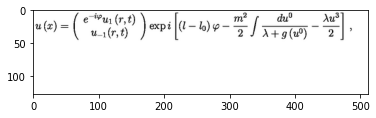

In [28]:
plt.imshow(loaded_images[0])
plt.show()

In [19]:
X_train_img = tf.image.resize(loaded_images, (45,45))

ValueError: Can't convert non-rectangular Python sequence to Tensor.

In [25]:
for i in loaded_images:
    images = pd.concat(images, loaded_images[i])

TypeError: only integer scalar arrays can be converted to a scalar index

In [14]:
len(loaded_images)

103536

In [26]:
images = np.array(loaded_images)
images.shape

(103536,)

In [20]:
def build_model(conv_layers, pool_layers, epochs, X_train, y_train):
  cnn_model = build_cnn(conv_layers, pool_layers)
  
    

  # Define a loss function
  loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

  # Compile the model
  cnn_model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

  history = cnn_model.fit(X_train, y_train, epochs=epochs, validation_split=0.3)

  plot_history(history, epochs)

  confusionmatrix(model= cnn_model)

  return history

In [21]:
def build_cnn(conv_layers, pool_layers):
    model_cnn = Sequential()
    model_cnn.add(Conv2D(30, kernel_size=3,activation='relu',input_shape=(28,28,1),padding='same'))
    model_cnn.add(MaxPooling2D((2, 2), padding='same'))
    model_cnn.add(Dropout(0.4))
    x=15
    for i in range(1, conv_layers):
        if i <= conv_layers-1:        
          model_cnn.add(Conv2D(x, kernel_size=3,activation='relu',padding='same'))
          model_cnn.add(MaxPooling2D((2, 2), padding='same'))
          model_cnn.add(Dropout(0.4))
          x=x*2
    model_cnn.add(Flatten())
    model_cnn.add(Dense(128, activation='relu'))
    model_cnn.add(Dense(50, activation='relu'))
    model_cnn.add(Dense(47, activation='softmax'))

    print(model_cnn.summary())
    return model_cnn

In [22]:
def plot_history(history, epochs):
  epochs = range(epochs)

  train_acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  plt.figure(figsize=(12, 8))
  plt.plot(epochs, train_acc, color='blue', label='Training accuracy')
  plt.plot(epochs, val_acc, color='red', label='Validation accuracy')
  plt.legend()
  plt.grid()

In [23]:
def confusionmatrix(model):

  confusion = confusion_matrix(y_test, np.argmax(model.predict(X_test), axis=-1))

  confusion_norm = confusion.astype('float') / confusion.sum(axis=0)[:, np.newaxis]

  classes=[0,1,2,3,4,5,6,7,8,9]

  plt.figure(figsize=(14,14))
  plt.imshow(confusion_norm, interpolation='nearest') 
  plt.title('Confusion Matrix')
  plt.colorbar()
  tick_marks = np.arange(len(classes)) 
  plt.xticks(tick_marks, classes, rotation=45) 
  plt.yticks(tick_marks, classes)
  plt.xlabel('True Label')
  plt.ylabel('Predicted Label')
  fmt = '.3f'
  thresh = confusion_norm.max() / 2.
  for i, j in itertools.product(range(confusion_norm.shape[0]), range(confusion_norm.shape[1])):
    plt.text(j, i, format(confusion_norm[i, j], fmt), horizontalalignment="center",
    color="black" if confusion_norm[i, j] > thresh else "white")
  plt.tight_layout()

In [ ]:
build_model(conv_layers=2, pool_layers=2, epochs=30, X_train=X_train, y_train=y_train)